Faces found:  1


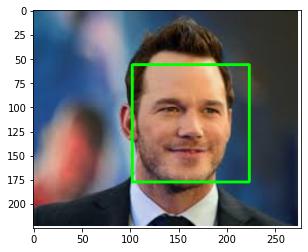

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

#Loading the image to be tested
test_image = cv2.imread('lalala.PNG')

#Converting to grayscale
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Displaying the grayscale image
plt.imshow(test_image_gray, cmap='gray')

def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

haar_cascade_face = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))

for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

#convert image to RGB and show image

plt.imshow(convertToRGB(test_image))



In [ ]:
import cv2

In [ ]:
test_image2 = cv2.imread('lalala.PNG')

In [ ]:
def detect_faces(cascade, test_image, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()

    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)

    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 5)

    return image_copy



In [ ]:
haar_cascade_face = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
faces = detect_faces(haar_cascade_face, test_image2)

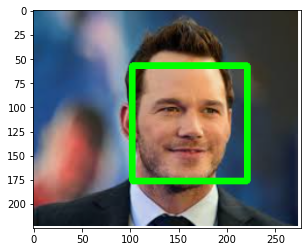

In [ ]:
plt.imshow(convertToRGB(faces))

Boxes found:  1


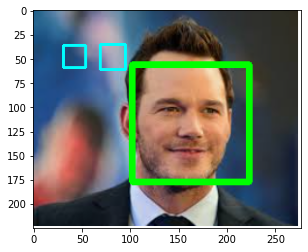

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

#Loading the image to be tested
test_image = cv2.imread('lalala.PNG')
image_copy = test_image.copy()

#Converting to grayscale
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Displaying the grayscale image
#plt.imshow(test_image_gray, cmap='gray')

def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

haar_cascade_face = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
haar_cascade_eyes = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')

faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);
eyes_rects = haar_cascade_eyes.detectMultiScale(test_image_gray);
# Let us print the no. of faces found
print('Boxes found: ', len(faces_rects))

for (x, y, w, h) in faces_rects:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 5)

for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(image_copy,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)

plt.imshow(convertToRGB(image_copy))

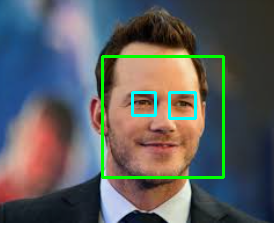

In [ ]:
import numpy as np
import cv2
import base64
from PIL import Image
from io import BytesIO
from google.colab.patches import cv2_imshow
 
def face_feature_extraction(url):
    # received_json = json.loads(request.body)
    # url = received_json['url']
    encoded_data = url.split(',')[1]
    nparr = np.frombuffer(base64.b64decode(encoded_data), np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades +'/haarcascade_frontalface_default.xml')
    eye_classifier = cv2.CascadeClassifier(cv2.data.haarcascades +'/haarcascade_eye.xml')
    #img = cv2.imread('lalala.PNG')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.2, 5)
    # When no faces detected, face_classifier returns and empty tuple
    if faces is ():
        print("No Face Found")
    for (x,y,w,h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_classifier.detectMultiScale(gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
    
    img1 = Image.fromarray(img, 'RGB')
    encoded_string = base64.b64encode(img).decode()
    cv2_imshow(img1)
    #print(encoded_string) 
    #return HttpResponse(encoded_string)
    #print(img1.type())

In [ ]:
string="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARUAAADhCAYAAADmmiFZAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7P13VJx5YiV+q4NyQDmQc6bIGYqcKXLOIEACgUDknHMWEjmDRFTOoVvd091je+zx5GDP2v45vWvver2zHnvXf973fp8qEK3pmWm/r8/Z+Y2tc+4pKGKrVR/ufeqpYo9WSid007qhl9ELg6w+GGb3wyS3Hxb5A7C6PAjrwmHYFY3CsfgmXErH4XFtEl5lU/CrmEFI9TzCqxcQUbuI6LplJDTeRkrzGtJbN5HZvomsjg3k9W3i8sA6ioY2UDKyiYrrm6hm6obXUD+4gob+RdT3TKG+8ybqO66jvn0QtS29qKhvQ0lVPQqvVSC/uAQXCwqRmXMRqRmZiE9KQURUHELCoxAQFAFffwV8fCPg4x+DUEUGwhU5fPslxMQVIyGpHClptcjIakb2xXZczO/CxcvduFjYi7yiPlwu7seVkiFcLRvBtYobqKi6icqaMTQ0z6K1cwktXUto7mZ6ltDUx/QvoZFpGFxG3eAqqgfXUTW4gQqmjP+dpf1ruMoUMQXMJSa3fxVZffy74eeKa5uDomkSwbU34FsxBM/SfrgX98K7uA9+Rb3wvdIDn8JueBd0QX65A5757fDIa4N7bitcLzbDJbsJzlmNcMyshz3/u2xTqmGdVAlZQjms4stgEVcOs+hymEaVwyTyGowUpTAMvwqD0CLoB1+BflAB9AMvwyDgEgwD8mHoL5IHQ79cGPle3ImxTzZMvNJg6pkkxcQjESbuCUw8jN3iYOwaByPXWOlSxMRld2Jh4iwSA2MpvM4tiR+XDGP3FBh7pMDIMwWG8lQY8msYeqXDSFzyOiPPZH6tZJi6J8HcNQGWLvGw4ueSOcUwUbByioCFswIWTiLhTBgsHIOZIFg6BjIBjC/jzXjBylHOeDDukDm6Ma6MC2QOLrC0c2bEpTJWfN3KzmknMhFbB8hs7N+JHWOrih2sGEvGgq+LWNrYSLGSYq2MtQyWMhmsZFaQSbHcFQtVzL9WrKSY/fpYGTMG/7ZY6sNSFQsLPSmWjEyKrjLmIjqQmenAykx7J7v/7NFO7YJuei/0M5WgGOX0w1SFiuWlQcgKhmF75boSlZIJCRU5UfEtn0ZQ1RxCCYuiZhFRRCWu4RaSmlaR2rqBjDYBywbyiUrBwAZR2UTp9S1Ujm6hlqjUj2zwhnkbTQPLaOiZQUPXGBo7R9HQPoS6lj5UNrSjtLoBV65V4VLxNUJwBenZOUhOz0BcYgoU0SpUgiPgF0BQ/CKJSwyCw9IISxYUkfmIji0iKmVITatBZlYTLuZ2IDe/G3kqUC4V9aPw6iCKS0dQWn4D5ZVjqKqeQHXtBJpa59HetYy27hW09jB9TP8KWgZuoXmQGbqFhuF11A4TSf63VRHNCgJTxpQSl2IBKVNAbPIISzZhSePnie8gws1TCKm7Cb/KYcivDcDzaj98GD9+T76ExYeweBd2waugE56XOuBBWNwJi+vFFjjnNMEpW6DSAPv0Otim1sA6magkVcAqsRyW8RUwixGwVBCVMhhLqJQQlWIYhAhYCiVYDAmLoQoWI8JiRFiMBCyqGPvmwNgrA6a84ZuI8AZvzBu7sXuiMm4JMHKLJyxEhjd8E1VMpcTBlNC8Da9zS2QEFgw/l/R5CYmJdzpMfDKZDBjxOmN5ivS1BCzmhMjSNYmoJEDmHM/E8eVoWDpHMESFsXQmKk4hsHQKJjhBxEPA4sf48GWBiognIfEgSoTFaRsWV1javwVlGxUJkt0RqHwpSlSsVXmLij0sbXlpS1QYK+KizDYsAhQZURDZhmU3MNuwfJ18NTZfjglj+JtjZfgrYbG0EHkHlV8By+4/e3SkltLHlqIExfjiAFEZgDlRsVChYnNlFA4qVNxVqPgQlcDKWQQTFmVbWUJMPW80RCWpZR2pbRtIb1+XmkrBwCaKh7ZwbeQOqq7fISpbqB8WqKwSFbaVnlk0dE6gseMmURkmKv2oauhEaVUjiq5VE5Uy5Fy6gtTMbCSlZSA2IRmKqHiiEk1UIuEXKECJIi6xCApNRWg4UYnI20ElLb0W2TktyMvvRP7lHhQQk4LiQVy5OkxQruNa+U1UVBKTminU1U6jvm4abW1L6Oq5jU6R3lV0EIWOgVW083tuG1pDG5tWs4CR7auOsNRIuBAWpky0MqaYucJcGljDRcKS3nsLCZ0EuGUGofVj8K+6ztY3CDnbim9JP/zZmvz4vb2FpZtt5S0sbrltcOF/h3N2MxzZVhwy6mHHtmLDtiJLqoIssZKoVBIVZUyjKmAcUaZsK2HKtmIQcgUGhMVQBYtR4CUYERcjCZc8GG/Hj23FOxumXrzBExdjeTqMPdOklqHERTQPhm3CiDd4JSwEhDEjJOaMBdGxZCwIkGgd5oTFnCCZeyTBjI3EzCsFZt5sQ4RFxMRrG7BUmHqkwsw9lR+bAgvXFOKSDCsXAsMWZOUSKaFi6SISzpdDmRCCI2AhKk7+vPRlvBmi4iQnJoTFaTcsbrAiKu9GZi9g2Y5AxfGXULEmHrsjrrOUokTFShWZFBvGmvgo24pM5JdgISrWIgTj6+RrwfI1UREhLF/CZRcsVgIUSz1Y/xpYRHb/2aOT3gO9zH4YiJZCUEwIikkeYSEq5kTFqmBEiUrRTThfHYd7qQqVsmn4V8wisIJtpUrVVohKLCdQAidQUquAhdW/l6j0b6JocAulQ3dQSVhqhrdQxxtbQ/9tToll1HfNcvpMEBROoLZh1Db1o7KuEyUVTZwmNWwU5cjOu4KUjGwkpmQgJp6oRApUYhAYHAX/QJEYJv4tKmwqYv4kpVQggz/Vc/mT/hJnT8GVPhRJmIyi9NpNlFeMo6pqCrU1M2isn0dzwwJamxbQ1XEbvb3r6O1bR0//BnrYtrrZOrr4fXcRxE5i0sbG1cw0Ss1rE7VMNXGpYMqYEqaIKWB7ySMsGZxAiZxA0a2zCGuYRED1KHwqhuHNtuJXMoCAqwM7sPhc4SQq7GFbEbB0EZZOtpV2tpVWCRYnzjnHzEa2lXqiUsu2ooTFKqEa5rFVTDVMoyvZVsrZVjiD2FYMw4pgSFgMOYMMVbAYSbkMYwJjTFyMiYtAxYRtxcTnIpsE4yVaSxabRCbnCXHxIC68wZuIKcMmIaHCCFQkUDiPLDmTrDiXZB4iiTuxEvFMhCUnlYWcE0fO5kJcTAmKMkRGLmZXGuFJJ0CMm0gGgUkjLgmwco0kLBGqqGBxCePLAha2FSdOIAkVtpUvobIbFndYObgSkreRbaOyO3ZEZVes7RwIiT1sVBEvC1SsCI6VHS/t2FwYmYSNiAoWoiKBshNi8qVsw/I18kvN5d1so2LEvAPIr8s7sGxHxljvwLKruWzDwuz+s0dMHwmVnAEY5w4SFWYblfxBWF4ehnXhddirUHEjKp6q4yq+FTMSLEGVcwgTbYUTKJqoxBGVBLaV5NZV5HRzAvVuoJCwFA9scR5soWqQP9k5DWr7bqG+Zwm1HTOobR1HbcsoapuH2FL6UFbdgeKyRjaKas6VMmTmFiIpPRvxyemI3kElFoEhoq3EICAojpcJCOH8CVNkIzL6MuITrnL6VLGlNOESf9oXcV5c5dwpE82kYgJVlVOoqeb0qpsjJotob15BZ+stdLfdQl/XOgbYsvr5fUth2+rjzOklEr3Eo4dtq3N0E61MC9NEWBqYOkYcM6rg+5Qx4jiSaCv5hCWLbSe5exkxbWx3jVMIqr0J38oRAj0Ev9JBojIIf8LiR1h8+b16c6Z5ERY5YfEkLO75HVJbEbA4Z7ewrTTBPqOBE6iOqNQQlWpOoBqYxxGWuBq2lSq2FcKiaitG4VeVqHAGCViMCIuIMWGRQlhMVLCYcBIZ+/LSh/Fmc/HmJBK4eGaxSbC98MZuSlgkVJziiEosW0osb/ixbCexBCQONp7xsPVMgL1XIpx8U6Q4+CTD3icJNt5JkHmxefBtFow5XzYnLuaExYywmLEZmcszYM6vZebBuGex5WTycxMl1yhViIsrYXFVMOFEJZRhW3EWbYUT6Ne2FRUqqshEJFTegeXfC5VtWDiDrInKl2PFKSVi+bWixIV4/LrITBmBym/Kr4FFhcsOKrvytrF8FSoZ/dDn9DFUoWKap0KF2UZFVjgKO6LiSFRciYrHtSm2lWl4l89IsAQQlRCiEl63hMjGW4hpXkVcyxoSW1aR2bmOXN5AL7OxFPVvoYQ30HKmsm8N1T23UNO1iKrWKVQ3j6G66TpBGUR5XS9KK9vZUhqQf6WK0+ca0nIKkZCWhViiEhmXjPDIBAQLVEIJSkgsQYknMEkIC8/g9MlBdEwBkpJKkZlZg7y8Fly50o1S3mDLro2gumpSaib1tXNoql9AW+MyulrYTNrX0N+xjn5+z0M9mxgmKkP8noeI4eDgHQxwwvWPMJxw/aN30XNjCx032FiYVqaZuAhYxDGjKgELc434iLZymajkcAKl8r85rn0BiqZpojIGv8pR+JaPwO/aEAJKdqPSD2/C4sXGIqHCeLCtuIm2Qlic2VYcOYMkVNKISmotZGwrVklEJZ6gCFR22gpnkIKwSG2lGEaExYiwGHMKGRMXEROiYhKogoWTyCSAzcWP8eF1Prz0JjZexEWeQ1Sy2CQyOFHYWFwSYOgYA2OnaJi5RLNJxEDmHgMbj1jYy+Pg6BUPV98k+IVnwzcsE96hGfAIToNrQAoc/ZJg65sIax+2Ge8EWBIWC69kJpW4CFSICb+WmWc2c5G4ZMPCPRkyN34Nt2hYub0LC9uKqxIWS+cA4uLH+ELm7M14MYTFmbA4ExYRceDWYXdcYe3g8qX87qOynS/jso2KjLFmbKz0YbMLlx1UVNn9Z48uW4p+9gAML4qWMkRMRJSwmO1CxVZCZQIupVNwvzYNT6LiVa6ExZ+oBBGVMKKiaFhBVNMqYohKQuuadFwlmzfSvO5NFPZuobhvC9d4Yy3vWUNF1y1UdiyiomUKFY1sD43XUV4/iGs1vSiuaEfB1QZcLKxCZv41pGQXIi4tGzFEJSIuBWECFQXbiYQKL0MSOH3YYBRZiIzMRVxcIVJSriE7uxaXL7XhalEvyq8Noqp8FPU102ism0eLaCdNSlD6ONUGOjYw1LWJEYJynd/nKHOdqFwfuIMRTreh4TsY5Hwbun4Xg0Sl/8YddBETAUu71Fg20MTUMzUqWMoYcc9XASOOq6TtQiW4dhx+VTeIynWiMoyA0iH4ExY/wvIlVNhWBCruEiodcMlthzPbioQKJ5AtJ5CESkoNUamFeYKApZao1MAkugrGRMWIqBiq7gmSYJFQYYKLYCKhUqiERYWLSQAx8WOL8SU6Prz0JixebC9yziF5toSKmQcnkGs8jByjYOoUCQvnSMh4I7dxj4K9ZxSc5NFw8YqBPCABipg8hEVfRHBEFgIUGcQlFR5BSXDh2xz94mHnG09YRNhEVLBYSLDsQoWXFpxcVmxCVoTF6kuwKAiNCpYdVPwlVKycOYO+hIoKlq+BirW9E0NMVLEhLDaEZXdkApP/16Mi8vVReReW3X/26GUPcvoMwoioGBOVbVjMLg3DgrG6fF1CxfrKDQkW+6IxOBaPw4XAiMbiyQhY/CpnEVg9zxvKIsLql4nLLUQSmITmW0jljTaLLSC3kzcuzqFipqRrFdc6VlDWtoBrTVO4Vn8TpXUjuFrdj6KKLhSUtiKvqB7ZBVXIyC9HMlGJSclCVJJAJRXh0UkIjUxEaATbSUQKmwuvjyI6cflITCpCenoZLubU4FJ+E64UtKO0uBfV5cOorx4jJAvo5NTpbiUm/L4G+X2NEL0bvXcw1n8PE/33MTF4H5NDzMgDTI4+xOTNR5gYf4Sx8Ye4MfYAo8zIxH0MTT1A/9Q99E7eRdf4HbSNbaGJyNQRGYFKOXOVE6iQ0ym3fx3pRCWeqERsoyI1levwLxtBYKmAZZiwDMG3eAA+ApYr/YSlj7D0EpUuuKpQccpphUOWaCpEJU2gwraSUktU6pSgMKYCFU4g4yiiwgkkUDEIE22FsBCUt7AQDqIiRWorAhUi48/riYqh1yUYyPNgJM+FqfdFmHvzRi6Oe7gncvLEwNwlijdoxiUcNpwh1s7BcJYriH4qohNy2SxzEJd0CaGKNIQo+P8qKh0hkWnwDYmHe0A0cYmDX2QGXIMS4eDH1sJ2Y8nZZClPgcwnk8mBhXcOUcmChQdRcY9jdsOiRMWSX9uSE8hSTCCXQGY3KpxBRMWKoIhIM2j7buZdqLydQMoZpETlbZSosKWo8js3f96NhMovg/Judv/Zo58z9A4qw2wowzC/NAILgiKhUjC6C5YbEFPIgbiIKbR94NabrcW3ag7+NQsIJCwhhCW8bhkxjStIarqFtNZV6byVfN6Ar3AOFXWu4mr7CkpbF1HCG1hJ3TiKa0dQVNWPgrIu5Je0IIeoZBbUIP1SJZKyixAloZKBiPg0hMfwH2e0SBp/CmYgMlaAkoeExEKkpZUSlCpczm8gKC0ovtKJspI+1FYOo5lfp7t1ic1kFf0EZYjfz3WCcpOgTBCU6YH7mBl8gJmhB5gdeYi5G48wN/4Y85NPMT/1DDNTTzA5+RhjE8Rlipl9hJGZBxicvo8+FSytN7fQQFhqCIuYQOK4iphA+QMbyOi5jYT2RUQ2zSBkV1PxL7uOwGvXicoIURkmKoNKVBgvwiIv7CMq3Zw+ROWiQKWNqLQQlSY2lUbYpBKWlDpOoHqiUkdU6ohKLYxjqmEUVQlDomKguAaDcCUsBiHFO7AYcQYZbcMSSExEiIoRm4qRaCnSBOIk8s6FiVc2m0o6b+ApsOAN30LcqDk/bNwVsOaN2ckzDK7yUPgHRyMh+SIyRMNMyES4gj8EwhMQphDhVA2NhtwvDB6+oQjmD4fIpByExWXDh+g4+sVBJicansRFztYi5xySZ8DSO4vYEBUPcRCY7yPBwslFVCy/EhW2FRdOIJdtVJTHVnZQEcdWvgTLuwdrBSTvwCImEBH5nT2m8lX5DaCI7P6zRz9boDJEVIaIyjBnzzBM80eIynU2leucP4RlFyo2uxqLS8mkEhZxjEVMIbYVX7YVf6ISyCkUIh1jWUEcUUluWUVGOydA5yYu8YZc2LGKIqJSRFSKeAMrqh9HUe11FBKVS+XduHi1FVlFDUgvqEXqpSok5AhUshGVnImIhAwoYolJbDpDUPiPMTqekyfhEpKSryAj8xrycmtReLkJRVfaUFrUhcpr/WioHkFbwwRBWeLUuU1Q1nC9awM3OXcm+u5gZuAe5thQ5gnKAhvKwvUHWGRDWZp4guXpp1iaeYaF6SeYnXqEqcmHmJh+iPG5RxidZWuZuY+BqbvombiDDraV5puqtsJc24VKZu9tJHLyRTbN8u9nAv5VN+FbMSqhEiChQmBKRojKEEEZgNcOKv1EpQcueZ1wJixOhMUxu43zpwW2hMUmrZFtpQFWyQ2cPw0wY0zj6thUathUBCrlbCqEZRuVUHHQVjmDpHAGKRuLMgIWI99LbCqXYe5fAAvOIXNfoiLuWhYnphEU0ShsOHFsPRRwICZOHkHw8gtHQJCCMzQaSUmpSE7iJA2PQHCwgrM0HpFR8dLbQsMU8PUPhG9AEOKTU5GWnYvMvCtsoznwVyTDxT8GtnK2H88YWHrEsaGwuXgmE5okopKwA4uVO9/OlmRJ2JSwhBGVECZIBQvbigvbigoWS8JiKRrL9kFbCZVtWMQB292oOMPGgRENRYXKTlP5T1S+lN1/2FSGicowjHJHJFSMBSp5I2wrKliIyltYbihhUbUVcYzFWcBCVNzLpuFZMQOvasJSOw+/ukUEMOHiGEsjK3/zKlLaeKNiW7nYuY789lVcbltBYcsiColKIVEpICqXqgaQW9aD7KttSC9qRCpRSSYq8TnFiEq7KMESkZgFRTxxYSLj2VASCQrrdWJKIVLTi5GdU4HLlxtQXNTK2dOJ8tJe1FQMoqXuBrqapzDYsYyRrtsY7V7DWO8GJvs3MTtwFwucO0vDD7BCUFZGH+DWzYe4zZayOvUUa7PPsDr3HLfmiMssm8vMI8ywpUwtPML4vGgshGX6Hvp3zaBGNpZaRhxXKSYqlwb539+3iiR+/ajmOYTWibuV2VYqbsKvbJSoEJfSUfgRFZ/iYaIySFQGICcqngKVy71wze+Gc14XUemAY0477LJaiUozbNKbYE1YZClNsEhqgnliI9tKvdRWTKKrYRxZyQkkYLkGQ8JiKM2gEhgRFyMVLm+nkDjGwhASM//LBEUkHxZ+OTD3SYOFl7jnJg42XjGw94qEs7cCnn5EIiBcwiI8LByRijDERoYjRhGE8OAAxEXHIDEhEQlx8UiIj0NSYjzi46MRFxeFixczUXjlMopLSnDpShGSM3MRyhbqERgDR+8o2HvHQOYRAzNnNhLpniUVKsRmB5XdbcWVbcVVtBUBi2grSlgsCYulChYxhX65rWyj8nb+SKhsR8Jl+5jKf6KyO7v/7NG/OAJDRkKFmJio8hYW5QyyvDz65cYi2krxOByujsOpZAIu19hY2FY8q2YJyxx8ahfgx4gZJA7eRjex9reuI41tJbN9HTmcH7mty8hvXkB+4wwusUHk144it2oQ2UQlo6QdKUQlsaAO8ZeqEZtzFVHpeYhKvYjI5BypLkcl5iAmKRfxKWwoaQKUImRmX0N+fg0bSjOulXSi4hpBKe9HY80IOprGOXnmcL3nFufOGsb71jFFUOYGt4jJPWJyH6vEZO3GA6yPPcTGxGNssqFsEpPNhRfYXHqB9cVnuL3wBCvzj7Gw8Bizi48wzUzMP5JgGSIsYgZ1TtxF6/hdNIzf4wTako6rXCYqWX1rSO7k30fLPELrpyRU/CvHiMqNXahch8/VYYLyLip9cBVthbA45XZKqNhntcGWbcWGsFgTFllqMyySmaTmr4ZFUa48aEtYjBhjwmIcdhXGhMU4dBuWIpgylnzZKogtxT8X5n7ZsPTLhE1gJuwDUmEvDq56RcDRixOGMyYwhO0kIhKx0UxkGOIigpAUFYzUGCZOgfTkeKQmJyCRiCQlRCErPQFFBVm4djUPRZczUFKUx/9fBaiuLkNFZSVyLxVy1ibBnVg5eoXDXq48ECvuWZJ5ivNdBCxExYMTyH33BFK1FdcQzjLC4qpqK65iBqlgcRH3BikP2loTlZ0QFutdB2t/CRXGVoLFAbYqWKyZ/0TlK1AxIChGedeVqBASMX9Mv0ZjETNIOr5ydQxOpeNwKWNjYVsRsMg5g7xr5hHAKRRKWCLYVmLF3cyta0gV9wq13kJm8xKym+Zxkajk1U8gt/YGcohKZlkvUolKIlGJY1OJYVOJuXgV0RmXEJ2Wh+hU4pKSy6qch7g0gpIhzrYt5n4vxcW8ShQU1KP0ajuqyntQW0lQqoc5e26it20aw92LGO9fJSYbnDubnDqbWB65i9uj97F+8wE2icnm+CPcmXyCu5w79wjK/cUXeLDyCvduvcSdW8Rl5RnWl57g1vITLK48xhwvp5ceY5yt5TphGZi+j56p++iYfIBmRjw0oXRkC4WDm8jpX0dK1y3EtC4grGEagTViAhGWr4NKQR/cpLbSs9NWHLK324oSFllaCyxTlBGwfHkGiXuCKmEcobw3yDj8GkwIi0l4CUwIiwlbi0lIsRRTgiILL4J1aAFkQbmwCsiCdUAGHIIy4BycCif/WLYIBXyCIxEZm4A4to+UpFikJUQgPT4MmfHByE4MwqXUUOSnE5JYBRKYKEUgwoI8ERnuhaJLSWyPRbicE4Piy8koLkjjRC1GV3sDGhtq+f8yDwGhCti5esHBI4DNJRYOPmwoYgIRFhknmIDFcqetcAIRHks3thU3TiA3ouIWRGDYVlwFLMoZ9GVUPFRRoeL45XuAbB1V2UbFwYmwOEqoKGER9/4QlP9EZefPHv3cURgSFKP86wTlugSK1FbE8RXm3cYiobINC2eQiG0xW0sJGwvbimv5FNwIi0fVHOSMr+rAbSjbSiTbSlyLOI2fU6hlBWlNi0hvnEUWb1w59ZPIJiqZlUNIIyrJRCW+qAkxhXWIulyN6NxSxGQVIEaCJV9KbPplJGYSlOxiZF4UoFTgEhEqLm5GRVkX6qpEQxlCa/0oZ88EBrrmcKNvBVOD65gjJgucJEtsEbdv3MXG2ANsTTzCvcnHuD/1GA9mn+LR/HM8Yjt5TFCerL3Go/XXeLD+EndXn2Pr9lOsMyvM0q2nEixTi49xk41lZPYh+mceoptpnXqIqht3cO36HVzh17xIVFK7iUqbmIYzCKpVTiD/8hvwF6gwu1GRExXPd1Bxu9S701YcRFvJboNdJmFhY7FOb2VbaYUVY5HcwrbSJLUVE6mtCFiUjcWYjcWEsJhwDglYTAmLKVuLBAtjxtZiGVoIm9BLsA+/BMfwPDiEiJaSDAe/ODj7R8EjgFMnOh7JqSmIi41AbEQAosM8kRQhR1qUJ1IULkiPcEFOUhBy0mMQy+YSFuSO0ABnKIKdkZ7gj7z0UMSGOuFqfgyKcqNx9VICqkrz0FxfhrraCuTl57IFhcLJ3QtO8iDYieMs8mSCImB521Yst9vKNizuoWwwAhZOIDe2lW1UpPhA5iLuYt6NigdsCIsNUdnOl1BxJCgi26ioYPlPVJTZ/eeXUWErEagYiwO3zDYs5nybBSfQ9gyScLmijAQL24pD6QScywhLxTTcKmcJi5hC85xBiwgW9wYRlajm24hvvoWk5hUkNy4gtWEWGUQli6hkEZWMqiGkEpVEohJLVKKISgRRiZJQKURs5mXCchmxTAJBSSYo6QQlJ78ceXy/wqIGlJS2obqyF421gwTlOjqbxthSpjDcy5YycBuzwxtY5BxZvr5JUO5w6twjKA9xb+oRHs48waPZJ3gy/wxPl17i2a1XeE5QXmx8jGebH+HJ5ms83HiJ++ucRGvPsUpgVpgFwjJDWMYJy3XCMjD3CL1zj9E+8wjVN++ibPQuioa3iMoGUbmNWKKiIKjBtWICTcBPhYof41t6Hd67USnqhwdhcScsboTFlbC4cAY5sa04sq3Yi2Mr2USFjcU6ow2y9DZYpbWxrRAWMYMSOIPitmdQDUxEY4kQp+8rUTEVEbAQle2YhxVDxpZiF5YPJ8UluCjy4ByWBcegRDgFRMMtIAJeQQo2iVAEBvnBx8sJPu4y+LqaQeErQ1yQNWL8LZAQaIn0aALD5hIbFUBUXAmKCxIiPZEc5Y7oYDso/CyRn+KPy+lBuJgcQGgUKGFrqam4gvJrRUhNS4avvx/snHnjdwtToiJPYsQp/8pjK5airbizrbgTFXeBShhRISxSWyEqbqKtcAKpYJGxrVizrdgQFhvxebdRcXL7Eiy2jB1REdluLAIUu21YmP9E5VehwvxqVMTdzNdVM4iwEBTLAraWQkbAQlRsisd22ooz24or24qAxZNtxYdtJYCohHICRRCUGCaheRmJRCWZqKTxJ3YmUcmovYm0ymEkl/UhvqQD0UQlglNGcakGkbnXiEoRYiVYlEnk66k5JcjMK0fu5SpcKqxFUXETrpV1oLa6nz/tRtDeeAPdbCn9HTMY7VvG5NAaFojJyqgAZQtrY3ewOXEPd9koHkw/xmMBytwTPFt8jhcrL/Hi9iu8YkN5tfkxXm59jOcSLC/xcPM57my8wDphuc0s3X6GuZUnmOQMusEZNERY+uYfo2P2MWpu3tlBJZeopEmoLClRqZuSJpBfuThYewO+RMVHhYq8eJCgDMCDqLgLVBg3wuJKWFwuExW2FQe2FSUqbUpUMrdRaZfaiuVOWyEssXUwjamFqXR8RflgQ1PCYkZUzIiKGduKGWeQOWMRVgRbRQFByYVzeI4EimtoGtxCE+EZGgN5sALegcHw9vWCh7sD3J0s4OVsCrm9LoLcDBDmrocgJ3Uo3LUQSTScbPQQHeEDRYgrgn1tkBjpjow4thqFIzKiXRATaIXsOA/kJHohK8EXWZxOOakRyMtOxMWsZMREK+Dl4wtHT4GKEhSZPIGNZddxlS+hEq5EhW1lBxU3gYoSFhlnkA3bihIVJSxvUXkLi60TURHZ1VbsdrcVh21UBCjvoiJAeRcV669AhZFQ+Xqw/L/gmMp1GDLiQK1RrjiuwlwchnEOUWFMGFO+bsq3m4nw7VJrITDK1nKDbWUMNkXjsCuehEPJNGGZhUv5HKfQrHSMRV45A5/qOfiLA7d1C1DULyKqYQEx9XOIq59FYt0MkvkTO6l6DIkV1xFfOoCYoh5EFrYTlBaE5zVCkVOFyMwSRGZcRRQTk1WKxJxypOVXI4fwXCpqRtHVNoLSjarKPraUYYJyEz0tnD3tM7jevYCJfraUoXWsCEx4Q98Yu4ut8fu4P/kQjwjKM06eF2worxae4aPlF/j41ku8WWXWX+ETNpQ3zEebRIaovNx6ice8vLvBxsKsrXIK3XqE+eWHnEH3OYPuYXjuPvpm76N5THkvkLhruWBgHVnSuSpLiCAqIXXiuMokfCvG4V0+Bh/C4nNtBN4lg/Aq7mdT6SMqfUpQrgzApWgYzleG4Fg4CIdL/XDI64H9RcJCVMTJcLbpzZCliDNtu2BNWCwSxQFbceBWiYtJnDh/RcygcphFXYNlVAlkkUWwiWArISB24dmwD8uAY2gK3ILj4BkYATlnjpd/GDx9/ImIL+SebvD1dIa/pz18XKzgaWsID2tdBLoYw9XiHEExQZCzHjxlZ+FtfQFedrow0lBDRJAHYkLl8CJAId52SFDICUsAinNjkRDujqhAR2Ty9fRYf6RE+iBR4cP3JzyR/nxfP8SGByAiJIxtJwaBnF+enqFwcQ+Gs0cY7AiIDduJbDue4arwZY8QXhcEGWGRufhx9viwmRAVZ1/YMjZ83cbJmyEyTmwvjkRG1VxsiYyAxcbJhXHm25wYR4bTx9FeisyBsRchJNuxIyY7eQeVX4pAZTtfAxYJlV8d6e0yM8b4a+SroGGstmOoPKPW8tdn9589+jkjMBDJFhmWYsQYZxEVkWzCwtel5BAXKcSFEFleugkrRlYwDusrk7Atmob91Vk4ls4TlgW4lM1J9wq5lY3Bo3wC8greeCr5k7l6BqE1M1DUziCSia6ZRkz1JGJ4w4q5dgNRxUMEpZ+g9BCUDoRdbEN4Vj3C0suhSC9jyhGdVYXE3DpkFDQjr7gDV671oLS8H9XVQ6ivGYF093ETQWmbxWjXIib6bmFmgC1laAPrnCOb42wnBOUBQXlCUF4QlNfzz/Hx4gt8svQC3yAon6++Yni5znDyfEZEvkFMvnHnFT69+wqvmSdbL/CAreXu+hNs3H6IWyv3sLB4B1PzWxib28LI7F10T2yidXwTNTfEU0Cs42Iv51/HEqKaxN3KM5w/U/CpnCS+k/BiY/G+NkxUBuBd3EtUujl9ethQ2E6KhuDEVujI2DN2BcOwF7DksrWwrThnNcEhvQk2SU1wv8jr0zthHtfI+dMEy1QCwzlkHN8AU3G2bUw5zKNLYBNbBOf4K/CIz4NnVCqbSBRcA8MgDwySWoiflyuCvBnOGy9HC3g7mMDFXJ1YaCHATgd+Mg3IzU7DW2DizH9g2ocQ7mZKVIzgYaUBZ/MLsDc+DzPNkwh2t2dr8YCrzIQxQ4C7I+IIRcnlLFy9lAk/NzvEhfkiKcIfyRG+SFF4I8rPAQq5DDF+tkgNc0duZBAKYqKQqQhHhLc3gjy9EegbBLk8EM6ehEM6dhIIay/F2xAXW8Jiy+ttnP0IAQFx9OGcCiAqgQwvnXi9FCIjAUNcnESDYXtxduNUciFETgybiZMDQ0SciIeII+PwTux3o8Ko2oo1Y2PzqyKA+foz6NfGWqAiHqn8dbMLGmJipYrMUqBiCJvfkN1/9ugRC32RLGUMGENiYpQ5CKOswbe4MDu4MAIWi/wbsMwnKpfHISucUKJSTFRKiEopUbkmUOEUujZOWMbhWT4J74op+FVOI0jAwiiqpxHBRFZNIbJ8HJGlo4goHoaCqITn9yIstwuhOR0IzWpEaHolwtMroMioJCo1SMgVJ8e1EJVOXCntVaEyQlSuo6X+JrqbJjHYPocb3UuYFC1lcF2JChvKHaJyb+I+Hu6g8oSoPMMbzp5Pl57js1sv8AVB+WJNoPKCqDCbDBH57A7RufsSHzFP+fojonJ/4wk2Vx9ideU+lpbuYGZhCxNEZXTuDnonN9FGWGqJSglRySNwKUQlmqiESU1lGj7875cTXK8KgYpoKkpUvHah4nyF7aRoVAnKFYHKCBwuD8CJbUWcuu+e0ww3thWXtGZ45/bCOZ0TKK4WFmwnloTGUrqLma/HV8MytgxW0UVwiCuEV/IVBCTnwycqES7+gXCSs034ebENeCLU1xlhPk4I8bSBFxuJt40uXE3PwEd2AYE2GvA2PwO5KcGw00aQvQ7Mz++Fm/l5+NoZwMfOEI7mmjDVOA6js2qQ25hDbmsJBzMD2JvxbVambDr2yE6OQ0PFVX4tdwR7OSMu1BuxwR6IDnBGeoQXIohKcrAjIj0skBrogjyFP7LC/RDP7y8qwBuRoUEIDiKCfgSCk0acNWvrGcywvbCp2LDJ2LqFEhXC4hxEQPh+IhIoKlSc/ZWo7DQXLwLiSUw8GCUqMmcnhqg470aFYEiwiMbya1BhBCi/GZXdU+hX5SsQeTfW209/8HXz61Ax+kpIdmf3nz16xGJ39BkDgmKYObCTbWB2kFG1F/O8UVjkqWBRtRU7wuLAtuJQMkdYZuFUMglncXezBMvEDiz+orEwwXw5jA0mnNcrro0h/Op1hPMncujlfoQSleCLXQjK7kBIpkClim2lEorMKkRlb6PSSlS6iEofURlADUFpqB1Fa/0YeqQT3eZws0eFCkFZHN5G5a6EyqOph3g6Q1TmnuKjxWdsKc/w6fIzfH77Bb5JUL4gKF8QlC8IyhcE5HOC8vldwnKP8+jeSzwjLE/uvGRbeYY764+xfvsBVpbvYV60lYU7uLFwF31Tm2if2ELdzU2U8uvn83tJ7VxCTPMcFNI9QCpUGK8KMYFG4FM6CJ/iPqLSC88rvZw+fXAqHIBd4XVmFLYFxIWoOBEV10u98MjvhHdeK3xyW+Gb04aA/G64i5Pi4qogi62ELK6GwBCTOPFyOWziS2EbcwUOUblwVqTDNSwObkHh8AgIhF9IEBSRoQjwcYGvqxUC3GQIdLMkEgYIcDCEl5U6/G20EGSnxYZyVmoqAbZacDI8AYOT70GmTUCs9eHvbEFUdKBz6hD0Tx+VULE30YONoTZMtc5D/8JpWBnqINxPjvqyImQlRiHM1xVRnEmhcjsEOJsjNZy4+NiwmXAeyS0R4mgEhZs5or1tEckJFe7jAH+5A/x83BAaFozgcAXk/sFw8PSHPZuLnTshkUAhLC5sLM4KNhQRvi6AUYGijAoUZzYV519GxdrZ+S0qEixvUbEmKtsRqFi/A4u1KjaMre2vCmGxlTFWvzZfC5b/m6joEgwRvV3RzxiAQXr/TgwztiOAUcaYwIgJZJ57XYLF6tIYYZmAzZUpwjKjhOWquJyUnjLBqYSwEBc36XluOYUYH8aPCSA4QSVjCL46iuCiEQQXDiKItT6QP4EDiEpAdieCMpsQmlGDsIxqolJNVGqRkNeIjMJ2otKDomv9KK0YQk3tDTSypbQ1TqC3dRpDnfO42buMqYFVzEl3IW9ig6DcmbiL+5P38Gj6IZ7NPsbLhSf4iKB8QlC+sfKMLYWoEJRv7gLli63nBIW5x9x/jjcPXuLl/dd4du8VHt15jnubbCtrj7B66z4WCcvM0l2MLd5H/8wWOqfuoGH8jnR27eX+VWR0ryCudUE6WBtSPwNfTiCBiveXUOlXoqI6puJIVGwLhpgRtpTrcCgcgUvBIDwK+uB9uRP+l1v599aK0EttCCEw3hl1cE4oh13sNdjEiJRKsYu9Cqf4YrgncvpEZELmHQ5zZznsPbwQFB6G6LgoREUGw9PZCi4yPXjbGyPI1ZyTxgQKdwuCwtnD+eNtdR5yzh5P87NwMDgOvRN7oHvifVjrn+a80Yc355Iz97ne2WM4f/gDeNvxH7uBJix0LkDntBq0TqlJqPhzBhXnZaLkUhYSFQGICfaEwpftyM0KUd42SAhwQHKQAxIDbImJJeICrJEc5oT4EEe2KBnc7A3gxBblJxpViB/8A/3h7uUDV3kAnNyDYM+GYuciEFEwkXw5hteJS3F9ACNA8SM64hjLW1RsxL1DLh4MJ5CLq4SK9e624kxAGGu2lt2oSBGw2Iv8B0RFh2hsR1cVvTQmtQ/6qhjw9e0Y8u0iRgTGlG3FjDPIXBxfISwywmJNWGwJiz1hsS/mHCqagJ0485YRj252kh7hTFyKx+BRfBNyxpvxZaX3K7oOv8Jh+PGnr19+P3xZ4X1zuuFLVAIzmxHCG0kYYVFk1SIqp56oNCO9sAN5V3txRaBSOYxaNpTGhnG0N0+ir20WQ12LuNm/gmnOjnneoJdGN7FJUO7yRn5/mqjMPMCz+Ud4tfgEHy8/xae3iArzxdpzCZRvctp8k5h8k2h8QVC+IChfEJTPH7DRPHyJ1w8/wgvC8pTt5eEW28oG2wpn0PKtB5jjFJpYfoBBcVxl5i6aJu+inBOokDMss+eW9MDCCHFcpXEOfjVsKdVscZVEpfw6fK8Nwfeq8ukPBCpuRf3KpkJUpGMpBMWJf1duBf2QF/TAr6ADwZebEX6pCZGXxIHtWgRyKnonl8I9rhhObCWO0YW8LIRLbAHcYy/BOz4fnhEpcPANhZ2bFzy8vZU/7YN84O4sg7utCTxtDOBrb4RAZ1OppYS68DqLC3AzOQN73WNw0FODg/5xmJ7bD42je6Bzci9sjdVhY6IJZ2tjuDtYwlz3PI5/uAdOZnow0zwNc+1zMDh3AsYaZ+BkZYIADydcTInF5YwExIf5Ii5EjhSFD5LCPIiKNWJ9bRDsaACFhwmSQmyRGevKuCE5whGxobacTGaQO+nDz8MSgd72CPJzQ1CAD/x8/eEpD4SLG5sLUbF3EZDEws41CfZuMV9CRRkVLC4CFdXdzTuouDHKtiJgsVbBYi2h4sC5xJdFVKjYOOyGxQ42qtjaKWP3lRGwyH5jfutR0SYU29ERSSUsKX3QTe6BnpRe6KUoo8/rd0NjwlZjwjlklj0CC8JilccZdGkcNgWcQVJjmYItUbEV9wwJXHhpf2UMDozTlZtwZo13ZZ13ZzwZOW8s8kuDkOcPQJ7LG8vFXnhld8Mrqwv+mS2cQA0Iy6wjKvWIzGlEQn4L0q90EpU+XCkbRGnVCGobJtDYOIn2lmn0cfoMc/qMcW5Mc3bMj25h+eYWNqc4fabv4AFv6I/n7uPZwkO8WnqMNytE5fYzfLZKVDae4/cIihSC8s27vO4ec595yDwiPo9e4s2jj/GaeXH/FR4TnXubT7G5/gi3Ccvi7YeYXnmIofl76Jm9h2Z+3cox8aRNG8jefgxQywLCm8S5PG9REY9a3kGFE0icp+JWNKC81+fKyE5c+LpHYR98Ctjm2FJCLzUgIr8WMXlVUKRfRXhaMcLSriIg6Qq84i7BMzoXnjEXeZkNr6gMeCqS4BEcCQ/OBS8/f/j7+3DyuMPdif94OVs8bQzhY2sAbxs9eMl04GZ2npdi5pwkJCdgrXUUFhcOwfTsfugRE52T+6B18gAs9M7DUPMULIy04GxnBTtzA5w/8iFkvN5U/SSsDTUhM9SCjK3FwZxzyskaceH+iGfCObmi/F2RSlQyIr0R62fHuWMKueV5+FqrI1xuhJhQK8YSigATRAdbIMLfFL5OmpxoBogMsEG8whNxCj9EhAQg0C8QcnkwYQkjLFFsKPEENAX27nHEJZSvBzBvUbFToWLrImc8VdlGxfUtLC5KWJRRorINi/TyO7DsoMJ8NSgiRMWOf/e/Ib/1qGgREe1d0SEcOoREJ7Fbim6SSI+UHWQYAYxROmdQxiBMCYs5G4tl7ihk+TdhfVnAwilUOMk5NAFrKbyuUFw/xvp+E7aXR2F/mRX+0jCcGFfGLX8IbnmDcCco7hdZ+XN64Z7dAw+i4pvZhuDMJqLSQFQaiUozUWkjKt3ILenHlfIhojKKusYpNDZNoYMtpa9zAcO9KxgfXMP0yCbmb9zBsjgvZZqozBAVNojH8/fxfJGoLD/Cm1tP8OnqU6LylC3lmRIUtpTfu/MM3yQo39wFyhePic+TV/jkyRt89PgNXj5kW7n3Eg/YVrY4g9bWH2N59RFmbj/CyMI99PHrtLIZVXMCFfF7ucgJlNK5jJjWRSiaFxBQOw1vouKzCxUf/nd5cwIJVNyJimvRMFyKbyjDVud2ZVB6ukm/y+0Iym9EWG41Ii+WIS6rCIrEHESlXkI8X45KL0RIQi4CYjPhH5MB38hk+CjEc5mEw90nAN6+nAx+/Mkud+WUsIS9hR5v7Jw3nBQ+1rpwN1eHk9FpWGsfIyjKSxsdThfNYzA8vR9aau9D6/heaJ8+hAsnDkJP/RQucN5onjsJCxNOE5kZLHXOQabL6F2Aq6URXNlQZAZaMNU6BwcLQ/i62CLI0wGB7rx0t0aEjwMSxElynD6RnpacW5psSGfgYX0e3i6cX2468HHWQLg3IfEzgofsOOSyU4jxM0dOrBdy4gOQEhWISMIS4BsAD48gOLuFw8GNbcU9nqhEEZVgNhYlKhIsrkTF1ZcRqHjB1pWwuBIVV49fCYuNCGGRsg3KLlSUISiMAEVC5VfBwqn0VYi8m99+VIjDdrS3Q0C0E7uk6EghMBIuKmBUuEgziLCYZIq2MqxqK6oZRFjEFJIRFnHPkJSCccguj/HtbDT5o7DOH4FN3hDsGUfGKXcQLiIX++GSI9IHl+xeuLKteGe1IzirBaGERZHdzBtPK+LzO5B2pZeoDKCwfBil1TdQ1zyNppYZtLfPoZfTZ7jvFlFZxwxbysLYXSzzRr3JhnJvlqjM3cFj3uCfL93Hq1sP8YYAfLr6GJ+tPeHseYrf3waFLUUChZNnG5QvnhCfp6/w6bM3+JiwvHr0EZ4/eIWHbDV3+bHrG0+wQljm1h7j+uI99BOV9pn7qBm/Kz24MFc8tWTXMuLaFhHJthIoDtZWT8G3SqAySlSGicqAdK7KNiruV9nqSsfhXjLGl0d5/YCypVxqRnBuDcKzyxCVeQVx4pHc0QlISM5E5sUCpGZdQkxSFhSx4smtkhGsiJEeU+MbGAQ/f4Li6wVfD2e42VrAxliTTeI8nM004ceW4ivT5tQ5C3u947BUPwRbXTWYs52YXzgCozMHoXNiH9SPfYgzh9/HqSMf4OzxQ1A/cxxnTqhB7SiROceZZGnKG70pbPUJCluLl405cTCHuc55aJ44IuHiIK7nVArysIWnrTHkBE0ht0ZysDOyIzwQ7WnOtnIO9iYnYG91jtPqHFytT0PhZYDkEHPCdxAOuu8hzPEccqOcUJwWgNyEACQqfBHGKeTt5QtXwuLoHgY7j0jYeyjYWAKJCkERISj2Eig+KlQEKLtQcXXndduovIXFhlNIxPZdWAQqu2CxVcWOsbf/VRHTyPqXEHk3Nr/tqGgSB01CocWIS81EvpzQBa34TmgzOnx5JwRGV7QXRo/va8gJZCRm0LttRZpBxEPc1UxYrAQuKlDEeS1W+YQn7zozAuvcIdgy9ozDxQE4EBPH7D44ZPXAUUo3nBh5ZgcCM1s5gVp442lFZG474i91IY03uIslgygoF88aJ1CZRWPLLFGZR2/3EoY4fcaGNjDNlrIwfg/LE3exySlyj6A8mGdT4Q3++fIDvBaoEJRvrD/B58w3N5/toPJ7qpbyzV0t5YsnbCpE5RtE5Q1ReU1UXhCVx3df4N4WJxBhuc0srD/FDaI1sPAAnbMPUDdxDyWj4rlV1pDWvYL49iVEsa0E1c3At0agMi49v8oOKlcH4FlMUIoH4VF6Ax5lE7wcgxdf9uF1fgXtCMyrR9jFCja4YsSkXUR8QhKiIyORnJSEizkXkZWVjaTkVMTExiEiIgqhoWEIDg6CIjwEipBABPt4Qu7Af7DG2jDXOgkrnVOwMzgDPxt9+HH2uJue59w5SVSOwFrnONvJAegSk/OH93DWfIDzx/bh6Id7sP+9PTh57CBBOYaTakdxaP9ewnIY5gY6kNuY8XOqs02YMKZsKsYwZqM5f2w/bE10Yc2p5Mp/0EFsKs4WOnA0VUeIixlSiEp5lgIZYU4ItNOBreEJWBqe4vufgIPpCaJijMvxnEzumnDS3QMPo71IYnMpTfdBcXogUiM9Ee7vjGB/Oby8feDiKc7KFXebB8PBXYCixESKmy+bjLgUsLCpEBY7wmJHWOx2YNnO29ZiQ1wEKhIsKlRsxclxKlD+LajY2dswsi+HkOzO10XFmn/XXzdfRkUJy3b+zahoEAiN+C6ox3XiQlwHLsS2Qz2mHZq81NoVbb5td3SJjBHnkoixChYzNhZzcXxF4JJzncCIu5vHYEFgLEU4jQQoEiqiqRAWG8Jiz8bikDcMu5wBWGf2QJbWCVlKmxRrxjatHW5pbfDLaOUEakN4Tgei83uQUNhPVAaQUzqM/LIRFFWOoqZpVvrtgm3tC+hRoXJzWIXKxH2sTN7D1vwDPCAmj3hjf0pQXhKUjwjKpwTgM86eLwiKQOWbnDLfvMMpdJdRofLNx8/xzSfP8cVTMX9e4s3j1/j48Ud4zfnz4sFLPL3/Ag/vsa0Ql827r3D7ziuMr3ACLT9Gz8IjNE7fR9nNO9Jzq2RIT9gknl1/GSENc/AnLH5ExafsOrwIpVycUSuaytUheJZch1ycRFg2Dg+2FL/yMYSIJ3a6zL8Tzp6I3DJEi4cwJKchOSEGaQlRSI2PQnpiDDKS45DKS/H8JiEBvpw57gj19+I08Eeg3AVy/sN14U8kG/3zMFNXg4PRBc6dC/C20oGn2QU46p+CTEsNJmcPwlJTjaDsh6baXraT96C2dw8OEZMDIh/sweH9H+Lgvg+w94P3sO/DD3D0MNvMuVNw5z9MFxNteFgawJF42TP6Z9Vw7uheuIh/1AYasOPbXWUGcDBRh73ROXhaaSHCwwIlqcG4HCNHcoAtnAic/rmjMDx3CDLOMFeTk0gNtEJFmjeCZGqwPrMH3qb7kaeQoSY/BEmhNpxWhkiI8kVUhJh6HnD18oCHXwBcvAKIiDg3xQt2Lt5w9PCTrhNx9BDHVjwJjBenkjcjLgmMG4FhlO3Fg9i482Nd+L7KtrIDC1vKuwdqvw4q9g4CFesvgfKllvJvOFBrbW36b4uEyy+3ln87KgndEijqsUpQLhAUCZWYtp18FS4CFUNOJREJFc4gU8JinjWshEU6eDsKC8JizuZizllkwRYjmoxlLmdS7ghkF4cZNhUBCpuKTXY/ZBndkKV2wCq5laiIR9y2wSa1HS5ExTejHUFsLGE5XYjK70U8UUktHkJ26QjyykZxpfImqolKfcscWtvm0U1UBojKDaIyxRvyHFvC0iSbytx93Ofsebh4H0+Iyotbj4jKE3yy9hTfICqfEZTPmS+Iyheq+SMdoN2eP2wpn6tQ+eTRa7xhS3n98BVeqlB5RFTuSai8xCpRmeTnv77yGL1EpWn6Acr5vVxme8rsXUVS5wpiiYq4B8i/fhb+1RPSMRXv0iG2FKLCpiIvGYa8dBRe5ePwFKgUj0gPOgy9NoSQghYo8qsRm1eKuMw8xCUmICU2HMmR/CkdHaK8izbUB4oAD4T4uCLY2wUBHg4I8eJPb7kTvOwt4UpQ7I21CMZJmPIGa6t3FtZsLM5G5+FieBYOeqeJynEYnD4Io3PHoHl8P9TVDuDkoQ9whA3l4PvKlnKAkIh2cnDfh0Tlfezf+wGOHTkEXaLiRkxcTLTgZs5WonMOllpnoHvqCDT4eZz4Ngvdc7DSOwcbwwuwNTgLme4Jvv9ZxHrLcDnWC4VxXkgLskesD1uAgSZ01fbBWvs47HWOwt/qLEoTPZEk14Wz5h7Ynt+DMPsTKIhzQEqoFcLkRkiMcCWuwUiIC0RQiCe8/Dzh7EEo2EpEnOUBcPMJgqu3EhSBiWgr9m4ClG1UxOsCll0RsLCx2AlUVLBITWV7Au06UPsfB5XtliJQISbniciF6DZoSGmVLr8KGB1OIwNOJxEBi2gsX4JFhYs5G4t0PgsvLaSIFjPMDMEqexCybLYTNhQbzh5ZZi+s2FIs2U7EA+GsGAGLNWFRoiImUCdCsrsRkdeHuMJBpPAGlsUbXF7ZDRRWjqGycVaaQM1EpbNrCf39t3B9eB0TN7YwM36XbeUONsT8mb+HBwv3OX8e4tnyI7y69QQfrz7FJ+vPVLA8l2D5nLB8TlQ+5wQSdyN//ojXs6l8/vQ5viGh8oqovMZHD18SlRd4dv85UXlGVJ5ji7Cs3nmJqduPMHrrMfoWH6F55gEqxu6gcHhTugcouWsFcWwrYU3zCGggKuLBhZw/PtKp+oNsLMSFaHpd49ypmIC8nPOnSPmscCFER3GlBbEF1UjIK0ZcWiZiYyIJiR+i/J2QGCaHwtsB/i5W8LAxhoetCQLd+ZPbyYrXyeBpY8IJISaFBqy0z8Do9BEYnjpMQE7x8hAsLhyDjfYJ2OmdgRWR0SYmWicO4ezR/TirdhBqB/fi0Ifv4cD7bCVEZT8hObSPqOz9EPv4srg8zvkjTnJzJxyuZmwiZjowu6AGfX5+PX4tE3XOGDNdmPFrmqgfhymbkkznBMwvHJaO4yT62yI92AEFMZ7I4GWiryMi3BzhwVZjpPYhZOcOwNfsDOLcDFAQYYdIx7OwOrWH1+9BnLcOsiOt2VaskBBug/yMIBRcVCAlwRchoXK4eXlxAvlIiAhQPPxCiIo4zqI8puLo4SO9/W1UuIj2ItCRImBxY5y/BMtbVP5t8+d3AxXRUtg8REs5T1TOEZHzUa1Qj2qBBi+lSLi0QnMXMNpESI/TScQgibAkK2ERrcU0fVDCRcwhcaxFRLwszaPMQVhkDjD9sJTSR0xEeiRQLJLbYJ4oHvymfPYyq5QWotICZ8Lik94J/4wuBGf3QJHXzxvTEJKLRpBZcgMXr91EQcUYKnjDFBOosXUOHZ0L6OtbwcjQGsZGNzE1LtrKHazN3MOd2bu4x8bycOEhniw9wvPlJ3h9+ylhecbGImB5LjWWbxCVz9hWPiMsnz3gdQ8ZTqDPCMs3Hr/Ep0RFwCJQeUVQnhGUx5xL9/n+d4jKGlGZ5rS6efsJ+jmBWuceomri7s49QOK5VRIIS3jzPAL5vQfUTsK/koBwzom24s1p531N/HpU8YvHxGODJokKobnSh+CibkQXtSCxsAqJFwsQm5AoPQlSdKAL/B2NEOVjx0sTeMh0pUnhYq6FQBdLeFobwNvOBHZG6rDUPg0LrdMwOc9Zc/wA9E8ehrn6SWge/RA6nDimZ4/wRs730TyFC0f3SaCcPLQPp44dxtH9+9hO2EiYve8RlveVkBz48EPpuiNsLWfUjsJY8yw8rAzgYSHultYhXof5+T+QWo+dkSbs2WDEY4PE66INmavzY86IJnIUCX7WiPE0Q064E9IITIKnLVJ8PJDAtuVtogHrswfgqHkI/uankB9ui7xwGefPQRgf3wN/azVcjndATpQtEkMskJvkjuLcYBRkBXIiBsEvKIANxU8CQ0wed99gqakIPERLcZb7w1EcgyE6yrwFRmowUgQw7rAXqEhxknCxcyIsjspjK7bE5T8UKtLsISYXookK0ThHRM5HtuBCZDPUdyKAeYuMJqNFWHQIki4bix6nkH5iD2HphZGYQ6K1SLgMSMhI80hKH0wZs9RepofphnlqFyzSGE4ec04es8QmmEpP3FxPWMQTOTfBOqVZQsU7vQt+nEdB2b0IJyoxBcNIKhpFhgqVy0SlrH4GVY0z0gRq61hAT+8KhgZXceP6JibGtjA7voXV6XvS3cp3iMt93sgfc5Y8XXqMlytP8frWM3xMXD5ZJxpsK58Slk+3eHmHr3PafINt5BuPmMcv8OlXoPL8S6g8JyovMLf+FOOEapCfv33+EWom76N4dAt5A+vScZUkwqJoWUAwJ1BQ3RQCqm7CjxNIOrO2jFOo/AYzLj3o0LtiEvJizqHCHgQVtiOmqAmJl8sQl56DiIgIhAV4IsRDBhez89IZsHKZNluCJpxMxD0vmghwMoOzqQav04W5xnEY84Zscl5Mm2PQ4hTRO3mUN+6TOHfoQ5w98B50CI2p+inpoOrpw/tw4tB+NpT9bCBHOHP2ceZ8gH1E5MP3CAtREaAc/JC4cAqpHdiLCyeOwUJbHB8xgNxST0JFtCCNox/AnFC58R+knbEm34df4/wx6J7cB5NznFmn93KCHUGUhxlC7XWQ5GOJRC8LpHjJkO5lj9wgF1wKdUOYtRZkbCa2599DkrcJriZ6IMmXDUznA7iZHEJejCOyI2yRFGSBtDBrFCR54lp2kPScLYpIBdtJsNQ+HDy8CYs/UfGHkwoSAYwT0XHy3M5bYBzctyOQ8YSDmwtxYQiLvUDFWQnLDi7/kVDZASWKDSWyFecIyPmIZlxQNO1EPUKEuDAaAhhGk8ho82N12HB02XT0OKP0E7phmNQDI7YW4xRiwhgmC2y6YZTUDeOkLqYTJkkdTLsqbTBNamVaYJLQCJP4OhjH1cCEMU8Qv8emAdaExYmTyCutmxOoB4FZfQjLHUT05REkFt1AeslN5FwbwyXe8ErrZthWZqQJ1NK+gK6eZQwMrOL6yAbGbm5iemwTK5N3sTF1l7BwBnGOPJx7RFge4/nSU7ziDf+jW0/xZo2QrL/AJ2wsnxCXT4jDp/cYwiLOpP2EsHzySDl/3kXlCVF5IKHyDOtsKwucU5NEavj2c3QuPkHd1AOU3riLS0PiOWtXkdJzG5GtiwhtIiz10wisHmNbUf4+IHH3so84dZ+g+FSK0/iZEs6hwm4EXm5GdGEt4nKKoIhNRHCAHwI87OHrYAQ7/ePwtiYoFuq8QWvyUgMexMXXxgC2eqdgb3gOhmwFBpwghmfZUk4egfqxA9A5eQw6p47jzEECsncPzh/eC70zx6F79iRBOYATRw7j2KFDUDt6DPv3HcCHH+zF3r378MF7H0iwHCAyB9lSDn+4h41GnLvCOaN7Hh7muvA014ErW4nxmSNsRful81Y8ZEawNVCHlc4ZmGmoEbEP+T3thQmbiq3OMYQ66MHP6jyiXA0R626ILF8rXPS2REGQHWqS/VAc5Qa54VEYHt6DANlZXI52xeUYYuOkDWfDw0gOlLHtmCPJ3xzxXsbICrFGaZIXLiWHISY2Cj4h4WwkAgcvosHG4u0nYaJMoNRWRJsR2cHFgw3Gw08VIuMu58e7Mi4SLg4qWOwJiz2nkISLCpb/MKjsBuVcBENIzisav5S3wGzj0qxsLGw3Slw6iEunBIuBaC2cREYExiChk+mAYUK7FKOENhjFi4fgt6jSzDRKD8k3iq2Fkfg9NdGVMI6pgll8DSwTxe+yaSAqrZALVNIFKv0SKlFEJYFNJe3qTWSX3kR++Riu1k6jjD/ta5pmlMdVupfR338bI8PruHljE5OEZVlMIHFsRdwTNP0A92cf4tH8YzzlDf6FgGWZM4gAfLKmROXNJi+JyicE4pN7hOTBS7wRsEi4bKPy4h1Unu6gskiUpvk5rq8+R/fSEzTMPMS1sXsoEMdVxPkqhCWqbQlhzeJpN2cRVDvBtnJDOrbiW3GDs2ccvlXKp0cQTUV6Mqci/j1cakJEfgUUKRfhHxIGLzdnyB0sILfWJRoniIk6MTnPSzYT4uJqxrbCWHBemF84Cm21D9lMxLGNY9BUO4RzR/ZDg3Pl/LEjOH3oII7vfR+nDnyIC7xO/YQaThw+jFNqx6F25BiOHVXDvn0H8eGH+7Fv74EdVPazrRxiSxF3MZ8hSOIeHmu983AyVOeN/AIc9M9xUh2FydljsOH1jiba0vEcGVGx0DyuPNVf7T2YcdaIhwD4yzQhNz2FCBd9xLrqI9PLCPnehrjkZ4KSCDvUp/siJ8gKlqf3QHbhPUR7meJSnBwJ/mxrxscR5qxPmHQQLzdDpKMuEt2NcTnMEenhXohQhCFQEQnvoFACwoYiFzNIHF8RB20DpeYi4iwi4cJ4iibDBkNYlBGwyAmL6062YXEQsKhwsRMHb/+joCIdRyEOApSzxOKsollC5Vx4g5Tz2/klXJokWJStpfUdWLoICVtLYjf049phENfGtDItMIxrlmIU10REiEmswKQOhjE1MIyugkFUBQyjymEcXQGzuCpYsq3IkurhyGkk51zyTe9VoTIkoRL/DirFtVO4RlSqG6fR2DaHDtXB2uGhNdwY3cAkYVkav4NVZn2CM2jqPu5OP8TD2cd4svAEzxef4iVh+eiWEpU3bCsClTdbDGF5Q1Te3GceEJOHAhQBy8tfi8oSP3aGn2OU7aeHYDUSsbLxeygc2UQOJ1B6/zqi25cR3rKEUOkpJgUqN6VjK36VnEJVE/CrniYoE9IxlUA2F//iPgTk1yMsuwSB0clwl3vD2dYKLtaG8BQNRTzYT6ZExcX0DBwMTsJah61BU9yg2UjUPsD5g3sIywFoHT+Ms5w2pw7uxZkjbCH7+fLhQzhxYB+O7/+QLx/EGbVjOMF2cv7MeaipncTRo8exd99honKQuBzCh+9/iA/2KA/aHnp/D459sIdI7eOkOQ5rcSat5gnIOLesxMFYomKlye9H9wwn2AlOMDWCcpIvq+E025EmW4f5uQNw0j8hPV+Lu9FxxHmaINHTEMkuF5DmoIY0p1NsLFooUshQleqJaDcdGJ3YAzfzU0gItEW4hzk8LdXhZ60DXza0CEdDhFpqIMpGF1kelohyt4WvtyeCI6OhiEtAQHgk3H3F3PGRgBGwbE8i6W5muTj+IpoL30egoooSGbYcDzcp26g47oZFNBYxg/7DNJVoTh3icIFICDTOKQQm9TgfVsvU4YJ4WYoSlgsSLipYCIp0vIUtRzSWbVT04gkL55ChONbCeWQQQ1RiiUpsC0NUYkSISgxRiSEq0UQlqhoGkZUwiCAqEeUwIS5mbCtW8UQlkU1lFyoBmf0IvTiISBUqqSpU8ohKUc0kJ9AUqohKQ+sc2rsW0denQuX6BiaIysLYHdwav4tVorLOKbI18xj35p7i4TxBWHguPZXkq1uv8PEaG8g6s8GXN5k7r/DmLnPvNWFhiMqbx8q8ZmuR7v259xyPiYk4prJ197mEyjIxmtl6iVEC1ct51cS5Vc6vfeX6Ji4OClTWEC3uAWpdQkiT8riKuBdInF0rnbZfxXYiUCkTj2AeQyihCb3ai+C8GoSlF8IvPBrOztzzFsZwttSDlw0ng70efGx0iMoFTiHeYNWPwPDMfuif3CsdDD29n/Nk3x62kIM4d+wwjhOQY8Tk2IED2MfGcfzwERxnWzm6/wNexyl09DBOqKlBQ10DJ06cwtFjakSFTWUvmwpn0Afvf8C2sgf7CIq4i/kocTh7bD+M1E9K88f4zDEYnz4KIxG+bKVzVjpArH3iILTZlkzE8R11NZzkx6kf2QOzcwfhSAj9ZFpwMVBDir81UnwsEGKuBoXpISjMDyPY9ACKIqxRleaJZF8jvu9puJkeZ0M5wctz8LfWR6CNIfwtdRBkqQ1fwzMIZWNLdCIwdkZws7OAIiIMqempiIlPgE9QiISKE+eQk5cfbN2IhUCFU0jA4ipeZlsRceYMUsaX8YKzhwdRcZfi6E5c3IiLK2FxEbBwDu1CRQoReTf2Dr8jqGhE1EJdUaNMeA00GPWwKmiEVjJVfLma14v3qWe2m4pAiJhEt+9EumeIkeZQdCt0GF02GF2CoxfZxoiXW6BHvPQiGqFHvPT5OfUVdTBgDPn1DcLZVMIqGPGkzEQlgk0lmqjEsakktMAzpRPeqeLBhT0IudiPiEtDiLtyHSnFo9I9QLnXbuygIs5XaWpfYFNZRm/vLel8lcGB2xjm5cyNLSzcFLnD3MUSp8jtiYfYmHqCO7PPcX/+JZ6sfISXa2/wev0TgvIJW8onnD8iH/Pl1/iYSLwiGC9EO3nA8PIp84R5xNy//wJ3OJM2HrzGokDlzkvc3HyJfrafdraV6plHKObXz+MsSx9YQ1QnUelYQSgbSzBxCWhagE/dDLxqpuFFVLzF9CkdlX5rYUBhJ0GpR1BqEbzC4mBoYgEDHW3YGuvB2VwXzqacOuYabCjqnEFnYal1AkbnjkL31CHonDoMndPHcPboARw/uA9H94kDqx/iwN69OLj/IA4dPIL9+w/jwIHDOHhgP44eEmfFHuDcOYjDh/n6UTYZthaRw2w1+wnO3n2cPnvfw/vE5H3CIuHCpqJ2dB+0LpyAmZ4GZHpaREQd5/l5tE6qQZOTS0scy+HbTx/by3wInfNHoUbotE/t5fufgJPxWelsXuMT7xEVO8hNOJMIo6f+WQRx0nkZqyHKRQt5hKUwxg4xHtpw1P4AJmp7YMnPYU+kbNmC/E31IDc4Dy+jM/y48wiRnWF7OYMIuXjCKHUoAtyRkZqAqJhoAuILe0LhEhAGe+9AODJObC5iFrmyDboSEBfOHWd3OQERs4eX7p58naiIuBEVV6LCOLgIVIi9s0DFadcBW3HOiogtbOx3x+ZrofLuo5bFde8+LYKNjQVsrM1+Q74Klncjzrg1ZojLr8nuP3u0FJXQ5A1YM7wCWmGVyoSUM2XQCq1Q4hJGbHjDVycE6kTlPEERx2DUozukaEhRwSKmEKMT1SIhohvRBl2FCFFR8HWCpMvPoUegJFjYggwYQ7Yiw9BqGIZU8rICJvw+zBXVsIysg4xtxjG+BR7JHfBK6YCfuFs5pw+K/AHEFg4jueg6Mq5ex0Xe6AQq0vyRUFncQUUcVxGwDHEKTYlzVqTcwczoHczeuMf28hArk0+xPvsSm/Ov8WD5DZ7e/hTP17+B15ufEZHP8MmdbzBvOIXE89W+wMstthri8ZSoiDxWgfKQ190jKFtsMusPX2NhFyqDbCsdK89Qy7ZylRMsf2QdGYNsKj0rCOu6hZCO2whsuwXf5iXIGxYgr5uDd82s1FRCqicQVj6CkIJW+KcWQx6ezJ+egTDUN4CxlgZs9LVgZ6DBqXMBjkbqUqz1zsGMbUGf7UDr5BFonjwGzdPHceHEcZw8Kk6lP4C9H+4lCgew/yBf56w5fOwUDqudwEFOoCNH9uMY28zRo/tx8OAHOMAcFcgcO4BDBGf//veIyh7OIIJCVN4jKCL7eJ34uHPn+bX5vZnp6MLg3HmcFsdl2HrEXdJn+L2cI3BqRz7A4QN7oKupBjVOH/VTH8JMWw3WbFh2eiehw+uiPWRwNTgL01NqsNHSgYuRNuz4Pt6Wp5Hsb4z8KBmSffTgbXIQVpxBJof2wOIocTp+FG5aF+CmcwYuuschNz0BHys1eJoeRpyHARy0DyLE1RzpcWGIjlbAjRPIno3EKSAcdr4hcPAJgpOPQMUHbnJPouIBV7YRF8ZZNBNC4kxUXIiLuHR284STq4cSFhe2FRHRIrdREeeuONoxRESgwlgTEhEbgcnXRWX39b8KFRvC8etCWH4JlV/KdnMx+rXZ/WePpoQKE86wJWjyBq0pocL8BlQuqFBRj2JbiWqTIh28JSbanFQ6fD/dCIEJpxFR0dmFii7nlJ4UgQpB4dwyICoGIZw//NrG/F7MtlGJboBDXDPck9ogT2mHXzp/Umf3SueqxBQMIaloGOnFI0TlOop4w1OiMoOmtnnpmEpv7wr6OYEGCMpg3womODumRrcweV2Z6dG7mLvxAEvjT7A6/QIbs69wd/FjPFr5BE9XP8GLDQHLNwjLp8wbNhfxBNhsKVviZDeiwjxhBCoPmQfM3a9AZWzrFQY3XqLj1jPUzT9G6cRdXOYkyx7aQDwnkKJnDaGdRKV1BX5Ni/BpmIdv/Tz86+cQXD8LRd0kFJXDCL7UCI/oi7D2DOE/RjeYGhnDykgf9ka6sNG7AGvds7DVPy9FHAQVxzXE2auaxw9B4wQvecO8cIJTgzfuw/v2SncF7/2AbYVN5cjho0RDjWio4Qjnz7HDB6BGANSOsKkc2ItDjHhZPFjwCJvOIdVp+fs/JC5ERTSUA3vfx1F+3MnjROMMUTh/FiaaGvz6x9mQ+LnYjk4eOYDTaodwnG1G7Yi4K3oPjPTP4OyJD3FO7X3onj0IU41jBPEIznOq+cr04GJ4Aaan1WByitPpHBvQmX1w1D+MKA8dpAWZIMWPs8b2DOwvcOIRKQN+nIytSMSFqNhpHuOUOgYvouJmfBgRzoRJ6wC8bfURGeKF8PAQeAYEw8k3GA5+bCqMI192Egdt2WDc5HK4eSphceHcUU4egsLG4kpUBCwuREXA4uxKcFyUsDg6ExYnZ+keIDuiYkdUREuRmorUVgiKgzVsf6dQkUBhBCgSKmwtEirKCfSVqBCLC8RERKCiLqHSKh24fYsKI2GiBEWHoOjw43XCG6ET1gDdsHrosaHoMwYClZAq6Adz/gSXw4jfhynnkAXnmSy6HvZxjXBLbIU8uQ2+aR0IzuqBIrcPMZcHkHRlCGlFQ8gpGUFRFVGpnURN4zSaxAlwXYvo6VkmKisYYAb7liEeCzQ+somxYWUmhu9g+vp9zN98hJWJZ1ibeoHNude4t/gRHq58LMHycuNTvOIMer35MfMKrzZe4DlheXaPU+n+S4Lygi3lxVtUeN3WA6LC+bPARrMblc7bz1G/+BhlU/dQeGMTF/m9pAxuIrp/E+EClZYl+DXOw69hDoG8FOevhDUSlZqbCCvphX92JRzDUmBiL4eppQ1RYQU1MYQja76NvjosNE9DpnNWijgXxOAsW8qJQ9Kp9eq8IWucOIqzaodx/NB+HCYA+4nBfnGKPYE5epCthJgcOXiAL3MisVmcPCYO0h6BGt+mxred4uun1dRw4givE/AcOCDhdIgz6sj+fdLHnOHbz504IUXj5EkYq5+H+rGj/PqcOB++j1OcUqfZdo4dfA/HBSrEyNTwPDTPHeb17+GC2ofQP3sIeqf34xTBsdE+SUDOw4hAaBw6Ai1xz5Lae5Bp7kOokzqiPbWR4G0AhZMGXHWPwohNRY9tyebMcZgeOwRn3XOwZRNy0CcqslPwMFVDsM0F2GocgJPpBfi62yIg0A9ewWFwFS3FJxSOAQoCEwpn6fR98Wxy3kpY2FhcBCyebCcExcXDC24i7l5wdSMwRMXFjeiwrQhYnCRYOIEcHRl7KQIWOxUstoTEVoWKPS9/J1DRICoabAYaEirERUKF2Y0KG4U4pqJOGJSotBGUDilKVNhWIgmLOGi7CxVtYqJNVJSXfJ2gaLOhaBMUndA66IbWQp8xCK2BvoRKOfSDyqS2IiaQRUQNrKLqYMcJ5JbQDM/EFvikiscAdUFxsRfRl/qRWDhIVAaRfXWIqIzjWs2EdO+PhErnInp7ltDfu0xUliVUrnNujA6uY3RAZAM3BjYxPnyXU+ghZ9ATJSxsLJtzbCwLr1WwvGFjeUNcPmJe4QVnzDOi8uTeKzwmLI+Yh/de4AEjjqcIVDbvv8IaUZnfhcoQQepefYHGpaeomHmI4rG7yOcEyxi5i7iBLSi6biOoZQEBhCSQEQduwxpnoKifQHjFIIILW+CdUgT7wFiY2LrDwMQChrq6MNPVhExPXXreEhPOHekZ1hiTCyd4wzwKTYJy4ZjyMTsaxw9LB2hPieMl+97DUd6gj+3dg+MHPpDOlhU5zkYi7glSJw5aAga14zh35CjOcTJpsHFoHj/Bz6eGs4Tl9KFDOMkZdXyfuAfpIM4THfE+4mPPHmbTOHIYJudOQ4uNR9x1Lc5/Oc0ZdfrIh1BjmzhOAA4RDhO9s9C5cAynjuxho3kPumcOQfvEPpzg28TZvTICqXecX494neHn0FHbA/PzH8LP5gwC7c5A4aKJMAd1uBsch5naBzA4RHTOHocx/1sd2d5stI5zTnH6yM5AbnUavhanYUNUZJxYTtbGkHt5wDtEAffgCNh4E5OgKDixrTiLM219AuDOtrINiyvjIveCs6e3dJzFnaiIuLGtCFRcOYtc3DiRCIuzqythEcdVHHZQsReocAIJWEQ7kVBhfkdQIRoSKgwh0QghKmwLb1Gp5ttqVag0MQSFSJyPEC2lU4q6gCVyGxVOIIGKaCmMVriAhK/zUiu8CVpsKAIUbYKiTUx0Qmqgx+iHVEMvuBJ6BEUv8BoMg8tgTOSUx1VqYce24hrXBI+EJngntyIgXTywsAdR+f1IuNyP1MJ+ZBGWoqoxojKO6oYp6SkQxKn64ikQ+sVJcAIWRjxyeah/VZm+VYz0r+MGW8LE8H3Mjj7Cwk0VLKKxzL7kFHpFWF4Tlo/wbO01nq+/wjOi8kRC5TVBeaVC5aWEyj3mjoTKa6wx76LSs/YSLcvPUT3HCTR5H4Vj95F94z4Shu4govs2QloXENw0i1AmnDMurHYMoRVDCL3ahcDcGrjHcPp4K2Bu5wYDI1Poa2tB5+xJaeLon1FTPlWj+imYaJyG4fkT0DlFCCRU9kmXorUoH8y3H2fYFMS9QKc5Fy6IU/NPHIT+6SPSGbbm6ucg09aGtbYOLNU1YHT6NAxOnIThqVPQ56X2UTYgIiMuNQ4RqgMHoU5gtIiPuF794CGc5qw6u/cDGHNy6QrQDhMEQnKKX/MEL8WB2WPMESJhoMmZdl6g8h6b1AfQO8fPffKg9P2dJCyGxFGXqJwVp//zOq1j/JiTe+BkdBRupkc5kU4hwPocPIxPwerMQRgd+xBmJ4/A6PhByDROMpxCWkfZ6E5CLjsHT17aaByEhRavN9GBM2/44pekuYdESai4hsbCiW3F2Y8v+wbB3cePsPioYPGSjrM4y8WxFm94CFgkXNhk3D2lKGFxY5SoOBAVByd7KQIVe4GKI+eOiJg9vyuo7IAiACEoSlTEwVoBi7gXaBsVMX2aVai0Saicj+yQckGEr6uzvahzFmmyyWgRINFMlJDwMqyJE6uRTaiBWNUzdfz8NdAOroauBEoVQamAbmAZUwqDoGtEpRxmRE9MIFu2FZfYRrjHN8ErqQX+ae0IzepCZG4v4tlWUgoEKgMoqhxDac3YL6NCTLYz0HeLl0yPyG0M9KxhuG+TjeUOJkcesrE85hR6guXxZ1ides7G8hL3lgjH7dd4vCp+rzInz5r41RxsKHfZZKQQHuJyn7DcZbb48iazqkJleuslxrdeY2TzNfqIUtutF6ibf8oJ9BBFkw+Re/MBktmWovn9KNoWEN4yBwW/f0XDJELKB+Ff2AavrAo4RV+EhZcCBjYExdwaBoZGMDPUlx60p8kbjzgYq8efzgYXTsFInQicPwkdVVMRiChPxT/EG+hh6af/hYN7cI43bnFuiPGpA7DVPgFXE3Xp7NdQBxkiXZ2gcHZAkI0MchMjOOtpw1FHEzYEx+L0CVie4Y31/Bnp0vzkcZgcPwYjNeJ25CC0eeO/wBakQTBM+L0ZHT8ATX49DUacj3KCbxNgHOP8Ek+hoHuW39OZwzh37H2oH+e8ISrimfjPssmovSfOqdkPfWKodYx4HX4PGmw0F/g2k7OcOTp74WJ0BL5WZ+Flfg7WF46woeyFAaOvtg8m/Lwm/PxGZ/fDQvsI3C3Pwd34BGw0D7HRqcHcUJM3anu4+YfCLTgSNj7hcA9PhHNgBFz8w+DmFwwPH3/GDx6ExY2giHuEpJPlCIsnYfEkNBIuO7B4EBZ3RrQVgYoSlLew2DI2O/mdQUUcS3kLChHhjVtDoCLBso1KHVFRTh910VIUBGU3KhHKfBkVMX2aCQkxCRVRgqJJUDRDBCi1EipaREWHX1M3iAksZ65BN6AU+oTFiBNIeVylBjZExSm2gW2lEZ5JzfAjKiGcQBGcQHFsK0lsKxkSKuMorX7bVNrF43+6F9HXK2ARjWUJfT0rnES3iA3DudHXvcYGs8HGcgc3hx4QlkeYvk5YbjzFsmgsMy+wxbZyn23lIWF5RFgeccI83GA7ufsRHoiwsdwnLveIyx0VKBIqvH6ejWYbletEpX/9NTpuv0TD4jNUzjxGydQj5BGVlKG7iBWn7LcvIKptDtGtM4isu4HAonZ4ZpZDFpYKPZdAaMlcoGFkCXUdfWioX4CliQEsDDRhLB6Ux+mjS1QMCYpAxfACXxeP6znOBiFAYRMxPMUb+Mn9MD65D2an98Na4yh/up9DuL0hkrxtkBXkhIshbiiODUZ5UiTKEiNQFB2Ci8FeSPd1RZq3CxI97BHtJEOEvQUi7CwQbmOKYCtD+Jpow03nLOzPq8GajUcmHvVMGGwIhPX5IzDjnDEhGLoEQZMgaKlg0OTcEefP6BE2DbYUTb6PHl/X4fepfvR9aQJpEQhtAqHD6Ir3OcqPFQdkj++Bnc5+2Gnvl34Hka+VOpzFuTlnDsDkFCHixxlzShmJYzSn+PU1jsDDUh0eJqf5MUdhpcP3NdSCta0tnHyCCEkkbP0i4KFIggsnkKu/gqiEwMM3cAcWd+l0fsaLrxMWOVERUcIih4eHJ9yJihtBcXN3hQtRcWRTUcZOioMIYXEgKA6OBEXkdwOVKt7QiYcKFHXeuMWlEhWCElqzC5UWhi1FQkWA0inlQoSIQEW0FYFKK1ERx1BavoSKhkAlRImKZnANUw2toG1UKiVUdAIEKiUqVMqISiUsFDWwjqyDY0wDXIiKR2KzdFwlWHVcJZaoJBKV9CuDuEJUSqonUNUwLaEiHlQonldFHFcRsPSxqfR0r6C76xa6RDpvo6drjdhscg7dxejgA4yNPCYsj9lYnmJh7BluieMrC69wd+Uj3CcqD1ZFXuEBgXh492OC8jFB+YigfIS7zB3isklMRHZQ4eyZICqjmx9hYOMjdN5+haYlTqDZx7g2/Rj5Nx4gdfAO4jl/YohKXPscElqnEFXNlnKpDq4Jl2HoEYrzFo7QtrSFtrEZzl44j+NsBSZ6GkSF0TsLM51znA0nJFTEs9ULVPQ4iXQ4ecSDAw1OHIApb6wWvMHZaR6Ft9l5xLqZ4bLCHXXpYei8HIeegnh087K/KAVDV7MwXJLFl9PQmZeAtpwYtF2MRUt2NBrSFCiPDUCRQo6icA/kBzkjzUOGKBt9BJtdQIDRWQQan4U/48UbuYfeSbhwajioE5uzB2Bxai/MGTPe0C3EvT38ngwJna7a+4SDOf4BEfmAmHyAc2w3uifYfARAhMjgJOeRGtsLYTHmBHLWP8IpsxeuBscQINOAt8UFthB+HQJidPJDWGgcg+mFo5yHB2DG70E8kbenKfETZxnrn4WFsS5kNmwL4ozZgAjYiV+rGpFKVKJVqIQSlSAmgDPIH27e4sGHyscIeXj5wYvNRQmLFzyJiqenJ2HxICxujCtciYoTQXFiQ3GSULGVshsVCZbfCVQIihS2BmVUDYLIaLGlaIbWEoZ6aHDOaKhQUTYTcSylGxcY9cguhq+rJpAG24wm31fAosnpI8Gya/7sNBXCIuaPjmgpApWg8p1jKvqcP8rjKuKAbQUsFdWwi26AIyeQa0KzdC+Qf3onwrJ7OIH6EJunbCsXS66jsPwGymonlY9U7lxCF5uJeLSyuBeou3sZXWwonWwoXV2rfHmd122wvWyhv+8uYbmPkYEHbCyPCMsTwvIEC+NPsTLNxjJPXBbZWlY4cW69xB3OoC1icYe43N0SqHzM6fMxm8pHEijrzG0Cs8CZNCNQ4ftJqLCpdLKpNLGpVM8+IipsKqP3iMoWknpvI56oxDSOI7pmCDEVPQjKrYBtaCI02FBO6pnggr4RNHR1ceHCWZw7pQZ9cUCW7cBM5wzMdc/BROss9MX5IaKxnD8h3aVsfPaYNAEszh6BLW9gnkZnpFPXLytc0XIxAjcqMrHQXIDVjmJsdJdgs6cUG53FWOfrax1FuN16BctNl7BQn4f5ulzM1eZgujoLo1cT0Zcfge5cBdoyg1GX4IVShRMKA2XI87HARS8zZHmaIsnZEHEOeoiQaSKY88TX6CTkemrw0FXGXe847NXZaC4c5Jw6AMuze2Fy8n3Olz1sGsqYnhFTRvmyySm+zpiJx/yc/xCu+kfhxnibnkCwtTqCGDdDNTaRw9L7i+fXtdbl38N55T1K9gan4S/Tgkz9MEw1TsDMQAdWMlvYeQYSkhg4BsXBhX/nLkGxcAuMgkeAAvKAUMj9Q+DpHwxPMYf4sniUs5zQeHMSiXh5CVjkjCdh8SAs7oxoKy5wcXGEs4sDnJ0Ji7NAhZhIk0cFyE5+F1BhI9EiHspjHQ3Q5g1em6Bos6VosaVohhMCThmBhTpbigQKIdGI7mV6oEFYNAQsqrayg0q4EpXtYypaREUcqH33mIpARSdQoFJBTJT3/ohjKobBSlhEzDjTrCPrCUsjnMQ5K4lt8E7tQGBGN8KzexEpGkteH9LYVi6WjKC4alx6XpXmjiV0sJl0Ehbx4MIOItPBhtJBUDq61nndBtHZJDh32GLuciLdIy73OIUeEpbHmGBjmb7BKTT+BMvTT7E69wzrhGVzhbn9AuucQRvrr4gLW8qdN0TlE+YNUfkIawTllgqVWaIySVRuMAN8/65bL4iKOLP2IcqmH7KpEJWBTaRwliWzXSU03kR0eQ+iipvgm3IZZh6BOG9ihTO6etDQ04Wung70dNSho3EKOpwaOueOEZJjbCcnYaF7AUYXTsHg3HHpniBLzVOw1joNBz3xK0rVEcImkewlQ0msFxtIApZbC/FgsBJPr9fg5Y1avJlowOczzXgzXovXNyrwcrQcz0eu4dlQCR73F+Nh3xXc7ynEve7L2GzPxe2mTKzUp2G+OgmT12IwWqTAQH4QerJ90ZkuR0uyHNXRbiiLcMaVYBtc9DZHmqsBEux1EGOjiSg2iwgZITA5hQATzhejE/DUOwZHzYOwPvshrM68Tzj2wlbzAKzOvQ9zQmLBWJ3ZA5vzH/D9DhClo/AxOYFAi9MIlZ1HuJ06AmVsIlpsQ3w/e/H5jE7BnM1F+/iH0uOf/K11YHGec/CcGox1tWBhZQNb/j27BscRlQQ4BMbDJTgB7sGx8AyKhFdQOLwCRcTvmg6DJ1/2DAiDl18QfH194ePjI8XLy4shKnIPwkJUPEVbcYGrmxNnEFFxsVOh8hYUWzsrKb8JlV8CRXXdbxcqBEU0FOlGLg6ihjRK98zoEBRx74wWW4omp49AQpMtRUPAIQARkET3KRNFWCIFLJ18u0Cl7d8dFVPONKuIesgiG2Ab0wSn+FZ4JLVzBnVJsIRm9SAipxeJBYPIKBrB5YpxXKufRW3rIpo6VtDaKbKMlvYltHTcYlb5+hqbzAbauzbZXLbYWO5yGt3lVLqLgb4HuD7wCDfYWCaucwqNsbFMsbHMPscaUdlYfol1tpW1VV4Sic1NNpQ7ApRP2FQEKh8rUbkjUHmlQuWjL6HSTFRqiEr51EMU3LyPtH6i0rWM9K5FZLZNIr6iG0FZV+EQHAM9ayeoG5pA29AARiYGMDfVhwknj86F41A/dRAaJw9Am03E8IKa8u5kIiKeWEk8RaR4Jjdx4liwrSFSfO1RFO2NhsxwDJUk41b7FQmTN1PN+MZ0MzFpwu/PteCPltrxrXm+PFuH35upxRfT1fhsshKfjpXjzc1r+Hi0FK+vX8WrkWK8GCrCs4FCPOrNx72OHGy2pGO1PhlL1XFYqIjBDKEZK4rC9cJI9F8MQXuqDxpiXVERbofiACsUeJshX26MbFc9pDtpI5EgRMtOI8xMjRPqCHz0D8Jb/wC8DQ7CVft9OGnukeKs+T7ciIZc7zD8jdQQYn4SCn5cpN05xLmoI9ZVAy4673ES7Yfc/Dgc2GQs1cVztYjjLO/D3eQcrNSPEt5TMNTRgom5DDI3zp/AWNgFxMMhKBGuIYlwD4mHZ3A0UVEoE8jWwniq4s3m4ufrx/jC18cbPt5e8PYSbcUDcqLiSVQ8PFzg5ubIGeTAxmLHtmLLGcTJQ1TsJUAIClF5O39UeReQr8pvHyqqyaNqKUpUxDkktdARd/0KBMS9OKJ9EAxNMXMIiLqAJLpfhQobiwQL28sOKsrjKv9eqBiHVsI0vA7minpYRTbCJqZZgsU9sR1eyR3wS+1EcEYXYsRB24IhZJfcwJWqKVxrmEd18yLqWpdR37qEupZFXi6jofUWGttW0dS+hub2DbR2bKKtY4tN5o6U3p57GOx7iOGBh7gx/BATo48xO/EUSzPPcXuBmCwxK6+wuvoKa+ucO5tvsEVUtu5+gs27b7DBKbRKUFa2tlF5vYPK4NordAtUFp6iVoVK0dhDZBCVNKKS1b2InPZJxLCluCiSYWjvTlBMoWVgAGOCYmaqB3MjTRhonYTG6YO4cHIfmwprvC4RYRsRj/PZxsRSXZzWfhw+FtpI83NATTpbRGk65poKsNl3DS/GGvDFfDv+YKkT31poIyQt+PZSK753qx3fXWnBd5cb8Z3lBnx7sQ5/NF+Lb81V4w9mKvH7UxX4vclyfD5Wik9Gi/DxyBW8HirAi/58PO25iEedWbjfno67ram405LBZGOrORvrdelYrkjETHEUbuaFYCDdB90JbmiLcUJ9uDUqgyxw1YezzEMLF13Vkel0DqkOp5FgexwxsmOIlB0hHIeYo4waXz+JWJvzSHTQQqqLDjLcdZHjo4+8AANk+mqztRxGgOVBeBofgPUFTqaTe2BIUPSP7WHzOSbdzSx+VYgBUTFgE7R09oO9XzRs/GLhGJIC19BkopJAVGLhFRwF76AICRUvXsrZXjwDI+DDGeTvJ37ViS/8RFtRoeJNVLyIipyoeBIVd6LiRlRcXe2VsHD+ODrK4EBQ7MXvWxKX0hxS5evC8tuLihIUrZAmoqI821WcSq8dLu4aFuedtEGLLUVTwCEAieqDZoxApR+ahEVzBxW+DyeSFmERJ70pQfn/HxWDkEoY8GOM+H2ZKhpgGdlMWFrhGNcG1/g2eHAO+SS3Q5HTh+i8fiRfGUFO6RgKK6dQUjuLMuJSoUpV4xKqm5aZFdQ030Jd8yqRWUdT6waa2zbR0rqJDgLT080pxDk0PHAfN0ceYoptZX7qGZbnXkiw3F5+hdu3X2N17SNssKlsbrGhEJZNzqD1Ox/jNkFZllB5/cuocD61CFQ4fSoEKjcfIGfoDrJ7byOrcw7JNf2EshBGzj44Z2iG8zo60DciJgTFzFAdRtri9PfD0Dx9QAXKSdiaa8LeVBMW4oF04tdsMDaaanAzPItYN0tUpITiRnUeVnvK8XCkDq8mmvDZXBv+YLED31okKHNN+NZsI/5ooQnfW25heLlUj+8RlO8u1OE7ROXbROUPicq3piuk/MFkGX5vvBTfHCvBFzev4nMC843rRfhkuBBviMzHg5fxuv8ynvfk43k305WHZx1Ep4nQVCditSQSS4WhmM0LwESWF0ZSXNEXZ4fOKBnaoyzRFm2J5ihz1IYboSxYF9fC9FCi0EcJXy8JM0NpmCXKFbaojnRCXawzGhOc0ZLqgqZUe5RGmaAiwRJp3ufgZ7YPDhp7YExMtPfvgQlhMTspTqg7Dit9As2/Xz1jS5g7+sLWJwoynxg4h6YRlRS4hybBk23FOyQa3hIsYgpFQs72Ig+Kgk9AKAIEKn6+hMWHbcULvt5y+HACecvd4SV3Iyyu8HB3IiwOhMUeri62cHG2YVuRwZFtRQnLO6jswLI9kX5FfttQEQdMlQdOBSq84Yc0s6U07qAinVZPHHTYQLTZUrQ4ezSje5WQEBUp4mVxnXgbYdEkLFqERZuwaIVxBv07oKIv7iEKqYcevzdDfi5TtifLyBZYR7fBPrYNTnFsLQnipLhuhGX1EpYBJBeOIOvqTVwqm8CVymkUVc+gmCmtnce1ugWUMeX1S6isJzANt1HbuIq6xjXUM80tnEXtm+jq3CIsdzAyeB9jo48wM/EMCzMvsDz/EitLr7By6zVur36EtY2PCQtR2foEG8Rlbesj3CIgy8xuVG7ycoio9BCVVqJSR1QqJx/iyug95F+/h4v9t5FYfx1+WWUw91bgjLEMZ3T0oGtIUMz0YWWqDXODszDRPg4TLU4d3ROwNDgDKyNWecbW6DzczTQhN9OAh/F5eJupI8bNAmWJQRIoW4O1eDbegleTLfh0thXfnCcqC61sKM0EpQF/ONeAP15swvfZUr6/1IQfLDbg+wv1+P58Hb4nMleL787W4DsiM9X441359nSVlD+aqsQfTVbgD0UmyvGtsWv4bOgKPme+GCrEFwOX8VlvLj5uy8CL+kQ8rozC/VIFHpYpcK8kFJvFgdgoDsBmaRC2KkKxVRmCtbIALF31xlSRB24UuWP0ihduFPjhZkEwxgsVvD4ac9disVgRy9kVjYWacExVBuF2eywGir1RSITCrYntGTaVA3tgfvx9GBIYK/EcLwZaMNTTg76JDOZOfkQlmqjEwiU8A25hafAIS4Y8NAE+IbFMjBIWAQpnqVdQNHwDwxDo709YlKj4+XoTFrn0fC0+4ixdLyUsnh7OhMVRBYsdYbFhW7GGE9uKBIuIdC+Q8tHKXwXLV+Ly24iKVjBv5FJL4Y1fQqVJ+WA/BXHhjVc80lgnsgPaUV3Qju6BFhHRIiZasSpUxMuqtiJQ0YroJCh8/39HVPRCqqHN71EntBl6/HxGhM40ohUWkW2QRbfCNqYFTrEtnEKd8E/tQmhmL6JyxV3Nw8goGsXFkjHkl03icvkUiqpmUcxcrZ5DSTWBqSEwNUuoqF1GZe0KquvYXho4jZrX0da2gZ6uTQz038UNtpXJsaeYm36BxbmXWFp8heUVTpxVtpX1j7G+KUD5hJdvsMrmIlBZ4vTZRmVKoLKxC5X5JzuoFN24h0tEJaNzHkEFzbAITMRZCyeoaRviAv/Bm1son9NCZnIBZjrHYaR+GCaaRyEzOgMHC004WunA1kILTsTEx0obXqYX4G16HgoHQxRGyNF/NR1rvZV4SlBeTrbi84Uu/N5SF7613Ik/Wm7Ht5fbOHNaOXla8YNbbfjx7Xb8mC//hI1FylILfrzY/E6IDhH6zjSBYf54irjsziShmazCdyYr8X22m+9NleF7E6X4zs0ifHvoMr7Vm4Nvtqfis6Z4fFoXg2/URzNR+EZjFD5ricE3OxPwB33J+FZ/Cn6/P5EQxbPpROJeB/Fpi8H91kQ8bEvH4/ZctqACfNR/hQ2JLWm0AJ+OX8IXs4V4PZ6DB4OpGCr2RZa3Jrx198Lh9PuQnXgfxtIzzHEq6mnCxNAIxhZ2sHQJhB2nj41/AlwVWXAPT4dnWCq8wpLgExr3FhbGS5pEMfALCkdQgD9h8VPB4k1YvDiFPAmLB+eQgEW0FWfC4kRYHAiLHWFRthVntpUdWFSoSJFgUeHy6xrLbx0qwUpUtFUtRUSXN1p9NhQ9EemRxm3QZUvRYRPRIR7aKlC0YgeU+RIq3btQ4Qz6d0JFl++rRVC0w1r5/bXCkGAZM2b83iwjWyGLaoFddAvcEjrgldgB/5ROhGb0IOqigEU84HAU2VfHkFs6LsFSWDGFKxVsLxVsL5XEpXIBpVWLKKtaQnk15xFxqWd7aeI06mhfR1/vFkaG7mP85mPMcALNz77AwuJLLK4QFk6gW0RljaisE5U1onKbqKwQksWNX49K/fQDVE0+wFXOn7yhLURXj8AutgBnbX1wVNcCJ7QNoGtkCFsbczjwf54124i5thqM1Q/CVPMIrI3PwEmmDRdbAzjbGMLNUpsN5Szc9I7Dx+SM9ETRTdkRmG8pxqMbTXg11caWwlay2o9vr/XjO2t9+N5qD76/2o0frnXhR2ud+NFqB37M/GSlA3+yvJ3OXS+/zU84m34418I0S/nBrAixmWHbmWnE96cb8cPZOvx0sRY/na/ET2bK8MPxYvzgegG+N5iL7/Zl4bvdafhuVwq+1RyDP2qNxXe6EvBDQvKTkXT89EYmfjqWhZ+OZ+Enk1n49kQGvjmZzsl1EX8wXohvTVzDHxO0H7Bp/ZQY/my9Df9lsxl/8aAJf/m0BX+4UoTfXyrC3d40NCTbI97uLPz1jsHp/EFYnNwHw5MHibQGzE3MYGHtDJl7CBwC4mEflAI3RTbcFRnwDE+Fd3gSfEPjmThGwBJLWOKYWPgTlWCiIhJEWAL9fBBAWPzZVgQsfgIWouLl6cI4Q+7hCA83e7gTFdFWXJyt4bINCzFxlM5dUZ2/8k5jEfmtR0WbqGgHNzBNhGU3KsrosQ3oRbZDly1FlxNHh4BoxwxAexuUHVSYqF5pHmmxrWhzAun8e6Ii3p+YaIW3Q4fRJ1pG/BqmnGXmbCtWhMUmqhXOse1wi2uXYAlI6UIYG0t07gASC64jvegm59AY8q5NSJPoMptLYRlhKZ9l5nG1YgElFYsoZSqql1FTewsNhKW1dQ093ZsYGryHmzceYWryKWZnn2N+4SUW2FSWbn+ElTUBiQDlE7aUN2wpH2GZoCxu8H1+BSptu1C5NvEY2f3r8C/g37VPPA4b2uOItinO6RvDyMwEzvaWcLYWzzwvfuHWKVgbHIe14QnYmZ2Dg6UmHNhObAmKo8k5OOupwUXrMAItzqFA4Yrr5Zm4P1yPN3Pd+HS+i7OHrWRzCN/fHMQPNgfwo41+/HijDz/Z6MGP17vwQ7aUH7C1/GixHT9lo/npojJ/IqVbmSVV+LL0dr7fTxY68ZN5gjTXjh/NihAc5kecVT+eq8SPZ0rxo4ki/PBGAX44ko8fD+fiT4Yv4s+YvxjOwQ864vCTngT8+VAq/pqQ/O1UDv5mOht/M5ONv527iL9dzsdf3L6En65dxp+sluBnq9X48/Vm/PVWL/7+wTD+x7Mb+F+vbuIXn1zHLz4fwD9+2o2/elaPnz2sxR/eqsBSfRxKQiyhMD0NH70TsDl3CHriFH7NC7Ayt4LMwQM28nA4BiXCMTQNbhEqVBRpRCUZvmFERUQ0FsY7JF7CJSBIgZCAACUsRCWIbSWQqAT4ygmLJ/y93eFLVLyJijdR8SIqnkTFgxPIzYWwEBVXouJMVJzEwdvdJ8Xtbiuq/NajsjN7QnnjD+VcYUTD0BUoSO2kS9VQejh9eqWWshO2FSniZdFgxPvw/bXEsRcVKuKBhDrERJkGzhfRiuqU58IE10BHoBIoTtEnKoxeIGFRxZDIKFMJfb6/wE6XSOmHt7CptLKpiAnUBgvCJ1CxJiqOcZ1wie+Ce2IXvFN64Z/Rj5CcIUTkjyKmYAzxheNIK54kLlNsLtOcRbPIK53HpWuLKChbwpWyZRSVraC08jZhWeUUWkNj8wbaO7bQ138f10ceY2L8BWZmXmFuni1kiTOIbWVl9SNOIDF7BCqfEJWPsUxEBCgzxEWAMsHrbhCcoY2P0X3rFZqJSs3Ufen3AFWObSGz8QZcY/NxXuaBYwTlpKYedPT1YW9tIT2htSsnjiPnjvjNfc6mDEFxs9KEM1Gx5Syy0D8DGVuMk/ZR6TyPOGdD1KeHYrG1CC8m2/H5Uj9+/1Y//pAt5ftbIwRlCD8iLD/e7MdPRDZ6iQoby+0OfJ9z6AdLnfjhUg9+pMqPiciPefkTXv5kmZhshzPqp3zfny52EJd24tJGXDidVPnxbD1+MFWOH0yW4AfjRfjBzSv4EWH5k5sF+LOxAvzlRCH+erIQPxvOxF/cyMHfTl/C3y8W4b+vXMXf3yrG39++iv+2VoL/vlmO/3qnEn99vxZ/+6gFf/e0B//t5RD+xycT+PkXc/jFt5bwz99ewf/5HvODRfzPP5zAf//9UfzNm378Py/4375QhZtXgpHtdB7++gdgo74P+qc/hKHmccgsDKXnknUUTx0ZFAk3NhM3YuKhSJfiFZ4GH84gP5HQFPiFJMMvOAn+wQlsKhGEJRABgQEIIC4BquMrAb6isXghgI3F35uNhbD4yV3h40FYOIHknEDubCpuBEU0FYHKTjiFnHbFkbNnO/bifBYCsh1bEWIiLm0kULZRMf/1kZ5y8t0IaJSRyXgphbj80rPBfTm7/+zRDG2FZhgx4U9/7XAxW9gyInuU7WNXNGPEgVlxLEV5PEWblzqxDC+1Y4iNBEq38rjLDiqcTeGcUGHieVOUEY1Dh0DoEBRdgUogUQkgKgFERRU9vq7PGPBtO2GjMghtkGJIoIzCG2HCeWbGNmWuaIEFI2NjcUzshVNiH1yT+uGRMgB5+hB8Mkfglz2KgJybCM65gehLk0i4PImkgmmkXJljg1lAVvESgVkhMLdxuXSVzWWNk2gdZdXrqKrbQEPzJjq67mFg4DFu3HyJqamP2VZeE5bnWFx6jhVx9/KacgKtbn5KVD4hKp9gnpCMr77E+IY4SPsGo1ufYohv7177CA1EpYKgVE1soXxwAXGXKmHu4o+TWkY4q6mLc+fPwVhXA/6u1ghwNIW72QW4GJ6EO2eNMy+d2Fg8LDThZq4JG4OzMNc6AZn6EThpHEIIW8qVcBcMl6Zhs78KLyba2FK6OXsG8aN7YwTly6j8WGorvfjJOtEQWSMkxOeH4v1vs83c5ttV+cltthrmp7f5/rf4vstERZpH7fhTYvSnS5whS607+dPFJraUavxktgo/na3An8yW42ez1/DnsyX4i5mr+MuZIvzVbBH+eq4If7tQhL9fKcU/rFfgf27V4Od36/Hz+w34n/cb8Y/3m/DfHrbi75904R9eDeB/fXYT//ytWfzv767gX364jl/8eBM//+kmfvGzO/iXP7+Lf/rpOv7uW9P4q09H8XefjeFvXg5Kx1vaYyzgr7sH1pp7IDM8yr/jI7A0vwB7J0s4erjAwctHeqSyK+eNnKB4KjIhD8uAd2gmUclCQGgWMUlHYFAagoKJCxHyDg6CD2ER8QsMhD9bS4A0hdhaOIeC2FyCiUsQp1AAYfH1cIKXaCvbqDhawcXBEq68dBOXIvYWvM6CwDB8WbRVJ8bBzgL2tm9jR0BsCYkyxIQ/hAQqorH8WyLjx+1EJmIuxZovfznium1wlNn9h6i0EZV2aIaLe2wIgkLMl1337Hwp26gISJSg6IpL0WCitlEhTF9CpRH6xEREj6DohbJxbKMSxBAMXYGKv4CliqBUS9FnDAJr3oaoGLLlSGHjMebnNVWhYhHRAku2FYGKA0FxTOyHS3I/3FIG4ZE2DK/MUfhk34TfxXEEMlGXpxFfMIOEglkkFS4gtWgJGcUryCm5jdySVeQzhWXrKK7YQGnVBiprN1HXtIW2zvvo73+C0RuvMDn5BjMClbnnWFjcRkU0lU9VqHyKJQmVN5hYf41x4nKTr1/f+gSDvBSoNC89Q83sQ9RN38W1ngkEJ2RD39IBJy5o4+TpM1A/exo2pnpwlxlCzpbixUbiZ6XBiHt3zsPV+CycjM5CpqkGY3G3sro4LV0N7rrHkOxmgrYcBVbar+LZWAvezHbh88U+fHt9GD++Py6h8kMVKsr5w6yLpsJGssZGstZLUPrxA6IiYPnhKmHh61+GRaDC1rIiUBHHWFSocDr9bKllJ3+61ISfztcxtfiT+Wr8bL4KfzZfgb+YL8P/M38NfzVfir+ev4q/XriK/89yCZtJOf5hoxr/8w5BedCMnz9sYVrxjw/b8I9PuvGPLwbx8zej+MU3J/Ev317A//7+bfzzTzbwT3+6hf/5s7v4H3+yhb//8Qb++w/X8F//cAF/88Uk/scfzOIfv5jif0c9lq8FId9Hg39/++BmfQZ2lvx7tjwPK/4dm1oawtRaRlj84BIQAb/oDPhGZcMrLBNeIRmcO5nwZwKDMyRUAgOT4CvuYg4JlmDxDgqCr0CFEY0l0E85h4JVqAQTlUDRWIiKN1HxdLWBu7OM88eKoFjCzdEC7kTEzcEcbvbmxMWcsJgTFBElLk5ExYGYbOcrYdmFxdeNzHoXLDuovAvKdgQs23kXFYKitQsUCZUowrH7mImUXXOH0RHZhYoOUZFm0v8vqDDbmGxnNyiGItuoEBTRUowJyjYq5kRFmkBRbbBP6JVgcWZTcf0VqCjypxBzaRpxl2eRWDDPtrLItrLCtnILF6/eRh5RKbi2xrayzrayhvKaddQ2bKKl/R56+x9j+PpLjI1/jOnpV6pjK8+xtPwKt1bf4PaGmD6fYIVZZOaYaQGLavqM8LKfraV7TflI5ZaV52iau4/C5kHpH7G6oSXOaOjixKnT0OXW9+BPJkdTLbYUDfjKtBFkq4MgG10JFQGITEP8yo2D0i8GMyMqjnonEWh+DiVRHphvLGRDacdnxOQLTp8/uDWA72xel5rK9zeHpabyww2BCsFY72eIChvKj1e7CUjPvxsqP1tqZltpZBrwX5bq8WdLdfiLpVr85VI1/nqpEn+zVI6/XSrD3y6X4e9uleO/rVfhHzfr8L/uN+OfHrXjnx534J+edODnjzvxi1eD+JdPx/C/CcS/fmse/8qW8n/YUv73T7fYUO7i5392H/8gUOF1//AjwvK92/hvf7SIX3znNv6V+btXI/ic02uwwA+RruoIceffpT0npLUGZETbxFQbJpamsHX3gJNvCELjsxEclwtfRQbkQamQBybDNzgVgaHpCApKgb9/HFGJYIsJgTdh8QkOZnMJUqLCKSQO3AazqYQQlRBOoWAfTwQRFX9PZ/iICeRqy7ZiDTfC4sampESFoPwGVBzt2Fh2ULGU8hYV5QT6Kjh+Xf7dUNEKIyjhSlB0FIQhQjQOTp53UNkNyruoSAdwt1EhKL8aFSak7tejwpf1dzAhJCJBDD9OgPJlVN6CYhEpUGlXopLQB6ddqMiJijdR8c0Z4wQak1CJlmCZQfzlObaVRaReWUYGYckuIizE5RJby5WyVRSXr+Ja1Rqq6jfQ1HYHXb2PMDjyAjfGPsLk1Cu2FSUqi0Rl5fYbrKwrQREtZYHACFRm73yDqLwhKh9jePMj9K+/Qs8qs/4ROtdeEpW7yChrhrW7PzSNLKCpb4wLF9RhZqQHb7G1zXWkpuLNf/Ti0bcijrpqMD39IczE84NcOAJz9WPSrzF1MTiNJHczdOfH4OFwAz5fGsDvrQzi9wnKH64N47ubo/j+FkNUvk9QfrA+gB8SlB+u9TGcPNLsYW5/XVQ4fwQqK53405V2/GyF04ew/BfCspOVVvzZLZEW/PmtZvzFrUb85a0G/PWtevztrVr811s1TBVTib9frcJ/Jyg/v9uEf3rYjl9w6vziabeUf3rWg3/9ZBT/+s0ZJSjfXsK/fn8V/8rZ83/+5C7++b/cxz/9+UP8nJf/g6//4s8e4hd/eg8///46/uX7G/jX763jHz+f5rxrxlpbGmLd1BFgfw7edhfg72IAb1czzhBzODrbSjMmPDYJMal5UCTlISgyk00kGZ7+8XxbIoLDOX1CCIxfNHzEqfpExYeo+DL+hCWAqAQFKg/ehvr7IpSwhPkJWERbcUeAlwt8PR3h5W7HtmINdxei4ixQMf/aqGzDopxBlrBT5f8+KtJxlG1QiEOkOD5COOIGlYkVGSAiIkpMdFX5laiIu5R3HVPRJwQiO6gE10GHUOiKEA8RvV3RJyQGEiiERCSICREtRXksxYif04SgmCpaYCaB0sa0E5UO2MUrUVFOoEG4p41AnkFUsgQq4/BnwnInEZk3hai8acIyi4TLC4RlaQeWLCb3KmEpvc0ZdAtXK26jonYd9S130NHzEP1DzzHCCTQ28QLTM8+k4yoLy+JeoDdYXiMoG58SlE8xR1RmOYPm7n3O+fNGOqYyIlAhJL2rL9DPl3sJTP3EOhRZRTC3d4eeiRX0jc2go6MNmakh67kp3Kz04WOtBw+zC3DWPwEnPTaUCwdgduoDWJw7APNzh2DKiF/G5WelhZJoL0xWX8RLthTRULZbyh9vXMf3Nm/gO5xA39sYwvcIyvcJyg/WVKhI7USkGz+4zXxNVH7KtvInEiodREUJy5dQudWGP1/tZDrwF6tt+H9WW/FXq834m9Um/O1qA/4rJ8nfrdXhv96uxt+v1eAfNhvw8/utbCid+OenPfjnZ734xfNe/NPzPvzrN8bwr78/R1QWiMoyoSAqP1Ki8i//5QH++S8e45/+7BH+F/N//vI5/s9fPME//Zgthqj8y3fX8fM/WMBfPRvE6/FryA81Q7jjOYQ6aiDW1wLRgfYIkIsbuDV82CoU0bGITc5EdFIOwmMy4BeWCHlADFGJQ4giBcHi3BX/SKISDt/QUPgRFv+QEAQQlkCiFExUQlSohDHh/gIWL8LigSBvV/jLHeHjYQcvNxvCIoOHs5USFcbNwYyomL2DijJOhMVRNNhtWBh7xk5ETCHC8n8Zla4dUHQjOWU4faS7jVWo6OyEqMS9BUXKO6joRnYrz2dRnaci/WqOMKISSlQYPRHi8GVUlBGQKFNHUJSQGAXV78QwpBGGxMQwvBnGjAlBESe/ifNUzAmKZWQHZJxedvF9sGcEKs5ExS11BJ5ExYuo+GQTFSbk4gQUFycRkUtY8qcRe2mOjWURyYXLEizpTHYxYSkRsKzgSvktXKtZQ03TJlq7HqBn4CkGRl9idPw5JmeeYmb+GeaXXmPx1hssrX2KxfVvYJ6ozDLTRGWWqIwRlLGtTzDKywGi0rf6HAObr9lYnqNiaA4eikQYyxxgZC6DobEpdLU1ITPRh42xNjxlhvCS6cLV+Jw0eazVD0J2bh9sNY/ARvMoDE98ID0HiUz7BGI9ZOi8FIfV9hJ8PN2Fz+Z7mR78wXI/vrMhGsoo/phIfHd9UIkKQfnB/5e8v4yO68q3he/0gXtPY5jMbFnMzFhSVYmZLCaLmZlLzGCxLNsys2OInTiJ4zhmh7HT6XTYduLEH+c71y5JlpN0nz7PPfd0v8/jMeaoUgksQ/00/2uvvWummWkiJI1qTLbV49rficpb/BwJlen6BVTeE6gsznQNPtjewNTjw+11+Gh7Df64vQp/2l6BT7eX47PtZfjLjlL8eVshcSliUxGLsjW4fUi0lCZ8T0y+O6YiKirc4+gjNRXC8uOFcfzw+hRbCJvIm7tx990DuPvBYTaUw7j93mH88PFxonIUt9/ci9vXZvHdlZ24/do0Pn9hiGNgPVSpHgi1XQmFwVPws1mPIFcDeDoZwtFStAaOJdZWUHr5wCcwAt4BEXD3CmYT8WF84e4ZDJkykKB4cuRREBwPODMuhMXV3Q0ymSvcCYuHqzPkLk5QMEoXRyid7QmLDccgC7jamcLJxohjkAFsLfVgI9rKYlQYC0aNyqa5CFTUsIhF23lU1LCwsTCGjAFh+SU4/lb+21CRWorUUIgDx55VbCkrfQUgi0BhW1nFprIYlNU/QWXV/wEqqxeBsoaYrBXN5KeoiO35xERChaBsnDucvImgaBEUbYKi61MPAwkVFYyDWohKm4SKdUQ3R6BejkB9cGTcYvrhwSgELPHDhGUEfmwrgckTbCyEhZFGIY5BcRlTSMqeQnrBDPLKZlFeuw91qsNo5gjU0XsM/UNHMDTCtjJ+EmNEZWyGLWXHi2wpL2Jo5wsYICpDu8+hZ+fz6Nt9Fr27z6B9x3NQbTuC1p3HUD+xD6nVbTCwk2GDli40dXSxYf16LH/2KeisXwndtUtgb7ABNtriBcefJCp/kK43ovvM/4Y5W4u4yJC45sjaR/4FFhpLkehpi768GOxTFeCFkUacG2vCuTlUrrCpCFQub2/Dle1EZXsLrhKKa0TiGoG4xtZxjUCoI4D5+1B5m3mHqLw7XUdAaiVE3icm8xGPvU9URAQsHxGWPxKWTwjLp4TlMwmWUnxKVD6bKcbns+X4em81bh2sxx2icucoQWFuMXdPd+HHs324++IAvntpGHfYPO68Po3vb8zi7tv78cMHR4jKEdx69xDufngMPxCVO2/tx60bu3GHsNy+vANfvzqBD57rwcG2VKTINOC26bdw034UXhZr4e9sAG9nU9jzCW6kpykdwfHy9Yd/cDhhYTtR+sJF7g0Pr0DCEgAnmSec3BVwVsjhovCAq9ydY5EM7oTFg7DI3ZyhcCUojKcrUXGxZ2OxgYejFduKGduKMRxFW7HSJywClU1ERQ3KfVTmQVGjYkZkTI0FKnOwiCNCjHRS4j8HKqKlsJ14EQkJFeIhUCEki7MYFQGKFIIixVu0nP9TVO6DslYgsgiU9bJSrPcQLUXsT6mUtuiL3bQaHLE0+ftpERRt73ro+DRAn6AYSqi0wjS4DRZhnbCaQ8Uuup+o9MOVoMgkWAagiBuGJ1HxSRyDP1EJTJliY5lCeOo0NjPRaZNIyJpCav425JTOopSo1BCVRqLS1nsUfUNHMbD1KIaJyuj0GYzOvICRHecwTFQGmH4By64X0b3jNPrF2sres+jceRwt0wfRtv0waod3ILagCgbWjhIo+vr60NTYgKVPPsqmsgqmWmvgwp9c1lrLYSxeXIuo6C/9jTT+GC3/nfS2zjO/hvHqR6G01EZ+uBzj5Sk42lmC84TkwlQLznP8uTBFVDj2XCcq4sjPFUJxlVBcJRBSppuZJlydalzIfycq73GsEnmfo9WHHIU+niEqHIU+nanEnzkG/Zlj0J+mi3hLVHaW46s91fj2QANuHW7GrSMEhfmWuX28HXdOduLWqW58+3wfvj03hFtsLN9xtLn75j78+P5RtpVj+I758eMTzHP47l2OQ2+wrRCWW2wrX702hU/PDuHSjlqUBppIL6Fqu+Jf4LTpYfjaaCBcYUVYzGBjogMHGzMolQoEh4YiMDRcGoncFJ6Qe/kx/mwmSjYUOZyVBIWouDEythV3wiJQURAVNSjEyc2Rtw5sK7ZsK1ZsK+ZwsTOBo40h7K31OQbNo8KR11hkHhUNYiIyB4uEyn1YHkBFgkX7H42KaClsJ/Og+BAQX4HIT6NG5T4ojA9BYUsRqKx+ABWxniJQqZE2rK1hyxARqKxyZ2QlRKWYqDASKgRFQqVEAkVkvRshmcsGWRlRES1FvT1/PbOBv4cG8dL0qicqDVJ0fBqhxxHNQEKljah0wDysi6j0wGZzP1EZ4Ag0AGdi4sa4xwxCTlSUCaPwShyHb/IkYZlCEFEJ3TKNCAGLGIM4AqXkzSCLqBTX7kUVUaknKq09x9AzeBT9W49hiKhsnTqDrTMvYpioDO58iaCcQ5+AZfYcUXkeA3sIzL6z6J4lSNsOoH3bflT2jiM0NQdGVnbQ0xP7FYygr70Jy596BEaaa+Bspgt3/mcTTcWIcAhEDJf/HjpP/Ts0Hn1IwsVi/ROQm25ElMIGlfG+HH3ScKq3Ahe3tfGJ08HbVlwUR37YUK6Loz+E5SqhuEIcRK5Oq1G5QlRErk6pIxrMA6jw7fn9Kn8LlfcFKtMEZS7vicf5MSICFbG+8tE2jkDbOAIRlU9nyu6jsq1EQuXL3dUcgerx7cEmfHuIoBxW4RtxK4A51oJvjrfh6xOd+OYMYXllBHcuzeAHwnHv3SO49+FzuPfJKdz79HnensRdNhd1W9mDr4nK5xem8Nm5EXx6agBj+X5IclwD2fr/DavlhEXzMfjZacPXyQjutgZwsDCAUu6KiPAQhEdyDPL3g4enJ+PFtuJDSJRsKGwpi1BxZ1vx8JBBwbailLlA6SZAcYK3jHFzgKeLLRRExZ2ouBIVJwkVvTlUNBahokFUNBahMgeLGIf4g0aCRaBCXEyMBSgcf6QsRmV+l+1P8yAoImpU5kI45vNfRmU5UVnOprJCgoUNhflFVIiIFI5Hq4jJqoV2MhdPguJZT0jUoMyjstK9nIgISOYxWRRCsspFhI3FWZ3VfHuNK5uKa6kUNSwcfdwrsFZejbWKGsJSS1jqsJG/3yZCpsXvRZvfkw6/P4NAjhKMUVA7TEO6iEoPLCP6YB3ZD9uoQdgzrvFb4c54xI9AkTAGZdIEvIiJT/I0/FKmEcCEpG5DGBOZPo2YzGkkEZX0kp0oqN6DsqaDqG49iuauw+joO4TuwSPoGz2BwUmOOjPnMLTjZQzOvkJMXkHf7MvoJSr9u4nLnrPM83z7OLq2H4BqfCey61pgq/DBOg1NaG5YC2P+g5rwH0lnHZuJ5mq4WxvA0XAjjNc+CaNVj8J41SPQW/IbaD35b9j4yEPYwOjzbbnpBqQGu0tnIouWcm6oFhcmmvHqeBPOjzZItxfZVi4RkNcnm3GZMDyIynxbmc/8WNTKxtIitZYbzE2+T+QN4vOGOPLDCFTe3dZANOrx/rY6fMB8uK12IR/M8HGppTTxfaKp1OOPhOVPHIH+zBHoM45An++owJezVUwlvtxVJTWVr/fV4Zv9DfjmAGE52CzhIhrLbY5B3xKWb59rxzene6S2coft4/urHIHeYFt59zDufXQC99hUpHx4HHf52J039+Pba7vw1aXt+Pw8R6DD7bgwXooCL114av4Gdit+Bbs1/wF3/SWQmaxBoMycrcIcfkoXxMeEIyYmEl4+nvDy84WtkxNsnZ05AnnC3UsJN6LirpTDg5HzvpLxIjDeCnf4KmTwV7jBX+4CP3cBix2/rkDFDC62RnC0EqDowNZCG9am6qYyD4uFsThFYwNMDUU2SjET49A8KowJRyJj5j4qYgQSV5J7cDu/uBTl4q38f1f4/1FPV+S/gMoygYpXM6PCCgkVjjtsK6sJiYgaFAHNIlS8f4LKPChzqMxn9QIqZVJWEpaVREIdgQpHIRfGmbAwApTVfHuNBArbCTFRpxxr3SuxRl5DVGqJSh1RqScqjdjE70OLoGjz+xKo6Ae2E5V2otIJk5BuotILi4h+ojJIVIZgx7jEjcCNoLizoXhw7FEkTkBJVLxTtsGX8ScqQVu2SbCEp00jKnMbEnJnkFq8E3lEpbTpEKqISmPXEbT3HUYXUekdPYkBojI48xJbynkMzJ4nKCKvEJGX0LebsBCVgb0cg3YdR+/OA2gdm0FCfimsXD2goUlINqyGkfYGmOluhInWWpgSFRczHVhpr4TJuqdgsuZxqaloP/2/sOmxX0nRffrfYbX+Mfjb6iArXIHewngc7yrFy8O1uCjGn/FmXBhrlIARoFwhEJfFKPQzUH6ea/xYkb8Hlfmm8j4REfmATeSDeVSIzXsSOmwpvP+RhEotUakmKpVqVLazncwKWCrwFWH5mk3l6z21UlsRsHw7B8ttjkNinUWsr9wSm+BOcRR6cQB3Xh3H98Ti7vXduPf2Qdzj+CMwuffRcfzI+/OofHOdqHBU+opt5fMzg/y7qEBXsitCjR6D48qHYMMxyHLVf8BNfxmU1pqQWemwYdggbnMg4giLry9R8fWCK5uIM8ccN45GboREjYoHUfGAQukOTwkVd/gQlHlUAiRUHOFDVDyJitzRDG52RnBiS3FgS7GbR8V0HpWNbCn8/0BUFsPyICqb2FLmUZmPQIVt5R+GCluKAOWXULkPyhwqc6CslkJUJEzmI0CpexAVRfWDqBCI+6gw86gwq50Zl1KsmYsalfK5cPRxryIqtUSljqjUE5UGotIEDX4vmvy+1Ki0EJUO6Ad0wFBCpQdmYX1EZQBWRMUmapioDMOJqLgQFTei4k5U5ERFkTQFz+Rt92Hh+BPE8SeUqERmTCOOqGwpnkVO1V4UNx5CRctRNHQeQRtR6SQqPSMn0T/J8WbmZfTveJWYvEpMzkvp30NcdnMc2k1U9pzG4O7jRIdNZXgC/rGJMLWzhw5HHr0NK9lO1sBKbyNsDfhTSnu1tEhrsv4ZmG14WlpT0WUrEYeSRUvRfvJfYbbqD3A3WIloDzMUx/pgsDgRJ7vL8OrWOlwiHqKVXGRLuURgrrJ1XJtp420LxxyiMh+BzC9EjQth4e31udwgKDcIys2pRrwx1SBtflt89Gfx+POBOOpDXN6X1lkIDvMh73/Mxz4Ro8829XrKXzj+fM7x54sdZfhqJzNbroaFjeWbPTX4lo3lWwELc+dgA747VI87hxvZWIjMc224/XwPvnt5GN+/NikdNv7xphiD2Fbe4yj0/lHmCH5495A0An17g6hc3YlvOC59f3Eb3tzdiL0NsUiTrYfbun+D2dPi9Zcfgu3Gh+GguxR2+qvhYW+EyCAlYqOCERToDR/C4untCbmnEq5yMfa4QzYHipygqFFxJyoyouIGPzlbymJUZETFxYojkBlk/NouNvqERZew6BAVDSlWJhs5Cm2EBTMPi6nReob3xThkskkCRY3KJqKyiZiI/LOg4ilQaSEqrVIEKtIItAAKs9BQCIo4UuTVhJXzoPAJvopP9Puo1GAVxxQ1KhUERcBSTkhE5nFhiMequax2ZgQoxGStazlRqZAw2SAiqyQqHH3kdUSlnqg0YD1bykZ+HxreKgkVLX6POkRQP7CTqHQSlS4Yh/QSlX5YhAtUhojKVthGb4Vj3CiciYpL/ChhGSMsk5AnTbOtbFsEC8cgCZYphKVPITpnBklFs8is3IvChkMoUx1BXcdhtPYeQsfAEXRvPYneiRfQt43jzo4LbCKvopugiAzsu7CAyiBRGSYqgzv3o6F7AE6e3jAwN4WBrgaMNi6HmdYq2BlshIOhBmz11kotxXDNEzBd/zT0VzyMTU/8GzQeExd//lcYLPk17DSehK+lBlL97FGbGozxyi14vqcMF0bqJRQEDpcJi7i9QVBuisVasZ6yCI+/latzuTbVLOX6VBNuEJQbkw24ybwxWb+w+U3sqJX2qMxFWqgV6yrSYWbiMlmND/nYx1OV+CMbwp+my/Dn6VL8ZboEn28rxhczxfhypghf7ihZwOXrXZWEpRrf7CUujNgQd/dANb47KHbZ1qthOdmO717ow3evbMV3hOUHonGPrURqLMTkR+aHdw/iu7f24dYbu/H19Z24fXUH7rG1/OlED14ZLUJTrB28dX8Pw0cfgtbDD8Hw2V/BasMjsNJ6Bo58kvsr7BEV5ovIMH8E+HvBL8AHnj5ecBNHe+SyuZaiBkVJTDyVMqLiJqHiL3edi7OEii9R8XK1kkYrD0djthVDjkFqWGzMBCob2VYYkw1EZYMaFQmWOVTYYn6OCv//LMDyD0ZlKVFZJpoKW4qEik+bGhVp0XY+ApQ5VOZAWcUntRoUgcl87oMiRU5UZH8nKlLKFlBZAMWtUo2Khxh96rGWoKxTNhKVZqKigga/N00CqOXbRlTaoCdQYQyDuu+jEjFIVIbnUBmBA1FxZFtxIiouRMWNqHgQFUXSNgkWL0asr/imTBGWSYSkTWFzFkeggp1Iq9iDvPqDKFYdRk37IbT0HEJ7/xF0EpUeotJDVHqISvfOC+gkLF0Clf2voWfXOfTtOsOWcgpbdx9jo9mN0kYVjG1toWekDxM9/kfZtBw2umvhxJ9EdgTFiXXXYtMyGHP0EWsq0pXfH/kVNJ/8d2kdRVziwFn7WQTb6yA71A2q7M3YXpeBM71luDhaLzUMAcIVoiLu39jehjd2dki3D+Ah9rDw9peifn8zrkppwrXJRlwnJteJyY2JetycqGNq8eZEDd6aqMbb4gTCySq8O5f5DXDvT1TiA+bDiQp8PFGOTyZL8elkCT6bLMZfJgvx+VSBlC+m8/HltkJ8RVy+ErjMluHreVx2V+LOvkrc3V+O7/ZXEJhq3D5Uh9vHOBKd6sCdF/txh7DcvThNMGbZWHbjR0Ly4zv78QPz/dt7cfvN3fj25izu8P33+P6vXxnDzb3NmCoPRZQt/66fYFMRsDDitYQsNJ6Alc5yadE2zF+BuKgQhIUEwM+fqHh7QaaQM+5Exf1nqHgTFN85UERLCfBwgr+7A/yIio+bNduKBduKqQSLzN4Qrnb6alQWwWIpUFkMi8gDqGj8Aiqa/2hUVBIqy4jKcoIi8gAqEibqiI1xEijzqCw0lLmWoiAq86CwpYiLKf09qEiYzEe0lLmRZx6UjbIqrPcQo08D1hCUdcomrOf3vJHf0yZ+j5oERYug6Ph3EJUuKQZBPUSlD6ZhAzCPGIJl5FaiMgJbxj52lLCocXEiKi5ERZY4TVi2qWFhvDgOeSdNwi9lgm1lEuGZ04jN34Et5buRXXcABc2HUdV6CKruQxyBjqBj+CS6xl9A9/TL6N5+AV2EpZ2wdIjxh6h0zp5Fz+xpDOw6ga272GzGtyG9sBg6xkbQ5z+4BccdG7YSZ/4kchULdZrL4ML74lCyucYS6K98FOse+zeI17DRffbX/A//CKzXPw5nnSUIcdBFXoQ7OgpiMduUjTM9pbg4UjeHCluKwIC34iiOuqm0sb0QjUUR49EvRbScy/z8KxNNuDrRyDTgGjERkS6NMF7L1ODmeDXeHK/EW8zb4xV4R5zvM3fuz3t8+/2xcnwwVoYPx0rx8XgJPhkvxp/Hi/DZODGZyGfymBwmF19M5uHLqXx8JXDZXszWUkpYyvDNbCnu7CnF3b1F+G5PCe7sLcMtIiPOCbp9XIXbpztx+2w/vj8/ih8vz7Cx7MAPYrftW3vwg9hxK7buv7WbsBAV8fiNWdx6bRofnerDsZ5M5PobwGHtv8CQI5BAxXT1b2Cp8ThMNz4FWwLvr3RCUkwYYqLC4O2lhFKpJCRKqaW4ExE1KjIJlfnRR6AiQAlkSxGoBBAVf6Li62YDb1dLwiIWg00hdyIsDgYSKothsWQsTNWw/BwVjTlUNOZQmc+mfzwqSyVUWhdQEY1lMSYSKGwoYgu/GhSGoKx8AJQ5VEQ7mct/GRXRUvgx6wiKhMocKBvdiYpYTyEoawnKOrYUNSotRKV1DpX2/xQVa4Jiw6ZiR1TsYucaS/w4nBMm2FamOAZNcwxSo6Lk256JE/BJGmdbmUBoBkegvO1ILtuFzNr9yGsS6yoH0UxUWnqPoH3oJDrHXkDX1MvonCEmAhUJlvPo2/caWmdOE5qT6J89juFZfs7ACCITk6BtqM//BLrS9VKcDNZCxqrtasz/SITE2XA9H1snXdpAe8nvseaRf8EGwmKw/A+wWv+EhIqT9jMIYVMpiPBAV6Ealee7ivHacA1bBUEhBJfHGyRYxIKrGIGuicPLEhj/CSoTIk24LKWRX6sBV8c5VjHXxokWQblOUK6PVePGWBXeGKvEm8TjLeZtEYEL8y7vvzdaig9GSvDhaDE+HivCJ6OF+HS0AJ+NEZPxXIagjGWpM56FLyay8cVULltLAWERraUYX+8gJruK8MPufHy/uxB3eP/W7lJ8u78Ktw434NZzLfj2FGE5N4i7r03g7qVpabftj2/sIiy7JVi+f3s37oiTD9+YxV3CcuvSDD4/P45XtlWiJU2OAPOnYbL0IegRFqMV/wtWmx6HMf+ezbVX8MlviYSoYCQnRBMOd8jl4kiPgEU+h4psDhW3RespbCgLqDguoOIns2VbseIYZAFPV8LiwsbiZARb802wMZ+H5UFUFmAx2SjBYiryV1HR+kej0vI3UZE2xi2MPWItRd1SFlCZB+X/BBU2FDH2zKOyGJS/hco8KNr/BVRsYxiiYk9UHOLGOAZNcAyaut9WEhm+rSQ2XkTFL2UcIemT2Jw7g8TSWaRX70NOw0GUS6gcRkvfUbQNnUIHUemcegUdRKWdbaVNZAdR2fsaVFMn0Ln9BPrES6DuPIj6jh4oAwKhb6J+qQYnC1248z+QG+dmJ/01sNVeDge9NZBb6kjAaDwlXv/436Hz7G9hsvoRWKx7DOYcfxw1n0KYgw4KIz3QkRclvaLg6Y5CXBis4pOfoIw14PXROlwiLGIUuk5QxO1/FyrXxuZQGa3EzdEKvDFajjeZt0bLFnB5l/ffIygfbC3CRyNF+HikAJ+M5BGVXHw2KjDJxuejxGQknUnjfd6OZ7CxCFhyCAtby0wBvt5egO9m8/HDbA6+n83Fbd7/drYI3+xhi9lfjW+ONOLr51px60wvvjs/gu8FLFe24YcbO4nKLqKyG3ff2Y3vRXj/hzf3SLtsv7q4DVcPqDBVF40UpTYsVj4EgyWiEf6KTeUxmG54UkJFZmuEzcHeSE2Kg0LsQ5ErIFcQFbE3ZQEVNzYYosL4KFz/E1Ss4S1gkbGxuJlD4WJCVDSkCFgEKmIEEqjch0WAoo6pCH8A/VOisuxnqNwfe6SNcRIoDDERoCxGZaUEynxLqVkARYpHFTG5j8qqxaiwlawkJiKrickaQqJOJdYSk3Wyaqx3r5GygaPPOrlYT1GPPgKVDfzeNCRUWqXRR9ufqAR0QPevoGKxeRhWRMU6ehQ2MaMSLHaxY4RlnKhMSqi4ERWprRAVecIkYZlgWxmDL1EJSptEZM4MEkpmkVa9H9kNh1GqOiQdVlb1HkUrm0rH6Fl0Tp5D5zbCsv08YTlPVF5Bz54LaJp4jo+dQO/O4xjYcQBVqg648D+ksbkprC2MILMxhMJS3VbE6/w66q+Fjc5K+DgYwWT909ILYGk8/WsYrHwEJmseIywPw2j5b+Gw6QmEO+miaLM72nLCMV2VjJMdBXh1sBKXxupxiaC8NlKL18fqpLZylViokWgiGM1zUQPy+qJIj43zfWP8WClEhUBd5de8yq91bYwtZVSkGtdHqqTr1L5BVN4cKZMiUHl7Lu8SlPcIygdbC/Hh1gJ8vDV/AZU/E5W/jGYzmfgLUfnLSCrvE5axdLaVTI5B2fhyWjSWPHw9k4fvdubhx3lUdubi1mwBvt1VjG/3VeCbQ7X45mgzbnEMuvvKEL6/MMa2Iq4CtwP33mRbYVP54Z29+P5dhrc/vHMA9945iC8vTuO9E5041JWKgiAjOKz7N+izqeg8+RAsNzwCy01Pw1pnOdwsdBDm7Yb0pBgoxKY2thSZnFGIpqJeU5GLpkJQPBlpTYWwLCzSEhV/D6LiYQ8/d45AMhv4yKzgTVS8ZBZQupreR2XRGCTainQkSDrEzEiocAQiJoubijgCNJ//2fFHc44T9a+HlglUGHH0ZzlHCRFx6QPpxEJvsdt2PsRkfl/K3N4UdVOpk2BZSVRWsk2slGBRZ5UHYSEgq1zZSKSI+yICmAq+T6SS4FRjNfFYJaUWqz3qsEbegDUKNhNFEzFpVq+jsCVtIG4bCJ046qNeT1mMimgr7dAlLmLB1iCEsIQRlgjCEjUMy+itsCIoNrHjbCoTRGUS9rFTbCtThGUKLowbgXGXMgE5RyNlwhi8k8YQINZVsrYhtnAWKeX7kV5zGIWNh1DTdggNnYeg6juGjq0n0D1xGj3TZ9C9na1l54vonH0RvftfResOcdW3M+jZdQoDs0eJSg/sXT2gq6fP/zAG/CnImdpCE7a6q2AlWorBejjyP4vMUhfaKx7F2id/Dc2lv4feqkehJ66jsuw3rOe/hYvus4h01UPhZhlac8IwUZGI/Y1pONWRj/PDVcSBGEw1S1vxpR2yc/tOxGOihbxOKMSi7msjAp966f4lAnJ5vImIqAgIP2+0mWnCtZFGXNvawBAVjlfXh6txbagS1wbLcX2wFNcHinFjoAg3BwqZfNzsV+fN/jy8M5iLdwez8R7z/lA2PhzOxkfDWfh4OBN/3JqJT7Zm4NORDCKTzpEoA39hU/l8MpNNhaiIizbN5BKVXHw7k43b2zJxa1uWdP9bcYU4wvINYfl6bxm+2l+Jr49yFDrdjlsv9uD2q8P47tIkvr++E9+/wfHnrX347u39uENMbr99SNq+/93V7bjFj7s8U4zuFHsE6P8e5s88JK2tmK36LVz1V0Bhsg4BtjpI9HdFZlwwZI7WUHh6wlXpCzelJ1ERYxCbC0chBZuL2Py2cFiZ0PgQGV+FM+MEX7kjG4wDbwmLhw1jDR8P0Vgs4GKjCxdrXThZ6cLBQht25prqQ8xiJDYiKIYMARERO2xNRQwJioE6RowhY2CgJQGihuQ+KAshLD/NA9gQk/s7bH8KCiMeW5TFvyRU5g8pP4gKEfmF/BwVdVuRIqFyP6sFKsREbGhbPYeKaCWriclqYrKSjWQFQVlJSFYSkpVsIyvljVhBSFYSkpVKtiUlW5OyFWv5PaqP+DCipfgQFV9x5KeFqLQSFcISIHBpk3DRDeqEfkg3DMN6YRI5ALMotpWYrbCUUJlkU5kmKtNsKtuIyjScCItL3CRRmYCMmLgzHvFj0o5bMQL5b5lEaOYMYvJ3Ian0AFKrjiKPbaWyRWzZJyo9h9E5dAy948fRP/0c+rafRM/O0+iaJST7X5au9ta5+yy6dj9PVJ5DbfsQXOW+0NLUgZmBHlysDOFitglW4mxk7ZWwM9gABxNNKRuXPow1T/0Wmssfho54nZ9lv4PO0t/AePUf4Kq3BJFuemwqbkQlBKPlcZitS8HR1mycG6zA65ON0kmDV7cTB95en2nBDXEy4bQYe9hWOBaJ8Ui0GanR8L5oJNeIynWCcmOEHz/C260izbgx3IgbQ/W4MVjLsKX0V+B6H0HpK8b13kKmgMnDjZ4cKTe7c/BGTxbe6WcGMvDuQCZhySIsWfhgKJO4qPMRUfmEbeVPBOXP42wtbCkClc+ns4gKYZnJISoM3/5mKlPKtwKW7Tm4xfbyLUehb3YV4es9JfjmYBVunWBjeb4dt1/ux3evjeP7qzvw3U0C8uYB3HmLmLxzBN++ewy33mJbeWMW966M4ZODNdhdrECK7dNwWE5QCIv58v+At9k6BFtrINxmI1J97VCcFKzeEUtUnL2DJFjcFZ5EhWH7lDMKAqMkMGpcPDgOyRhXeCudCQxhUTgy9oTFliEsco5C7pZwtzeCu50h3GwM+H9CF45sR3ZmmrAR5wQREAsCYmG4idEkLJtgxvumjIkBG4o+UWEMGenqb4sR+Tvyc1TmzgP6O7L41/9VVKSmIkFCWMQtW8tqjkAClNUERTSUlT9Fhe1kJVFZJYEyh4pnK9bMoSJayn1UWrCJoGiyqWixoWgTEy3RVgI5BgVzDArtgWF4H4wjB2HKpmK+CBUJFMaBqDjOoyKaCsceGceexah4inUVgUrGdkTl7UJiyX6kVh5Bbv1hVBCV2vZDaCYqHUNH0TNGVKbUqHTvPMWm8jy6976EFqLSsYuo7BKonEBz3wT8Q6OhocHZV0cLdib8ycSfRJa6q2Ghsxq2RMVW7FVhNix5GOue+QO0lhOU5Y9g07O/ZVP5nXS9WlfdpYh00UdxlAfassOwtSQGs7XJEiovDpTj4kSDeuesgGW+rRAWcSu2418mOmJMEpiIXBbjDdvNdY5FP0eliag0EJU6glIzh0o5rvYW41pvEa71FDB5uEZIrndnM1m43pWFmz2ZD6Dy7qCAJVNC5YNFqPxRoDLKxkJYPmNT+YtAZSoLXwhUpLbyX0DluSYJlTsvzaFyZTu+v8mm8iZbikDl7SO4/Z56+/69d3YTlil8e7YNL7RvRpmPJtzX/TvMl/wKZkv/F4JttRDlrIsw6/VIUFqgMi2STcNRaicuPsFw8/TjCMS2Iq2vLEZlHhaxGU6NihdR8SYqPkpH+BAVH9FW5mDxdhe7bE0gdzCWcHEVm+KkxqIDWzNtWPMHjJWxuM6KJluLQEWTqGjeR4URqBjpb/p/MyocZ0QrkUAR6yYERca3ZUTFvZqjjogYk+ZA4cgjUFnFlrKaoKjTgtWeLRIq6wiKWKAV6ykbOfpocPTZRFA0CYpARYtjj4g2Rx/d4G6i0gtDjj7Gm4dgytHHPHYUFrFjsCUg6oYyD8o0nOOn4ZowTVTEgi3HnwSiQlAUCaNEZUxCJThjBptzZxFfvI8j0CFk1x5Eudiv0nYQTeLQ8uARdI8eR9/kc+jZdgJdhKVj5/NsKOeg2nkGbaKtEJl+otIxsgMJqTnYuEkLmhvWwVyX87Mub7VXM2tgrbeBrWW9lPXPPowNjPaKx6G55BFsfPI30GNrsdZ4mqgsQ6SzAUqjFGjLDMNgQRR21iTjsCoLL/SX4bXxelwmHtK2fN6qt98Tlu1zsHAMujyuhkVEHCm6xgZzY4qI/B2oXOsrw5WeQqYAV7vzmVxc7crGNWJyrSsT1zozcKM7HW/3C1gyCAtRkdrKHCoSLOIC2ESF44+4Vq1A5c9iBJrgCEQ8vphrK18xfy8qt4nKbY5AAhWxtiKhcmM3R6D9+I6o3Hn7MO6wqYizmu+9twf33p7BvYtDeIsjVneSHbx1fg+Lpb+CybP/gnBHXSR6GCHcdgNi3I1RlhKKIKULZHIFXImKbBEqIhIqil9CRSzguiyg4q1wICx2C7D4uFuzAZlB6WQm4SJ227qysThZ6cHeQleCxUZcctJ47qpwRvNXgtOECSOhIsHyT4sKR5C/iQrf/hkqjIdoHepIqAhApHGnAmsIyhp3AUoV1rDFrOb7V4uP4+etIiqriMqqn6LC720NUVlLTO6j0kJUWrHRtw0afu3YRFA0JVA6oUVQtAO7oBPcQ1T6YBAxSFSGYRozQlTGYBk3DlsC4hBPVHjryAhQXAQoiSIEJYlJJCrSeUGiqYzBR+xXSd+G8JxZxBTuQWLpfmRUH0CJ6hAqWw+goUscJj5CLI6hZ+I4uqdPoHPmBNp3nCYmL0C14wxaCUs7UekjKj1Te5BfUQ9tXQOsWbkC+hrqc32MNVbBRHMNG8sGmOush5n2Oqx7+mFsXPIYUXkSGs88jPWPiwXbR2GvtQxuuiuw2cUQZdFKtGSEoS83Ajuqk3BIlYGzHEsujInt+hxzRCvhrbS+Im2Ea2VjUbcVcdhZjEHSoWfRUgjKTYHKODPKSKhw9JFQ4egzJEYfgUoVrhEuCRUJlLwFVK4KUOZR6UojKhlMugTLPCrvD2YQFXWkq+pvTScs6Wwr6UQlfa6tCFjYVuZg+Wuo3BJHgnYV4pt5VI434tbpVtw510dURnH38jbcvT7LtnJ/BLpFWH547xCbyi7ce2sa925M4Itj9dhR6osQkydgSVQMn3wIYfbaSJIbI9phE6LdDJEeKicqznDz8ICLVyDcOP7I5J7Soq3UVnh7H5b5EcidoAhYBCrqtiKhIle3FR+i4u1hA09XCyhdzKEgLu4OJtK5QS42hnC00pdgsWOsTLRgYayOmZG4wr4WURHXqxWwaBIWzUVrKn9//u+jsrBA+2AWb35bKW1+E+1CwCKahkDlflYRjNUcb9YQFikCE7YTAcpaeY10Ls9qfs5qCRSGoKzm6LOGqKwhKKKdSOH3JlCRYCEo671bscGnbREqHdhEUDSJiVZQN7SDeqAb0gu9sAEYRA7BKGorURmFGUGxiJuAHQFxnIsTI0BxJSiyJJEpeCSLHbYTC6go51AJSJtGaPYObC7YhdiSvUit2oeiZrYVolJHVFT9h9G+9Ri6xo+jkyNQO9tK68wptO44S1TOEhXx8hwch3ZyPNq2H7UtPTC1sMGyJc9Ca+1KGKwnLmtX8FZcR2XDQtY+/RhReQKaS5/Ehic5Cj32axitfBxOuivhYbAG0a4mbCpKqFJD0J0Vhu2VCTjYnI4zfSV4dVScWNiI16cIB28lWAjJDTYVCRXRVH6Citjf8iAqc6BsbVyESjVTyfGnjONPEa6KpiJGn55cjj9sKmL0kcafuabSdx8V9RiU8TNUPhpOwx+3puGTkTR8OpqGP48Tlol0qa3Mw/IVbxejcouo3H4AlWJ8e6ACt4814PapFnx3rpeojOCHy9P4gaj8IEagN/apTy5ka7n9BlvKTbaUa6O4d52N5oU2HFdFI9ZmGawEKk88hECrjUh0N0CCizZi3AwQ7mYKsSvWzd0djgpfuCi84TaHimyurbgvwDK/cCtQERHrKuq24q3gCCS/D4uEipsllAIWaQu/KduKsfpMZmsDOFjqExU9WLGtWBAW8ZIeZsw8KvPXrBWRLin5C3D8rfwPoNL8M1AeRIVvL6AyB4sYYR5ApY6I1GCtgETChPfnMn9y4Bp+nkBlNb/G6p+gIhZnRURDeQAVfo8ClQ2+7djo1wEN/86foaIT0jeHyjCMo0dgypZiHj8BS8aOI45j4hScCIkz40JM3AQoydNwTyYqKZOQJ08w41AQFIGKV8o4/FKnEJy5HRH5s4gq2oOUyr3IJyqlqv2o6TiI5r4jaB0+ho4xZuI5tLGttGw7hZbtApUX0MrGIkagju1sM9P70dyzFa78z/j0009jw8pl0Fm1DForlkBn5XIYblzHxrIRZjqaWPcMMWE2PvME1j72B6x/7LdE5Qk466yC0ngDYmVmKI5QojE5CF0ZoZipSMD+xlQ831OE8yPV0rrKxUmGt68zYh1lYU1FgLJoTUXcF/tbFtZU/ioqVRIqNwbKCEsxU4Trffm40ZfH5OJGbw5u9mQzWXijJwNv9YkRSB11W8nAexIs6Xh/KJ2wpBGW1IXXAPqT9BpAaWwraXNtRRwJyvyrqIg9K7eIyre7i+ZQqcftkyp892I37orXBro0pd5he2MX7hKW7wjLNzf3SWcs/3hlgqNPP+69PogfX2zHud4tSJdthMOqf4PpM7+Cv/laxLvqEhX12kqQgx68XSzhJl6Sw8MLzoybCP8t1VGjom4sCgkW6VIIEipuc6iwrSgIi5xjEGHxJizeHrZExYqoWLKpqFFxIyrOtoZwYFMRoNgylnMv52HOSKgY6yxcs1a6tCRB+X81KmK8WTMfQiJhIp0YOJ96wiIOH6sPIa9RClTUh5HnQREjzzwsfxcqwb3Q5eijF74YlfEFVOwlUCYJyiRBmYIrIZExalCmIBeZQ0WCJZmwEBWf1EkEZM4gNG8WEYW7kVSxB7lNB1FEVCqJSiNRaSEq7aPH0CZQmTqJlunTREWMPy8SlXMMG8v0EbSP74GqbxwB4dF44smnsXb5cmxavpSAEJglS6C3jqhocW7W1cX6Z5/hCPQk1j35KNY8+ntsfPwPMF7xFJy1V8PHTAvx7pYoYiVvSAiQUNlWHo99Dak43V2IV7ZW48J4nbS2InKREbBcESMRQXmdiFwUR3621uACc3FrrXqxdozwjBGTB1BpICp1RIWjz5BApQI3B8txc6gUbwwWM4V4Y6AAbw6oDyO/2Z+Lt/pzmCwJFQkWRo1KOlEhKAIVRkJlKJVtRQ3LJ4RF3VYIC9uKBMvkHCqTAhaOPtPZP0PlFlG5tb8ct4/W4Q5R+f6FLvzw6hB+fH0CP17djh+ltrKLbYVj0NsH8MXrbDCX2FJe7Zbywwut/PvIRom/ATw0fgf71b9GsNV6xLvoINpuPcLtNBDvaQU/PvldXJ1hJ1PCiaC4eHjDlbeucjUuCwu3YoOcnKiwrYijQPMLtgIWLwVhkVBRw+LlYacGxcUCHuIMZo4/8y3Fni3FlqOPdB1bCRUdoqID6aVSJVR01KDMRbxy4S/B8bfy/xeoiKjHG3XWiMxBshB+vjinRzqvh6gs3jU7v3P2r6GycQGV++OP1FIkVPqhHz4Iw19oKg4SKBMERWQSbhx3ZGwn7sRkAZWFtjImRaDiRVT8M7chOHcnwgp2I758D7KJSqHqACo6DqG+9yhUQwRlhBnn6DN5EqopgcqLaNn5Etp2iaNABGbyCFQju9DcP4no5Aw8/uQzWLNsBTYuXYpVTzyJNU89A501REVbB1b6BkRlCR97CqsfewSrH/49Nj0hNr49BSfN1Qiw1EWShzUKQzxQH+eP7nSiUhZ3H5XhKmldRYKFtxIqHHPEKCRuX+N4dGGY8BAJkdd4/3Uic3mkXtqbsoDKyCJU+DE3hthSCMobQ+V4c2sZ3houZYqYQrw1VIC3B/MZ9f6Utwey51BJk1BRt5W/ggpzH5VU/Fm0FYGKWLQlLGpUsvEtb28Rldsz91G5PXsflTtHa4lKM+6+0Ikfzw+yiYzj3tVtHHF2Suf8/MCx58f3DuOLi5P48dII7r3SiXvn2nD3jArXp/JRF2EJb91H4b7pYUQQkkRXHYSbL0eQxRrkb1YgiKOKs7MD7OdRcfchLD5EhbjMwzLfViRU5ARFRCzaigVbVwkVr0Vtxcvdjg3FEnInc7g7msFVtJS5C2OLliJAUb/wmDrmcy+Rqn5ZVKLCGM1dUlJcpOmX4Phb+b+ACsMn7HIfhvdXEI1finSRbGYVn/j3IxZXGWl8WRwx0ojRRh0x6qwhIiICE3G28f2Ix+bu8+uLjW6LN7tJuPD72yCBMr9Ie3+hVqyraBEVsZYiWop+eD8MIwZhtHkYJkTFjKhYEBSr+HE4SJhMsKEwxEO2hZhwtFGkboMyTWQGytRpKLdMQrGFbYWgKFIIS+o4vNOn4J+9HUF5OxEtdtfW70NO016UtB1AdfdhNPYTjGGBxnE0jz6HxrETaJ4+i2bCotrJ7DhDaIjP+F40DYhr35bh6WUrsXr5Kqx7dilWPk48nnwWWivXwkBDE4bMmqefwYpHH8OKhx/Gyod/h7UP/xZ6zzwK2/XL4GuqhQSZJfID3dBAVAZyIrG9MlFC5WRnvrRXRayrzKPyGkccAYnA5aJ4e76lDKsj7gtULo3U4eqI2OjWhOsce64LULbW4+bWOtzkx90kVm8MVxKUSrw9UoF3Rsrw9tYSvLO1mCnEO8MFeHc4n8nDe0Ni41uWFLFHRR31Qu08Ku8PEpLRTPxxJE09Ag1vkUYgCZVxsXArRqIt0vb9+aYiULklUNlBVCRYCqS2coeo3D1Wh+8FKmfa8cNLvfjhwjB+eH0cP16eZmPZge/ZWL5lvhFrLReH8f1ZFW6drMe3x9jCJvPQmeyMEJOn4aP/FEKt1kotJdTkWd5fg4pEXySGKODsaKe+kr67Fxxl3nBinN29iYu4iJMXUWFbmYPl/tGg+U1xbvCUuzBObCiOjAM8iYqHs2gpFhIqbvam6gtji8tNClikl/LQl14qVXoNZjN9mJvqwYzASLAwRhIs4qpvvwzH38pfRUX3P8/iXw9JoDDzZypLZysLYIjFL0Vc01a6ri2jPkrzYNTrIfdzHxeBiRhv1JHaCLNeSuODEZjMh61oYcObb+v9EBRxOFmddvVh5cBO6If1w0ACZYCgDMEkahhm4shP3BhbyjisGUeBCsca15QJgjKhBkVgkjEDz8zt8MraAU/eV6ZNEZIJNSxbxojOGDzTJuCTOS3BEl60A0k1uwjLLuSr9qK84wBqew6hqZ8ZOoKGoaOo5TjUMPE8GqbOonHbGeY0VNuOo3WK49LgNLIr6rFs7UasWr6aeCzBskefworHn8GGpaugtWodNhCcFY8/iWf/8DCW/eEPWP6732DZr/8dmo//HharnobSYAPiXMyQH+AKVWIgRgvjsLM6WULleFsuzvaVcAQSbYWwEJQLIzV4lU1DjQuby0/yOjEREahcISJXhwUsDUSlXo0KH3+DI9IbxOetkWq8PVqFd8dEKtTn+IyWMMV4b6SQKcD7I/n4YGsek3s/wznS5rd5VN4bTGNrScVnk7nS5jeBysdDKWwrW+ZQSZPufziQgL+wvXw9kSnB8u0UUdlGVLbnqmERIxDz3f4y/Hi8Hj+cbMLd51s4AnXi+5fFUaBh3GVj+eHSNG5f2oa/iAtm39iOH14blED58nAFvthfiuvjORjN8USc7UoEGT8Lf6OlbCkrEGW5HAmu2qhLDUTRlnDIXOzh4ObBKGHv6sVb4sI4y0RzUa+zyDw8F44GiW39AhZPMQrJZYwrPD2coHR3ZByglNnB3clyDhVzuInLTdqbwEnAwjjYGMPe2gi24uVSGSsLQ1iYG8CcuJia6MGEESenGjL//aiIi2D/9Sz+9TdQaf7FrJiL2PEqNqfd30+ijnTUZiEClaY5WBgCsnjNZJ2UOVg8G+cgaZQuE7lRwqQJGlKasUm6bsr9aPmJnbTq3bTqHbWt0k5ag7AeaRetUXgfTCL7YRo1CPPoYVjGboVV3AisGcfEMTaVUTaVMaIyTlTYSNLYTDK2EZUZorKdqBAZthIF3ycnLHK2FAVvPfmYT9Y2+OXsQBhRSajZjdT63cghKiVt+1HVdZBj0EE0DBxB/eBR1HAcqhs7jbqJM6iffB51k6fQNHWMI9ABvn8amURl6ToNrCAqK9lQnv7DY8zjWPHEs1i3ZAVWP/0slj3yGJ79/R+Iyu+x7He/xvJf/xu0nvg9LFc9BS+ikuhmjuIgGVqTgzBWFIsdlQnYI3bVtmTh+e4ivMS2cp6YCFDEusmrbBmLUZlfpF1YrCUclxmpqTDXmRvMTY5EEipsMm8QlDdHqiRU3hmrlM5EfneMqIyV4P2xYrw/WsQU4oPRAnxAWN4XkAyrt+i/R1BEUxHjz7v9aUwqQ0Amch5A5Y+ERLxgu1hX+ePWFHw0kCidG/TVeCZhmRuDFtqKOBdIfRTozr4S/Hi0BncJy91TKraQdnz/Ug/uvjrExjLKZjKJ7wjLl69PsbGI/SmD+O75BnxzrBJfHijBTX4fM8X+yFJos60sgZ/BM4iyXoVUl43I9bNAK9tgVVastP3e3kUGOxc547UAi3jB9vuwcAzyYFuZR0U0FnE0iKgoPVyJiTNDWGSOUMjs4c7xx52oyIiKq4SKKVExYVshKtbGsGMEKNYPoGLwC6j8ZFv+35H/AVR+OSvmot5C/5+hwsek3bGERYq6vazl49JC7Dwq89vv5xAR152dj6Z3M7REpOvQLgphEdek1fFTR1fEvwWGIZ0wCu2CcVg3TCN6YBbZB4uoAVjFDMI6dhg2sUNwShyBS+JWuCaNQMaxxp1gyNMmicg8LOqItxV8XI0KG4v4mIxpeLOl+OXuREjxLGKrdyO5bjcymnajoEW0lf2o6WZj6T2MWo5C1YPHUDV8ElUjp1FNXKo4DtWNH0HjOD9uYBoZVY1YukETy5evwTI2lMd+8zAe+Y/f4ynisuzxp7HssSew5OFHsES0lIf/MDf+/BpGyx6H48alCDDTxBa5JVFhU0nwwXBeJFFJlFA5osrE6a5CjkDlOC8WbAUqYhTi7UWxQMuIhdr5jW/zuTyqzrUxYjLWiBujBEWKQEWAUsNUSaOPWE95c7iEKZbWU94Wo8/WAry7laMP8x5byvvDuQuovCdQEaOQOKzcr0blnTlUPh3PlnbUiqM/YvwR7eRPbCZibUVCZTAJnxGVL8cy78OyaAwSi7bf7szFnT1FuHuoEt8fqcF3zzXi+9OtuPtiF+6+PEBUtuJHscP20hS+vbwN312dxr3X+vHDC424fZyo7C/Cm8Rqb3UYasKtEWGxHL56TyGaqGTJtVESYof23EjU5cQhLICIEBUbJ3fYOns9AMv9xuJJWOZHIE/1GCSOBsndiYobFO4uxMSZcYLczR4yoiJzYkuZQ8V5DhXRUgQodtYmsLEiKoyVhRFRMZRQMTHVhzFREaD806Kygo/9UgQm86D8Xagw98ck9WNqVFRYx68nFmMXtt2LNkJAJEgIhwTJPB68L16CQ9e36X78mheix4jX/DEKboNxSDtMQjtgFtYJ84huWG7uhXVUH2xiBmAXOwCnhCGiMkRUhuGWPAJ3jjYeoomkC1g48hAOpUCFY45CtBUBC8ceCRU+7s2W4ps/i2CiEkVU4mtm2VZmkd20C0Ute1DRvpeN5QCqCUtV/zFUDDyHiuFTKN96AmVbjxOYw6gf24eawW3IqGnGsk06WMlRZznbyaO/+QP+8L9+g8d++zCeffRxLCUqyx57DCseexRrn3gUG596FLpLHoO9xgqOPusRaW+ALG87lAa7oD5Kgf7MEOyu2yLtUxHjz5neErw8XClhItZRxBGfS+LQ8rg6Yn/K4ohLJYiI83+uE5SbY02MGpQbBOUGcbrBr3djuAI3hspwbaAIV3tzmRxc7xPJxs3+LLwhjvgMZOFt5p3BbLaVXHwojT850vjzAYERu2ml8WcgTb2mMpaFT4iK2KciFmpFUxGwCFA+Hk7Gx0Tlz3z8C37Ml2w0X41nEJYM9eHlaY5D4gRDsRlOtJW9JbgtDi0fqcWdE8347kw77p7rxY/nh/DjhRHcfX0Cty5P4dbrY2ww3fjhbD1uHSvH53vy8CaxOtwYhfZEN8TaroaP7hPYbLEMGbJNKPC3QH2yL6rTNyMuMohoeMDG0Z2weBIWz/uwMOrG4gkXmVJqK2IEkssVUMjlUHi4Q+7uBrnMRXrBMbmEigPcOP64sam4EhUXouJkZyq95rK9eN1l0VKsjNWgMJZsKwIVs/9vovLz90mHi6U0S6BIJwaKsYaRIJlvHwshHD4NC9H3VcfAr3Ehhv5NMA5SwSSoBabBrTAPbYNFeAesIjphs7kbttG9sIvphVN8P5wTB9SwJA+zrYwQlTE1HOlMBvHIIiwiGUSFsMgJjoL3lVkz8GZL8S2YRVDJLCIqdyG6aicSa3YgrW4HcptmUazahfL2fajkKFTZexRlfcdROnACJYPPoYTjUMXWQxyJ2FSGtiOrvhUrdQywmiPQymeW4vHfP4yH/+N3eIK3Sx9/EiuefAqrn3oK6555ClpLn4beimdgtnYJ3PTWwcd0E2JdjFEc7IrGOC90c9afKo3DUWJyojNfDcoQQRkTG+CIhdimL+1PEZc2ELg0SvtUxDb9+VyZi7RXRbSUuaZyY6Ru7qzkClwdLMPVgVJc7S/G5d48XOrOwmXmak8WUcnCDeYNYvIWG8nbopWwnXw8ViDlo9F8dYjMRwTmw+EsaYu+2PwmbdMfSVejwkYiUBGYfDSUJOXjoWT8maPR51vTpOuufDmajq/G0hdg+Ubstt3GiDOXxUY4wvLNgUp8e6wed06JtRXi8XI/fuQY9P1ro/iWsHz1KkeflwnO87X45kgJPt+Vg7cms/CcKg5dKTIk2K+FH1GJNFuCNJf1yPE2RkWMHJWpEUiNj5Q2uwlUrBw9Yc3M42JPXBxdPQmLJ5zdlHBzV7cVDw8FI4eH9GJjbvBwc4E7UfFwc4KHq0DFii2FqIgXGrNXo+IwD8oCKsawsjSWUDGXUDEkKgZERZ+g6MGAqIirCf4SHH8r/5dRaSEgLVj5V7JKhDD8Z6ioH1N/vLhdI8LfS0Q6PMyIozrixEAt/7l1EY4wYowRES8MJoUNRN+vCQY+dTDwVcdQSj2M/EQaFmIS0ATTwGaYBatgEaKCZVgrrMPbYRvZAbvN4oXau+AYR1gS+tSwJA3BLWWYbWUOlnSOQhkTxIOAZKthUbCxyAUuvFVmE5U8olK4C4FEJaxiFpEVOxBbMYOU6hlk1m1HAWEpaWVj6TiAiu4jalT6T6B44DiKBo+qURk/gLqRWeSqOrHW0BRrN2pi1ZJleIKjziO/5fjzyKNY+fQzWLNkCdYveRYay56F7qolMF67FNYbl8PDYAN8zTYh2cMMDQRluCAas7WpONaej7P9ZXiRI8/LYoFWNBQ2E7FVX+ykFZveRMQZymIT3BURwjIf9SUjG3GNqFwjJtfEoeWttbg6XIMrgxW41FeKS71FeL2nAK935+H1rmwmk6hksq2oUVGDko13xLgjmgkB+eO4GpWPx/Lx8QIq2YxARX1CobSjlliIbfpij4poKWLkEQu0Hw4m4o9E5dOhLfhsiLAQly/YWr4UuIyl4asJ4jLJ5jLN0UicJ7Q9F1/OFuKrvaX4+nCNdNbynTMduPuSaCsD+J5j0LcXx/Dl+X5891Ib7p6uwTeHi/H5bo5pM7k43ZaIjkQXxLOp+Oo+hnDjp5HisAoZCl0UhzujPCUEGUlR0lqJlYMMFg5KWDLWjkTGSQk7CRZPOLoo4eSqhCvbijvbijtRcWe7cZfJIHNzIyhExdWZcYK7iwMbihVjwZZiztHHDI62pmwpxrCdQ0UCRULFhKgYw9xiMSoGMDD+J0Zl5V+JBMocEn8/Kq3SSYHqEwMfPI9HRNNPvciqG9AmRS9AXBVfpAUGcxEtxJCoGM2HqBgTFSmExURKA0z9G2Ea0AhzwmJBWKxCW2AT1gbbiHbYExb7zZ1wjO2BY/x9WFyThyDbshXuqYQljaiwrQhUPLM5As2hIiVrGzxztsObo49v0S4EEJWQ8p0IL59BVNk0EiqmkFo9jdz67ShiWylr24/yLoHKc1JTuY8Kx5/JQ2gY343Ctj5sNLPGGqKy4tmlEiqPsqU8w7Fn9ZKlWL98GTYsW4JNywUqz8KEqNhprYS3uRZC7XSR4++A3pwI7GnKwun+crwyVodXRmtwnlHvT6lf2FE7v01fioQKoflJrk6oc425wnZyhZhcHqzC5YFKvE5QXusuxIXOPFzoyMGF9kxcaEtnUvFaeype70zFla40XOtJx82+DLw5kMGmkik1lQ9HFh0BWjj6ox5/3h9Ujz9in4pARZxQ+CkbiGgqApT3++N5S1SGU/AnovLnQcLCLMAyKtZZ1LB8SVi+mMrA58TlczaWz3cX4yvRVo434vbzrfj+RbaVV8RJhltx59IkvrkwxLc7cO9MHW4fLcU3+wvx6e4SnOtORUuMA6Itl8JT8w/w03kYEUaPI8p6JVKVJsjZrGRTCedY4wFLO1eY2ythwTwIixL2jIDFhW1FxrYic1dAJvMgKAIVV8hcXRgnyFwcIXO2V6PioEbFiag4SKiYSKjMjz0SKlYmsBComBvBlKgYExWj/++g0jqHCuPVOnceTwtRabmPij8xEZcrCGwnKO3ERP0qgwaExTCoFUYcZ4zZQIyJibFPrRQTojIfU4IyHzP/BinmhMUyqBnWbCu2hMUuvA32c7A4xnYvQqWfqAyyrQwRla1EZQwebCsCE68cokJYBCZyRsH7nrk74MPRx69ot4RKUNkOhJZtQ2TpFGJLJ5BSMYms2mmprZS27kdZ52GUs6WUDpyUxp/iQY4/I0fQMHUETVP7UdI1DC0re6zasAlL2Uwee/hhPPqHh/Gs2AS3bBlRWY71bCkay56G9vKnYLTmWTjrrkWooxGSlZaojlViqjoFx3tK8JJYhCUYFwjIhYl6CRQJFinikHKt+qgP35ZAEe1FQPKTiLOUrxOVy1trcGmQmPRX4GJvGS50F+PVjjycb8vGKy0ZeFmVinNNSXihIQ4vNsbh5aY4nFfF47XWRLzenoTLHcm42pmMGz2p0uUOxDk/ItJ2fbERrjcVb/VswVu9KbyfTFjE+okaFXFCoVis/YCgvNcbiw+IyycSKin4dCAFf2b+QmA+58cswDKehi8mOBoxn02m4S8z2ficbeXL/RX4Rmzbl0agLo5AfdLW/bvXtuHO6yO4d6EX915sxN3nKnD3aBm+YrN5tT8DTZHWCDd5Cu7r/gOyVb+Cx4qH4MH7gearEOtpjdhwP442brCwdYGZnVINy3xjISq2jEDFgXFmWxEjkEymRsVNoOIqUHEmKETFWaBiJ6Gy0FLmULH7BVQsJVRMiIoxTAnLPyUq0jqK9/2or/wmwvt830LmUFFfPOnnsPwUlZX8mOWEZSVRWTWHynp+zY1zC7NiMVaMNxIcjEmgiuPLfJrVo4yIP8HwqYK5T+VcxH3GtxoWD6QGln61sOLHWwc0wDaoCfaExSFUBcfwFjhGtMIpugNOcZ1wiu+GS0IP3JL64Z4yyPFnGHK2FXn6KFGZJCpi3FGPQQqxviKhsl1CRTQVv1LeVmxHIFtKRMkU4oonsaVsCjlVM8hv3IXC1n0o6jqE0iFiMvwcSoY5Bm09hsrRI6ifOoqm7UfZXKahw59iyzdoYskTT+BJovI024pYS1kvUOHos/HZp7Hx6cehs+QJWK5fBqWJprQ1Pz/IBV1Z4dinypFayssj1WpQ2EgusJ0IVF4VzWWkVsp5KXV4VVzdTVykSYr6FQtfn2gmOg04P1yLlweq8XJfFc51luNcawnOqorwfFM+TjXm4Ln6DByt3YLDVYk4WBGLPcVhmC0IwL6SIByuCMHx6lCcqg3DmfownGsMxyuqSFxsjcH1buLSnYKbPQzv3+xKxM2OeCYWb3TG4s2uWLzTG88RiGhIJxKK9ZVUvEdM3uqJJTrx+ICj0MdsLH/qT5DyaX+ilD8PJuMvbDViD8tfxOeyrXzGpvLZTA4+25mPz/eU4KtDlbj1XAPunmnBvZc68eNrw/jh5g58d2UK9y6P4t4rXfj+TCO+OV2LL06KK+LlQhVljRDDx+G67tewWPYr6D71EPSe+hUcNz4NH2sDhHh7wMnFGea2rjCyVUoxJi6mxMXc0ROWREXgYiMaixiDxO5bNwUhkjMehEYGF1c3xhUu/DoubCtODraMNUGxgr2dJexsLWBrYw5razNiYirFkrFgzImKmcViVPTVqBjPL9T+JPq/FIIylwdQYR5E5a/ll1BRNmOFp9iSTwAkTBg+0Vf6NvC2kWkiMmKL/tzHEKAVhEJgIfJzWOY3wYlDySosUajwDG+XMgKkdT7qCyvpihYS3ArTkFZYhokRRTQKJrgJNkGNsA5sgFVAvYSDpX8drPyqYe1bzpRJsfJhvEXKYclbSy+G9218q6TYEhZ7fp4Dv44jv54Tv65TSDOcwpjNBCa6BU6xbXCJ74RbYg88UvqhSB2CMm0rlBkjUGaOMaKxcBTKnoSSwHjmzMCLqHjl7eAItAOeJdvhSUD8KgQq00gsnkZaKUGp2Im8ht3IJSq53QdRNHIcBSMceyaeQ+30SVSNH0X1xBGo9p5BycxB2EanYJW2HpY+9hiWP/441j0r1lGWQGPpUqx5/DFsevpJbHxcbM1/GnKDTYhwMEGSzBLFwW6YKEvCsc4inOkvIyBsFtuacV5AIsJm8jKbicgrY+L1lImNeBlUcf3ZmXYpF6fb+HnNONtfjSMthZitSsNEYTxGsqIwnhGDidQYjKZEYigxFH1xAeiK9UFbtBLNEW6oD3VAdZAlakPM0RFnj5EMGbblyrEzX47dhR44VKbEyVo/tpkQnG8Ox0VVFK60x+JqewyutG7GZVU4rraE4WZ7JN7qisK1llC82xsj7Uv5nCD8eVJceyWJH8+PbYvEtfYovMOP+6grEh90RODdtnC83RqBd/j+d4nS+32J+FDsxBUXd9pZIIHyKUegP+3Iwaezefj8QDHunKjBvXMq3Ht9AN/fnMHtazO4d2Mn3x7H3fPd+NO5RvzxVCPe3l2JwTQZQjjyyHUeg7nGI1i35vfQXPEILFYvg5OOFpSOdnB2doKpjQu0LeXQsVJA11oBfRslDImLMXExYczYXCycFLAmLDbOctg6e8DOxZ3QuEuHpB2JiyNxcXRxhZ29PewZO3s72NrZwsbWhrGGta0VrGwsGQuCYkZQTGEmQlRM5lEx1YehOAJkQlTEgq0BkVkUfX09KXrERE+P+QVI1NH6Se6/b/7ykvfB+UVUxPZ7NRgLF7smJCt967FCxLuBIS5EZeEokAQK24cYbX4RFbHBTX1dlCWKZjzLj1kuRibvVmzwbYW2WDMRrSSkBRaERIBizye7Q2gjHILrYR9UC7vAGtgGVMPWvxo2jK1fOWx9ihdi410Ea6/7sfIUEe8rgx3xsfOthD0hcgyogVNgLZyD6uES0gCnUCaSwESr4BzTAte4drgldMIjuReKLQNQCljSh9WwZLCxCFzmYBHjkFeuWKgV6yo7oCyZgYKo+BCVcIKSWCRexH0HUZlFbsMeZLftR1bPAWQPHkTh+BHUTJ9A88wpNEweQ/3EYTTvOoXK2WPwy6/ABn1jrH3mGax/lqMOMdHg7epHH4XGU09Cd+mz0H32SdisXwl/CwMkyGyQ6eWAmihP7KhOw4nuErwwUM6mUS1dN+U8G8r58QZCUi9hok4j00RwxPvZTGY68CpxOTNQi8OtxZitzsBYQTy6U0PQFO2F6mB3lHu7otLLHVU+HqjwlqFA7oBUJzMk2Rsg2dEAqW5GjB5SXLWRKddFsa8h6sIs0Elgtqa6YVuOArOFXjhY6ovTVUE4VxeK82wvF5oimDC81hiCS80huN4ajjc7I3FFFYS3icYnI1uktvHHsTSORgm41Mq2o4rApZZIXCVE15uCcaUhGK/XBeFCTSBeqQrAucoAvFAViLPV/H0awvEaW9CbI5n4ZLYUn+2twCe7SvDxbAH+tKcIXxyuxOfPt+DP54dw6wpReWc/7l3dwZFoEJ9eaMfn57vw6XMqTBf6Isz0KbhqPgK99Q9jyeqHOZI+BoOly2C9URMyW1vY2trByMqZI6wS2oyutRJ6bCz6ornYe8KYoJgwZo6EhY3F0pm4EBUbxtbZfQEXsYnOnqjYOjjC1t6BoDjAxs6emNgxtrAiLlY2AhYrmFuZExUzCRVTC5NfQEWMQAISjkOLoq8vYNEnDnOoLMDyt0D5b0RlhQ9BESEq4uJMK7zUH6fe+PbXUVFvz59HRWztV2GZZxu/bhvWie30Ae3QC2qHcWg7LMSRGQFKuIoNgk90PuGdQ+rYKmrYLqrZMghDgEgFW0cp7H0LYedTIMXWOx82Xnmw9syDlXI+4rFCvk/gUkJYyuBAjBz5NZwDqwkLgeHXdoqoh+NmtpfoZrjEtsAtvh0eSV1EpZeoEJa0QTUs6aK1CFjUjcUzZ4qoqGHxIixKIqKsICpl2xBWtA3xhTNIJSo5RCW7aS+yOohKr0DlAIrHDqNq9DCaeNsyfhhtRKVthtBM7UVsWR026uhjDUeeDYRFk6hoL1+GdU88DguNjXDU1YYr/0GV/M8S7mCBVE8nFAV7oCUlGHubcvB8fwXODYq9KAKVJmLRyPB2nIgwApOXRxs5HjXiJebc1ka8MFSPo+0l2FGZhqHsKHQkB6E5xhs1YR4o8XVErtIWWxwtEG9jhhhLY0SaGSCUPwGDRUx1EWKhi1ArXYTb6iPSXh+b7XQRa6+LJCd9ZMvNURngiBY2moEt/pjOCsD+An8cLw3AqcpgPvFD8CKf/C9VB+B8bRBebwplS4nAxfoA3CQwH3C0EYu0H3CsudkZg4vNoXi1PhivNoTyc4LxYnkwzpQF4VRxAI4V+OFAjjd2ZSixLVWOiRR3jG/xwFS6EjN8fLYoAHv58Qerw3C8KRovdCbjteEsNroSXDvQiI9O9eDeJcJyeTtvR/HFpT58daEfX73Qg6OqBMTYroCTxsPQWf07PLvy91j57CPY9NTTMFmnAQcrG5hYWEPXwkkCRZug6DC6bCp6jIGAhY3FyF5OWOQwd5LDwtEDVk7uHIvEpjkZbEWc3Ri2FCcX2PwMFDtCQlRsbGBpbcVYEhRzgmJGUEwJCpuKmUDFUBp/JFDECGT4z4YKxx01KPW8z6biRVQ8xceJljKPihqWxaio11LmUWmQGou0BuPdQVA6sUk64U/sdu2Chdg7EiEWTwlKBJ/c4Y1wDa+HW1gtXEOr4RJMCILK4RRUxqZRBkf/Ijj45jG5cPDJgZ13Nmw8s2CtzIKVIhOWUvi2Z46EjQ3RsfUuJET8PL8Sfn4pnAMITGAFHMMIVkQtxyC2l+gmuMWq4J7QDnmyGhZFaj9xISxporU8CItoLJ4chaRF3MJtUJSxuZRsQyhBiSvcgZTSnciq2o2s5n3I7DyArL6DyB06gDJiUj20D82De9C5dR/6xw+gb+ogumYOoLprCEZGZhx1niAkT0CTLcVw9WopbsZG8Gbt9ed8HcgneISjpYRKaZgSPZmbcai1kEBU42VxPo8Yf9hULhAUMeKIvMpWItqJwORFQnJ2oA7P99VgX2MuJooS0Jboj0qOUUXe9ijwtEMeMcl0t8AWJxPE25kgwsIQAYba8NTeALnmOih4q9DVgFx3Izx0eV9PA15G2vAT2JjpI5TZbGGEFEdrFHl5oCkiCEPJIdghYMn3x5HiIOIShBMCmFI/nC33xysE5mJ9CF6t8sOVxmC81RGN93ri2Vri2EzYauoC8RLfJ9rIyZJAHC0IwRHmYG4Qdmf6ExNvbI2XoyvSBSqOZHUBVqj0MUNNgCUaw+zQFuuKvi1KjGT7sX0EY0dpOHbVRuO5/iycGcrGR3sacO90n7Tb9suL/fj85R6i0ofzIwVI89CCq9Yj0F3zOyxjU1m59DGsJ/6G6zVhbWkLfXNr6Fg4L4AiocIIVPRtFDCwkcPQ1oO4eMDUwYOjkDj8LIOlgxusHFxhLeLoIsXGwQnWC6CoUbGysSMktow1xx4rxpKgEBWLeVRMYGxmzJZiSFAIibRQ+8+KCkGRRh8vxpOoiI8jGve36QtM1Kj8HBRx0qAalTVerVjn08mG0k1QemAS0QurzT3SnhHHzW1wjlTBjeOIe2Q9PPhE9wivgkdYBWShpZCFFMMtuEiKa0AenH0zmQw4+WTAwSsNdspU2ChSYSXfAkv3FFh6pBCZVCYdNsoM2HplSfjY+xAiguTkX8DWUgjHEDaY8ApiRrw218E1phGyOBU8EtsISwfkKd2EReAyAMUDsIhRiLiINZbsKSjyt0FevB1eBCU4fztiCnciSXqxsd3IUO1HevdBZA+INZVDqJ8+DhUx6eydRW/PDgx2TaO3awJ9A9Po6h6CzM4Rm55+GmseeZg/CZ+Eydo1sNfRhszIEF78qeRtaQJfS0OE2pogycNWQmUwLw7HOkrx0nANzm+twcVxcelIYkJEBCYXGHH7ykgzzhGUM8TkZFcljrWVYao4GV1sOpWBrsgmIqlOxkh1NkGaiykbihESbXSRbKuHJN7GmG9CmMFa+Gkvh3LDM3Bf+yRka5i1T8FttcjT8Ny4EoE6GxHK/2CRejpINDFCrqMDar290B3pj8nUIOzMDMSevBDszwvGgbwAHMr1xbF8H5wu9se5csLBMek1AnON49GbrdG42RKFy2wnr1b64cUST5wp8sJzAqZcgpLDlsavt32LD0biFOgIdUK9jxXKFabIddFFmp0msl11UaQ0Rqm3Gcp9zVEdaIXGcHsi44beVCUm2XYminxwqjkO706W4C8nWvHnlzj6nO3EF2d7cWWmEsVBZlAaPg2jjY9g3YbHsXYV2+SSpTDU0oOFtSN0LR2gYykjJp7qzI1AUqzk0LPyYGTERQZjO3eY2LnBTByCtnOBhZ0zLO2cYGnvBKv52Dow9mpM5mJBVMytrImJFWNJTMzZkMwIiilBMYERUTEkKgZERd+Y4eij/0+LihfjKVARoKhHHykKfoxCjYp6U9svoyJu13Hs0fAjKMG9MAnvh3XUABxi+uAc0w236DbIoprgEdUAxeZaKDdXQRlZDmVECRRhhVCEFkAeks/kwSMoG25+aXDzTYWrzxY4eSbDXpkIG3kCrNzjYCmLhQVj5ZEAa3kSrBUphCUVtp6phCWN7SYDjkTJwS8bjsEFcAhlewkvI2qVcI2qgSyWqCU0cwxqgUcyW8sWthYJFrGAO0hc5tZZ5mHJmoQ8dxoeBdvhmb8DgXniMpOziC/bhdTaPUhr3Y+0XqIiWgrHnZaZ4+gmKsMEZaxjGuOqEQzUdaO7rh2q8joEu3nAcPlyrPnD77HhkUdgtHIFRx49OApYDHThxn9ABRtDgKU+Yl0sUBKqwChhONFdTlRqiUqt+lyeiWb+hOXYM0pQGHH70nAjzhKUEx0VOKIqxv6GfGzNikFbXAAqAtyQJ7dGtswSuR7WvG+LHN5muZqh0N0EpXIDFHsYIE88UW01EGeyCpH6yxCht5y3qxBCaAI2LEEwUQnXWIsIjfWI0dREih4/x9IGVS4eUPl6YjAuEKPJgZhODcb2NAKT5ofZVB/sTffCkWwfnMz3xQtFfjhPXC7VhuF642YmkvdDcL6M78tX4FSOHM/l+uFIThj2Z4ZglqPVWKwSXaEuqPeyQrGbEbI4giVbbESsyVokWm5Eiq0mkqw1kGS1Aan2miiQG6EumLDEuaEr2RVdifaYyVbiTEM0rkwW4p2jYqG2HV++0I8r26vREOeEEJs1sNF9Btraz0JjwzJorlkLE0O2BeKgRyh02Uh0bLyJipeEigSLiKWcoxHfb+EGPUs3GApYbFxhYu0CU2snmNk4wdzGgXGEha2IAyz4tqWNPW8FJnYwF7GyJSbWMCUqpkTFhKgYExXxQnRGZqYExRgGREXf2AB6REW84P8/FBXpMgbzqMzBIi7GpG4oi1vKHCoEZYVcoCJGnp+iIs4+Fpc1ENdGUV+AScNb7JLtglGoaCgDcIwdhCyhHx7xbAOxrVBEN8AzuhZeUVXwjiqH9+ZieEcWwCsiD17hOfAMy5KiDEqD3C8ZHr6JcPdOgIsyFo6KaNi5b4aNWwSsXMNhyVi7R8HaI5qwxLLFxLPNJMDeMxEO3slMChtLKhwJlAOxcgot5NhVAldCJouuhnucgIXIJarYWNo4CnUSl27IU/uk1rKwgDt3ZEjOtuKRuwNKJiB3JyKISmz5LiTX7UVqG1HpP4Ccof0oG9mHlvH96O3djom2Ccy2jWOvahg76rswWtkEVUYeUrx84LhJA5psKhv+8AcYLHkWTtpasNPYABf+ozmzBSgMtCRUYpzNpKYyVZGGU71VEiqvsK2oTxhswMtDDXybsGxt5ljUhBf763GKDUWAsq8uF7MVGRhIjURHQhCaI71RF6qU0hjuzbd9ObL4cGxQQhUuQ1u4I1qZFkYVxrARNAWLEcMeNX52KFdao4AAZdkYINlIC7FaGxCruRHJurrIMjFFEZ8glTIXNAco+bU80Rvlg6FY0S68MBGvxI4kJfameuFolg/OFPjjZY43r1WG4EptOK7WheNSdTDOl3jjbK4HTma44blMJY5k+GDfFk9sj5NhOMwerRx1qt31UOCoiUzr9UgxW4U4o+WINxFZgQTTFUi1WoM8Zy1Ue5vw+3BAb7wruuMc0J/oiKk0d+xlYzrVmoBLO8rw8XPt+ObcMK7trEVnmhLxMi248esY6S6DruYq6Gppcfywg5G9O/SdvKBrT1BsfIgKb63YViwJiyWhsfCAtrkbdMxcoGvuAn0rVxhaucDIygnGVo4wsXKAqZU9gVHHjBGoWFgTGt43t7KDmQSKLduJNTGxYiyJiQVDWMzN5lAxYUsxIihExUjknwEVgrHKk0gQFZFV0pEesY4iQFmEioIhKCKrmDWKVmYeFXHWsUBlHpRarFPWQdunBQYBnTAP64F9dD9BGYQyqR9eiV3w4sjhHVMHn+gq+EeXwT+qmMmH/+Yc+EVmwTc8HT7hqfAJS4V3cDKUfrFQ+sRA4R0FmTICzvIwOMhCYOsaBGvnAFgxtnzbRhYKG/dw2HpEwk6xmY0mGg6eMRyZYjkKxXMEErBkwSkkBy5h+XCLKGZjKodHbDXk8XWQJzRCkaSCIoWwpAhYetSwSAu4c4ecOQ7Js4hKzk6OQrPwz5lFGFGJKt+NhIZ92NJxAKmDB5A7vBclAzvR3L8dXc1D2FrejsmiZswWNmB/hQpHmzqwo6IGDbHxiBSHEFetgv4TT8Bk6RJYr1sNRz5B3fmPKTfUga+5PkLtTBDvZoUqPjl3EogzA3WEgxmsxvnBSpwfqsW5/lq8NEBcBht5y5bSU4vnWstwoD4Ps+UZmC5MQU9yKLqTQphQ9CaHo3/LZvSnRhGbaPSlbOZjYehP8sVAogKDfOJv3eKFqaxA7MgPlzKVFczH/DCY6IPeaC+0BMpQIWPDsdAnKJuQqMV2oKOFVLatDP5EzXO2Q4ncGbU+7lAFKtgu+HUjFZhk09iV7IXD6UQlnyNQURAulIXgUlUorlSH4nIl3y72xgvZHjiR6owjyU7Yn+CI2WhbTIZZYCDAGO1e+mhU6BAWLZQTgCIXDeQ5bUCRmyYqlHpo8jdDR7gdBmJdMJrojolkD45jcmwjUDtyvLAr1xu783xwtD6K7S4f7x9U4duXR/HugVYMcdxK89SHp+VqWOgthZ7WKhga6Evji64tRxvXAOg6+hMVX6JCWKzYVoiKtoUcWmYyaJm6Ms6ExZlthbBYOsHAwhFGHJuMLe1hIsWOuIgQFY5U5sTGnPclVMT7LGylBWGBirH5fVSMzMwIihlBMWFLEagYQpeo6BoSEOYfhsrCxZbmUFkz11gWrva2GJQ5VFb+AipqUERLqZcwWaeswXpG11cFk4A22IR3wiWW40RiH3ySe+GX2A6/uEb4xVQjIKYMQdFFCIrKY7IRuDkdgZGpCIzYgoDwZPiHJ8EvOA4+fpvh5RMBT68wyJXBcHMPgJObH+ydfWDDnxg2Tt6wc/WDnZs/7GQBsPMIhr08BA5K4qMMh6NnBNtKFJz8k+AUlAqX4HS4hWbBLTwP7puLIOf3IY+rgiK+lt9nE5TJLUSlnY1lfhS6v8aiSB+BPGMSHllEJWsWvoQlpGAXIit2I75xH1I69yOVLaVg6x7UDM+ie2gH+mq7oYrNQYGzH3KMnVDv7otdOUU4WteIbcUlqIqMQLilBZzXrYPd6lUwW/YsXLU1OPbowNNUD8G2pohysUSKwg718YHY01yEFznavDxcj5f6K/Fybxle6qvEi73VONdXx8caeFuPM51VOCZaSnU2dhSnYiInAd2JwRIcg6mbMZwWjSGBSXIkOmND0Lo5ACq2leZIJVrZKHpTgzCcGY6t2REYSA9Gd7Iv2uM90RrDNhMpR1O4nB+vRFOIAmVKR6RaGiKSzSpo/WoErF2NkE0bOTYZYYu1BfJd2FyUbC6+bugO8cBYlBKzyT44lO6H5/ODiUowXi0NweuVP0ElS0ZUHLEvxhI7wk0wGWKEkUAD9PnrocvfAO2BRmgLNkNrmCU6o+wxkOyO0XRPTIvF2SxfTKR5EhIltmd6Y19hEI6Vh+NkdSSOV4TiCBE7xJxoiscrg7l4c7aOTWUEn58ZwkRJMHJ8DOFntRq2us/CQGsljPgENrV3g6Y1xxvXEOg6BXEE8oOuNWGxYlsRqJjLoWkqg6aJC+MEbVMnjkGExYKomDvA0MIBRhb2HGPspAhYBDBmbDDmjBnRMePbpuJxgYq5DSGxZtSwGJlZwNDMnGOPQMWUqBgTFSOiQlgIit7/GCpqWBb/ekiAMh8Jlrms4kgk2ssDZyXPr6UQk5XyFqyQ8XOIi/pSBk1YI66KL68hKLXY5N0AXf8m2ER2wzmmD7K4PjaUPvim9CKAP/2DU1oRmtSIsMRqRCaWIyqxGNGJBUweohOysDk2DeGbkxEcHoeAkGgEBkUhODASAb5h8PEMglLuB3dxvQqxU9FZfX6F2BJt7SCXYuUo9gMoYeNKbNy82V4ID5/ENvIAWBMaK2UkbDyj55pLCpwJjGt4LmSRRZBtLoM7sXOPa4AsvhmyxBa4J3XAI6UHHlv62VrUaywCFQUbilfubgQV7kVE2X7E1B1AUstBpPYcQPrQPhRv3Y2ubYfQ0z2BnqJG/hQNQORKXYQ8shyBDz+D5E06GIyKxmxxMfrT01EeFIQYW1u4a2yE26YNcNZYBzdtthVdDXgaayPCkT/1g+TozU3AofZyvDjUiFeG6tlSOPoMiGvN1jGNOM+G8grHnnNsKc+3V+BwQx62FyahPzmEAHiiM8af9T8IvQkh6E1kW0kIRU98KLpig9ERHYjW6CCUBnsjWemKaBcbRDqYwddEC84bl7BNPQq9R/8FG3/9EDT+4yEYPPKvsF3+COxXPgZPnTWIdTBHorMNIixN4Km9CbLVK+FJKP03bkSkrjZHERNUejgQFQWmEvyxj1Adyw7B2aJwvFYVhesNcbjREI2rNWF4vTwArxZ54XSaM/bHmGE8QBuDPpro89FCp5cmWplGLy2OPiv5dZ9BuuMqFCo55gSboj3BhU1Mholcf/7ZgzFbFMp2uBmHKqOwvzAQz1eF4yX+Pi+pEnCqKQ4nicqr/bn4iA3l9svj+PKFrdhVG4V8Hz34mTwLu42PwkhjGcwt2BLs3KBl54X1tgHYRFC02VK0CYq2pWgqnmwqAhaOP2wr2mwr6hGIqJg7Qd/MAQZm9owdYRCxZWzUMeX9hYi3RaylGJhazcWCkJhD38QMegRFz9gUusYmjLE6RkZsKoa/CMoDqPD2Z6+xLF2F/8EsRuVnITIii389NL8DVh22jwdgmYt0pEdgogZllVxEjcoaorKOnyeuLSsuar1GIRpKLbTEpQiCVHCM6eaTswfKxB74JvcgiD/1Q1PbEL6lGZEpdYhKqkRMUgnikguQkJyHxKQcJCZmIC5uC6KjExAeEY2QkEiEBoUjLDAMIX5B8Pf0hZeHJ+Rucsic3eHiLIMzb52c3GFj6wxrVlMre8bRDVZOMmmzkbULsXFVwMpNCSviYuXBkUkRCjvRXnxj4RSYDJcQNhfC4hZRKI1D7jHqBVw3wuKe2AaP5C7IiaI8VQ2LdOIhG4pX7h4EFe1jSzmA2IaDSGpVo5I5tBdlQ7PoGt2NzsYeNMfnINPAEeGPr0Hk755B5MNPIVtHFxOx0dhbXITp/Hz0bdmCuvBwpHnIEGZpBiV/EijZVBQGmvAy1pJQKRRHfjjCHOlgKxlsmEOlVkLl1f4avNRdhZd6eMu82FmJk2wpB6oysS0vHkMpHHti/dHHpjKUwvaRGinddkb7o4btIdPeGJt118J7PZ88zz4JkzXr4aynz+jCZNUyZgmcdNbBSXs1XHRXwWb90zBb+SjsNjwD0+UPw2rNkxzVNsLXgk9ENhZvM33pz+CxZi2Uq9bAb/06xPI/cjGh6g71xGxqBE4UxeNcRQIuVMfjenMy3m5Nwdsq3q+LwEVxyLlAiePJtpgN08dWPy30+Wmj218HKs9NqJStRb7zSsSbPQ4fjX+H68qHYP30QzB/8iG4rftX+Oj+AfF2q1AVbIneLUpsKwzFrrLN2Mcx61xtJM7XR+KV1kS80J6Cs/x9L/Tm4v1dTbh1bhR3L0zjCMGpCDREmrs28gLskBnlz8bsAyMHd2hYe0HTKQJa9sEERaDCWIqm4jWHipyouDNiXcUVugIWM4GKI0FRw2JouggVQmJg8pMQFQMJlPvRN7FkLAiKOUEhLIyuEWExErCocdEnLAZ/FZa5XbX/HajMZfGvv4mKdGaxdMhYLMgyApRFqKx0n0dFfQW3dRx9BCga3vXQDVTBLKwFbnFd8EzshF9yJ0HpRHhqO6LSVIhJa0Rcag0StpQjMaUIKSl52JKSi9SULKQmpyMpIQXxMfGIjoxGZFgENoeEYXNgMML9/BGk9IKvhwJKVxk8nFzg5ugMF0cXOPHW2toWVtZ20mE5SzsHxlE6ZGfp4AxLfowFobEkLpYyb1h7+MFWGcSRKAJOfrFwCVLD4hKWQ1iK4BZVAbfoarjFisaiIizthKUHcrYVcUToPipsKkV7icp+xDUcQHLbQWT0HkAuUakaJCr9M2gvU6GCo1fKWiNEPbICKY+vQPaajeggHgdzM3GopAizhYWYzsvFeE4OOpMTkeLqBCXHH28jXSjnUIlyMUdppDdGSlNxlGPNC4P1EiqvDhCVfqIiztnpqsArHIFe6a3BCx3lON6Yiz1lKZjOicFoWgQhCcMIn8wifRyj6gPckG6rhyDC4PrEf8Dh4X+F3WP/Abtlz8CHc3y8QsHRywrmy5+BybOPwG7NU7Ba8TAc1z0C5w2PwlN/CRLdDRHloA137SfZZh6DUn85wmx1sNnJEKFmunzCb4TnmjXwZmuJ1NFAoROf5BHe2J8bi3M1aXi9KQM3WtLxXlcmPurNwAedyXizOYpjkD/O5bnjUIIFpkN00E9M2vz0UO+pjSLXtUizW440Z956bEKk7Uq4aP4WxkvYnp55CBar/h3Wa/43dB97CFZL/wWKTY8g3l4DNeHOmMzwxvNlgdLel5dUMfx7SsY5caZ1Xz4+3N2MOy+N4t7FabzQk4rmCFOooh2xuzYVO7vqkZmRKi3Satn4Qtc5Bjr2oQTF9xdQURAUthWOQTqERVeCxZmocAQSqJjOoSJaiYBlARW7RZmH5X70TawkWPQELMZqWHSN5mFR46JvZAzDn6ByHxaxXV+c9/M/iIo64jIFrVhDTNYo2/g+kXbCwlt5GzEhNkRlrbyZkKjU15klKhs966Ht1wSjsDbYRLdz5OnkuNOOEGISmd6O2MxWJGapkJzZgJSMaqSmlSE1tRAZqXnITM1BVmomsrakIS0pGVvi45EYHY3YiAjEhYYiNigQUfwpEeapRIC7DF4uzlA4OsLdwQFujLO9HaxZTS1FLC2ljULmVnwyWFvBzNoaZjY2MLWxhbnAhc1G4GLt7g07ZSAcvMIISwycAsR6SxqcQ3PgQlhcIsulQ85usY2EpVXaeStP6ZO29MvTxqHI3klUdhGVPYis3I/4xgPY0nEQ2X0HUDi8Fw1Epa97Ct2FjSh28kPqUm0kP86KvmIjmlljD2zhT+jmGpysKseuvHxsJyi7S0swU1yILLk7HFcuhVJvk7TJzJuoxMqsUBUbgMmqLBzvJhoD9Xh5sI6ocPzpr8KrvZVsKuV4pUfcVuD5liIcrs3AruIEzORGYyprM6azo7GDrWUgMRCVnnZINt2IwPVPwpNNw3fVYwjXWoYYIw0k2Fshh5CXbY7EFgUB37QaTqufhNOqR2D19L/CZfV/QKHxe0RaLUfNZgeUhVjBV/8x2CxjS9j4Gz7J1yJZpotYW11EGhGtTZvgv34NojmDl7jZYIh/jqPFSXi1MQtXWrLwbk8e/jiQh0+HcvCJuMRkWyyu1PKJny/DoSRzTIfpostfF9WeusiXbUK683qkyfi1wmzQlOaNghhXeNutg6XmI7DWfQp2es/CQW8JVv+eY9ojD0H3iV/BYtlv2JyWIttpI6aiLXA82wXnVJF4sTsFL3Wk4jJR+WSvCndfGcO91yZwaSwXvXGWGEtT4uWuYjw30o7qilIYWLtC3zGELSWKuIQQFI5AAhaBigVRMecIZEZYfoaKixoVU7aVBVTuRw0JR6OFzMGyEIGKaCtWxISwSKiYz6FyP/qERaDyc1j+h1GZPzS8lqCsJShrPYkHMVlDTBaiaMdawrKWbWWNB1uKQoUN/JwNRGUDURFrKfoceyyiu+EsRp7ULoSltyIqsw1x2e1Izm1Fap4K6bkNyMypRlZWGbIzipCbkYf8jBwUpGchPy0DOVtSkZmYhNTYWCRHRSEpPAyJQQGIIyqRRCXI3Q0+zo5QOtjBw94WMjsbuNhaw8rUGJZmJrBgzM1NYMaIXYfSRiHG0NwMJra2MLV3hJnAxYWjkcwTtooA2BMWB58YOPglwTEoHU4heXAKK4ZzRAVcourUO28TOyCfayseaeII0Aw8c3cisGg3NlfuQ2LTfqR1HkRB/wGUD+9Dy8AshjsmMJjfgGIbJTKX6iDr2Q2o1tDFkIc7LtSX483hDrzcXI/ZzCxMcPzZVViA3RVlKPH1gvkTD8N90xp46K6Ht4kWEuS2aEgOw/b6ApzorVOjMkBU+tlU+qpZ3ytxvqccL3eX4WxbEU425+BIbRr2lSdjd0kCZjlqzBbGYyozEi2hMuQ46CHReC1SLTehTG6F1jAFemN80RXth5bNAWiOCkFTpD/KfV2R7qCPVJtNSLVehxSLZShwWYcit3UoV2igJ8YGqlATbLF8CoEb/w1hur/jx69GsVIXueIcITszxBgbIEpPi7+XARp8XLCNjelUVSouqDJxWcWW0peLPw7l4tOt2fjTcBo+7E3ETVUoXilV4FiaNXbFGaObo0+Fy3rk2q9EjjN/bz8jdKQqMVK+GQ2pXgh23Ag7rUdgr/MEbDQf44j2DHQ5Cin0lsLfaDVk6x6D5RP/Cnc+Vmb+MGY26+HF5jC8MpiG891puNSdi49nG4nKCO69PoH3ZksxvsUO06keOFWdhB31+agpK4KeOILjFAYNywhssghUo2IpUPEhKt5/JyoOhOQ+LAIZfULys/B992PLhmLDWDOWHHUs1DESsNyPGhWjvw6LAWGRQPm/gIp6w5o689eOVaNCODwJiGeHhMna+QhU5CJEh6OPaCkb+LkblY3Q8GyQWooxW4pdAkeEtAEEZ3UhJkeFhLwWbFOc3QIAAP/0SURBVCloQ0ZRC7KLmpFX2ICCghoU5lWgKKcYxdn5KMnORWlWNkr55CpKS0d+Sgqy4hOQHhOLtIhwbCEqif4+iPZUINTdFX5O9vCyt4aC1VxmYwkXa3PYmBgSFkNYMOamBjBlxBWxxLUmDBmxQcjQwgxGbC/GxMXMwVFqLVaERSzi2irDYOsVDTu/ZDgEZsIhOE/aKOcUWQ3XaNFW2hbaikfaVniISyLkbUdg8Sw2V+1Bktie33UAJQMHUEtUuojKiGoEQ1nVKLWQo2C5LluKJhp1DTEd6Idr3Y14c6wL51X12ME/7wBbwbaMdOwjKqqoCFg//Ric1y6D66aVbCqaSFY6QpUejd2qUpzqb8AL/USlfw4VjjwClQv9FXipswinVTl4riEDx+rSCEsqDlVtwb6yJMwWxKIpwAG1PjZo5G13tBLbsqL4/gw8V5+HQ5XpmM0nPnkJmEwNx9Y4H0aJ4Sg3DEbYYSLOkd+rEw7leOBAlht2JFljW5wFRiONMBZthsFwPtHZKDoDDdATaobmABvku1lzVLFAhp0pyuV26I/xwYGiBGKahUvt2bjcKq6vkokP+tMJSzo+HUnDJ8Nb8G5XFC7V++JskQuOZ9lhLNwQzR4aKHNchWKOPVXeehxNHNDFJlEV44zNLhpQGj0DD8Nn4LjpYbhpPQ6bFb/mKGmIUn9HZLgaEbzlCF75L9iy9iH0KpfiRI0vLoxm4BIbkng96Pemq3D7bD/uXZ3CZweqsSvbCeNEczZJiV6Oj/npydJhYT2rAGhaRELTUqypzKFi8f8EFTUs91FxuB/xmJT7sMyjosu2osu2IsVIwDIfgYopjIyMpMzDch8XsYdFj/kfRaUV67zamQ4JlbXK+fAxoqJOG9PyACqbvBqgG6CC+eYuOG/ZCt/cUUTmdSOxoAWpRa3ILGlDblkrCstUKC5rRGlJLcqLKlFeUIKKvAJUsv5X5eaikiNAeWYmSlJTkc8xKIdjUBafbGnBAUghKrFEJdzdBQFOdvCys4TCxhwyKzO4WJrCjpjYEBJLE32YM6bG91+2QFy4Rk/c8v36bC+GluYwFiORgxPMnT2kdRYreSAsFeGw9oqDrW8qbAOyYBdcCMfwCjhH1cMtroVtRX1Ws3vaMNzF9VbyZojKTkRV7UaKah+yiUo5UWncuh99/WwqdX3oTSxEiZELSohK2WpttBiaYVdUGK72N+PiQDNOVBZhLHIz2v38sDU+DntLi9GfmgSlxhrYLX8S1iufhNJgI1K9XdCZk4ADHdV4fqAJZ/uISl8dWwpDVM6zobzUWYhTzZlEIgl7SmLZTKI47oRjMiMYw8m+bBVy1Ptx/Ej0ISBbcK6jFC93luNkUx72l23BHo4k+0pTsJuwTKeGYCrZH9tT/bGNT6rJWGccyPTE6ZIAvFwVjJP5SuxK5BMunk0i2QEnCn1xPN8Ps1s8pI8dDLeDyteGY5YTSpVOqPRyRkekF3ZmR+FMvbgMZSFu9hXgjZ4svNmdird7kvHBwBbpcpLi9X4+HkrAjdZgXKjh+FHugRcL5XguzQ2zsdYYDTfFANMXbYXBFBf+fXmgfYs76mMcUR5uw5GMAMe7oy7UAWOZwcQ0CtuzwjCR7MfPtYbK7lF0y5/C9kwbnOlLwJtTJfhovBofz9TgqxPtuHdxBF8fqeOI5o6toUbYzq83lB6B5MggjtKu2KivgJ5NHPRsI+dQYSx8iYrPIlTkRMWdqMgWoeJMQNSwGC5qK2pUHAgGwZLC+3y/Hh+/H4GKLUGxYQiLsRoWHWIyn5+i8jNYpI1x/0BU1nl2Yh1BWcgcKuuJynp5izT6bOTnaniKl9NolEYfqxg+4dInEFQ4gdiiXmwpViGjtBW55W0orGxFaZUKFZVNqCyrRXVJJaqLSlFdUIjaggLU5eejNi8P1dnZKE9PR3HKFhQkJiI3ejMyQgKRSlTivRSIkDkjwNEW3rYWUFiZQmZpAhcLE9gTFVuiYc1YmOgRFV0YC1Ski9bwL8BQh3/puvwHYQU0N1bDIsYhR1eYOStg7uYLc/dgWCqjYeWdDGvfdNgE5sE+tAxOm2vhKp182MG20gNZ6hBk4iTDvGkEluxAVPUubFHtla6hUj14EKqRAxhiUxmt7eMTKQOFug4oX6GP2o2GGLBzwomsVFwdVuFsRyV2ZW3BWEQkegIDMRwTjb0lhdiakYpUFzs4rnoGNuI1fow2Id3PDb0FKTjSU48zQ/xcsR+ltxav9rGp9LCp9FXiingJjqEKvNpbghfb89hYMtlWtmB/uRh9NhOYCAKShTMteXx/oZQzLQU42chRqSYdByu24EA5f4/qTBypysLh8lTsL4zDjtQAzKb54nB+MI7k+ROQABzJ9sK+VHcczvLGgQwf7OYIMh4tw2iUHNOJfpiID0B3uCf//L5o2yxA88ckn5iH+fVfacnF9b5ivD1YiHcGc/Bmj7gSXCLeH0jGp+KaKtsyebsFb3aF41KzL16v98KFIje8luGIF1PtcDTBHLNRRtgWbcwmYYrBaFOObhYYZouaylZyxONYlOyGsUQ3HC7kGFWfjBvtOXi/pwjvtCbjYokH9sTpYirVDIdbQvHGZCE+39GEz/c0q1F5uRd3TzXjTKUS05EmOJqswM6iJET5KmBp6wZNAyUMbRNgYLuZqPj/MiqmAhUP6LCt6EpthaiY/hdQ+SVYTOz4/3cOFgkVq5+jYkxUjI3/Cixs6xIs/wOoLMDC8ec+KotAUc4Bo+hQo8KmspEfr8HP2+TZCG3vBhgRFbvYHmkbe3jxBBJKepBeokJ2eQsKBCjVraioVqG6qgm1FXWoK6tEXXEp6osK0VBYgMaCfDTm56I+Ows16Wmo2JKC0qQEFEZHIptNJd3fG4meHtgsc0KQozV8bM2htDKBh4Ux3CyM4GRmCHszA9ia6XMM0oO5eDlIImJETAwMtKDH6BoyfFzPlH+xhMiYo5CpvQPMnWQwd/EkLP6wlHP08IyHtY9oK9mwDylWj0AxTUSlDfKkbrinDsA9a4yoTBKV7YiWUBEXZjqEqqHDaBk9iK2DuzHVMIi20FQU6dihZrUhWnQtMKP0xIXqEtyYaMeptjLMZiZjDwGdiovDdHIiDleWYio3A83RYfDWWQ+l7jqEWOkhk6gMFKXiuT6OPgIkgvJSbw1RqSEqlXipvQhnVFl4sS0Hr3QVSDnXnsvHMnG6OR2nmpjmDL6dzeRIeZ73TzYSHjEiVSazrSQQNbaUrEiMp3H8SfQnDDJ0BNljMlGJmRQltnIM2hbnQkSU2Jfmib1pBCXND3sy2GwSfDES7YPxeDaj6CB0hfuwJcVgIiMK27KjsYdjz4maVI58HDe68/FmXx7eFi/pIV1eMomoiBcWy8SX23Px2WQ620sULqsCcKWJsBQ543K6FV5ONsHBME3M+K3Bzght7Io3ws5EM+zcYoM9Wa44UuyNUxVBOJrvjedLAvFqZQRuNCbg095c3BqtwLcjubgzkY7Xa5U4Ui7D8bZQXB5Mx8fjFfh8VwPunO7EvQuD0lXiXqrxwp54K5zL4p+xJBkhSg+YW7vDmGOPgWUMdC3F0R+ByuLxh6CIoz8PoOIKvZ+h8tPxR2DiNIcKw49Ro3IfFl0JFRGBirqt6BixrRgTFWl9xYKocMQXqCyCxXABljlUDBevqywG5j9DRWyYezCLfz2kfpGvuRf8YtsQWeutkl4EXZwMuM5bjctar05i00V0RIiLWKz14Ogjb4IWRx99thRxsWnHyFZ4cjQIzRlBfPFWZFT0IJ+YFFURlJo2VNa2oqauBQ11KjTXNqKlpg5t1dVoryhDW2kR2ory0FaYg7a8TLRmp6IpLRF1ydGoiA5FQZAPMrzliJc5ItLRCiF25tLlAPxsTOFtbSrh4kZQnM314WCmxzFIFxbG2jAlIkYGm2CgtxF6jK4+Y6BBXDT5D8C/OLYWQzNTmFjZwMzWCWYOHIVcfWHtEQZrZQxsfbbAITAHzmGlcIuqg0ecCvKEdihSiGfGMMe8cYQUb8dm8RpATfuQ2nkYxYPiBcOOYWj0AEYbBtAemYYiXWuiooteM2sciwjDTVUlXu2uxAG2g93ZyTiSlYGD2Rk4lJ+D56rKMJOThpH0JEQYacFbazWiiEplBEeH2lycIibP91ThbE8FXhQjTxdHmI4ivNSWj3N8sr7SKi5OXYALnQxvX+3IV0e8TWikiItYM+c78/FiSxZONaTiWE0ijlYn4Fh1ImbzQrEtI4A/yb35016O0Xg3zGyRExV3TMY5YluCM3alyrE3wxO7CMuOLZ58vzcmk7wxnuiLyZQgTGwJxURqGPaWJWMfc5jj1snadJxrzsZrbXm41l2AN3sL8E5/Pt7rz8FHQ7n400g+Pp8swtfby/DNjlJ8MpKJmx0xuKYKx+Uab1wqccVLOXY4kmSM2UhtzDDTm9k4ovQwFWOInclW/Ht0xXMFSpwq8OTYFIjXq8NxsyEGH7RxtOrKwGf9abg7W4Q/jabgrcF4vDnKsWuKiO2sxLcHG3HvDJvK+T7cO9uOi80hOJpqj1f59XaxtXnJ/WBg7UcgAmFkFQE9qyCCot74pj2/8c1CAR1zYmLmTkzutxS9+UPKD6ypzB/9EWsnAhFnhrAshI+ZiRAWRlfAwo/XNV00BpkQFoHL3DgkDjMbEBQDQmJgxJGH0RchKCJ6REVk/ozm+egRGj2xTLAouuIH8UK0GT4uhR9rwM8xMJjjRP3roZVsGCKrxK0XQxzWeDdjnY+KoLQQmDa+3Y7VRGW1VzfWLMDShtXuTdjg0QBdZT3MfBvhGNoMr7hWhKf1IDFvkA2lH4XVPRIm5bUEpa4NtfWtaKhvQXODCq0NzehsaERvfR36airRU1GMnpJc9BZlob8gHX25KehMi4EqKQx1mwNQEqBEltIVCU5W2GxrinAbE4QywUQlgPGxNoYHMXEz12Nj0eUopA0rY02YGW6Csf4GorIe+nrrKOt6wsLwbRE9/U2Um43G1Bji9HJxUpe1o1y95Z+w2Cvj4OiXBpfgAsgiK+ER0wB5fAuUSR3wTe1DYPYIwopnEFm1G1GN+xHfeRQ5g8dRPXUS/RNHMNw0iJ6EHJQb26JurRaGrW3wclIM3u+owYuqPMwWx+Ew28fZkgI8X1aE50rycagoB7O5aZjKSEIi/yzB2quRaK2H5hhfHGziuEJQTnWU4IXuEpztLMQLBEM0klf4RH2N48xF5vUOdS51FuFyF9PNsPqLXB8sxZW+IrzWlYfz7dl4uTUD51r4PTSn4FRdAp6rjsbB0hDsKwrg6OOH/QW+2JfnjX25bCUcLfZmKbAnU479OV44mO+HvTm+2JnhhW2pnpgmQtsy/LE9OxSzBZuxtzQWR+vYrupTcbpRDcqF1lxcJnY3+D291VuM9zgGfdBfjE9HyvH5eCW+nKzCrR11+H5XI76cKse74gr9bQnSld8uNvrg5Uo5TuY74kCaBWYTjTATq8cxSEQfO+OMsS/FCoc4Ih3PcJZORjxf7IMrVSF4syEK76vi8GF3Cr7aUYQvduSzEWUTsCx8RWS+PlCD748RldMq3HuBsJxqwbX2aJzMdpRGr9mKdLh7RELXNprtIwDGBMXAiiOP2Jovhe3E0oOouLOxEBPz+wu0AhQ9gqLe/CZ21N4HxUi6dZDAUX/cfMTbIvOwOPJrERZ+roSKKVGZiw5xUYewmJipzwciJPOZPy9ocfSN779fnZ9+jC50+ENZh88hqeEbEhUBDTHSZevRNTRmTOY4Uf+SUFnFdrLKaz6NxINjkBfHIOlcoBa2FwLiSVg8RVsRI1AnR59WrHVvgIZHHfQ962Dp3wC3CBX8k9oQndWLLUVDHHkGUFLbgwpiIkCpqW9DPdPc0IrWxhZ0NKrQ09iI/oY6DNRWor+yBP2l+RgsycZQUQYG8ragi6i0JoaiLtIfJf5KZCtckEhUoohIhLWJBEsIE0BQvC0NIScqMj4JXRgHUx3YmGjB3EgTJgYbYaSnhsWAwEiwSKiI+2wxHI+MTQxhZmEhnW5u7eAOW1cf2LqHwE6cEe2bCufgPP4Zy+EeXQc524qSf1af1B4EZA0TlW3SC4tFNe5DfMdRZAtUJk+ib/IoRlpGMJpVjnpbdzRq6GLMwREXM7fgk74mvNCci5nczThYsAUn8rKwP2MLxmIi0BsWgBm2lPG0eKTZGiOC33OSjT7HIR+iQnzYcAQqZ7tKcIZPzhfa83CuTY3KRTaW1zuKiUkxMREpwRXic6WH4RNYCp/Er7MlXGgXrSYTL7Xwya5KxQtN86jE4GhFBEeDUBxljpWFMME4VhqEYxwnjosUB+BEWShOVUby8XAcLAzB3vwQ7MkPxd7CSOwnJmKcOkZQTjdnqccytqjzrfmErwBXugpxo6dYQuVdgcpACT7laPI5QflyWw1ui0O7+1T4emcNPhjK4RiUijc6oqWF20uNfjhfpcTZYjecyHXEkUxbHEq3wcE0G+xPtca+ZEsc5Ch0NM0Rp7Pd8QrHocvVoXirOQYftiXhj32p+HwbGxFR+XpnHu7sysftfeW4faQBPxxvxr2TzCnCQlTe6I7H8/muEio72FTc5Zth4BgHXQuOP+b+0BPjzl9BReevojK/+e0+LKK5/E+jsvj9v/wxRIXtREe0egkVHemxv4nKg6Cos9rz/mY4dcSOWrFfRb22sl7ZLq2lbPSoh7ZCvGxGPexDmqCMbUFYaicS8/uRWT6MwpohlNf3orqhA7UN7ahvbEdzYxtam9rQ2dyGnmYV+pua+JO8AVvrqzFcXYbhikKMlOVitCQLW/NT0Zsei7bEMNRH+KHUT4EcopLiZI1YWzPCYoJIqa0YI8DKEN4W+lCypXgwrua6cCQstibasCQqZhx3RFsxYgwNiAujL3CRUNEgKtoQl+MzNRcXFbaBlb0bbFy8YCMLgp0iGg7iGi5BuXANL4UsqgYesU1QJLTAK7UL/llDCC2aQkTFLDY37EVc+xFkDxxH1QRRmTiKiY5JbC9pQqubD1TaxpiWueNmMWt+vwona9IwnhqM8bggDAX6ot7FAam6WojXWo+u8ABMpCWgVOmMaGMtJFjroinKBwca83G6qwIn24sXUDlLUKR1FKJyiY9d7mQ4El3haHS1p1SdXqZPNJQSvNrG8YNjz6WeAlxkWxEvuXGmPpnfTzxO1ycQuxSOKTEcwyJxgjlVvZmJxGnmeeYMc5aPvdQQh1eak/AiP+dUdRyOV8biWGU8jlcn4UR9Gk6rsnGWo9hLbEyvELsLhO41AV13Ma4RlJu9JRx/SvC2QGWQqLClfD5dg692NuAOQfnxSDtu7W3EHyeK8MHWbOKThHe6NuOtjgjcaAnBlaYAXKzzJTBeeKlciRdLlTid74ZjGY44leOGF4uV0oWfbjRF4b32RPyRMP25PwN/3pq1gMqt2QLc3Stef7maLUWFH54jJs81MWwsz7fh3cEteLHIHRcI2PaKNMg9Y2DonMCxJ5RPcl+2ETH2/HVUdMwXo/JL448aln80KvffTzA41kiZR0VaixQtZR4V8XF/BRUBiHTyINvJ/KUPBCirxAurK8TirTgixDGIqKwjJht4q8HmosnHdTj2GHrVwTqwHrLNzQhIbkNMThfSSgeQXzOM8sZh1DT2oqGpA02MqrkdbUyXqh19qjYMqlqwVdWMseYGjDfWYLy2HBNVxZisLMB0eS7GC1MxQFQ6EkLRGO6LMh8P5CmckepsjUR7c8TZmSGaY1AEYQkiKr5ExUvAwrhb6Eltxd5EB9Z8Qlqwvpnqb4QJY2y4kePORqmx6BMVfT2iwr80IyM9jkAmhIUjkK2L9PIK1q4B0iUU7L2S4BiQBZewYo5AVWwr9RyBVPDc0gm/zAGEFEwionwnNtftQWzbYWSJ11AeP4luojLdtwM7q9rQrgxCiwHrupcP3mUre7+zDntyo9Af5wmV0hFl5kZIWL8Kij/8Gi6//XeUuthiZ14aBpKjkOlsgWRbA6LiLV1k6XRnBU60FeEMn6Rn+FNfoPJCa7Yale7SRaCU41rvXPrKcK1fnat8Ir8u1leIy6utWbxlOAaJvMzW8kJTMk7XxeFUTTRO10bjeeZsXQxeYF5qiJXyMkG5oErB6+1puMDR6aWmLYQphSil4kxTBl5sySUmRTjP7+e1vgpc7BWvcFhB1Cr4vZTjRm8Z3iBybzFvE7r3iMqfxqvw+UwdvtrVhO8OifGjF98fbcdns1X407YSfLQ1DR/1cXxhPuiNxXvdMXinIwpvtEbguioMV5tCcbE2AOcrfHgbiOvNkXinMwEf96fhM6L0+VgevhwvwBeTDMcfMfLc2V2EH/aV4O5hMfrMoXJCoMK80IWPR9nkShW4UCLjv2MGlD4J0HdKkJqKrkBF7KAVoIjr1ApULOSMB1EhLOYCFjUqYov+PCpSWyEii2H5R6Lyi6AsoKIzNwLNgWKoN/fxRswvoiLO8ZnDZAEVhqCsVhAUZj2bioSJVwe0vNug7d0CXe9mGPk0wDKgXrq+rE+CCpEZ7Ugp7EZOZT9KGgZR3TyARlUPVKoOtDLtTHdLB/qZ4ZZ2jLa2YKJVhWlVI2aa6zDTUIXtdWXYWVPEf7w8bCtKw3B6DLrig9Ec5o1qXw8U86d2tqstUh0tkcIkOlgg2s4UodZGCCAmAhZPS33IeSutrZgSFmPCYqQFS4NNUmMxNWRrYQw5EonFWwkVfU2+rQtj/kOYmJpzBHKElTjb2dkP1rJwjkDxcPBLh3NIAVw5AkltJY7tLKUNvhn9CM4fR3jpDkTW7Eas6hAyxGsoj51A58QxbBvejZlq/h14haDd3A77g0PwbnU5rtSylcV6ojXYGRWOJsjV00Lc2hXweuz3cP7Nv2GLkQ5mCzKwh8CW+bjxz2yMxs1e2Fefx9GnAs+1FuF5jjnPtxXgTGsuzraItRHRVNSo3IeFkCyC5TpREbnSwzGJbeVih/icAkIjXmydj7G5XOjg1+I4dE6VjJeYl1VJOM/bCy0peK01BRdbt+D1ti243JGGK50ZuNiWjlf48S82peJsE1FiQ3mJ39crnaW4QEwuD4qXTa3G1YEqXGdu9FfiZn8F3uwvx1v8Xt7uL8U7ROWPROWz7XX4ck8zn+BdfFIP4cfTvfjiQBM+311NdLLxp8EkJhmfMH8cSCIyifigJx7vdcYSmFi83R6Dt5g322LwBvNWB9/XnYyPB8Smuhx8PlGAL2eKcWt3JW7vKcf3e0rZVErw3YFq3DnSpEblJHO6Bfde7sOftxXg1SoiVa7A7vpcePknQ8c+FlpmQWwp/kTFe+Fq+hIuEipyokJYJFQ4Aj0AixoV9dnK98eg/3lUBBo/eXsRKDr6egRFF9pERZstRUcAI6HC94uvJ6FiwpjOcaL+JaEirqEiRVqYFef8qLfrr2NDWc9IzcSrHTo+HdDza4eBXwtM/ZthE9xMUJrgGafi2NOKhLwOZJZ1oai2FxWNfahr7kFLSzc6iEgXEelt7cAgM9LWgfG2dky1tWJ7mwo7W5swq6rDrqZq7Gms4JOmFPtqCjBbnI4xotLL0aCVqNT7yVHp6YpCdwfkEJZMVxukurC1OFogytYEIWwrAZYG8CEqoq14mOvDlag4mujCzkgb1pwLRWMxM9oEE6JixNZiSFQMdAUum2CorwNj/mUZG4uXP7CHpb07LJ28YeUWAluFuMBTKkcgcWGnYrhFVsI9tl665opPWg+CckcRLhZrq3dJqKT3HP3/kfeXwXGlebbwOx9u3Dg3zht35j3D3cVmyUxiZkgxs1IspZiZMUHMLFloWWBbsiRbJplkhipzle1CV3X19PRQfVx3PTsl21XdM2funJkL51XEP1KSZWHu317r2Tt3Ir9vGRqiMtw7jaFyouodhhYLe5wIDcOjkgKsZivQ6G2FCpkBsvV3IWHbRwh+7y/h8n/+dzj92f8Dmax4C+V5WFaWotTLEQnmB1Ad4orpDVRUuVhhBVpRZ+MsU4E4THyJtzdZfW42aOfWuzXonSp0oyGLt/n4rJMbdlcJ7jMp3GrK4v/NJD65eNhNgNpzcLs1g5OOO61pBCcN9zkP1udT8XZzKu40JBOaJKKTiIs1RKVmHRV+XwKV6y1MJ0Tlbkc57nWU4QHnU8LykPOoo4RThMedIrXk4nlfMb4crZDOFfmHpWb8dKkXP13sxG9OqfHDiVp8N5KD1z0KfNutwNddCnzVEY9XbcSF87KVwLRwWuMITTxetMfji3YFXnQo8KorGV/1puHrfnGYmrVnNBf/OFuBf5wpZUopwr/MFOAfj5fj9wt166gQlBU1flptYWoqwl1lAHcCbpiqzoQLUdE1DYeugT+x8MYuQ3cJFQkWCRVtWtGiok0rEir6b1EROLyBZT2xiEr0/+mk8rPZwGQfMRGgvEGFw5SyU0KF7xMfe0Bcu0WbUv4AFQkQV2LiqiYo2tnsopYw2caEsoOg7HSrx26PBuz3bJAuuKTvo5JAsQ1RQiavg1+cEhGpaiTm1iO7pAGFlY0oq2lAlVg7UTeiTV2PDk4XIenjDNXXY7RBg4kGNY7WK3FMU4sZojKnLMPx2mLM1xTiZGUOjuUnYZiodER4oyHAFUpvZ1S52aPY2Qr5hCXHwRzpdmasQ0aIMtdDCNOKH1ERsLgZ7IOMqDjo7YE1UbEgKqaMcBIsB3SYVnbgIFPLgQ1UdjO57NmJA/ylHuAvSs/AlBXIDoYWLjCy9YWpUxjM3eJg5cMKFCDSSoF0CUrn2Dq4JTbBN70HQbkjCCmdRETdcSQ2LyCXqCgHTqG/dwaD1S1oDUtAl7MH5iOi8KAoD6eTo5leTFFovQ/pB7Yj6uO/hc9f/j8h+9P/Bt/3/xLdUUFYa9fgSpsKtUHuSLTSQ1UwUanMxGmiskhUzmjycEbFOqTUonKRt2v1uawzubhOcG4wyWzgogUmH3c49wQuzXm43ZgjLZjea83DZx2FeNRFZLiBf9rOt7uITjdvOQ+7CE1nDiHIYrrIfDMPWghOQwqTSzKu1hGVaqJSTVTq0omKOFzNpEJUbreV4U47kwrnPudTwvIZ51FnKR4Ttcf8uvdbsvGktxAvRsrxHVH5/XILfrraz7TQgx9PN+DHRRV+mCzCbwaZNlhJvu1OxNcdYsE7Hl8SkK8IyNcdfF9nEr7pTsa3falMJZn4zUgufhzPx48TBfgN5we+/gNvfz9TRlhK8dNcCX46wVmoxj8tqfEvy8RkWVQgzhkNfj9Xgedt0fiszhcTFelwcI2Ejpkcu02CCYYXcXGDzjoqukRFd/2QspRYiMrOjbTyRxZs3yzacsTrWkD+M1ARJ8AdJCYCFu1o10DemX3vgrIxIqFszB7sFPMGFgEK3y/+7zug/AEq2sf5iJPdNG9mKyHZxrojgcKEspsJ5QBB0fNugKGvBqZ+SlgHMqFEKOEdUyddyiAhU4X0Au3JbaVValTUKFFTXYsWtQZdajV6mEr66zUERYPRejUmCcpUgwqzDUoc19TgpKoC89wjL9YVY7m2EEtE5ThRGUsMR3e4F1oCXNDgI4PS3QGVrEClhKXIyRK5hCWNiSWeNUhuchCBBEXA4klUXImKE5OKLVGxIioWREXAYiQWbqUjQlpU9gtUdolbHb69m7AcwGF9ExiY2EA86baRjRdMpHWVGFh5J8HGXyzY5hKVEqJSAzdFA3zTuhGUM4yQYqJSOwdF0wKye0+jbnAR3QIVZSd6FFno8w7CyZhY3BWHjpOioHE1Q47JTiTu/hjh7/8FvP7i/4Dsz/4b5Ns/xEo1k0VvMy61KKWLJqXaGUmoHCMqy/VFWFRuoJJNVDJxlhuyOJp0lRvzNc4a65EWl1zc4IgjQtJRIc7thlzcqs/mZEmHdu815+JTVqOHTA2PiMvD9nw86iYyvQW8zScqhKUjB5+1ZzGhZOBTYvJpczruNzHBNKay/qQwqSRjtSYRF6qTcZHfx2V+/auNhVJSudlSysRTysRTygrGtEJYPmN6edRVhsfdZXjSw38TJ8J1F+D5kTJ8TVR+d7oVP10jKld78ePZJsKiwW9nyvH3TBk/DmYwsSTja0LyZasWlG+JyeueVHzfl47vmUh+GMzCb47k4LdE5HdMG38/XYrfz5ax5lTwthx/N1WMf2BS+elEGX5arNSmkzONvK3Hvywq8Y/zRGa+Bv+yUItvB1PxRBOMIyXJsHIOha5lJPZZMa3oe2KHvitRcZFGV9z+DBbHP4KKFhZpbUVKJ9rE8p+KykGByiFiImDRjraubIxA5Zezj5BszF7s3CNGoLI+xEeAsuudtZQ/joq0CCvSiQBFnOhGUDg6TC47mVp2e2iw36ue6aQepv71sArSwC5YBVlYHXxjlAhJqEVMSh1SspXILVKitELJhKJCnVIJjbIOXQRkoF5FTFQYISLjIp00qjHTpMbxJiUWGuuwoKnCKWW5FPNXlEU4W5OP0+VZ0rkbk4lhGGRS6QpyRZuvDI2sASo3O9S42KBCwOJojmyikmxliDixcMu0EiwSi9EBCRYXPdYgomJ7YBes9u2E+b71tMLR2ycWb7fjEFPKQc4BCZVdrEF7cfiwIQyMrWBk4QxjWy+YOgbB3EWcryIuQ5kmXcjJQV5MVKqJSj1R6UJQ9hBCiiYgryIqDfPI6DmNqoFFtPXNokfdjd70QvT6h+F4bDzuFOVjPiEcDa7myDHUQeKujxDyq/8TXn/+3+H9N3+K5EM7cbWhGre66nGxqYao+CDZRh8lvo4YL0rGybpczNdmEeFsnKpJx3JNGlZq03COt6u1GbhUl4lLvL0skCE4a4TnuiYHN5lebhOVNWU6brAq3SYsd5lW7jbm4l5TLh4wvTwUC6edRXjaU8zkwGrCDf1hh0BnA5QMfLY+D5rScbchjWmFCUmZgtXqRH5t8QTuObhC8K42MKk0l+BWaxlRKScqTCtE5X6bWFcpZSIqYWIpllLS7aZMKR09Gy7DV1O1TCZN+OlKH35aG8A/XOrE7wjLP8zX4acZojBRKMHxmpXmZXO8NN+0J+J1Vwq+70nDD31Ehf/+PZPKD0ey8VuRTIjKP5+oIiD8HETj99NMKkwrPx3nLFQwmQhU+DWX6/GPhOR3c+VErAz/ckrJ/5+H503h6M2L5/0hADssIrHHUlQgb+wwcIeOuGCT0TouREULizPRceTYExaxrvKvp5WN0Z7sxn/bmF+AokWFoPxPURFn1QpU3o4Wgo0hDNx5/mz2Eow3Q0D27JNg0eX2oMsEo0t4dvLjdvL/7yIk2tGT5t2XP/lkAxVxdMdFoFKP7WIx1l2AoiYoGuj5EpSAetadBjjLG+AeqZFACVMoEZ1Ui8T0GmTm1qCopA7V4qQ2lRrNjRp0NmkwSDzGmEYmGpWYbFLhGGeuWY35FhWWmpU401yHZXUFThOUc8oSxvci7ulysVKShoXseEwTlYkYPwyFeaDHX4ZOX2e0eDlA42aLGpklyhzMkE9UMm2MCYsRYlmDxFGhENPD8DM+SFj2Q3aYNYh9UDzLn8VeXZjs04Eh648YA8Kiv5fA7GFy2aOLgwIVcZWzg3owNLKAiTgJzt4L5s5ERSaHhXssbHyT4RCSA8eIYjjFVsJVoYZvageCsgYRUjAOecUs4sURoK5llPUtorl/Dp31vejNLUNnYDimicotojIXE4ImVwvkEZXUPZuIyp8xqfx3hH7y1yiyMeTvohRrbUqiUg1lqCfizfYj29USfRnRmCpNxWxFGuYqUjFTosDJ8iQsV6XgdEUyVsqTcZazwved5VyoTMFlAiNguUVU7rAGXWdNusG5qcrEbQ2TCpPLgyaCwlr0qI2QtBfhWU8JnvYWa1FpzyEmmRIoDwnL4/ZsPBPQNGXgjiaVGGWzAhE0onJNIMaEdEmZzeSUjasaVq2OKtxrF1PBpFKOu60l0pGpu80FTEl5vGUNY1L5jF/r2XApXk1W4/VJDf7xQhd+ujWCn24O458Ii5QkFllRZirxw1AOfjdagC+a4vFcE41XjXH4ujkB37Qp8F1HEr7rTMZ34tDxQAZ+w3Tz91Ml+Ofj66gIQARQc5X8XKw+s5z5WvzLUgP+eYmVh/j8OF2C10eZZk7W4O+PFeNFaxRa0yNw2MIHW0zDoWPK+iOupWLsDV1jAYuoQS7YsY6KDuvPDqKiQ1TERbCltZX1M2v/cG2FQ1B2/8EQEWmYTt7Mvw+VPQcO/xuocPaJ+Tksu/aKWYdlz37oEpYdhGUHkdnB9+nw33X3HSIsetLs2q8vzbsvf7JZAoWYiHFpwBbXBu3TangosddTiYM+Shj5q2EVrIFjuAZuEWr4RCkRHMuEkqSEIrUa6VnVyM+vRnlZDZS1dWjSqNDRrEFfixqjTCOTTCNTnOmmOszx7XlisihAaarFee6Fz6rLJVBWlcW88xfgUlU2zhenYCkrFscTQzEV7YfRUA8MEJVeotJBVJrcbKTDsJVEpcjWGDk2RkhnWkkgKjHrh5oDjQ/B2+AAXA/thfOB3bDfuwvWhMWMacWIScWIoIgjQgZ7d6yjokNUdkoV6DCVNzQyh4mFI8ztPGHhHAALl3BYesTC1i8JjiFZcI4sgnNcBdwTVfBLbUdw5gBCiUoEUYnTzCO5cxnF/YtoGp7HcP9RDFeo0BMZj7HIaJxPS8EpRRTaPW2Rb8Ckovs+wt77MwT++k8Rtf09lNqbSKhc0JRjgcmtLtgdCRYHkCUzR3dqBCZLUjBTnobZ8lRMF4vLGiRikZAs8naJyCyvj7heyXlCc4lpZo0buUDlbmMBIcmR5i5r0T0ml08JzUNu4I9bCvGkjQmlnSMWcTsLmCYITksW7jWm82MJCCvPZ80ZeNSahbusPTeViUwrmQQqHZdZfS7VpOIsv+apIgXmCxU4W0V4CMrd9kqiwiEq90QNYi26x693n5Ddb8nDg7Z8PO4pwvOhMrwcr8TrWRX+4WwHfrp+hKgQlqtMLSvNTBVK/G6yVDqS88NwLl61JuKLhji84LzifNVEWFoV2hG4iEo0lCnVoH9gWvmXk4RlgaDw8/x0ooawMKUcL5fe989E5Z9OqZlSiBbr0WtC9Ht+zO+Iyhft0WjNiMIhC19sNRfrKqHYZRoIXRMfgrKBytu0soNJRaCyQ99hPa28cyRI3/odWERi0c5/PiobI1B5BxYJlJ+j8gYUYrJTmn1EZT9R2YftAhf++469B6Gz7zB0CYouMdl5wIDzB6iI80+IiUujNFtdG6HjrsJucfU271oY+ClhzrpjH66Ga5QGPjEqglKHSEUNktKVyMisQX5eDcpLalBXVYdG1p521pvetnoMt2kw2aLELNPI8eZanOAscJY4ZzgClNXGKqyqy7hXK8bVukJcq2FkrsjCalESzmRGY14RgtloX0wyqYwEyDDk54xeb0e0u9uinqjUOpqhzM4EhUQl29oIiUQlXpzDYioWbplWDA7C4zDTyoE9cNy3GzZEZaMCGTGxSLAQFYN30oqoQBIqhmYwNbeHpZ0He3QArFzDYO0RA3v/RNa/LMiiCyGLL4dHkgoBae0IEajkj0FeNoNY9UkkEZXC/iU0jS1h8ugiRpTN6I5NRId/ICZDg7GUFIvhYDco7Q2RtX8rYjb/FcI++nOi8msmFX2cKsvC8ZIMTOQmotzXSUoq6U4maOXvZKIwCdNlaZgpTcExbrhz3IBPClwK4nEiLwYn82OxwFksjMcKoVmtSl1HJZ81pwj3m7gxE5dPm5hC+PqjZmLC5PCUG/ozpohnrCUPW8XGnsOPz2K6Sced+lTcUSfjHiG5z9cfsPbcViXjRq0Ct5T8/LXJOF+agMX8GExnhGMyOQRT3LMvliThelMppwQ3ObeainGHc6+5GPebi5hyCpmARBri99DNr99Xgs+HSvHlBNPCPJPJqqhAw5xB/MuZZvxupgpfMaWIM2xfdaXiVXsyXrUk4lWTAl81Jrwd4vJVC4HpSMR3vamsQVn4u8kCwlKCf5ESi1oLC5PIT/N8mzXnnxbr8ft5JX6cKcfryUKiUoq/O16NvxNJpTMWrVnROGhJVKyioWMhx26LYOw084WOicfPYZFQEWnFmUlFVKC3C7bSeSviSNAbWN7Ofw0qG6Bw3mDCkRD5xWyAspugcHQ4ApRtfN92grJ97yHCcpiw6EFnvwF0iYqYd18kVLaso7LVpYmoNEHXnSnFuxqH/aphGqyEnVwNl2iCEq9BsEKFCEUt4pNqkJ2jQkFeHcqL61BXUYcGcYZsvQq9Law9HQ0Y76zHbLsKC611ONVCTDinOSvNNTjfXI1LTVW42ljJeMyYz9qzVleA69U5WCvjHq9AgXPpkVhSBONkjC9mwj0wGeiCMaaVIR9H9HjYocXFCmonc1Q7mKLUzhh5hCXVQh8KcwOmFX2Em+gh0PAQvPT2w+3gXshYgcSz/VkQFROiIsZYwEJQRFrRJyqH1yvQ4QMHYGRoQlTsiIobrJ39YE1UbL1i4BSYBNfwLLjGFMJFUQ7PZBUCiUpY1gDC1lGJUZ2EomMJeQKVyRWMTJ7CQF0zOuOToXb3RIuTA6EMwGSEH8cHKsKStPMDovI/ELntV8g1P4CR5AiMZ8RhPEeBMv7M4rE/iTZ6UEV440hOAqZKUnGsOFlCZYa/r7mCBMzmxmI6KwKzWZE4nhMlXa7xNLG5UJGCa3VZuKkhKo1F+IxJ4SHxeNRSQkyYSriBP+EG/lQavk5gHjTlEhOC0iDWXsSFlFIkRO6sz12OuGKbQOWaOOGtOAYnMkIwnuCDoWhPjCoC+D3E4VxVJlNoHi6ruMNQs3rVF+BWQxGxKiYmxKuthHVKjDhnReCSh0edeXjWX4xvJmvx+8UW/HSpn6gM4Z/PtOD1sQpWs3TcUkXinjoKT4nJi2YCw9tvW5lMWpLwdQNBaYjXppY21qHuZHw/mI7fjuXg748W4p+mxToKK5A0TC2naomMCv94SkNEaplSSvENk41A5TesWj9OFeFFVxyaicp+1p/ttnHQtYrAbstQ6Jr5sQoRlQ1Y3l1bkVBxktZWBCp/AIuA5L8SFWkh9Y+AIqFyUIJEm0p+jsnG7OBsE7PnAEeLyva9etixT19CZWPeffkTccr9Vtk6KC7NEio7WX32+1bBMLAKVuFKyGIIiqIBwUkNiExWIy65DilpNSguVBMUJWrLlKivUqJNSVAaNBhqbcBoVzOOdjVivlOD0+1KrLTX4WxbHc6Lx7u0EJRmgtJUibXGclwnKjdUxbhFVG6y+lwvTcXVvARcJCpniMpSrB9OyD0xHeSCo0wrY9xrD3rZo9PNGo0yCyiZVirtTVmDTJBhYYBkTgJhiTLRR4gh04reAXge2gfXA3vhxMRiuU97eFmMWF8xIihv04ou08ou6B3YD0MDI6JiA0vxVCAyP9i4hcLeJway4GS4R2bDPb4YrokV8EphektvRzhRCc8bQ0TpDKKVJ5HQtoScvmU0TJ5F1/As+pSt6EvLQYOPH5SW5mh1tMaRADfMJ4aj398ZhYa7kLpvM3JNdqNKZob2cC/0JYRK5+uUE5VIg12INtmDMj8nfp4oHC1KxtHCRAmV6fwEzOTFYTo7GlMZchzjzBKXk7nRWGJaOc9qdLWWFUXN+tPAZNJazinj3r5UAuUx08vjhgI8YpIR81DDjxNn52q48arTOKkERVz2UQvJLVaeW3UKrFUl4HJpDM4VRmIhkwkq3hN9YTL0R7jhaEoYVsrTudMoxqoqH5c41zSFuNFYjLvNpfiMNehxRyWedVXii+5KPGXlesQa9FmzuGhTNutXHl4dKcdvZzX46Ww3UWENutDJ9KLEi5F8whSLyxVBuF0rx2dK4qKMYUIhLE2J+FoTj6/rOYTlm+YEfMu08ro3BT+yBv1uLBf/MFnMykNITjKpCFSkxVsVU4qaiFThu8kifDWai28nS/Dd0VKmlnx8zqTSmBGJ3aaeRCUeOkRll2UIdM39ocv3SahIsLxNK29heTetrNeg9UXbjTUWaf6zUBHXVVk/MrObdWX3PoHK+kiYaGcnsdDdvf+d0aaTjdm+S6ByAFt3HyQqh6SRUNmrT1gEKIZ/iMpW6XE8jdhGULa5tnCasctTiUP+FTAJqYR9ZB08FPUISmlEZHoTEjI0SM5QIiurFhUlatSWKqGpUKK1VolulRqDjfUYaWvEBFGZISqne+pxoUuJi51KrHbU4VJ7DS63VuNqC0FpKseNhlJG8lLGat7R6vJxp4p70+IUrOXG41JaBM4rgrBCVBYjvHA8xBUzAhZugCPe9uh1t0GriyU0zuZSDSq3N0OOpSHSOYkWhog1NYDciGlF/yB8Dh+Ax0HWoIP7YE1UzNZRMSUqb2HRgT7r0WEJlX0w0jcgKlawsneBrcwXdu4hcPSNgUtoCjyjc/l7KYFbciW809QIyWiHfB0VeckMoupOIq51GZm9S1COn0Fz/xSGWnoxWVaN3uhYqG1tUMUU1eJgjqPh3piM8kWHtx3afR0wFOWDfla+Jv6sTWGeGM6IRaGbDYIPbEXwwW3IIjjiaUsnChIxyZlmVRRJRUIlJwbHMiMxnalNK1pUEnCuLBlXajJwXZWL2xqmgZYyVh4O68hDIvMZsflUmYMHyizcJz53a9Nxs5Z/hzpWF84NkUikVJKI6zUKXK+Kx1plLC4WybGUGYT5tABMJ3pjMNwZnYH2/Bk8Mc/v56qqEDelv3WZNDeay3G7tQL32yrwWXuFFpXOSm6wFfxe8vEpIbtHxO4Ts4ctWfi8pwCvx6uZJFrx05Uh/HS5F/90sR2/ZcJ43JeJs8V+WOWslQTgVmkgHlfL8VIZi6/EqGLwJecrTQy+boojLAp8T1h+M5iB347k4R+PMq0QEKn+LBAYsVZzXMl0UoGvmVJejeTga+Lyaiwf34zm4FlHDDRpcugauWErk8p2K77O+qNrJlDx1sIiJRaiIh0N2jgS5Axdg420sn7qvrRg+y4s/5moGGtRkTBZHyaMjZFAYeoQs5NgvIuKDhF5d96ickiabXsOc/QIiwFRMZRGwPLuC1EhKLImotKC7a6tnBbs9hJPr1EBc/Fo3FglfJMbIM9slk7BT8lpQEa2Evm5dagp00BVrkQjU0o7q0+vWo2hJg1GicpkZzNmicrZvkZc7lHhSrcSV7rqcLWjFtfaqrHGO9p1onKrsRT3CMt97s3uK/Nxt5J7R24ka4zNl1PluMikcj7OH6ejvLEQ6oYT4ozSQBnGfRww4GmHTleRViyhdLJAlaMF8qyMkGllzLRihHgzQ0Qa6yPYQKSVg/A6JBZt98Nm/y6isg6LqEJExfhNWtGF3t5d0N+vRcVMQkUGO6Ji7xECZ78YuIWlwCc2D15ExT2lEj7pRCWzQ4tKLpNKsUDlBGJblpDWfQrlQwtoGpzGRO8YTta3YDIzG50e7qgyOoQao/1ol5mzAnnjWEIQlnITcKEyC7PiqUlD3KBm5etRhKPA1QqBezfDixVJYXkATTF+GOPHTuYTEyI8y9/ZLF+fzYvn/43BLBPLcd6KDXuJSUagcrkqg0jksDYQEGLyKRPDp6wiDwjNPVajO1VMJaxJN8r4+y9VMIHEY7Wcf4eKeFytjGfFEbdxuFIWg0slkVgtFKAEYEbhgal4d4xGyYiiFZq9LDES64OVslTc5N/4dns1bnfW4FYHb9sqcbuF7+PXv11fyEqVx+STgzvE7EZVMqsvvwaTz1pFHBOIAg/qU/C8Iwe/meCGv9SOn8514KdrvdK5K69nqnG21A9nctxxPtsdl7I9cLvQH08qw/BFdQRHzgnHF7XheKGMwKsGcZGmeHzbKVJLGn5zJA+/ZxIRR4B+Okm4Ttbhx9k6ppMyfDmah5dHciRQng1m4tVQBp60RUOZHIZtejJssY3FVoswbDcLxA5Rf8y8CYoXZz2xvFm0/f8BVP4IJr8EZQORHWJ27n0z23fuw9ZdB7BFQoWgiNmjr0VlL1ERw8Ty7sufCFC2C1BcCIpLG3YQlj1ERT+oDJYRlZAlKBGQ3ojoHHEFtxZk5DcgN1eJ4rw6KMvUqCcqLdVKdBIV8Vie4UYNxlqJSgdR6WjAhf4mXOtT41qvEmvddVjjnWutvQrXube6yT3XHaLygPNZPe/g7N33KjJwi5F+LTsGV1LDcYmoXIz3x9lobyyGuWOesMwFyTDp64hhVqBu7sFbZFZMK1aocbREAUHJtjJBqqUxK5ARK5ABQlmBAvQOwfvwQbgxsdjs1562L2DZqEAmBEWsrRgSFf0NVPT0YWZmBWsJFR84EhWZfyw8wlPhF5cHn8RSeKRWwjfjLSpygUrRDCJrTyC6ZRHJXQvIF9eqHZvH1JEpLLZ1Ya6wGCOhwWhxZFox2Isa473o8rDhxhmMVf78V+ryiEIcOiO9pcsv9qdEojbYDeGHdSDb/FeIMNgJNevgCD9GoDJXmobjJSk4zt/bCSaWk6xCJ4jJyfx4LBQkYLlIi8qlynSs1WYzcRARbtD3xKFevn6HyeRWZRprJzdqfuzVgjhcyo/B2bwInM6X42whE2NxJC6WROFCUQTOFbDW5ATjdFYgTiZ7YyrOBWMEpTfQlrgfZmrUxzD/Xhers3CXyfQ25w7/9rf4t7/BdHRNXYDV6kycK0nC6bxYwiTHYloIFlODsJDky/HB6TQ/XMgJwuXCUFyviJaevuP7sWq8nlXi9+LQ8t0x/NPZFlyoCsZyjhtWMl1xIcMVN/J88FlJEJ6UBuNJCZMLE8zj0gBCE4RntaH4XB2BF43ReNWagG960vEja9S/HBPnqlTin4/X4Idj1UwpJUwpeXhBVF4cycWj3lR83p/Casa/A/9Gmw46YpNNDDaZhWCrqT9h8dWiYiZQ8YKuCWF5d21FwEJUdAzeqUD/1ajs1/9ZOpFQ+QUoYt5NJTt2vYOJ7h5ptkmoHHyDytbdeoSFqOwxlOZfQaUR2wnLDtYfHaYUXbdm7CcqxkwqtuLJ0xVKRvsGxOc3IbWoEdlFauQX1KK0sAYq1p6Gijq0Vdehp64OQ2olxhqVONqqwnS7Gic7lLg80IDr/Spc71Piek8dbnTxjtVeiVtE5Q7vYPcaRPwuwWN27Yd1ufi0Ih13uWe9mRWNtZRwXGX9uUJULkT7YDncA6dC3XGCteCYnzPGiEo/UelkUml2toDK0RylVoaEhWnF0ghJ5qxAJvoINzrMCnQIvkwr7noHYHtAnLa/C+YcCRbWIRPWHmNiYihA2bubqOwnKoYwJyq2RMXRxQcyzxC4+UfDJzwZQXHZCEgshg+Tin+6CqFZbZDn9CE8/wjrzxRRmUVs4wKS2xaQ1TqNtskVjBOWma4jmGSyG05OQXd4CKocLFBouh+lZnsxEOyM00xoK3kKHI0PwUhkACYSxNpIIo4kRSPNSh+uW/8WYfo6qApxQX9WDMZEUilNxfHSFJxkWpkvVmChKAHzhfGcOCzwdolQiCNAFytScbUmk3UmhwkhH7cIyk0ic50JZa0sBVeKErFKiC4w4ZzNjuTGHoJThGMxO5AbbhBO53JyArGU5Y+FNB+cSPaUUspknCuG5c5MKOYoMN2NfP4sPax056tYZ9vUuNGixI1WpXQy3/naYiyVMIlls7olReFIbDAGI3wxwJo3GO6OoTAXHAmXYSLKFceYfuYU7gTHB2vl0Xjcmokn/bn4XhyxuTGIn863YY0J5Fy+J84zrVxiWrlV6It7Rf64m++NewWcQk4Rp9QH9yv88FlNIB4pQ/FEE4GXhOV1f7p0It0/T5fjH6Yr8JtJ8SjpXHw3lIqvB1PwglXpXmcK7vXlYZV1LC8+Gh8fcMJWq0hsMwnADiMf7DD1xQ5zjhlfF7P+VKg7pKNBb9OKgEVXOsN24/FAfwyVDUT+GCbroEizfuW3DVQO/RwV6Xq1TCm79hETzk6xfkJYxOgSFTE6RGUHU8r2XW9HIPJmdAnKzv3YsusQ5zBHj6NPWAwIi0DFCDr7jDlG65xoX4hKA7Y4qbHNWTzGpwn7fdpg6F8Py6AaOEfUwDdRhcjsBiQXE5TyehQwmZSUVaOyrAr1TCitApRabiRKJSbrlZjhHWiemCyx7pwlImtDGtwaVOFWvxK3+upwu5t7LvboO63luN9cKkXwhwTlCVPKE97BH5en4TOi8iAnFnfTInArKRQ3BSyx/liJELB4YV48s50/04q3PUbcrdHvYokuVogWRzNUW+qhzMoAeRb6SDPXh8JUjxXoMEIMD8Ff/yA8OQ6H9sLq0B5YHtwDC47Z/j2EZQ+MOYZ790B/3z4YHDgEE0NTWFvZw1nmAXfPAHj5hcM3KAZBcgXCYtMRoihAQFIFAlLrEER4Q3M7CcowIiuPIqZOnKtyAon1x5HZdBzqoRWMTF3EzOQyZvrGMaGsR3dONpSRISh1t0em0S40u5liOT0Sa4VpWEqIwLEQbry8E8/GRWEyIQZKbxmSrQ2Q4sg05m2DxmRukPlxGOXMFCdikTCI81Tmi+MwXxTD1BLNtBLFtBKD5WKxrpKE1ao0acFW4HKVdegK08tl1pTV4mScJ1BnidrpjGgspcuxnEVUMn1xPMUd0woX6Vq0x5PdpJlWcMOPccSRSAdi4IDOAKYUFxNkG+1GFitdc4A3judlY6WyEoslpThdVoGZrBwMJyjQHRmF1pBQNAQEoN7fj68Hoy8mAo3+nuiW+2EwJgADkR7oDnZAX4gtphLcmI5CsVYVg3tNiXg+mIXXrC1innUwXVUEYTXPA1fzPHGDkFzLdsPFFAemXRfcKfbGnTIf3Cz1xFqJO66XeeJmlQ/u1fjjYW0AntcTF/FYoaFc/DCajx/HcvDjUDJ+0xOJbzrkeN6ZgCuaeJzvqsSQphbB/Ptv1fPAHpso6Bp6Y6+xt3RIeZu5vzTbzcT4YbupwEUkF+0aiy5x2Wkswy4xhk7YbeDAWX+goUDlTSp5B471a9HuOmj6s5HeT1R2HeLbApODJth50PhnIx3q3S/OJznEjV6cWyIOBR8kBAelNZK3c1CqN1Ia2XkQm3cewGbd/dJs0tnHOYBNuofwic5hfLyDtzsO8336xIUJZQ8xO2AhXZz73Zc/2U5UtjqqsN1ZhV1uDUSlBcb+Gu2jj4lKQKIS0dlqpBSriYoShRVMKeWVqOY01tShndPH6jNKVKaIyomWOiy11+Is8bjYU40bg0rcHlDiDlG53VuLO13VjMQVuNdahgfs1Z81FDGlFOAp95rParLwlKg8JioPWX8epMpxLzEUdxKCcC02AGeJymmishjMtEJUpr0cMOFmjWGZBfqczdDuYAIlUamy1EeRhR4yzfWQaHoYUcaHiMpB+BscICoHJFSsJVj2EpW9TCz7WINYd4iJIUd/334YHNSDiZEZbKwdICMqHl4B8PELg39wNEKISkRsKuSKfAQnlSOIqIRkNSAsnxWodBCR1ZOIVc4gQX0CyfXzKOg8g+reFXSMnsf41AUcm1jAWOcAWkvLUaOIR01EIGoJ5NEEf6yVpuN2aTbOKmIx5eeD6cBAHA0NxXxKEhr9PJHIny+JqKR6WKAq1gttaaHo5oznREkpZakiCadKE7BQEsvEEsO0EsO0wopRHI+VMoV0du2lanGSWoZUh1bLU3GBNeQsa9PpnHgsEpT5lAjWGn7NVH+ckECRYSreCccSnAmLuNC1jN8rk2KMA/rDmBQDrdDmb4N6T2sUWukhRW8v8qzMofL2QVtoBFpDIwlHFCpkXkg1tkI0o3k479wRB/SgMGFSc3GHmj9jXYAvNCG+aAr3QStTaVuYjMg4YTiWOxCFK6bE105xYm3yxmct8XjVl4GnrQqmLH+cz3LB+XRnXMqU4VKGDKvpTljLdcMtfuytch9WO09cIypXS92JkBduE5aHNX54pmIl4ud42ZeN10PZ+M1wOv5uUIG/75Hjh+4IVsQwnFfx99mtgbKuCU6esdhu6IvdluHYx+qz39gLu5hUtloEYqt5AGHhEJZtTCzbRWJZh0WXsOw0dnmLiqHjz1ERJ75Jp+ATFanaaOHQwiLweDvSlfTfoMKRUHl3tKjoEBUdorJj/0FWFHHURiy0EhExBEUc0RGzRZpD2MxEsomwbNI9gE/EEJSPd4jbwxw9vq5HVPSIigEBMiIq/Nr7BSqW65xoX4hK/S9QaYZJgAb2IXVwi6pFUJISMeuo5LDuFFfWobyyCnWcZiaUTs4AQRlXs/Kw+swz5p7uVOI8U8olIiJSyh2icpf1525PLe4SFXGq9v2WMmmx8BFRecIo/oyoPGcHf16WhqdE5XF2LD5jUnmQFIb77LHXYwNxkTH5HO9wZ0JYg/xdMEdUplh/Rll/Bp3N0eVoCg0rQi335iWWBshmUkliUomSkspbVByJic3hfYRlH9PKPi0qHGPCYsjR338Ahof1YWZsDltbR8hcveDpEwTfADkCQ2MRFqVAZHwaIpIKEJZaidB0JcJyGiEv6ERE2SCi1lGJFyfANSygsPscyrvPoGl4BUeOXsD0sRUcG57CgKYFLYVFaMlIwWhOIs7wZz9fksGkoMBiIutLTDROxMRgQi7HRFwM6rxckCTOxWEqSxSPbg6VoTEpEB0pwTiSKcdx1p5lorFcKc6u5ecgLqeYWsQsEhVxhq2oQWJ9ZbUyDReYbM4x4Zxh5VlklTqZGoG5xDBME/FjrJzTCi9Cwg061gkT0Q68dWRqIDBEZjJeoOKIMW7wo3Fu6I9wQXuQM5REXtTPbHOOhRkyTM2QoG8I+YHDcN+yA5Z/9SsY/On/wMH/409x6E//DCZ//ddw3rIF/gf2ItHOAunOlsjj56jws4OSSUUZYIFSl31IMnoPEbv+O1IO/Snq3bbgeJodbqvk3CnF4EZFIFYJyHlicoGwXORcJi5ree64yaRyk9VnrcRLunDTZTGlHlJieVDpi8e1wXjSEMfEkyZdGuF1fyp+HFDgd30x+KE/AWu1ITirScZ0mwp5eZXStXV2mAZJT3d60CqUsPhiJ3HZZhHECSQqHCmt+HI2UPEkKu7YaaJFZbeRM1ERaeVdVET9+SOo/BFY/jNR0YLChMKk8jNUBCgSKgfXUwpR2c7b7YSFSWXzTtaf3UxJApWDf5BUiIqTch2VeqLSBLPAejiFKeERXcc9sRKxOWqkEpXcSlafqjpUVVdDJS5YrVShmzOkUrH6qDHbrMIp/vJXulS42MsOLeoOUbnHlHKPqNwjKvc7q6XDiQ9YfR6y+jyuL8RTVT6es+d/XpWFz7lhPS9MxNPsODxOi8TD5HB8lhiC23GsQBH+WA33xflgL5z2d8W8lxNm3WwxKbPCiLMFep3M0cSNTskptzZCrqUhks30EW2ih1CBCkHx0N8PJ4IioXJ4P9PKfpgTFlOOMWExPLAf+uLEN30DWJhZwt7eGa7uPvD2C4FfcCSrTzzCY5IQrchAdGoRItKrIc9SISK3CZFFXYgqH0Z0zSTilLNI0MwTlVPI7VhBWe9ZNAyfQ9/kBUxOncXs5AKmhyYx0tyO/soKHFdW4JyyGMulOTiZmcKEkIS5hARMRERhJDISfRFylLs5I9XRHFmedkh2t0B+sBOaU0PQnRGG4Sy5dLX6xcpknK4WsCRhSYJFgVMl8VpcioiHWGMpTMDZ0iSsFCmwnBeHhYxIzCWHSUefJlkzx6N8MB7pickYN44zQRGoOPJ1JwmTowIV4jIeL8OxFB+cyA7BVGoQRhQB6I30QVOAG+o8nFHiaENUjJlI9sNDRwf2n2yC5fsfwOK9D2D+wQcw++B9mH/0Aey2bYbrHl1E25og1tYQCgdD5HhaoCrEHsowW5R6M/1YbUas3l8g2+yv0eani1PZTrhXH4knTCz3lOFYK/bBKuvOuTQnnOdcznLFNaJyvdAL14u9cK3IE5cL3bFa4IYLBa64wtt7rEWfVgbgUyXvZ00KfN6eiK+6k/C6LxE/EpTXgylY08TifEsuBtVViGTl3SsWZC1CoWMlx34bOfYSEV0BiUWwBMt2wrKdaWW7OSvQ+vqKjolYvBWouK6jwpHSiqhAduuwCFREWhFXzCcq/wos2tG+7z8dlT+SUgQqH7PyCEw+2nZYGgHMJl2xrsKqtY/fJyvQuy9ERbOOipKoaIhKI8yD66XrzXrHiqu5KRGXo0JaCaUmKuU1StTW1qK+rg4dSjX6VGoc0YhHHmtYfTRY7tAwpahxmZCsidozoMJ9gvKgtw4PumvxoKMKn7ZW4DOi8qihGE81hXiuzMMXNTl4UZmJF6Wp+KIgEZ+z2z9Lj8LTFDmeMK08iA/BjYgArIX54TJROe/vhtNezph3s8O0zAYTzlYYcrJAO++YDZxqG2Npj5lmboBYk8MIk1DZD089LSq2vLURqPB1CyYWM+JicnA/DA8eYPU5CGNDI1hZWsPRSQZ3Lz/4BoUjIIzVJyoB8vgUxCRnITa9BDFZNYgmutH5zYgp6UZMxTBia7WoxGsWkEhUstrPoLTvAtRHLqJj/CJGmFZmZ85jYeYMZkeOYbylA8OVZRjITsZQRhLG0plcEhMZ++PR6h+E9tBwVHt6INXaHEkO5shj9cv2d0SJ3A0t6WHoTA9FH2cyj9WlPBHL1alYrkpmFRLrLApWoQTMF4mjQTE4kRutPXelgMDkxuJERgSmk4KJhT/GorwxIvfAcLg7x5VvuxIZl7cTvz6sIpMKgqNwJya+OJ4Txs8djeN5MTiaHoEjTDt9sSFoD/eDytcdpTInZNnYsopaIN7QFLEGxohkEgzauxfeOjvguWMrfHdtR7ThAUQb7GEl2oN8JwOoAmzREemMzggHtIdZozPMHGMKG5wudMEtdRiedCjwpC0e99Vy3KwMxJVCT1xgQjkn0kqmCy5lu+Fyrjuu5HviUr4HLhKZc7muOJMtw3nOLWJzp9QXd6rDcE8di8dNCYRFgS+7E/FtXxJeDWbidk8uq3wllMV5kHlHEAcvbLeWY6d9LHbxdrdlCHQsg7GVs5FWtlsIVPyxg2llx/qhZl1WoF2sQLuZVna/SSsbFegtLNIjkfX/FVh+Mf8+VA5LoPwhKtrZIiWUdVA4PweFs52oMKF8tE0PH249LM1HBEZUoG27+HX28nvcb77OifblLSrimrPuWlQsQxpYfTTwjWesT1EinqiklyhRUKVEZZ0SStadJk6XWoNBTT3GGjQ41lSP+bZ6ppR6rPZpcJUJ5aZIKUTlU6aWz1iHPuuqwWftlXgozuZk9XlSX4zn6kJ8XpeHF9XZeFmRgVclKXjJfv+S/f4F+/0XqZH4PFmOx/FhuCsPwu2wAFwP8sYVP3ec95Jh2c0eJ2S2OOZsjTEnS/TYm6HF3hRKO1MUWxtLZ9jGE5Vw3mED9PcRlX1wJih2TC02vLXm25bERTyzockhJpRDB2Fw6BBMjE1gzQ3BSeYKD98A+IVGICgiFqGxrD6J6YhLy0VCVhkScusQl6dBXFEr4kp7EFd1BHF1RxGvmkN8/QIUjYvI6jyPwt6LqBm8iJaxSxg8dgXHjl/FieOrmJtaxsyRKfTW1KFOEYfa6Eioo6JRExSCuoBgFMvcUebhDYW5OYJYEaKYvgqC3FAS4YWqWB9oEgOgjvNCi8IHw5lhmCUgpyqSWH+ScKosEQtMKidZfU4UxGIuNwozWUQkQ850EYU53k4RlPE4XxxhMhkKd8NgqAsGw1z5ugvGoglHvDuOJngynXgREfF0pu4YT3DDRKJ4Sg4vjCd5YzItQLt2U5yAY9mRmEyPxAR3CGOpURhSyNEbK0eXPAJN/sFQevigij9TkZ0D0oxNEbd/P6L27EbM3l2I3L0dMXu2IlV/J8rt9dDqZ4PhSBmrnxtm+XUWs/xxuTIUtxvk3DHF4GFbHCt0FO5rInCXaUXAcrnAA+cIy0qqE1bSnLGSTmQyXaXzWM4RmTPEZpHonGaaWcvzwI1Cb9yqCMaduih8yhr0uFWBpx2JeN6djIe9Wbg7VouTvN+mKxQwtBdHefyw1SYSu2SJ2GIRBh3rcOywDsNWqxBsE7BYatPKDsIiPlYcDRKHm3eyAu0ydScqrhyiYkxUjN5dsBWwEBX9dVTehUXC5Q+B+bdRESelicfniFPqBSyH11ERh4YFKIfW11HegrJJV1QdIiKGoHy0fT/noJROBCYfbNGOAOaTHYbYussEunvMsYtp5d0XoqImKnXrqKix37cB1mGN8IxtgH+CCuFEJYGoZBQrUURUalh3NGolWjUq9NbXY5gz2ViP2ZYGLHY04FxPAy4P1GNtWIM7w2o8YGJ5SFQeMqU87KzBI6LyuKUcTxpL8Ky+CJ+rCvBFbS5TShZelWfgS6LyJZPKlzkJ+DIzFq/SovAqJRLP41mDiMqDsEDcCfLFdT8PXCYqZ90ccIqozDnbYJKwDDpYoIN7czVxKbMxYa83gML0MCIEKnp74UVEZMTEnqjYMbkIWMSzGlocPgBTjtFhonL4EExNTWBjZw9nV3d4MS0EhEchOJrVJ4HVJyUT8Zl5UOSUIzFfCUVBAxQlbVCU9yKhegQJyqNIUM8hQaDStIS8vivI7b6AMqaVhvGr6J+5jrG5NUxMr+Lo9DmcnFvBqaNzGCLQjbkFqIpXIIPpKNPNG4l2zojkHj7g4CG47tJBkPEh5Ae5ozouELVMF5URBCbQDnURMvSmBeFoIfHgxn2iWLE+CTheEIdZpohjWZFMEmGYTA3FdHo4jiYHYyzejxuuB/rDXNAXIkM/R6AyzM87FkNE4r0Jii/x8SMqPhiNZ5LhRn4kwYNpygtjyb6YzAjCXH4UjuVEYDQliJiEYVwkFlaqvvhA9EQGois4EC3ePmj08JSm3t0NSpkzqh1tUcOapJTZIf3QTmTp6aLUYh/Uzgbo8DLDYKA1xsPtMceEdCrVEyt5XrhY4Y018cRi9eG43xiFRy3EgDXovjICV4t9cYaQzCtscVIaO5xKdsJyugtOZ7hiKc0F83z7VJIDLhOZtXwv3CgLIiqReFAfxwStwIPWJNxtS8G19mxcOaJGr7IIgQR+j4UnEQnBJnHkR5aMD83CsIU1aBth2WoVim3rsGyXYBGoMK2Ya89h0TUTC7oe2C3B8su0oq1Be/RtsFff6i0qv4TlDTD/UVTEiWvaM2N/jop2LeUToqJdR9HOR9s52w6+AeX9zdr5cOs6KjtNoLPHDDuZVt59eQeVOqKiwgHfetgQFZ+4RgQp1IhI5UaTo0QmUSkmKrVEpVFc2qBejf6GehxhSplkSjne2oDlzkZc7G1kSmnAjSMa3OUf5FOi8pgp5XFXLR531DCuVuJpczmeNZTgc00RXhCVF6w+r1h9vixLx1fFKfg6PxFf5ybga6LyVXo0vmJaeZkgx1N5MB6FBuIBUbnt54k1TxesujriNO+Q84RF1KAjjkwrnEZ7C1TZmkrrKuIIUKTBAQQdZtzmyAiLA9/WwnKAaeUALDlmHGO9gzDUOwQzMxPYOdhD5u4B78BgBEaw+jClyBWsPmlZSMjOJyiVSClUIbm4CUml7Uiq6ENizQgUREXxDio5vZeR27uK0sHLUE2soe3YdfQcu4b+o6sYnWFaWbiChZPnsHJyGVeWzuHKydM4OTCKobp65IdFwXzTVlhtFk99uhMhFobIC/JgSglAVYwPioKdUMA9el2kK7rTgzHKNDLJeiOeZH1aHGpmzRGn7x/LYTXJjMAEQRknJhPJIdID/oaivdDPqtNDTHqCndEXKp6E3R2jfP9YjDcm4okGP26SiWg0wQcDMe5EwgU90S7oj3OXnjBsOj8CU7lEJEU8G6Ef61sYQQlGZxQB4edsYV1r93FDk4szGmSOaGQdapQ5QO1kDSXxVzJZisdw1dkcRo3VflSZ7USZwWaUHv4QtSab0SXbh2OsP4sKJlMmjXMl/NsrQ/CgJRZPOhV43imeGjUBN6pDsJLtiuPE5FiMBY5GmUszE29DSJyxSFBOpbjghMIJJxLsWZFccZVI3SwPxj1lFB40JOBBkwI3m5JxqSEFSw3ZONZSgbyUBNg6M2lY+mCnQwQ+sYnmNpOI98zl+NBCjs0CFqswTihr0DosIq2YB0CHaUWXsOwkLLuYVrSoMK0IVKS0QlTE2ooh04qBDfYYWGGvwTtp5Y/B8r+EijiBTTtbONp1FDHisPG7KUU7HxKVd0ER88EWsWhriC26Jtix+4+iouIvqJao1BIVJVHRwDa8EX7xTQh+B5Us1p8SoqIkKk31KnQ2qDHQqMEoZ6q5HifbGnGmq5HVpwHXButxk6jcJyoPicoTppQnROVJRzWetlbiWVMZnrP6fMHq81KZj1c12fiSqHxNVL4hKt8yqXzDpPJtZhy+ISrfEJUvicrz8GA8DQnEw0A/3PP1xA2icsXVCWeJyikmlVnOmKMV+jgt9paosTFFPjfCJNafaIP9CBGoHNoDV6LiyLcdmFTsmFJEWrHkmHNMCIsRYbEwM4W9owNcPT3gExSMoMhohMYRlcRUxKRn8XeSj6SCSqQWiUXsJqQQlZTKPiQRlUQJlVktKo1LSO04h8LhNVRN3ETtxHUoRy+jafwSeqav4cjJ65g4eRVjrEEnBSzLl3Bu6SJWly7g0sIKjjS1w+mQPgItrRDt5IA4mT1R8USp3Bvlcg+UcKOtCJOhOSkAfdlyDGZHYCQzEuNZ4snYY4kLQcmNw9HsGNaSCIylhGKUlWdEEcjE4Yt+ppQe/v8u4tTNzyUSyxFiMMZ/G2W9GovzwwQ/dpwjnsa0iwmmlR/fGi5DR5Qr+kV6EY9MzgqXnhRtIkvOrxuJAULUJndBu9wVfVHeaPJ0gNLRHJXWhhwDjj4qrQ6h2uYQVE4GaPUwR6u7CVrcDKB22IMKk09QdPhvUWH0PlqcdTESYIDJcBPMpzrifCmTSl0IbrH23FTJsVYTgkul/jhNUGYJymS0OcYiTDEaboxRuQmORlsSGkcJlPlkF8wlODH52OEck8tlonKjPIgpR4uKOA/mWmMKltVpmFLlork8lyklAPrWLthlGwRdp2h8bBuNj+zi8Z5lNH5lFo6PLMIJihjWoA1UNmoQ04qOQMXcB7vepJV311bWF2wlVGzfoLL3ZzXoF7D8u1ERjyTeQEU8XkePqOito6InofJu7flE5xBBeRcVkVIOraOih/c28ZbzwRZ9Jpi3qOjuNVvnRPvyJzouaiml7FhHZb+PGjah4spu9QhOUCKSqCTmKpFTqkR5rRJqtRqthKSXkBxpacRkayOOtzdjuasFF3qbcXWgUTrh7cawEncH64hKHZ711OIpe+nTjio8a60gKqV4zpTyBVPKS2Ueq08GXpam4itWn2+LUvC6IAmvcxX4jknlm7RIfJ0cji/jQvEiPAifE5UnROVTPy/c8nTFNTcnXOCGtsykItZWjhKWYU4n94IqOwuUWJkg3cwA8UaHEE5EAgiKN193YY1wNjwIR77Plu+T1lZEDTI4BHNDPdhaW0LmIoOnjw8CwsIQFhvHlJKIyOQ0xGZkQ8GaklJYjczSBmSUtiC9ohPp1QNIrRtFsmoKSZo5grKAxOZlZPasInfgCoqHr6Fy9BqU49fQOHkNHTNr6Dt+HUMn1jA8cx7Tp1axcOYqTp2+guWlVZxeOIelmXkEylwR6eaGgqgIZDOlKVzsoIwLQW+eAi0p4ahmslCKc1bSQ9BPVI4QlUlCMpIRhal8BY7y9YnMKIyylowkhbAKxWEyLVw6WtNDJNqCHNHOEY8snlD4Yyo5SLoVp9r3yz3RE+6OLk6n3B3NoS5oCJahhV+zhx/TnxKM3uRAdDLFdMR6oyfBDz3Ep4U4aQLs0RjogCaCVe1hgWJWmiLHw8i33Ydc690ocdwPlbcxmgMtoPHWR7VsN5Tu+1DltAP5Zu8hx/ivWWE/YDXahs7AA5hNc8BSvjvOFHpwWIWKvHA63wOLxOR0ngeWc9wxl+yAcaaUIYLSH6SPEaIyo7DHQirrTyY/PsMTJxNlmI6xwXKqDCsZMqyV+OGBkvWnMQG3GxW42pqNCz1V0HDHFuztDgt7GQ7YeELXLhjb7JlU7GLxkX0CPrDl2MTjE2smF2uRVrSwiMSynVVoB2HRsQyArqU/dlr4Ypc504oZ04oZ04rpeloRFUjAIiUWVqB3k8o7gPwMkT8Cie4BAcn67DciJhuoiEcTC1jE43X011HRjoQKE4o2pQhQtKhoE8oBfLB1P97fckBKJ+9tEqhoRwAjUNmsY4ztu02hu8dUq8n6y5/ouKqklCJQ2e0hkgpRCVHDJ1qF4Pg6RKbUIjGnFrmldaiorYOG1aetUY0+ojLa2oSptiac7GzBSk8bVvtbsDbYiBtE5eZwHVGpwaN1VJ4RlWcSKuV4TlQ+r38HlYp0vCQoXxcn47uiZKKSiO+JyuuMGHyTEoGvE0PxZUwwXrD6fB7sj6cBvvjM1wO3mVTWWH8uMqmcYfVZ4EwTlFFON1GpZwUqtzZFtrkhFMaHEWVwEMGsPb583Z3pxcXoIJxZf+wJijgaZC2qkOFhWBkbwNHWCm5uLvDx90WwXA55XDwiiEpUShriMnOgyCtEWlENssoakVnWiszKLmTUDCBdOYZU9RRS6ueQ1HgKSS3LyOq9hJz+yygcuoJyolLLClQ/dR2tszfQdeIW+k7ewMDxy5hcuobZszcwd/Y6Tpy5gpOL53Fm+Twi2OfDPTxQqkhAWXQEFM62qJL7oTUlCpr4QCYVF9TGeKIpNQjdGXIMMJFM5MRjOD0KR4nKZF4CxjKjWU/CMJQYjNn8eKYWJovEIPRFe6KDyaOTMxDtwUTih9F4b/QyifSEuRIbVzT4OkLlRci87VHtZYtKjjKQ6SjaF63x/miI8oKK34OKFaox3A0NvFX62qLGnZWGmFR7mSNXdhgZTvuQLduPLOc9yHTQRR4RqfY9zM+ljzK3XShz1UGtz25UuG1Hnu17yLX5Farct0ITuBut8oM4kmSBmUwnzGfJcIqQLBOUJWIyn+XKW09pxMlxkwk2GI+zxkCYEQZCjTAeZYmpODucICYLKa6sP844FktU0l1wlv/3epk/PlVH4j5RuUFUVtvycKZfjaLkODg4OuOQtSv22Ppih10ottgRFfsYJhWCYpcozSc2sdhiHUFY3iYWCRWrYOhYBULXiqhY+mGXBVExfwcVkVbE4eUNWH6Byrup5N3zVMS8C8rOd0Hh6LxBRRwBEo8mFrBsoCJOs19HZZc4NCxQESe3ac+Y/Wj7IW3l2bqOyuYNVPTx3idEhfM+X/9wqwE26Rj926jouNRgt7h8pD/rT6hKe8nIuBpEJdcgKbsGuSU1qKiplRZp2xuV6G9SY5ygTLc3YYGonOttw+WBFlwfaiQoGtwmKvcHa/GYqDzvrcXzbqLSuYFKyToq+UQlV0JFHPX5ukSgwpRSQFBy4/Ed97RSSlGE4GW0SCkBeB7kh8f+3njg405UuJchKqtEZYUpRSzYClTGiEsvUZHWVYhKnrkRUoz1EGfItMIJJCpefNudr7sQEnE0yJG1x54pxd5IH3YmRpDZ2cDL3Q0B/v4Ii4hEVHwCohOTEJuaDkVWDpLyi5BeXIOc8iZkV7Qjq7IbWTWDyCAqaUQltWEOKU0LSGlZQnbvRaKyioKhyygduYqaiWtQT62hmah0EJUeotJ/8hrGl9dw7PwtzFy8hblza5hdvoAz5y9BQdACXV2QHxOFythIJDrZotCHkIT5oCbME5VhbkwqvtAkBaKZaPSmyDGaFY8hojKRm8CJxyhRGUwOZS0JwlRODMZTiUpyCIaYLPpiPIiLO4bivFiJvNAZ6sjEYAqlm7l0HeAKZzOUOpmhiJPrYIwcRxOUeNpDxQrWGBMIdaQPakPcUBPoQiBcUOfrRAysUeFijmoXC1S6myNfpodc54MoctVDqbseETmIKs9DxEefWB1AicNWVLvqQuOzF0rPXSh32oRyx09Q77sbvVFMHbGm/B5NiJ4tjiU6YjrZGSdYXxayiUq2J5YL/aTndz6a7IixeGuMx/M+EGKAroBD6A82YGIxxTQrzykmlsVUV5xMcsKZbHesFnnjdk0wHtbLca8xFmuE5WxrHo73qJGSEANLR3fstWF1sQ3EdjvWG9tIbLaNYQWKx4e2iZxkohL3BhUtLAKV0HVUWJmsAiRUdlpoK9Bus19WoHVYWIH2GFj/F6CinbeoaGHRoqIF5WeobBXrKMRki0DlIBERmOjj1x/r4dcCFgkVQ2zaYYxtu0ygs9tknRPty5/scBGHk2ug41qDPd4q6AU1SJeO9I2uQ0h8NaKTq5FMVPKISmVNDeqJSkeDEoPNakwSlFlWn8WuVpzva8fVwVbWnibclhZplfh0qBZPBgQqHAmVSjxvIyrNApVCvFDn4xVReVlJVEpT8I2ESqIWlZxYfJseia+SQvEqIQhfRAbgWbAfngb64qGfJ+77uOKWhzNRcZBQOUdQFjkzMt6hiEofUWkmKrU2Zii0MEaGqQEURnqI5oQY68OP481U4qF/EK4cmf4hyFh7ZKbGcDY3hbuDPfyYDoIDAxEZFY04ppS45BQkpGcgKScPqYXFrD51yK1oRk5lB3KqepBdO4Qs5TgyNMeQ3jiHtOYFpLUSle5zyOm9gPzBiyg+cglV41ehJCqNs0wrx2+ik6j0LVzHyOkbmLxwB8cu38X0xes4dnYVZy5fQ15eHvxYxVKDA1EWEY4kRxvksPJV+rujNtQbyggf1qEA1CX4Q83b7mRRgeIwmBaFYaa9IxnRGEqNQF9iCPoUwZgUD0RMkxMWUYeCMKzwxTDryxGFDwZiPdDob41Sh4MotDmEAmt9FNgYosDOBHn2psgQZ/Ry8tzsCZovlJGBqA71QWWgB6r83VAbwCrm7wqljwwqH2eiIEMDU43S3w61vpa8tUJjsC3awu3QHWnP+mWL1gAj1DjrQumyE80++9Hmf5C3e9Hiu4/1yxjHUp0xm+mKSUJwlClDPERA3M6IRddMT8zn+OBMcTAWC/0xmeyEgShzVjYj6f+3+uxDH1EZ5/tOpjjjbJ43LuT7SqCczffCWlUQHqjD8KghDHcao3GlIR4LzblM4XUI587E0NEbO21ZY2xZaWxZcWwiscUmGptYez6yScKHNin4mK9vJipbNlCx3kDlnbQiKpA5K5BYV2EFenN42fidtPJfgco6KOK6J+JyBW9REY/f0WfaWEdlhzj/RJtS3qAipZSDUjr59ccCFe0IYD7cso6KOAL0S1TEeso2WTV03Wqw308Nw9AmOEXWw19cLT+hBrEpNUjNqUFBaQ2qa2vRqFGii0lluEWNqY5mnGBKOc3qc7G/HWtDbQSlGfdG6vFgRImHR+q0qPQxqfSso9K+jkoDUdGso1JFVMo2kkoivstPwLfZMfg6VY6X3Ai+4IbyLIIJJdAbjwK88KmfB+56u+AmUbnGO/eqy1tUZgnKBKefqLQ68E5sKx65bIocppVUEwMkmBhCTlACBSwExofpxJPjQVDc+W8eBMXN0gI+Tk4I8vJCeHAwYmNioUhMhiI1DUmZ2UjLK0BmcSlTihJ5la3Iq+pCXk0fcuuGkaMeR3bDMWQ1zyGzdQGZbYvI7jyDnJ4V5PefQ/HwRVSOXYLy6FU0zDCtzK2h/fga+k4JVG5qUblCVC7dYGpZxcraGpQqJQJYxRL9uPFGhiPd2R7ZhKU2wBMaeQBUkf6oi/FHdRxRiWcFSonEcGY8+lmPuhPD0MP62MO0182U0k9YJoiKOOQ7ni7HWGoIYQnASKI/xpL8iYsXWoJsmU70UGR7GLmWh5FlfhiZlvrSMxak25oi1dYMWUStiH8HMXlerihhHa0J8kWDPBjtUfyaMeFMQOEYFBMbhkGxBhTpix65F4bENYcVgZhJDsI0QRuNcEa3jynaXA+j398Uk8RmOk6GOYUbk4UPLhTIcbksFheKInEqMxAn0nyxkBWAM4VhxCQcS4UhOFMahiXCMpXhRqhMofbcDaXrDjR578ZQhDGmE1mRcz1wudQfl4v9sMLadK7YBzeUYfisMRyPGkNwuzESq/UxmFZnoENdAc+AUBy09yMmRMI2HNtt5NhOPLZbRxKPWHxszaRizaRivYGKfD2tvLOuspFWLJlWLMSCrXZdRaAiTobb9TNUHP6TUeFIF1IiKns3UDH4GSpvU8oGKodYe5hO1lF5b9NBQnIYv/pIn6MnjYDlg80G+GS7EbbqGmPHL1HZxuqzTVaFne41OBhQDxN5C2TRDQiMVUIurkWbVov0vFoUldehVlmH5nolepqVGGnVYLqrBfPdrVjpbWf16cD1I+24O9qCB2MN+GxMhcejSjwdIipSBSIq3VVaVFqISmMhvtDk4aUqBy+riUo5USlNxrfFifi2IAHfZEXjVUoYvuCd7xmj/aNwLzwI8MAD7p3v+brhtrcM1z2ccHUdlbMub1GZ5Aw62aDdwQpqO8Z3a3MUWJpy4zBGspkxoowNEMoJYtUJICZ+vPUlKL5mJvC1Iii21giQyRDm64PosDAo4uORnJyK1PRMpDOlZDGl5JVVoKBSg4LqduTX9CC/bgD5yiPIq59AbtMx5LTMIbt9Htkdp4jKEnK6lpHfdwbFQ+dQOXoByslLqD92hahcQ9vxa0RlDUeWb2Diwi1MXbmD6ctMKhcv4czaNfT09SDc1wsZIaw3yQqUensg39EOmmBfNEYESTWojDWojBurmnh0EZOhjHj0JkeiOdqf44dWotNBnPuTwjCRHYsxcSQoPRwjKcEYJihHCMpEahAmUwOJgSsa/KyYUA5BcXgn5Ls3I1j3Y4Tu2Y6Iw3sRRYzjLEyhsGdi8nBDRWgI1NFR6ExKZOVKw3hmBiYzeJuchCPxsRiMjEB/GFNSUAB6AnzQH+iDkVBfTPD7Hg92x6ifM0Z9HTDp74jZMFcsxfvhPFPUakYkLrICn2eNO58Zg7OscGeyInCuMAZrtSnSU3vcacrGak0CzpRHYqGQKSzdDe2hRqiUbUeF02ZoPHUxEGGIY0m2WM5xJUxeOJfvTpyccV48ellDVJpC8agpELea5DinZsqrTkRdRSEcvIKwxz4QW+wimVAisINgiNPzxWyzZFqxUuCjN6gwwUgVSAuLNq1soBIsoaL7BhXtUaANVKQHGf6XoqK97om4/okWFS0sv0RlA5SNlPLepv0SKr/66DD+9kN9jp40Apb3NxngY3EESCzW7jJe50T78idbWX22ySqxy6MWh4MaYRHVDrf4FoQqNKw+SiRmKZFdpERZlRIqtQrtzRoMtGkw3tGIWYJyiinlXH8Hrg514tZIO+6Pt+KziUY8GlfhyRtUavFsHZVnHUSltQTPBSr1TCpqJpUaLSpflSXjG6LyTX48vsqKwgt2/me8gz2J9sJnYUwnjNd3/QiKjwtueLH6eDjiClG56KpFZYkzx/ojUJGOADmKxVorVNuIo0BmyCMsGZZmiCUg4euwBBsZMLUYIpDYBFmaI4igBLL6hLq6ItLfD/FyOZIVCqSnpiMzKwdZTCl5TCmFFVUoqm5AUU0nCmv7UKgcQoF6FAUNk8hvnkZ+23Hkdcwjt5OodCwQlUXk9yyhaOAMKkbOoW7iAjRTl9A0ewWtc1fQO3+NqFzH+DmmlUs3MXV5jWnlEk5duYSJoxNQRISiKDoCA3nZ0ISHoEzmhFamgo44OepYQ/L9ZMhizahkFWpTyNGXFoseolIfwfTA9zVH+Uqw9DK1DKdFYJgb7ZGUEAwmBmBAnI2b6McNMhjHssMwluzHauKCEgcDJBvuQewBHYTu3gKf7Z9A9vH7cPj4A7jp6iDYwABpLq5EJRw14RGoC5WjyjcQFR5eKJe5oczBGUWWhMfIDOmHDJGtb4IcPUPkHtJH3sGDyN23G7l7dFB8YBfU5nrodLJAj8ySt+bocOQ4i0ta2KHTxR7d7qw1fq6Yig3AydRQLOdGYbUiEVfrUqVnRTxTHo2pTG+0hpqgynUnv/fNrG/vo8p5E9oD92I0xhgn0x1wrsAN5zlLOaxCZd64pgzCHY0fPm3wISpMPkwuXcXRKMjNgIUr04VdMD6xjZbOotUhGLqW4UwcYdCxiMJmCwU+tiQqVm9R2Ugr71agfwuVN49cFmnlPxWV9fklKrsN11ExeIOKNqX8cVR+/clBQqJF5W8+0JNGwCIq0EdbDbFZqkC/RMW5WkJlt2cd9EOaYBXbCU9FOyKSGplSNEjN1SC/VIOq2no0NNSju60RR7qaMNndjLmeViz2tuE8U8q14U7cHu3Ag4lWPJxsxONJNZ6Oa1F5NkBU+ohKj7geaRmetRGVZqLSkI+XEioZeFWZ+gaVr4nKl5mR+CIpBE/jmFKiPHE/xA23/Fxwy5e1h319zZMpxcMBl4nKBYGKK1Hh7ew6KkecbdHNtNLkYI06ppVyppVCK3Nkc+JNjBBBSMI5YZwQvh3C2hNqZYkwezuEOjlC7u6OmIBAbsyRSFMkIpspJSc7F7n5hSgsKUNJZQ1Ka5tQXNeNQqaUIuUwijTjKGo8isKWGRQQlYLOBeQLVNpPIqdzHnndp1DUv4yKI2dQN34OmqMX0Di9itbZS+g5cQVHltYwenYNYxfWMLl6FTNXruD4hbM4Pj+HnKR4lMdHYyg3C03yMBTa2aAh0BedcZFojAlFSbAnMrjHLwhwgToqAJ2JkehNiUEjq1FzdABaYwPRytQi0kpXfAB6FQHoUxCZeB+OF3ERZ8aG4FhOOMZT/dET7Uq4jJFlcRipZocQp78HvjqbYfoXf4Zd//f/G3b9t/+GQ3/+l7D5eDNcd+6B1+798NbdC7dPdsD9wy3w/XgbAj/hfLAJ3r/+BB7vb4Xnh9vh9quP4fmrj+D/wccI+uADBP7qbxH6/t8iUWcLMvfqosTwAIoM9iNzny6Sd21H8m7e7tmFtAN7UWhqiBo7E6gcDaCRGaHdzxrD0S6YTPbBDOvQSKIrNP76qCQq1W47pcXeWtctRGUPRmKMMJ/B+0qROy6VeOBMgQvOlHkSJB+mHnfc13jiVnMYlutC0JgdirTURJjIAqBjF4qP7WKxxSaKOGhB2W0urqDPVGKegE8skplYfo7KBiw/RyWQqPitn69CWP6/jgpTxk59aXH2Z6hsYfV5A4qYQxIif/MBUXmft+8LYLQVSFpXkSrQLy7StNW5CtucK6Tn+TEkKrZxXfBJakdUahMUGfVIz9egsLye1acBzU2N6O1owWhPC6Z6W3Gcs9TXhouD7Vg70ok7Yx34dLIVjyab8GRSg2cThGWYSUWsq/S/i0rxOiqsP0TlRe06KqICEZWviMorRt/PE4PxmKg8jPTAPaJyw1eGGwTlOqvPNS8nXGFSWXW3x3nCsuJmh0XeivpzlDVIoNLjZIsWoqK0s0KVlFYskG9tCQURiTY2QiRHzgk3MUa4uRnk1laIYEqROzshysMD8YGBSIqMRGZiEnIzspDP6lNQUISS0gqUV9WirK6ZqPQQFKKiGkZx/RiKm46iqHUGRe0nUERUCrpOIYvAZHecJCoLRGUJFcOnUTu+AvXR8xIqLTOr6Dp+CUcWr2H0DOfsVUxevIKZq1dx7OxpLJxeQElOOqoT4zFMVBpCg5GsfxhFDjaoD/VHa0IElLEhKJL7oFicbRvshbb4cPSnxROTEHQkhKEjPhQtRKWFiaUx3APt0T7ojPVBV6wXeuIEKn6YICpT2axETCodchlUvjaodLNCCdNDAVNDpr0FYoz14LlLB3affAKrDz+Gxa8/gtX7n8Bl6y746u6Hv84+hOjsR+SuA4jU2YswIuNDULw+2QXZ+9th+z/eg/NffYCATdsRuWMnwjZvQfCHHyB6K5OFiQHafT3QG+wHlcwRWfqHEKOzHT6Ex+nP/hRuf/E/EPz+XyBm018QnPdQYLwD1Q4HUO9hiF65HUYULhhMcEBvNBOO3BjNAfvRHryP8BhgKtEcp7Idcb6ISaWQFSvXCWdKPXCuwhOXK11wR+2Jmy0RWKgNhTItCAmKOBgSlR12YURFHN2Jho6lnKiEY7dZGHYSlW3m8dhkkYjNVnESKmJd5d21FXEU6A9QMfs5KhIov0SFoAhU3pynQkQkVAjIxmxgsjHi3JSN0WLydqRLPv4MFe1s3skK8z9D5eNDBOUw/vp9fY4e57D09r+Jyk5ZNfa6VsHQVwmb8Ga4xnUgOLkFcRlqpOSokFtSj4qaJmjqW9DR1oah7nZMMp3M9LfhFDFZGWrD5SMduMmUcm+8g9WnDY8mmvF4vAHPRjV4ypTyOVPKF33V+KK3Ei+6K/CiowwvWorwonG9/tRmEpU0fMmk8lWhAl/mxOJFagSeJwSx+jCpyD3xIMQDt1l/brL+XGdauUZYLrMCXfBwwoq7I5bcHHGSM+PKbu7qiCMyB/Q426GVG56GSaWWSaXcwhRFFuZIMzEhLCaINzZGLFGJISoxFmaIs7OGgndmhbsMyf4+SAsPRkZMFHISE1GQmYnivHyUMaVUMqXU1CpRpWxGmaoLZZp+lDcOo6JlHOVtUyhtn0MJESliSing5LQvaCsQX8/rWWQFYloZWYHy6EU0zF5F64mr6JhbxdCpyxg/zZQi5hzrz9WbmL2yhpmVM9A0qNFQlI+hvBxWmXAoDA4g3coIlUHuUCu4IRCOisgAVIR4Qxnii7aYMFadGEISwglGU1QQ6sWjhvnvNf4u0IR6EhcvtEZ6oyvGF30J/hhOCsJochCGEnyk+tMe7ojmUFs0BNlCE2gHdaAT6vycUM6EWMhakutghxQzMyQYGCLTwgYljjJUyTygdPOC2t0bKhd31Do4odLSFuUmVig8bIx0ppl0nd0o3HcAVfoGqNI7jOI9u5GnuxUN5oYY5t9zgn/jPu4YlMYHUbBrC5I++hvEv/fnSPr4b5C18yNUGO9Gi4sx+v1t0OdviYEgS8wSlNO5vhxvLGS6YDbZDkciDdAXvB9HIvQwnWjFyuRCVLywUuCBU5kyLPLjLpb64XJNEM7XBGBRFYWJujhUZEXCN8gfh2w9sNMqCFutYrDNMhY7zMVES8+jvNVCztoTgQ+Jyccc8XigTaxIm20ELG9REesqEioWrFLi6I+pN8RTfOwmKOLIzx6Csoeg7DVyxl6iIh77s4+g7NU3JyoipWxc7oBDSMTsOiguFykwMXozuvsN34xIJ9rZQEU74vKP23YTgXVUtuwyYP3RXh/l4x3iLFk91p9DROUgUTmAX3N+xaTy1x8cwl8RlL8kKH/5Pl8nKr+SFmsNtYu1Or9AZZ9rDYy862AXXA/3qDYEKjoQmdqIxOw6ZBbUoaiCKUXVgubmDvR0dmKktwtH+ztwfKANp0facWGkDdfG2nF7vB33J9q1qIy14vFoM54eacDTXoLSU4WXvVV4xfmSaeXLznK8ai3Bq8aCt6hUpOFVSTJe5SfgZWYMq48cz+OC8DTSD0/CvfFZiBfuBjKiBnjgOnG5RlhWCctZTxmW3J1xkjPHOUYQJt1kOOLqjF7C0kZUGmwsobQ0RbW5McrMTJBraop0E3MkG5sg0ciIwBhDYWmGZH5smpsTMnxckRPqh7zoUOTFRyE/SYGizAyUFRSgqqwCtdV1UCo1qFE1o7K+A5WNvahuHUZNxziqO4+honMOpZ1aVPI7FpHbuSwt1mbx9awuvt27hOLhs6ievATN8TW0LFxH+3GisrCKyWUisnwLx1Y4Vx9g7uanGD97AV3jY+hQKTFUkIfu5ARk2Zki0eowcv0cUMQkVxbhg7JQX9QQlMbwQLRHhaIjOpyvBxEQf2LiB2WwL6r9vVDqIUNdIDf8YG80hvmgLcIPXUwxvbH+GIjzxyDToThnZTBehoEEW/TF2nHvzwQQ5Yy+KFcMEaHRePGkYZEYEkd6QoIwKA/HWEwMjiYoMKXgJCRgMjYG41EROBoSghkfX8y6e2LC0RnD1qynnEmmwklHOwxaGKNp/050GezDoPlhjNkaYdzeCCPWhzFotpezD5P2BpjzsMJsEDFIDMFaYQJulCpwKScUl3IDca8qEp/WRuJGiR+u5LtjNVc8qNAcE/JDGCcqs4nWWMpxJSjeOJ3vjaUMdywomHhLwnGxKhonKyMxWh2PztoUFOYpYCNzwl4zJ1YdcSiY1ccsHtvNEqXKs8kyBh9ZyfGBTTDeswvAh7Zh+ISoiJFgkdKK9ijQz1Ax9SEmAhR37DVxxT6Cso+Y7Ddy4jhiv6EdQbHkmGMfQdmrZ4o969eflYaYiNlFRHYRj51vxgC6+96Ozl79dVRYhThvUTFeR0ULi7gkpLguiriMwSc7DJhWxPkn4jT8t7D86pOD+MsPDuIvCMlfEJQ/5/wlkfnbj8WZtfx/24yw5Zeo6HkqYemvgkzeBP+ETshTehCf2YyU3Dppgba0qgFKdStaWzvR19WFsb4uHCMqJ4jKGaKyOsrqs47Kg4kOppR2ppQ2PCEsz4404llvLV6so/KlmG6i0lGOL1uK8apBm1Re1WTipUClOAmv8hKkSx58nhiOZ7FMKkTlMVH5lKjceYOKO676uuIiUVnhBrK4jsosZ4qoTBCVYRcn9MjstajYEhUrM9RYmKDc3BR5puKKZBZINTZFEtNKoqkJkqzMkepoi0x+vixfN+SFBaAgJhwFihgUpiSiJCsT5YWFqCqvQN06KrXqFlQ3dKKqSaAy9AaVyq7jKOua16JCTLSoLCOTqGR2iQcYLqNoeAWVREU1t4bm+evoOHkJgwKVJXHS2y1MnxOHlh9gZu0+Js+zGs3Nop/1c6S4ECOsQrV+rtpnLJQRRi8rQuiIIv5+6sL80SgPZAIJQZN8AxQOfx5laACq/LxQzN+RAEYd4sP6JGDxRquciUU831CsH4YTAjCW6I/JNG9MZrhiIs0dE6kemEz1xVRaMGZZTU9kJ2AhJxnz2ak4mZmK+cx0JoQMLGRk4ERqCmYSFZiM06JyLDwMy+FyrISE4ZR/AE56+2DB1wfLgf5YCvDBDCEftDRCn6kAxRhzbjZYZCI6E8idBhG5JPfAHVbhR0yw95hk71Zl4JEqB49VmXhQo8AjpQIvm1PxeaMC9yqDiI03bpb74DJrzplMByyk2WE+zZ7fozgT1w2ncjywlOmOpWQZ1srDsVgUghPVcRitS0UDE3NGugLGto5MFawl0oMCo5hQ4rDNTIEtUuWJxsdE5UPrYLxvE4iPbFiRNlBZr0EClTdJxZKoCJxESiEqewQqTCn7mFAkVAyJiiFRMbD9d6LyLihMJ++AoitA+SOoiJTyNqm8gwpBEfMxQflomxaV94nKe38MFWKygcrf/FuomPip4RDaCK/YNoQl9yI+awDJeW3IKFAhv0y9Xn3a0dHehcGebkz0d2NmoBPzQ+04y8pzaawDa6w9dwjKp5OdeDzZgSeE5SlReT7ShOd9dQSlmqBU4yui8hVR+YqovGouxsv6PLxSikPKGXhZloqXRYl4mRuPF+lReK4Iw9PYQDyO8MXDME/cD/bEbW40NwM8sUZULjNNXPCS4YyHs4TKCc6MmzOOcsY4gy6O6CYqrY42qBeosP7UMK2Us+bkm5kj08wCacQlhaAkE5oUppkMJptsLxfkBnihMCIYRUwpRYnxKE5LRmlONiqKiiCuzVtXIx5YWY86olLT0IWa5j7Utg2jtnMCNV3TqOo+gfLuBRQzlRQQlbyu01pU+HoGJ7tnCQVDK6iYXEXd7BoaT66hY/6yhMrEohaVmfN3MXXlPqau3cHU6hXMnDnN2tmDyYpyTBXnoZ21JmjPZkRYHkCEgwESnM2RQ2Rrw/1Zd0LRFh3GuhMITRiHuDSK1MKpDfJFMeFUSsnFB6ogT2iCPdDEOtQR4Y1+JhVx+v5kajBmsoMwm+eHubwAzOUH4WSBHKcKY3G6JAnnyjNxsTIfFysKcb60EOeKCnAmLxeLxPdEajKOKeKZVKIwyqo2JScqkVE4HRaOhcBAnPT3x2IwK0dkOFZjInCOAC4GeWOO3/9ioDsucEdyLT4IawoOgbvO2/vpEXiUF49PS5PxoDYLT+tz8XmTmEy8aE7Hl21peNmSiCeaSHymDMVDdSg+5dypC8LlMm8s58hwPN0Rc+lOOJnlgmXisiIuOVkezJ+L0NUqMM4dXF1JBiKiIqFnJYOuqTsxERdeisI28ximlDhssYjFZr79iaUcH1mG4EOmkI8IyEcbNYiVSDxqeYuleHBhKLZbBEPHIugPUNlDVPYKVAjKPgEKq89/DJVfJJRfoPLL6vPz+iNQ0WdKYf15F5XNREXUn0/+g6hYBmrgEtEk1Z6YjD4k5Q4go7ADeaX1KKnkhqNsRVNzJ6tPD4709eLoYA/mhrqwONyB82OduExUbkx04v5kFx5ynhKWZwTmGdPK56xAXwwo8aqvBl9xviYsXwtU2olKUxFeqvPwsi5LOqP2ZWkKXnIv9CInDl+kRRKVUDyJDsBD7kE/DfXAPd7xbwd64AaTypqfFpXzvBOeYf05RVCOc283zZlwdcIIQRngdEmo2EqHlZU2FqhlWqm0skCBuQWyzC2RTlxSzcyQammBdHsbZLMy5ft5oIAbXAlTSqkiFqXivJCMNJTn5qCquAQ1FdVQrqOi1LSitrELtc39ULaPQNk1ibqeWVT3nERFzymUdC+jsGtZQiWHk0lYMjhZPXzf4BmUjl9EzfQ1VqBr6Fy4isFTlyRU5pZvY1agcvkujl65Ja2rLF25jHlWoJmaahwtykVXXBjcNv8Ngo13QW6vjzhHU6S5OqCSULSzlnTER6A+gpiwBjXFyNGhiENHYhxU4cEo83FHNeGsIdB1/J2qCXZzuBeTii8GEwIxlhzKlBKKaQkVfxwXoBQyZRRH43SZAueYKlerc3G5tghXakpwuaoUq+XFOF9cgNN52TiVlY6T6cmYS1Fglr+/E/GxOB4WhuNBgZhmQhFzIigAZ4jKRcK9yu/3PH+epXBfrET541JCCK4lhnFCcEURgMsJflgjdNdTQ/G4Og1fiJTbXoyvu4rwbXcBvunKYZ1OwbPGWDxSh+NRPVNucySetUTjUVMkrtcE4kyBK0FxwHSqPZMW8SIy5/OYgsp8sVwpxwllCkY1xSjJzYTM3Q96dn7YaRmIbcRhi6U4fMxhYtlsziRiEYFN5uH4xIK1h/OxAMaKqFhGSNhssgyXLuC01SIE24nSDnHJSTN+vnVUdhu7YY8RUTH8X0HlnXTyS1D26BESccLbBihikfYtKAITsZ4iFmrFesoGKh+KNZV3qo9A5W8//g+g4hCqgVdME8KT25GQ1YO0vF7kFrcTlCZU1zZLKaW9rRsDPX0YH+zH9HAfTh7pxvJIJy6Md+IqU8otQvLgaBceH+3Gc87nfPs508qL0Ra8HFThq/46fNNfi2/6qnkHICptZXjVKC57wJQiqk85U0pxMl7mE5WsWHyeEoGn8Yy7vIN9Jk56C3XH3WB33OQGcJ2oXGNSucT6c05c+Y173XmiMufuhCmiMuriwOrjiD6mjk5nO7RIqFhDaWuFWqaRSmtLFFpYEhVWBgELX0+3tkaWoz3yPFxYIXxQyj17Be/sldwgKrhxVGZnoqogHzWlZairqoWyVg2VspGotEHZ1A1l6wCUHaNQdR+FkqjU9s6jqncRpT2nUdRzBvndK0TlDFE5jXSRWIhN7sAKiscuoHLqCpSzV9EhoXJZm1SWCImEyj1MXb2FE9euY2XtGk5NjOFYVQUm8jLQEx8G7+2/hr/+Dsgd9BHvRCBd7FFKKBqYVJpiwlDLiqPiz6KOCEFzfDRaiWRNaCCKvd1QxN9bmbcrYXFnRfJGG3/XvUwHw4oQCZWJlBAcyxYPPgzCCQFKSSROl8fjbGUyLlRn4lJtHq7UFeFSdSEulOfjXEkeN9xsbqzpmM9IZlpJJCoJRCUecwnRmAoNwlRgAI6x8syGECl5COb5fZ1kmpoN8cY0E8oc09KCeMaEWH+cI24XFIG4yLmUFIhrqSFYywzHY2U6wcjFI00anjSkskpn4fuBfLzuzyI0CjyuD8PD+lA8bWGyaZLjjioYlyq8sZTvgrlMR8xkcLJ4n8lxxkq+A1YrvLCijMEcq1RPTTFSFGkwsfXBAXs5djvGs8ZEEQuRTAgJsdhswTEnNGaEw1SOzZxN5hH4mNB8LBZv+e+b+O+bzUOZbIJZmYiKGSuUqa90KcpdJh7rqMiwx9BZi4qBI8ee8+9D5V+tPMREAuWPoPLuUZ+fofImpYjLRWpRkc6iFSnl4/3/MVTcoxsRrGhBbHo7UnK7kF3YjaKydlTVtEClakVzk0gpvRjpH8DR4UEcH+nHqZEenBntwup4F9YIyG0mlM+muvF0qgefE5Uv+PYLvv/VeCu+HFLjG6aVbwnLt0wrApWvW0vxqr6AKSUbL9mPX5aJlJLE6pOALzKj8TxZjidxQXjIGPyA1UccTr4d5I4bRGWNG8FVPzesMqmcJSpL3DhOEpQZziRREUd9BmWO0iJtB1FpcrKFxsEGSsJSR1iqbG1QaGmNHEsbZFlYI5OvZ9raIkfmhEJvD5SFBKCCkb2ae/Wa9CRUc69bnZeDGlafWlYfZbUSqjoN1KomqAiuqrkHqrZBqDvHoO6ZgqrvOJR9p1Ddt4Sy3jMo7l1BQfdZonJ2HZXTyCAq2f18/8gFlE1eRu30FdafaxhavCqhMr14E9Nnb+MYUZldu4v5tRs4feUSE+IAJooLMZGThuHkaMQb74HPoa0Itj6IGHsTpDCZFfq4odzfA9VBPigQcIiFWT9PVPHnquOGXOjtjmwXJ/68Dih0l6GSv0tNGNNNTCD6mQ6PJIdjLEWcqxKKmbxwnCwOx2JpNM5UJOBcdTJW6wgKdwZXlAW4qizCahVBKc3B2eJsLOdnYCE7BcfTFJhOjMUk09I4cRsjbMP8Pga93DHEGfH1whjfHmXiHGbaHPIUzzbpgMkgF+LjipkwN8zJ3XAyygOLsdzoFX64mBqEK1mhuF0hLnSdiPtKBRNJIl51ZuD7wVz8MJTF+1gyXnXF4fP2KDxpCcc9TTCuVnnjTKEMJ7KJiUAlyxmzua44me+ExVxLnK9yx6naKEzUpKM2JxNBQQnQsw7GLpsY7JalSw8W/ICwiIXZT6xCsInpY4sZwTANwzbjSE40YWFKMZdzmF44m/jvm83Ex7E6mQZiu6k/dEzWUTEmKkau0qn5ApW9BGWvgcN/ABV9CZN3QZEweTMGUjrZAGUDlQ1QxGzSFUd9xAWXxKUMtNegfVt99kuo/M1HB/7fRyUoqRWxGQKUTgmUwtJuVFR1MN63oVGspbR0Y7C7HxMDA5g5Moj50QEsjfbi7FgXLk904TrxuMuU8uhYD55xviAsLwnLS8Ly1UQbvhrW4Dui8nqgDq+JynddVfimpRRfaQrwit1YHPV5k1Jy4vFFehSeJXGPRFQ+i/TFfaJyJ9iVKcUN14nKNSaVy0wqF4jKGaKyyA3nOEE5to7KEDcskVJE9WnjNDnZQe1oB6WDLWoJS5WdLYqsbJBrZYdsAYs1a489U4qLDCV+3qgMD0F1bCTqmFKUmWmoy8lCLVNKXUkplJXa6qNm9VGrmqFuaIempRfqtiHUd42jvucYNH0noOxfRI04ya1vBSW9Z1HQcw65XeeIyhmkdZxGmqhC/Lf8IxdQMnEZ1UwrbSevYXDxGlG5jmOnbmLq9C1ME5WTNz/FqbXrOHV+BUe72jGWn4PJ3HRMZipQ5esEn4Nb4We2F3JrIyTyZ80iFBkyOxTwd5PmxJ+Tv59MIpLr6Yoibsxp/N2kiAVp3ua7ObMKuUIZ7IXWqAD0JghUIjCRFoWjGZE4XhiDU2UxOF2ZgLM1ybhYl05QsnFZyeqjzMOlunxWoAJcqS3EZSaW1coCCZjl/HScyFDgWGI0xllrRuQB6PN1Rye/t3amyE7+nbrcHfm6HVplVuhwsUKvlx0GfOw5thjwtsaQrzXGAu1wLEKGhQQvnE8PwmUid6cmgQkkFS+6sni/yscPRwrw/bB4zp50Tgq+G0rCl30JeNwmx20Nk06FO+bzHDGVbovJdDtMZcswW+BBLF0wm2OO+TIXHK2Qo5U7tOTIODi6ROOAdTRrjwLbHTPwoU0C3iMqH1qx5lgFMoEEERTWGuNw7DCKxg7DWGwxZpIxIzpML5+YhWlRMQ3mxwlUArDdRKDiA13xHEFG7m9QEVfU30NU9hCVPfr22Ktv8+9D5d108gegHJZut+95+9Sk29bPoNWiIp6zR6QUfS0qApR1VLQXY9pYoGVK+WjffwyVmMxOpOR3sfKIhNKN8spu1NZ2oF7VjtaGDvSw+oz09uPooEgpg1gcG8CZsV6cJypXicpNonKfiDwmKM+ne/GCt6+YWl4Rla9Zgb4ZrsfrQYGKEt/31uJ1ZxW+ay7F1+p8fMkY/WVZKl4ViaM+CrzMFuspRIV9+lFsIB4wCt8N9cDtYBemFDesEZWrROUS98TnfcXV9HmH82D14UyxAo0TlgFuUOKoTyenldPobA+Vkz2U3JBqmViqHOxQZG1LVOyRbWWLbBs75Dg4osDNlXt1P1RHhKM2PgbK1CSosjOgZEpRFhZCyeqjrKyBqlZFVBqgUbMa8vdT39KH+vYhNHRNoKH3GOr7T0A1sIjagdOo7D+L0r5zROU8UTmPjM4VpHacQSpRyWCKyR2+gGKiUnn0ClpOrBGVNaJCUBZuYnLpBmYu38fSnUdYJCrHl+Yx3tqI8bxsTLH+TOUkoTdRDt9D2+FjvBuhFgaIZRJLIiwKOwtkccNNdLBCJn8vSfzZU8XJZKx3icQ1iZNFaPK4kZd4ubACeaAh3BddsUwURGUyMw4z3MhOFsUTlTgsVyhwtjoF52vTCUsmLnJncL46C+cqs6QatKYq4ZRiTVmGa3UlrBR5OF2YhuMZCTiaGImxmBAMhvqhh8mk08cFXb4u6GRCaXFlinQyQ4OzGdo8rNHr54AeHxt0epqjy9OUEFlgNMweswnuOJMZiNWCMNxVJuB5Rzq+HcrHj+Ml+HGsAK+PZOL1cBpvicoRojKQgCddkbjTGIwLVZ44nmuP8RRLjKRYY5JJZa7YG/MVnpgkKmO5dhhiGiuKCYafezBM7WKx20rBqpOG9yxS8GurBPyKqLxvFUpU/IlKILaZBBMUOXQNYqGjn4CtxGWTqEGmTClMMJtMQ1mNiIoJUTERqPhBx5ioGHm+RcVQi8qba9Tq2/27UfnlGsq7oGzfvT5/FBVtQhG15y0qhwmKuO7sxnVo36k+/1FUkghKTnEXSspFQulGTXUnN5oOCZTuli4MsvpMsPrMDA8xpQzi9Fg/U0oPVonKGuG4TVQ+JSpPiMnnROWlQIVvv+L7vx5v4x+5Ad8PqfB9P2HpqcHr9gp811iMr7m3+6oyA1+Vshez+nyZq8Ar3pm/SInAk4QQfBrlh3vhXrjN6nMzSEZQ3HAt0BOXAzxxkUnlrK8rlojKSYIyvZ5SRjl9REWklHZOM6eeqCi5odVyw6omKpVEpYCY5FiKpKJFJdfRCUXu7qhg56+LjoQqMQGajDRocrOhZkpRFRdDxeqjqqqDmtVHw+pTr2lFfWMnGlr70EBUGplUGgUqTCoqJpXa/tNMKgIV7ZX0xYWvMzrPalFhBUpjLcoeuoDC8SsoZwVqmruG/lNrGCcqx07dwtFl4nLxDk7d+hRLa2uYOTmLsSY1JvOzMZ2Xzo0+GZN5SYiyPAgfo90IMD4IubkpYm0sEWtthmT+7BlEI50jndRHWNPdXZDk7Mia5IhMVxmy3WTIJzrl62mlJcKfFSicYClYfRSYy4/nHj0OS+WJWKlOxTlWBDFnq9KwUsmpIDI12axBBbimKiIsxbgmVaJcnC5Kw4mseEwlMfkkhDGxMAVFBGBI7othzkCoJzqZtBpczPn3MYTa2RADIU7oD7InOhbo8DZFt68phkOtMRXHRJrui3N5QbitjMXT9hS86sskLDmEJAuvRzLx/SiTykgKvhpS4Iu+WDzujsS91jDi58nUZcUEZoGhZGuMZnIHVOiNqWIPDGRaoTPDAa15EVAE+cLezhcHLWOgI86StcnGX5sm4VcE5tc20axAoaw/ftginoFwHRUdorJDLx5bDZhUjMM4odgkTTA2GzPRGBMgY3+mGj9+vDd0DT2x09ANuwxdCAlRMSAq71xNX3vhawsJlb0ClcNEZQMU8aTr7yYVUX84WljW11I2QHkHlW3voCIe66NFRTwZ2H8hKlnFnUwonaio7EBtNWtPbTtaNJ3obe3BEEEZ7x3A9NAwTo4OY2lsCGfH+3FhvAdXxplSiMc9zkMmE6n6cET1EaC8HO/AlyMt/EM3se+q8X1fHb7rrMS3TCnfqArwVXU2vipPx9fSha6T8FV2Al6mReMZe/3DaH/cZe25ydpzPZCgBDiz9rjiCpPKKveq5/zcsMw93TxBmXVzxKSLPUa5EQ1yup1t0S4WaIlJg5RStKBUEZQK1p9yeyIi1lLMbJBhzvrDGpTr6IxiD09Uh4ZCkxCP5vRUtDARNBXmo6GkGPVlFaivqkE9U0qDshENBKWB1bChqQuNrb1obB8kKmNo7JmCpncOyt4FVPcsSc9KWNx9FkV9l5DXu4pMppXUjhWksAaldq8gc+AC8kYuo2T8EupnrqJHXKuW1Wdu+T5mz97D2Ok1TK+uYZmoHJs7htEGJVHJ5AbPDZZJYKYoFWX8Hfka74HHwV0IMjJAhIUZIq1MOWYojwhFIhNJON8XZWuNZFa8NHc34uKKdKKSLtILa5BIK+IyCmrC0hkThGN5BCsrjoklCrP5sVgsT8a5uixcYPURqKxUEZhqgsLEcllaX8nl5OFyXS5W+XddKU3DKdbZ2YxoHGWVneBOYjQuGEeiAzDI9Nkf7om+UDd0BTmjxccaKpkRqu32o8OfVcjfAm0+JmjzNkKnnzHxscRknBPmM7yxkh+Au5p4PO9muu3PwLesPd+P5eCHCdafsXR8M8LEOxSPp71ReNARhjttYVgockJPzGEMJVliOM0ewxnOGEyXoVVhjcYkKzRle6AsOQRy/0CY2wRA1yQaW5lQNtnm4QPbbLxvm8SJwUfWTCDvoLLdkPVHLwbbD8djs14kPjYIwceGwfiEs8kwCJsNA7DFiB9r5Cc9TeoOQy8i5M5044qdBGWXgTMx2Ugp76CiZ/EWFCmlvMVEOuntZye+vV2sfZNY3sCiL2GiBUX7iOR3MdmkK86k1T7r4C9RkerP/woq+aXtrDztBKUNqro2bjRtaGdK6WftOdLRg0lWn9mhISyMDOH0+CDOj/dhdbwb18a1C7T3xXoK5xlheSFqD19/OUFUxtrfoPKbIQ1+6GNS6arC6+YyfKcqxLfVOfi2nHeMohR8k5eIrzOJSgqrD++AnzGl/AEqga64RFQuEJUVP1csEpUTIqW4OmKCmBxhQunnbSdRkdZSCIqGoCidmFCISiVRKbe3QandBiq2yDRnUrG2R54ja4CnN2rCwiRUmohKM1NKc1E+GktK0MCUUl9VS1TU/P00oUEtUOlAQyNRadGi0iShchT166jUvINKIUHJ6VllUjmPlPazSCIsyXx/Rj8TzMgVFI9dhmb6KrpOXMXowg3MLt3D7MpdjJ++hhmByrWrODY7iXGiMluci4WSHCwUp2O6MAXVcm+EWuvBW28f/PT1EWJqjEgbC4QTlgwfD8Q5OyDIzESaSBtrxDk4SLjk+nojz8cTBV5uKPfzlE6Gqw8VFSgU0/kpOJqtwGiqnLBEYqE0maDk4WpDEa40FOCSOheXVDnS+sq7s1qbybqRgTOlKVjISyAqUUQlDBOKYIzEiyv3+6JP7oHeMFeOC3pCndEZaIdmb3PUuxuiJ8SGY0VszNEdxPoTynoSbYfZFFecISiXKgiFJhaP2hTS8/J8JdZRxrLwm8kcjnjSdtai8RS8GFbg0045Lqt80R+nh7aIA+hLtMBwpgxDmaxfSY5Qx/O+kSxDocId8WG+8PQIgIl9OHYxmWy2TCUi2fjQNouwiAsxxeBjorLZ0h9b1+uPQGW7fjS2HY4jKhESKp8YEBQDAUoQthCVrZxthkwp/1dDpbyqHTU1raw8bWhUtaFF3YauxnYMtXVhrLMbU319ODE8gEVWn5XxAVyc6JMWaNckVMT5KR14fLQTz6e6iApBITRvUDnSjO+Jym+HNfiR9eeHrmp8T1ReE5XviMp3ZRl4zb3tN6w+X6XH4WVyJJ7FE5XId1CRqo+MKcUFFwPccY7V5zSrzwKrj7SWQlTGpJRiix5Ou3gQIZNKA0fF1zdSigQKp9iO1cfcGllEJcvCDjk2jihwdkWptw9qw8JRn5AgodKSm0NUCt+g0sDq08Dq06BsJirEt74TjY3daCIqTW1EpWMUTd1EpWcOqh4tKmVdWlQKWH+yuy8ireM8ktrOIrFtBUmiCvVdQNbwFRSOXoZq6go65i5j+ATTyak7mD1zBxOnr2Lm4lUsX7mEo1OjGNfUYL68AGeri7BUkomjxFgVG4h4FyvWHz14HTxIXA4jjCkl2MIEcjsryPkz+xMaL0NxtTtjhFpYINbBHrl+4nIJPijw9kC5vzfqQvygCfOTTqqbzErEBP8ew4nhGEuNwFyBAmeqs7Cqzsfl+gIOU4kmF5fVhEXF9yszpEXcCzVpOFuRjOViBU7mxmImIwJHk8MwlhCAnnAXdAQ5otnXBk3eVmj2sUSLrxgzNHoZERU9gmLBMUdPsCl6Q00xFGGByQQHLGRyZ1IajLXaCNxrjMPjdgU+70nG18O8/4xn4zdHicoU08pkBr6bSMXnrEB32+XET1zWwQi9ClO0xpigJY5fL55fn6CoEt1RmODNhOICmbMMlg6+MHCMxm77VGy2SsEHlmn42C6TuCgISjRBCdc+CbuZqDXBBCMMW/QjOTHYpC/nhHBYe/SJij4/zoCgGLD6rKOi82+hIurP+vP+iCvn//89KrVMJ2pxgps4Fb++DR0NbehrbseRtk5MdHZhuq8X88P9OD3GlDIxgEsTvdIC7fUJ7Vm0D96g0okXIqWI6sP3b6Dyw0gzfjtUj98yqfymsxo/NJXhe6Lyuop9uDQD3xOVb7lX/Co1Bi8UcjyNDcJnEb7SAu0bVDiXico5f+6xWH0WfVxw0lMmnew26eLAlGKLfmcbdDGltDrZoFEcRuZoUwprD1EptbNGEafQlpiYWUlJJduSKcXWGYUyd1T4+kMpj0C9QoHGNJFUctdRKdWiUi1QqSe8LWjUtKOxgSmFqDQ296CpdUCLStdRNGyg0i1QOY2irrPIY+3JJCgpBEXRsoKEljNQtDOt9FxAxuBl5B+5jLrJy2idXsXA7FUcPXkT08u3MLF8BbMXrmBp9QImCPqospJVpIC1owSnitIxnhGHBkUY0nydiYUx3Pbth/Pu3fAWF54yM4SXMZOLrSX8WX+8TYzhZ2qKQDMzphgrKGRivcUNWaxCxb6eqAv1R4M8SEJlJJWgJEVhNCUakxnEIU+B+eJULFWk40xNBs4rMwlMNq7U5xAWgUoaLtSmsBIl4Yx4/mbxFKu50ZjJjMBUahgmkwIxFONBWJzRFmCzjglrDqtOe4A52v250fsaSumkO8iYqBihP8wYI9EWOJbkgKVcT6aUYFxXRuAhU8oXvan4kinlO6aU7ydziUoub7Pw7UQavhxNwtPBBNzvjsGNtigcK5DhSAYxizHl39cEqihLNMQ7oFrhizgmM2eZKwzMZTho6Yv99tHQdUjGZuskfGSVjC326fjEWjzWJ4q1JxzbzIKllLLVOIRJhHXIIILpJBKf6Idjkx5B4WwhKlsEKvpERZ+oGBAVAx+C8j9HRXren/8dUNGo2tGkaUMbMelsakN3cxsGWtox1t6Bo11dmOvvxeKRAZxl9bk4OYArk33SAu0NCZU2POCIU/OfE5YXnFd8/eV4O16OtuHL4SZ8f6QRvx1U48deJpX2SnzfWIrvlQV4XcE9S3Eavi9g/cmIx5e8E3+REIYn0YH4VO6DOyFEJUig4oK1YBmrj6tUe5ZESmH10aYUB6YUOwwSFHGh6w6C0kxEGjgqjnjmu0oHayYUAYoVCriB5dvYEBSiYioWah2Qb8/q4+qJKnZqZUTkG1RaiEpLURGaSsvQWFGFxmrlO6h0oGkdlaZmTms/mtdRqe+ehbJ7HtUSKmdQyESS03EO6W3nkEhQ4pvOIK75NOJbCUvXOaT2X0LO0CqqJ1bRePQCeo5dxsTcdRxbvImJpSuYIyqL589idJh1tIaYlObhApPKydwkHEmJRBNRyQn2QBR/Pvf9B2GrswMOe3fB3fAwZIf3w9/KHAHWlghi9QklqMEEJdic9ciSsDg5SWsrJf4+0ESFoSMhCj0KYpKegCPJMdIRprmCVBwn/PMlaQQtHaerM3BOQiWLiYWjycRFZSou1CUzQSmkE+ROFcfiZF4U5rIjMJspx7R4nuckP4zEuqEv3IH1xppjhe5gSwJiwVszdAUSEqaTgTAmFLkpRqPNcVRhg/kMGc4Xi2uehOFufTSediXh5WAGvh5h3ZnIxQ9T+UwpeUwpWfiGqLwaTcbnI8l4MpyMW13xOFHmjaF0R3Qm2aNV4Yi2ZBc0J7khN8Ibnm6+MLULwF5xOQLzIOhaR2KbrbiMQTw22Siw3Z6wWMay8kRiu6kcO0xCsc04FFs4nxiF4iPC8iFr0Mf6odh8mKgcJih6TDJ6rEh6/kSFoOiz+ugTFX0vgvJzVHYRlV3/O6LSxHSiBaVVAqW3pRVDrW2Y6OjAse4unBzow/KIWEsZxKXJQVwjKtcnu3GLeNwZb5UuyvR4sh2f8+0XnFd8/dV4G16OiBPfmvB6sB6/YUr5oasG37eW47WmCK9reCdgSnlNUF5z4/g6NRavFBH4PC4EjyP98SDMm6i4a1EJJiohMqwSlWVfF5xiSjnBlDKzvkB7hKCI69F2OVqjjdNIRDTiwkxMJ1W8LbO3YuWxlEDJ4+RaWyHDVItKjpUjCh1dUebug5rAEKgio7nnfweV4g1UqomKCo11DUSFqa5eoEJMBCpNXaxAfWhuH0FT5+RbVLqISqcWlSwmlNRWphSCEtt4GjGNy4glLAntZ5HMapQ5cBEVYxehmTiHjsmLGJ1ew9FTNzBJVI6fv4JTZ89gqL8NQxUFmC/KwkpZLuayEpgm5GhmRSmU+0Lh6oQAQxPY79oFC91tcDy4Fw4H9sLD1AgBNlYId3ZGFNNJCGEJsrBEsJk5FIz9WR7uqAwJlM62HcpMxpHMJEzmpmIyOwknSrIJSR4WK3KJSS7O1uURkwJpXeVyQy4uNWTiUn06a0YqYVlHpSIOiyUxmC+Mxsn8KAmXkzlyzGUEYirRC6MxMgxH2BMOW9YbWwzKrYiJGXqDjDAea8O6Y4tjClvMpThgUTyReokXQQnGg8ZoPG5LwLPuJHzRn8YUnMmqw5RyrAA/Thfgh2N5+O5oNr5iBXo5mYmno+m43hGH4+V+6Et1xECWBwZy/TCQH4zWNB/E+3nA0jYQh+zisdsmBjusxOn3cumU+03WUdhmFwsd/tt28WBC0wjoGHOM5NhmFI7NRmH4iKi8z8TyHucjUXsOERQxh5lS1lHZrkdU9IiKnjdR8YSuvjt26hMV/Z+jsut/N1RaCUp7Yyu6mlrQ09JCVJpZfVpxtLMTMz1dmB/swxmicmFikCllEGtH+3HzaI+0nnKXqHzKeTLZRlSYTgQqE0Rl7C0q3/Wr8X13LV4zpXzXVILvlPn4tpJ7FWktJRHfZSnwZXI0XsSH43lMMB5F+OF+qCduB7vjBuvPmoSKCy6y/ojF2XkvGY4zpRxjShln7RkiKL2OVuh0YKS2t0Q9R0VIaglKJRNKKffghQIUGwvkcLLfQSXX2hlFTqw+nn6oDQqDOjqWqCSiMXUDlWI0l5YTlRotKsoGqSY21XdqQZFmHZW2I1pUuohK10lUdS2ilKgUdJxFJlNJcvMZJDQsI7p+CZH1i4huWkZc2woSuy8gve8CykcuQDW2gtax8xg+egWT89ffoDJ/Zhn93U0YLMvDyYIMLBWmY5bVZzQ1Cq3JESiLCUI200asgzM89PRhuUsHlrt1YLN3NxwPHYCPpTnkBCWSE8ykFmZrB7mNLdI8PZHv54saeSi6UhQYy8uUji7NFecQlBxiUoDlykKcriogKIVY1ZRgraWctaKMt4SlMZO4ZBCZdGIjzmNR4ExlHJbKYplWYljRYqUqtERgFnJCcSLDHzPJnjiW6MZx5bhgSuGMiVhbjERa4ESaDKcyufPIdsPZfA/pcTk36oLxaWMUnncq8LI3Bc+JyjPevmT9+XY8h6gU4rezRfjtXBF+mGUCns7jji0bnw2l4GorE1Mlq1eWKwZzvNGX44ee7ACoFe4IdXWBoVU49jtmYY9TOrbbJkiP3fnQIoSohPPtSOjaikseyKFLUHSNOKw72wyJDmH5kGnl16xCvzIJwocGgeuoBEqz9TCrz2EtKtv1fLSo6P1fCJW2hlamlBZ0NzWjp7kJfS1NGGlrwVRnB+aIyimisjI6iFWicvXoIK5P9ePW0V7cEaiMEZWxFjxhWvmcsLwUKYV16OVoK14c0aLyTY/y/0XeXUfHdefZou87987cmSYnMcsWMzOzVCSVSszMzGgxW5IlWZbMDDHFzAySWWZMHEM43Q52untm+s/99u+U5DiZ7jfT8+5b74/ntfaqUkkq21Kdz9nfQ4Xfr1mM36/owpcjbfhyoBFfdNXic7EbmWvbL6qL2FJy8XFRJp7np+J9rnUfEJU7aZFsKUSFoExmhGOCqJyMDZO2pRyKUmNvhNiNrMAWNWt0CGdzVSCWE5SlzKB4y1PC0kNQOqbGnkYBijwA9cFBqPELQr2/Ck0yDdrDYtAbm4wlaVlYmi+2UZQTlWqi0oSV7R1Y3tWDsV6i0v8fUVk+jcryH1FZuu7gT1FZfR41bCXlbChFApSlp5Cz9CRyl51G4crzHIEmUL1hHJ3vjmNwxzks33EBW/dcwZ5jk69ROXbmFDauXiahcry5BicaK7jmL8Je/vzWVOejvzQLXXnZWJSYimxVCNRuzvAyN0EAcfG3sUSErxfS1SFIUymREBCAPLaWkvBwNKWkoC0lGX2ZaVhVWoQdDTV4r7EWRzrYTnrbcLK7lWMP/042lpPdi3BhoJmAtOPmyk5MrmzF9eUNuD5Wjxtjdbg2whFoUBwkVyy1lTPioLmuEukExPOdxTjXmoOzzek405iKs02pON+ShgvMuaYkQhKNo1Ua3o/FxZZYXGqLwzUBSn8qHi7NwtOVBfh4fRk+21yFjzZV4qXUVMTenia2FAFKO76VUGnFq/3N+Gh3PR5uKseN1RzFBjKwrysFG2qisLRIjb5c/t4T/RGjDIOnshwOmm7YaVpgHloF8R7JBjKOMvJ0mDNWwRmw9suALRuKrVcuMciHhWcuUcmGHlGZ75eCuX5J0PVMfgOV5ClUEtlW/n+KyrqRMWxcNobNo6PYMsoX7ugI3lsxisNrVuLE+tU4u2U9JnZswvXdWzj2EBSOP/f3bMBDcWbyjhV4f+cKPCcuH7OxCFA+5+jzGR/7dPtyfLF1Gb5YN4Dfr+rB79hSvhhqxueL6/F5R5V0sNtntYX4vCofn3Ch+Igt5XleMj7IisdDcZW3VHHQW4S2raRHSqiciAvDEcJyIJqjT4QS2zXi/X2mW0oglv28pTCtShkaFTLUcwSokRGU4GBU+gah1l/B5sKmoolBT3wKlmTkYGlBCUZKKzBSWYPljS1EpZuoLCYqgxjrX0pUxojKaqJCSEY3YPkyYrJsM5aPvYvlK3djbM0+jKydaiprTxKVM2hefRbVY6dQNnoKhQKT4ZPIHiYsI2eRv+IiStZcRsX6y2h79wp6t1/E0I5xrNt7HduP38Ku05NE5QaOnTqNTSuX4d3uFhxrrZW2pxwjKEeaK7CppgjDZXkYJApdeYUoi4lDnL8/PIyN4WtpCQ8TE7YVN7YVGWL8AhHl7YuiiGhUxieiNSMLLcnJ6EhJwjBR2lBVim215djXUofjbCmHOxqxj81lT0MFU4qDHFfPLG7AVa4cboy1YnJ5M26uaMLN5YtwY6QWVzkCjfeV4DzbyjnCcr6X9xeX4mI3gWkkKA0pOLsoBReJy+X2LFztyOZtBi40JeJMfQwfT8BESwKutidhsjsFd/oz8HA4B0/HCvFyDZvK+grCUosv3l2EV7sIyl6CcqAD3xxsZ0Npw+f72/HRnjY85ecebqvDjbVlONGfjqP9YkzUoC01CKVRfkiSe8DfLxSemnrYRfTAOpyohNXAWFUCI2UOjOWZMA1Oh0VQBkefTDYVthVvNhdPjkXExYRtRd9LjD6pWOCTDD02FSOOPcZExYSomBIVU44/pkTFnOOPBIuH2FBLWN7YrqJNGKMmLGpIu5bdZUQliKAEEZRAYhLA+DN+BMVXio2TOP9n6vKRjtqTC6dR0YLiRkwEKlPn+xCWH1HRnvMjIs5Qnj5EX3syoRsWmrhigbiCvjhD+TUqrgTFHTMJixYVN6Liwa/1gqG5j/T2p2/++cUOtpSdo2PYTVR2E5X3RpfiwPKlOLFqGc6sHcXFjStxZesaTG5fhzs71uPezrV4sGMNHu1YhffZRj58dzmevzuGl9tG8dG2ZfiEkHyydQSfbhnBFxx9fre2T2opX4hzffrr8HFnBT5qKsbH4i04qnPxeWU2PipKxYvcRDzLSZi6IFMM7qdE4XZSBG4mhuNGogYXmeMJGhxm9sep8V60CtsJyybCsoYj0PJQ7bYUqaEQkw6lHM1MA+t+tUyOimAZSsXGycBglHj7o5xtpVYegmZNFLoSUjCQmYvBglIMlVZiqKIWo4vaOP4QlM4lHH+G2VRGMbqELWWILWVkA8YIyopl72LV6HtYObYXK1cewNiqgxhefQj9qw6ha8VhNIv3/hk7gsplR1A6coyoHGdTEaicRtbSc8hZNo785VdQtOIyWnbcRuPmi2wslzB2+B7Wn7iLjceu4/jlezh46Dje5Vi6o6cdB5qrcYgL+HFG3G7m6LisOAd9hXlozslFObFI5/8r0t0H/mY28DW1hruBBbxMbKDgiy6OmJbHp6E5qwAVMQmojIpGY3wchgpysK2xBtsIyK7GSmytKWZzqcBuAiNut1UX42BbLc4vacPtVUtwfWk7JkdacXu0FXfHWnCf49DtZfW43E9EiMrEQAkusbmM83aipwDXuwtwuSULE03puERUrrRm4qpIWyYmu3Jwb6AI1wjMjY5M3F6ci4eDhXh/pBTPlnPcWaHNsxVlxKUSn26sw6vtjfhmd5O0F+gjAvJ8ZxO+PD6MDw4swc2tTbiyVrzJei4uLM3BvvZE1EQ4sMVxFOQKKFgWCndFChtKJcw1i2CmqYOJugomoWUwDimGibIApvJcmAWLi1tnw9yP8eXowxHIjKCYemXB2CMDRp4ZMPRIh4F7KpMCQ/dkGDHGIh5JTCJMGTOPBJh7xLPlxMHSM5aJlvYEWXlGSsBMx5YNxs4jlG0lhCEwbmwvrgqCImOCCUogbF0CYeXoS0R8GHEWshcxEScPiiNoxRuwExQp4r19BCjamIgTCMVZydYiBIUxJCr6REVPnPfD6Jq6Y8FrVFww39CZeBARfQGKByNu3aWP5xKVBURFn6gYWf4MlffYUvYsW4a9y0awb2Qp9o8M4+jYEM6uHMbFNSO4smEMk1tW4c67a/BgO9vJ9jV4/O5qvL9tJZ5uXY5nW0bxfMsyVtIRfLR5KT7eNIxPNg3hU+aLjYP4nRh9xLk+4i1OF9fio3a+MBoL8VFdLj6pyiIqmfi4OAUv8xLwPDdeunTk+xmxeJQag3vJhCUxEpPiMgfE5WhiGA4mhGFfvBq7Y1TYFqnERnFsSpgcY2rtHp/FbCbieJRWVv1FSiXhUKJSpkRZsBIlQQoUB8pR5BuAUnGRJkUImrjW7uTY0JeVj8HCMq7xqzFYWY9lizj6tPcTlUEs6xnBsr7lRGUVUWFLWbqRqGwmKjuxatk+rBw9iBVEZHTlYQyvOoL+lYfQueIQmpYfQu3oIZQvO4ySkSMoGD6GHDaVrKEzyBy+gOyRS8gdvYaC5ddQs2kSTdtvoOO9m+jeMyntYt41/hiHLtzG4YMnsX35CqLSgQNcsA8uKmNTEUeslmAzR8flhdnoL8hFc24uKuKTkMGFJt4rCGq+yELs3BFk6YwAC2couMaK8pIhVxOH5uxiNGfmY1FKGjozMzFcUsBRik2lqQobqguxpiwb6wnJ5kWV2NFSgz1tdTjU2YjrKwZxfbQP14Y5Ag23486yDjxa2YUnq7twf6wZNwYrcXmgFNeGyghPOa4M8/5AMUeZUuJRiBudeZgU6crHTUJzq7eQoJTg8XA5MSnEnb4iPCBGT/i9Hy6vxstVfM2s5spoTT0+XluPZysrOQqJc30a8YqYiN3LL7ctwrNd7XhxZCnu7R/G+PpFOD5ciONLsnC8NwmriwKRH2yO/Ah/ZKamQh6TD2dNESyJiommlqmGcVgljEPL2VZKYawUe38KYSLLh7G4fop/jnSZA1M2FjPvLJh5ZrGFZHLMYaNhDN3ToO+RLMWAMZyKEcciY082Fk/C4klYpLyJS4zUXqZj4xFJVAiLe5g2bmwvriEEhcC4KIiKjKgEExV/YuLLTF/VTZzjo4VFvAG79Cbs0vv7cDRhTCRUvIiKF4ykaHExtPLUomLhQVQ8oGsmoHCDjrEr5kuouBAVNyIiQPHEO4TlHaIyix/PNfSEDlHRE6hY+U5xov3ziz1sKXuJyv5lBIU5SFSOE5Xzq4YxQVSubVguoXJ3G1EhLI8IyuNtbClbV+CDzaN4umkZnm1aiufE5MXGIf6SB/HRhkF8zHy2fgm+XNWL34124POpN2L/qLUULxsK8LImBx8TlE/LM/BJSSo+LkgiLNq2Ikagx+lxuJ8aiztJ2stHjrO1TKOyNy4Uu9hUtrKpbGBTWUVURqXdyAr0ctTpZENpJSiLFESFoFQSlDKCUhJIVAIEKoEoDQhGtUqNpsgYdCanoy+7AIPF5Rgsr8Vg1SIsa+zEWFs/lhGVEaIyQlSWLVmN0deobOHoswMrRvdw/NmPsRUHMUJUBlcexeIVR9G+/CgWjR5F9bJjKCUmRcMnkDd4AtmDp5A5eAYZQ+fZVsbZVq4gf4wj0NpLaNp6Be07r6FzlzgY7iq2nrmDTXtPY//eI9i9ajXeG+jBoY56HCIqR+uKsb+qABuLMjGWn4klRKUtPw91RKKI7SuTsCT6BCPS1RchfLHJbFyJijsiPMXuZQ0KwmNRRUxrE5PRmp6OxblZGCrKwYb6cqypLMTKslysZAtaXU24pmB5j7k4shjnlrTj6nAXbo32sql0saEQFzaWm8MNuNxXhvHeYkz0l+AycZhYwtv+IkwSmkkBC8ejyb5iKTeJyW1+zb3hMtwnInd4/86Q+LgUD5aV4fHySnywqgbP1tbh5YZFfG014sO1tfhEXD9lF8edLbV8zVXjwy31XNG14O6OLkxsbsexkTLs7cnA3o5EbC6XoyvWDgUySzRkRaOqrAKalHI4h5cQFbYTjkACFmM1YQklLCrCoiAscrFruZCo5BGVXKJCWIiKKVERx6iYuGcQFrErOZ2opL6BSgoMOA4ZEpRpVEyIioBFHF1r7sVxyIvjkJQ4YiLGIm1s2GBsPcIJihYWW6JiS1RsiYotUbFxkTMyohIACwe/KViIinSlfO17JWsbi8CFqNhrUZGaCmP8GpafoqL/BioLpbYyDYt228nfjcresTHs59hzYHQEB4nK4WXDOElULhKVS0TlOlG5tZmobF2FB8TkIW8fb1mBJ5vH8GTDCD7YsBRPNwzhw/WDeMY8X7cEL5iXzCdrBvD5ih58yar82UAjPuqqxovmUrwQ10ypysZLAUppmoTKJ4XJeJmfzLaShKfZiXiSkYAHafG4kxKLm8kxRCUSRwmKFhU1UQmRUFlPVFZy/Bnl+DMYIkePPBgdCjla5AoskilQE6xARZCciMhR7E9Q/GQMZ2s+Vh2iQWNUHDpTMtGXW4TBEjH61GOougkjjV0YbRvACFFZ2rNMQmVEnMZAVEYFKiNbMLpsO0ZHd2HZ2B4sW3EAw2wnSwhK9/LjaB09gfplJ1HFcadk8CQKiEnOEoIycBoZA2eQPngWmUMXCMsEcpddROnK86hffx6t2ybQu+caBvdcRscaPu+mPTh44Bj2rl+HfYN9OCp2JzeW40htIfZW5GJ9QRpG89LZsnLRVVjA9pGFmoRklGpikBcSjgTvYERMwaLkGizCM5AjkBwRHr5IlalQHB6J6rg4NKUkoicnDSOlhKSmhJgUY6y8AKMCmKpirBWtpa6MjaUWx3qacL6/lU2kiyOQaCytmBwSF22qJShluNBdzBGoWNq+crGft4uLcIkt5CrvXyMk4vYq28v1QQJDRCaJyOQgoRkSH4uI+0W4ubSEWJXhAdvJE2LydEM93l9HYLa24rPtLXhJUF5srsU9jkS319fj0toGHB6pwHs92UQwERsqQ9GfYMcR1xyL4rwxVF+EpvpGhCSWwl5dSFRqCEoDU0dUajj6VBGViilUSqS33jAKYFvxJyx+hMWHsHiL8YeocOyRwpZiyNFHn5iIvUACFBEjL0ag4pUMEy+2FcbcW0R7LpD2fKB4WAlYpmLNtmLrESG1FdspVGyIio2ripgoX6Ni6RQIC9FWHAUsU23FQaDyY8SJhD+iMtVYbL1/0lYMCYsARYuK589QcSMq2m0ns/U9/z5U9hOVg0TlMFE5QlSOEpUzRGVi5RCurB7G5LpR3N64HPc2r8D9zcvxYNMYHm4cxaP1S/Fo7RAerx3EkzVL8AEBebqmHx+u7sOzqbxcuRifjXbj86E2fNK3CC87qvCssQQf1uThw4osPC9Nx8vSVHwkmkoRR6CCFDzLS8EHOeJYlQTcS4/H7dQ4TKbE4SJHoSME5QCzJ1aNnVEh2EJU1kmoaA94E6h0y4LRLpejmaDUE5Rq4lFGUEqmQCnwlaHQPxilbDBVaqISk4COtCz05ZVIo89Q5SIM1rRgaVM3lhGVpZ1DGO5ehqV9K7CUTWVkaD2WLd2EZURlZNm7WMq2Mjz6HoaX78MgUelbfgydY6fQvOw06paeRQUbSdHAWeT1n0VW31mk951BWt9ppPWfnoLlPHL5daVESLxFavvWC2jfchaVw9uRWNGJNdsP4fzZS9i/YSP2DC7mAt2MI00VWlTKc7A+PwVjuakY4gjUW5SP9pxsNKawgcQloio2EVnyUCTx/x3p7gu1kwfCPfwYIuPohkhPH2SHqFEcEYmquFi0iKvCZaZgWWUJVtSWYaSyGMMVhRjiiDVUkoO1xGZ9VRH2dzbgYHsdjnfW43xfEy4NNmNioAEXxdnL3WU42yXehrQY53qKtRtre4twpjMXF3ryMcHx5hJRuUxULi8pxhVicnlJEcb789lsCnm/gM+Vx49z2HZy+fkC3Bhho1lRjrurK3FnVTXurCYkvP9odRmebW3AlZFCXCE851bUYBfx2tAQjzUVGizN8kGL2hg9cQ4EMh5bl7ShZVErAiLyYK3IJyp1MNU0wjRsEUxC2VhC2FiUbCxywiIrJSolRKWAqIgLMeX9FVTSYMyWYjjVTqZj6JVKULSwGDPTJxeaSScYJsOCuGiTCEtv4jIVay+2FWkECicqGti4hREUNawJizVhsSYs1mwslk7BBCWQmYbljcYyFXN+bGbvC1N7Hykmdj4wJizGhMVIxMabqHhD39KT4482umwrC009iIq7FhVmntF/A5VDROUIUTlKVI4TlRNE5dzoIC6NDeIq5+dJwnJr3Qjurl+Ge+tHcG/tMNcMg7i3ahD3Vy3Bw5X9nKn78HhlL56s6MX7bCYfiCzvwbOxbnyytBOfLmnBx731eN5egacNRfigKhfvl2XgKTF5VpyCFwIU5jlR+ZCoPCEq94nKbY5Ak0TlBnOeqIiNtPvitahsJyqbwpVYq1FgBVEZ4egzqFKgKzh46iJMctRx5KkKZEshKMVcsAoJSj5HgkKBjFyFqrAINMYmoSM9B30FpRx96jBY3YzBunYMN/ViKVEZ6hjCEFEZWrwCw0vWYOngBows3YyRka0YXrYNg6PvYnBsF5Ys34v+5YfQM3YC7aNn0Lj0PGqGxlE+OIH8xReQ03sRmb3nkdpzFik9p5G6+BTSBsQodAq5Q8dROnIYjas5Mq0+jPTW1fBJKEV4bh0On5/E7cn7bCobsLuvm6i0SKgcreXCzaaykaisyE3B0sJMLC7MQUdWOpqSk9CYnIym1HSUhkchh2NeIttZhLs3QfGB2sUD0T4BiOEYmKpQIUejQUl0NCoT4lAVH4u2nEwMlBZhSXkR+krz0J2fgd6CDIwSGDEO7WRb2d1cjV31pdjfXIETXWwvbeU42lLCFOJocz7/jbm8zcXx1jyc7MjD8fZsnOzMxtneAowvKcVlNhSxIffCQCHO9eXz8Vy2n3zez8XZxdk405vJZPHjHIwP5uPK0iJcG+U4xfZyeiAfZxZnsinl4/Gmepzuz8KZ4RKcGqvGZv49g/lK9KZ6oT/ZFT1R1lhTKMd7bFAHVg+htakDPpo82CiKYMWWYhbWAlN1E1EhLKp6okJY5GwssgqiUkpUiohKgYSKiW8OTKZQEef5iBgRlDdREaBIqDDibGUp3ilEJWXqUggpsBDhxxY+BEa6NII2Vt7x0m5n0VZs3MNh7aZhwmBFWKxcQ2HFMUjAYuXEtuIYNAVLgBaX19tYfIiKN1HxgRlHJFMR4mIiMgWLhIqtDwwJi74lYWB0LRi2lYVmnlhAWHQIy3xmnrEHZhn8nagcGxvFcYJycnQpThGVM8uGcGFkCS6N9OHqsn7cWL4EN1cO4jYRuS1uVwzg9vI+3BlbjHu8vc/bB2O9eEhAHrGVPOaMLfKEecpq/NFQOz7pb8bL7jp82FqO9+sL8bgyB4/ZUp4Qkg849nxYyIZSkIynXECe5CbjAcef2xnxmEyLxTWOP1eYM0lRbCka7GV2x4bh3ehQbIxQYQ1RkS4ZSVQGVEq0BwWhOUiGBmJSzVQQkFI/OQp9BCgy5ApUgpQoUapRqYnGooQUdGTmo6+oAksqGjBY24bBhi4MNfdhqH0Qg53DGOwexeBicRb3OgwPbsTw8GYME5VBojIwuhX9YzvZUPagl6h0snG0jJxFw/BFVA1eRunAFeR2TyCbSe+6gJQuotJ1krAcR9riYxyFjnIsOojKZczgDiTVDsFGlYm5DkRxcD1uPPoEtwQq6zZiV18vjnSJplIl7VI+VF2ALYXpWJ2fimVc6PvyM9GZmYrW1GS0p6ejOTUVZWwh2Qolkv2DEO/rj1jfAER5+yEpWIn4ABnCvXwQFxiMdFUIMkJCUBgViaKoKDRkpqOtIAcNGUmoSY7ForQEtIkr9deUYn19OfZ0NkrbWHYtKiMuJdjOFcW75ZnYWZmJXZXp2FkuLqCdgj3VaTiwKBNH27JxuCUDJ7vyMDFYjmvLqnFpuJw4FBClHJzuzcOpnhyc7M7SpieTH2fhNIE5y9ZyfkmedC3ZM2wzBzneHGhP5mPZXOkR2J507O/KwJ6ePCwti0J9pBNq1VYYSvPE6lw/7GmMx9GRRhzdOIbOtsUIiC7h+FMOKzYUs7BWmKmbYRrSSFQ4CikIi5yjUHAlTILKYeRfQlSKiArbim8uTHyy2TwyYDx1RrKR2Cj7BiY/oiIugcB4i2urpLHliHOGRFIJy3S0yEzHks3FyjNaaivW7hGwIixWhMXSNYxRw9IlRILF0knOiDGIjcVJ4CJgYV5vZ/ElLH4/osIIVIwlVIiAiK0vUfGBvpU3UfGeQsVrChUBhgdR8SAqnn8/KifHRnCaqJwlKOfYUi6MDGF8uJ9VtBtXh3pYPRdjcrQft6T04eZID2fgLtwc7sS9ZT1MN+4zD5iHI11MJx5N5YPhDrwcbMNHi5vwvLMOHzSX4zFr+8PybDwoScOjolQ8JiZPmPfzk/EoN0kC5Q5byiRbytXUWFwS109JisaJpEjsIyjvxWuwg6hsjVZjQ2QIVmmUGFUrMRSqQh9RaSUqjeK6s4EyVBGUMtFSfOUo8JYhj8lmCoJDUByiQUVELBqS0tGeXYTekiosqWzEYH0HBhf1YLClH4NtApURLOlejiVEZXBgHYYGNxEVtpSRd7GEqCwe3YLese0EZQ+6xw6zpZxEE1tK3dAlVC65hpK+68juvIRMJq2DqLSfQXLHccJyGGm9h5DZfxC5A3uR27kRkQVtsA5Owm/N+aLwj8aeC3dx98Pf4dL4JJvKFuwe6MfBzmYcaqrGcWljLRfmkiysL0iX3k+5LzcNnRnJbF6p6M7KxKLEeJSEqZEW4I8kXz+kEo80mRypciVS2NSi2VRk9k4IdnCC2t0TUX7+yA6PYCJRGBuLsuREFESLI3GJTYQapZFhaM1MxkBhFjY312B7ax3eXVSBLTXF2FCWjY2lGdhWkS1d53ZbaRqTKl1Ee299FvY3ZmB3TQIONKXjwpIy6Ujc8wOlONSayc+l4hhbzIHmVCYFh1pScbgtDUc70rXp1OYwc4St5kC/gCULx3rTiUweThCdbfWxGCvVoCnRB+UqKzRF2GFVQTB2VqlxpDMDJ0abcWzjCnR3DiA4vgKOmioJFXOBSmgLzEKaYKpkW1EQFlktW0o1UakgKqUw9ismKoVEhW1FoOItdieLEUeAkiRtlP0JKIRExNg7HcY+2piIkxCnosVFC8ybkS7oJG20jYIVG4uleyQs3MIZDRMGC7YVS45CFs7KH2FxFKPQG63FQbQWPy0qbDAiP6IyHT+i4kdUfCVU9K18pmDxxkLC8lNUvP5+VM4SkvMjU5gsHWS95Ogz2IsrAx24PtiJyaFu3Fzai1tLe3BruBuT4jHOpjeJxb0RgkJI7i/twgMpnXg4lUdE5/2hDjzn175c3IxnHXV4v6kcj2oKcZ8vwHvFaXhQmIqHBOUhQXmYl4z7ROV2NkHJjMdVojKRGsOxJ1pqKUeIyp7ECOxKCJculryJqKyNCMEKzdTV3UJDsFilYksJli5qXcuWUhmg4OijQJGvAvnecuR4yZApcAkORWFoOMoi41GblIGWnGL0lNagv7oFS+q7sKRxMZa0LMGStiEMdIygv3sFBsR1ewc2YHBwC4aG38XQyA62lHfRQ1S6iEoXUekgKq2jpzj6XEQtW0rFwA2iMomcjivIbL+E9DaOP22nkNp+hMDsR0b3XmQt3oP8/l0IyW6BfVAC3rHwxQxzb6gzq3H+7ie4//wrXL18G7vWbMK7vYuxr70FB5tqcKKpUoJll3gjdo4+Y/liD1Yy2pLj0JQQS1zSsIijTGWkBtnBQdIlD7LkCqQFywiLAgURUUgMVkDt5gl/WzsEEZYY/twyOC4VJCRLt1kREcjQqJEeqkS2JhTF0eHIC1OiTlxMOzsFvTmpGCYwy0tyMMKxdYRj66qCVI4bqViVm4BVOfHYwCb6bnkadlWn8N8Zjh2VCWwgxRxpqtlIighNIhGKxf6mNH4uBjuqYrC7Nh576pOwb1Ey9jUmYe+iRLxXF4+dtXHY1ZKO3Ryh9rLV7GlL5M8jCec4Em2pjUZ/VhBqIl3RyKayNDsQm8tC2ZzUONadiZPLW9lUlqO9vQ/+MaWwC9M2FXO1OJq2GWaqJpgpG2EqJyyyOqJSI11Xxci/jKiUEBS2FR8tKsYSKmKbiQAl8Q1U0mA4BYp0S0CmI64IZzJ1MqKEi++PMZmKGI/MvOIISwwsPKJh4R4Fc8JiTljMCYs524qAxcKZsDgJWBSEhLg4voGLA3FxCOD4owVlGhUtLH5aUF6j4ieBokXFh6j4EBVvLGBb0ZFg8fzvoXJheBAXBgdwcbCPs+5iTAz04nJfB670NuMqc21xC673teKGlBamGTfYPCY50twZ7MDdwXbcex1CM9iqzZIWPBhowcOuejxuq8Ejzt4POIPfq8rH3dIs3CEqdwjKnTxCwhfgrWyOO1nxuJbJdpIeg3MpUThFSI4TkiOERIw929lStsaFYWMsQYkiKOECFHEhJiX6QlToIiravT5K1HDEKQ/gmOOnRCFT4KdCnl8IcgNCkK/UoDicC1xCGut9Plryy9BBVLorm9Bb14m+xj4JlMHOZRhgS+nvXYWBvnVYMrAJS4jKkqFtWDLMdrJ0G9qXbkLbsnfZUPagbfQwmkZOcmw5h/K+8yjqHEdu20VkNJ9Hess5ZLadYWs5hdyeoxyH9iG1dRuia5dDU9oHy4B4zOcv9x/nWmMhXygtfM5rH7wiKl/j1q33sWvdNqxv78aOxkXY21CDow2VOFRTgp2ludjKrGMG89LQkRKP1qR4tKUkoYVNozkpATXRUSjVhKGA402eGHE0/P9HRiFdGYIoHz/InVwQZO+MELHNxT8YMfJQRBDlBH4+Va1mQpHGiEP9k2WByOaoWRIRhurYCI6PUWhNjkFPegKG8tIxRuBGcpIxlB6LYWY0KwFr8hKwqSge63Ij+G8lGHUZONzMxtGYg+3lCcQmEu/VpGB1dgjW5amxpSSSj8diB7HZxnFmS2mElM2lUdjWyAbUmYfdnVnY056C7fVsdC2JRFWG7mRv1EW4oCfJG1ur+Jx1UTjUGM3mXYJLm/pwdPNKtLT2wC+2DHYagUodLNRNRKWRqCyCqdRS6mAcVAvjwGoYB1TCyK8MRr4cgYiKsU8+k6NFRUKEqHgRFS+BCiGZDhuKiBEBmY6xbybbThbx+CuRrm2bJQFj5pMIC+94WBAXc7YWM+JiRljMCIuZq4AlDOYuoTAXsDiLUUhsY9HiYkVcrIiLlUMQLAiMuVMgzETYYMzYZEwJjol9AGHRxsjOHwaERUTf2g+6lr5YSFgWmHkTFS/MZ/5bqEwQEwHJRF83Li3uwuVegtJNUDobmHpc462UrkW4LtIt0oDJ3kbcYQuRMtCKu1JacEdg09+E28y9xY243VaNu00VuNtQhju1xbhdmY9bROUmUZlkQ5nMS8QNrtGuZ8XiCkEZz4jB2bQonEiJwOGkcBxI1G5H2UlQNseHYX2cGmtiQrEiUoVl4QSFqIgru3WHKNHO8adJoUS92AgbrEJZgArF/ioUiASEoiAwDHkyDfJDo7jWTURVSjYa2FKaiyrRWlqH9oomdBGV3qZ+9Lcv5dgzhv6elURlDfr7N6B/YDP6B7diYPBdDAztICrb0cGFv23ZTrSM7EHj8AGCcgxVA6dRtvgcirvHUdAxjvSm00hrPElcjiGHLSW3Yx/vb0VE2TA8E6pho0zDPBt/vK1vj3+aYwG74Fis3XcRk8+/xd1nX+PmzafYuX4H1nUuxvbmFuxZ1IDDDdXYX1mMd4uzuaDmcPzIw1KOQV1pCWhPSZRAEbC0pyZLF2SqioxAMYEoDgtDWRT//xxzskJCkchRMdI3ABovP6g9/aHy8EOwqzcCnD2g8vRBuF8AooODESuXI04uQ5wsGEkKjpFhISiJCte+mT2zKDGG7SgJPRy/elLjpbcJ6WH6k2MxQlzW5sZjfU40thQlYGsx20kZQShNwYa8KIylqLA+LxLLxLVW0lXER4ONBZFMBNbmhGFlpoqPKzCWocS66kSsXpSOdXUJ2NGUgHeJyqYKDTqjHTnyOKIjwYfAKLGrLppjVDwuLM7AteUVuLihF3vXLkV1XTPcIwpgH15BVGpgGdYAi9AGtpR6thTRUAQoNQSFqPgTFV+BSilTRBzymRwtFN5ExZugeCcQErFNRVxOcipER4pP5usYCTz8OTr550jHvYhd1NMx5sdG4jHxXkK+KTD3TSQuCTAjLqaExdQ9GqZukTAlKgIWMxcBC1uLM8ch4mLpRFwciYujAtZTuIjtLebO2pg5BxGXIJgSGhOCY0JcjO0DiUoADGwFLAFEJQC6Vv5ExRc6hGI+YRGozCUcfzcqV/p7cHVxN672dOBqVxshacXV9gZcaanG1ZYqXG3lbWsNrrXV4np7Ha5zjBGZ7GrAHTYXbZpxmyPObTaYW1IapdwhPJN8npuNFbjZUIrJmiJMVuRhkqhcL0rDtfwkXONa7EpOHC4TlYtE5WxGNE4QlUNEZV9yON4jKjuJypaEMKyLV2M1UVlBVJZFceQhKv1hBEWtQHuIAs1EpZ6oVBOV8mC+6AO5VhbNhKDkB3FNLWN9V0QiPywWRbEpqEzLQ0NeKZqKq9FSWo+2yhZ01nWju2kAfdLYsxx9PauwePE6LO7biMUDW9BHUPoGt6NvaCd6l+1Gzwox9uwjKvuxaOggagaOoLLvBMp7T6O05xxKus8hp+U4sluOIKuZmDTuRFLNWmgKFsMzpowvuCjMtPbFTGMXzNCxwtsGjghJLcee8/dx8+UfcOvpV7h87Ql2bHgPG/uWYlcHF46WVhxaVI+9laXYXJDFESMLa4jLMEeg7rREosKWkqRNa3ISFsXFoSqcAISGopSoVEZHc/SLRF5oGDLYRtKVoUhVhSGOP7MQdz/42rnAw8oBPrZOCHRwgdxVAMORzNsHGl8/jklBSONz5ROqgggNCjgilRKYMo5a5eFq1MWEY5EIsWmOjkBvQiSGUyIxlhbJNhJLJKKwKitaykhKGHojAjAYJ8eSOBkGExQYSQ7BaJoayzPCGDXG0vn7TlVhOFWJkcIILCmJwkgRVzDlxKeMX5cTiEUqMzRr7Dj2yLG1MoJtiCum9kRcH87D1dFSnF7dhr3rhlFR2wg7dSbsIkqJioClmqhUw1xVBTOFuOobMQmsIirMz1AxfAMVQ6JiQFQMBCreb6AyDcqbqBAUIz+OTQEEJCCPzzsdPl/AjzEW4PilEZZkjkhJMOXzm3jFw8QjFiaExcQtgrBMNRYXDVEJIypqAhJKSEIYJVEREbud5a9RkWAhMj+ioo2RXaAEyt9GxZuoeP/9qFzv7sSNznaC0YJrrU241rIIVxqrcZmjipRF4p31y3CVMFxrquLnq/l11bhBZG73sIkwt5ibPYsw+WbYZm4SnuvNVbjeUI7rdaW4Wl2IK+W5uFKSiUucvS+xpUywpVzkC+18VgzOZMbgeDrXMHzx7UkJx85kDd4lKpuZdURlJVEZY0aIyiBR6SMq3RoF2tRyNIXIUa9UEBSOPTIVStlUCoMISmAocoPDkC8PR4Eymi0lFvkRiShKyEBlZiHqCyrQxJbSXN6I1qo2tNf3oqt5EL0dy9DXvRKLe9agd/F69PRtQu/AVvQSlMWDO7F4aBd62E66lh/g6HOQqBwiKoeJymFU9B5BadcRFLKVFLQdQkH7IeS37UPWom2IKxuFPLUZTiHZMHQPw0wrL8wwccQ7Bnb41UxjGLKSFjcP49zdzzD58o+48f5XuHD5MfZsP4p3h9diR9cSvNfSgf2LGvFeZTk25mdjbV4GVhRkYjA3laiwnaSkoDkxCU0JiUwC6qNjUMmRp5TNpJy3dbGxqCU0xWEa5Kr481GLjbFRSFaEIcTNF95WTvAwd4C3tRN8bZ3hbeMILxt7xo7gOEDu5oHIwCCkhKqRwrEzmc0lM1SFlOBApAT4ccxSoYSjUhF/H6UcSevCVFzoA9EVLscAVwq9UUosjlZhCZtnf2wIWkN90a7xR4cmQLpt1/ihMzwAi2NkGBLAZGgwlhmBZVnh6GKbaUkJxkCWDCNZgRhI4LgTacfvtcZgshfWFqqxuyYKR5ricLojEZNLczGxtBDn1rXj3N6NaO3tY0vJhl1UKaw1TFgZLNVlsFCVEZVyjj8VHH8Yjj7G/hVToJQSBqLim8/kEIoMGPikQp8Lvf4UKuKiTX8LFENf/q7ZSN4ExFBKAQwCCl/HSKDjnwFTvxSORYx3ElFJhLFnPIwlWKIIi2gsEYQlHBYSLBoCEsYRSC3BYu2gYrTbWyxcZARFGzMnGVERsAQTFG2M7YIJioAl8A1U/KBj5ktUCItAxVig4vX3oXKjrYULfiOuN3LUaajF1bpqXKouxcWKfIxzVBmvKsAEMbhUW4IrROYqx5irjUSCWNzieDQpWouUetyYajEi16ZuLxOjywTlUk0xJsTzlWbjYnE6zrOlnGMlPktQTnONdZJrr2MZbCjpkdibFoEdKWwnSWHYkKjGWgGKeDuH+FAMxxGUmBD0RSrRJUAJk6ExVIZ6lQzVSjnKZHKUBCsJigp5RCU3SI1cuQZ5qigUhMZxrZqIgphUFKfkoDKnBA3FNWgiKM1sKS01HWhv6ENnyyB6OsbQ270KPURFvBdST99m9AxsQw9R6SEqvUO70Tm0By1D+9A0dACNg4fQwNT0H0J5zwEUt+9BXvNu5DRuR27Tu0ipWo2w7G54hpfAwicGC7iWmGXuhplmjphr7oiZ+jb4p9/qws6La+5Ve3Dj+R9w/fkPuPb+N7h4/RlOHruG91btwOb2AWxraMPuugbsqqzExsI8rMnLxBhhGchOQWeqQCWNmCRjUWwCGmLiUBMeiXICUKYKQTVRaSY0rckpKOP9HCKcrQhBtkqDJP68Ql04+ti4INjBE8GOXgiwc4eXlSOcTaxhZ2AGeyMzuFjYwM/BGXJ3LyjcPRDi6Sm1l0gfjkseHkjh/dTAQCR4eyPFx5ew+yPHwwmVQd5YFBqEGoUv6lT+aA1XoDVCwY+9Uav0QR1TGeyOUj8nxhEVwa5YpPZBe1QwumIV6IiVo0rtRiDd0B7ria4oB467xmyp5hhN8eTPQoWNRaHYxXHoVFsCzncl4uZIDibYVq7vHMDDK0exfNMmeKeVwz6OTUVTQFiKYKUugkVIEUegEpiKg96CStlWyggLm6SfAKWE+REVg2lU2CYELAaiqfwtUPyyYeBHiNhMBCLT0UJSJEU/UBsBjXgzMhP/NDaWVBj7pMCYsBh7JhCVOBi7x0iNxdQ1kqhEsK2Ew5KwWBIWKwGLo4BF21rEthYLF7YVxkyg4iyH6RQsEiiMkX0w9G0JClHRsw6UUFkgUDHXojLP1IdNxefvR+V6AwGorcaVqgpcqSjD5TKCUpKHM4XpOFvEhZ+t4gIhGCcyE1WFuEwcLhMYgcukaCzMdUa0l6tsMVc4MolcbmV4e4EQXagpwXl+7zm2lLOlGThdmIJTHHtOZMfgBEE5RlCOZETiQDpra1o4dqQSFNbidYmhWJUQiuXEZCQ+BIPxKgzEqrCYa7ouvhhbNQRFHYy6kCBUKYNRzjVmUVAwRx05MeHCwoUkWxaGHGUEq34sCjVJKIxKRWFCJkoyClCVX4EGjj0ClObqNrTUdqFtUR86WofR3bkc3d2r0d2zDl29G9BFVLqJSvfgDqLCljK4G21L9qChbx8aBg5i0RKisoRNpf8Ayrr3oLB1O7IXbURa9Upocrrhxbpt4hGJ2fwFzDR1xVwLF+hYOWOuqS3e0TfHOwvM8T9/OR+e8nis2XMBNz/6V1z64HtcFbn7Ja5fe46DWw9jXcsSrK1uxpaKGmyvrMKmkmKunfMwlp+FvsxktHPcaUvJQGNcKuqi4lEbzpbCJlKm5EhIVOojItDBsagjORllhCbLPxAZ/sHI4M8ryU+OcFdfhDp7Ewg5lE6+8LclKpZOcDOzg6MxYTGyZCxga2gGG0NT2BqZwtXaFkqORyGMys0dEYREQ2yU9o5QO7oggegkOtkj14dgyNhk/D04lnqiXBmAMoU/H3dBni/j54JsbwdkuNshw8MOOT4OKA5247/bm/9+L5TI3VAsc0RRsC3KAs3QEGyMXjaUZfHOWJfhg425wdhUqMSeijCcaY3Flb4U3F+Rj+srinD/0DK8fHAB2w7shaKkEbaxBbAKzyEqubAKy4VlqLjamzg7uYgjUDFREQe+ERQ/giLiW/gjKr4ZBCUVekRFRF9sXxEj0TQmEiiinWhBMWBLkZpJIJ9D4BFYDAMpJUwp9ImYiIH4vD/HJLYVY790NiQBizjU/0dYTAiLmVs0zF2jiEYEQSEsApXXsIRx/OFIJDbkuir4ddOwCFTkMHGUvc5rVBg9wrLQKgA6RGU+UZn3/wSVq8REQDJRXIjxgnxczMvFmZw0LvAJOJmbhNN5KThbmEZcsohLDsbL89g4CqTmcY2N5VpTOa428TnYSC5NZYKPjfNzImcJypnqIpwmSqeI04niNBxnSzmaE4fDmdE4TEwOZkRgf3o49qRrpkBRY11SKFYmhvAFw1k6TsWZW4m+WCV6Y5TojGJDYZVuDCMoXPNVqYL44gziiy4Yeazl2YGs44EKZASHIEvBtXEIxx5NAoqi0lAUl4mi5FyUZhejpqgaiyqaJFCa2VJa6rrR2jiA9tal6Opcga7uNejsXodOotJJVLoG3kXXkh3oIirdRKV9cD+aBo6idegUOpadQdvIKdQRlfzmzYgrHoQ8uZHNpBhW/vEwcAnBXGtvzCYmC6xdOea4caZ1xnwTS7ytY4C35xnjf/1SB8HhWdhx4iZufvxvGH//e1z78E+4+eR73HvwCmcPXMK2/lVYV9eB9aU12FpexXAEKi3BiqJ89GWloi0pmahks6WksqHEoyosmgtlGErZSCqUIWiMjESPuDhTfDwqOA7lBfDnFRCMHI6LGUQ40VeOeF8ZW4uarcWfrcUTXhbOcDWxg4OhNWwNLGFlYA5zXRMYLzCA/ryFMNUzhBvHIl8nFzYYJwTy1pejkoepBXzYalR29gi1tkSMox2SPV2Q6O6EVG9X/r3eyPT3RIKbPZK9nBDjZCUlztWGX0dc/F2QE+QuRdxP9bZDboAdigKsUe5vghaFGcYSXLE2lS0l3RsbMv2wtVCBgzUaXOyIx40lqbg5nIbJlUV4cX49fv/yBg6cPwV1dTt0ZDGwisiAdXgGG0smUcmCuSoHZvJ8olLIEaiYqAhQuPCLEBUDomLwE1SSJVREa3kTFLFRVouKaCi5MGBLMRANZRqUIGLCSJhMoaInUAkSbYVjEtuKEWEx8hO7pcVoJU5O5BjkEU9U4mDqFqNFhY3F0iUSVsRFi8pUCIsWFSW/TsFWQ1AIi6mzQgsLY+woh5GDDHoCFEb3NSr+U6j4coXngzn/HVQucU0nMDmfk4VzmRk4m56Gk2kJOJrKBpHOJpEZj1M5SThTkIpzxRlSa7lYlsvRqEAahy43cLRhJthcxnl7kbkwlfPMKYJygl97gi3lGFvP0cJUHMlNwKGsGBwgKPvZTPYye9I02ElQthKU9clsKEmcpRNUGIpTYAnTx/rbw3TGEJQoOZrCg1EfFoTqkECuxQJRLA9EgSwImQEByBDXYA2UI42oZCg1yFbHID8iCcWxGShOyEZJWgHKcktRW1KLxqpmNNd2oLmuE831PWhtWkJURtBJVDq7tKh09G4kKlvQ2f8uOl+j8h46OO40D5wgLKfQ0H8MFR17kCk2wmZxzOG8buETD11HFebb+UPHzhsL7TygT0wM7V2IigP0LK0xz8gIsxYa4B2i8s+/1YMmqRT7Lz7GzU/+ggmCcuPFX3Cbt3cffIXr5x7gxMYDeLdjCOvK6rCprBpbK6rYWiqwmrAsyclEB0efNo52DTFpqNLEEY5IgqLmSKhABceclqho9KeloSsxCYvYWsoITZFMiQJ5CPIUYciWh0kQZ6kiEekph9zeF76Wbq9RsTO0gpW+BUwWGhEUXejMmocFc+bDzMAYdkTEnnEUtwYmsNM1hIO+CTxNzeBvZgKZlSnCHGygcbRFpJsjYglMpKs90TFHuIstFDbGUNqaIMTeDGGOltA4iVjwvjkbjzk0DibI9LVFudwei5S2bCm2WMOxZ12yO7Zm+mJLdgB2sKkcrtZe2/bWUBquDcTj7vpSfHtnD/781UNcvDeJ5O6lmOGlIiqpsAlPZVtJg6U6nahkEZVcopJPVMTJhMU/ouL3Iyr6vplEJe0NVNJ+AsqPqLChCFCk0acQRoTKkJgYSoCIlBEUJrgMeowBG5JBIFGR3uidzyW1FXHci/aYGGPCYkJYTN1jYU5YLFyjCUoUQ1jYWAQs1kRFxNIlVIuKm2grhMWFoIgQFhMnxlHxX0DF97+HykR+Hi5mE5S0VJxhdT6dmIBjiWwQSeE4khyJY2kxOElYTucm46wEi3YcusjGIsagS3UlmGAu1hES3p5nzonUl+Asb09UFeBYRR6OluXgCFE5VJCCgznx2J8ZQ0wipXf6f4+o7CIo7zKbOPasISrL2VKWEhUtKHItKExbtJwLhgyLNJzN1YGoUAWiRBGAQqKSKwtEmr+/dGHnFI5AKTJxCcVwZIXFIi8qGUXxHHvYUkoyilDO0aeWo09jdasESlN9N5oaFqOlaRBtbSPo6FyJDjaVjp71Eiodi7egQ0JlJ1HZLaHSvoRjT+9RlLfsRUb5emjS++EbXgO7oCyYekRDz1GJBfb+WOjgQ1DcsMDGAQusbDizWrChGGOugT5B0SEoIkb49TvGiM2qxdFrL3Dz07/gysu/YPLjv+Dmh/+KG7d/j3vXP8Lk0WvYO7ge6yqbpbaymWPQlqpqrGVjGcrPRVdaJkegXDREExX+v8uU4QQlRLqOTCVRaYuKwWBGJgYzsyRYGsT2FlUoivm5QjaaYnUkSjQxKCJIcd4qqBwCEGTrBW8rV7hbOMHZ3JFjjzVB0cfst+Zg5oxZmD1zDubPngfdeQtgMH8hjNheTBiz+bqw0NGHvb4h/Gws4W9tBpm9NeSEReVsByVx8bU0hrP+PN4awsNkAbxMF8DbXFeKj/lC+FnqQWZnjHBPOyQGOKM01AOLwtzRqrbHQLgdNnHs2cSmsj3LD9uy/LGrSImDFSE406jBvWVZuLU0Dc/fa8JfXpzCX354ilsvn6B87TbMCeSYEJkI24hE2HAstlKnwEKVDjNFNkzFRbCDCmAcwObgz0yhou8nUMklKuIatekEJUWCRUKF0BhJ0aIi9vaIlqJFRWyUFahoQdGiIhApJyja6Em3YhwiKoFEiagYirbiK453EYf9ay+jYOyRQFTiYE5YLFxjiIdAhXFmW3EKf42Kldjl7KYiKqKtKNlWfoaKk5KoyKdQCXoDlenxR4vKXBPfvx+V8fR0nOeMfSaOcMTE4FR0NI5Gh+NgTBgOxWlwJCECx1KicTKDnxeNJT9V2tZyTmxrqcjBucocnGXOVOXidHUuTtXk4uTrCEyyJEwO83sO8nv35yRib2YcR50Y7EqJxE5mGwHbkqDBRmYdszpegxXMKP/+pbFhGIpVo5/pjglFR3QIWiNVREVBVGRcIIJQRFDyggORGRSIZKKSFBgMcW5LsjIMqVxIMiISkM1xIC8xC/kpeSjIKEVJfg2qylqwiCNPS9MA2loH0do6zCxFS9sytIum0rsWXX3r0dW/kaPPJqKyCa2LN6CZ7WVRxxqU1i1DYnYnwpMWISCsCI5+SZxfw9hCZGwkAdKeHCMHX/7SCIqlI2dUG8wxMsdsrr1ncWSYuVAf7+jo4q15evjVLH28pWuLjIpOnLz5MTH5d1wTqHzEEJXr97/B7du/w92rL3BuzwWsbB5EX0ENVrJpbahrwaqKWgwXFGMgMw99HH8641L5M4pBBVtKGXEtlalQRGgrQtRYnJmN7rQMtCWnSBtyK6Q9Q2rp6vqVEdGoCI9CYYiGTSIIoU5+UDIyR1/42XvBxdKJo48FFs4mKu8swKx3dDCTeefteZjJzHp7LuYwOu8QmVk60J8jcFnIpmMEVyM9uJvoEw89tpeF8DCeDxfdt+E4/1fwNnobPgYzIDObCY2tDqIddBHrqIsERz1keJhydHNGW4w/emP9sDjSA/3hjhiNcZYayuZUd2zP9MKOXH/sKZFjX2UojjRG4uJQHiY3NuDV9R34y6u7+OMfP8OjLz/F4IHjcIpOhmWQCi6hEXBRR8ON47FzaBLs5MmwDU6FRUAazNkYxEFrhj5i5BENRYCSBz1Gl/d1+ZguG4nYcGtEWIwFAH5ibCEq/hx9AghKYAFDmAiGoayMEe8p9LciUBHbXnIICxOQzecSUE09PxuL2L4iXfSJjcWcuFi4xcKSrcWKrUULjHYcshRH4bprYOY2FdcwoqKGiXMoQdHGyEEJPbvgN1Bho7b0JSreRMWbqHhJe39mG4o9QN6YKc5WJiizDbSoLDDxhr6F739E5UJsHM5GRuF0eAROa8JxijmqCcMBTaj0lqKHosNwJD4cxwUs6XE4lZ2AU3lJOFWQjJNFKThenIxjpSnEgynnaFPBVKbhSFUajlVm4GBhMg7mJeMAMdmXlUBM4thKYrA9ORpbk6KwJTEK62IISZQGq5iVBG1lTARWxERiRWyUlOVxURyDItHDr+uM1hCVMC4wIahWK1GqlEljT1ZgIFIDApHgHyBdjzWBdT4xNBwp4bFIi0lGZkIGspOzkZ1agNzsShQWNqK8vBP19QNo4bjT0bkc7V3L0doxhmaiIm7be1ahczFHoP61aF+8Gg18vLRmMbIKm5CQXgk5a7ONSxDXEAEwF6eX23rA0NoNBlYuUgytxa0zRxwx5jAcHeYaWGKOPmHRM8MsXVM2FRO8s9AM/2PGQsy2cEMJW9KZu5/h2rM/4trzf8UkYbnx4b9h8inz4Dvcuf81bt34GFtX7kFDXgP6y1uxqqEbY5VNGMwrw1BWAZZn5WEwKQWdBKJOGYo6tQZVoRrkB8qQS1g6s3JRExuPuvhE1MUloIojUQV//9WRkagTZyuHhSE3IAjxnv7QuAdA7eYPhYufhIqjmQNMFphDb74JdHk7fx7//TP18fY7enjr7YWMAEZHwmbOTB3MZXRnzoXxrFkwm/UWzGfNgNWcGbDTmQFX/bfgY/w2gszfgtJiBiLtZiHTU5cQWqIxzA4tals0KyzRrrTGYKQLVqcEYGWiD0ai3TAa7Yx1SR7Ymu6NrWlu2Jnthb0lQdhXJsO+Og0OdaRI5whN7hvFv35BUL77BK/+8ApPv3qFneNXEVPMBZwjqCd/Hn5c+cjD4xBEWLxUsXBTxMPGLxrW/uI4kQS2BO3eHQPiou9XAD02F12/Eiz0K8VC32K2FuLDMcjYlwu92A7iT4gCiEoQm01wkfQuhwZyNhN5pRR9EVkFHy8nNvx3sLWIaJtMAZPH+0wgQ5zE0bbGhEWgJd74XXpLVbYWc3HhJ8+pa+ASGIGLpRtxYSzEBl0PRjpwTrvHyITYGHNEMmaTMXYKIyohRIUjEGHRouJHVHwwz9yLqBAOE8bYkytCb8wx1I5B4piV2cw8I3GO0N9A5RxBOUNITnNtdZprKnF7nKgcClPjEG+PRIq3xYjEycQYnE5lW8lIxJlsjkkch07np+Akx5kTEi4pOFbClKbiWFkqkSEqZenYn09McohJVjzey4jDTo5T76ZEYXNiJDawBa1jVhGL5QRljGCMEZVRojJKVJYxIyKEZYD/BgkUfl1ThBp1RKUiRMHaHozcqXNbkolKrF8AYolKnCIUCeoIJEfGIT0+FVlce+dm5CM3qwTFxYtQWtqOispu1Nb1o6FxEE0tbCjtApNRKQ0tQ6htXILqRUtQXrcYBeVtSMqshDI8Ha4+GliIQ5wtXKBnZs8KaA99EQsH3jpIH+ua2mGhiS0WGNtgPkGZT1B+RMUCs3WJykJTthVTvE1UfkFU5ll7obJ7Jc4/+JKo/MD8GTdesLF8wPHng3/Dved/wd0nf8T165/i8vnHGGpfgca8egxWdWCsphMDeZXoS8vDmsJSopKK7ug4tEfGojkyBvUcc6r4e67l+NPB8aeWK5OGxEQ0MvVxcaiJikKNQIW3ApUCmdjQrUS8v4Kw+CPI3gOeVk5w5QjkyBHIwtCGsJgSDj0ispBthSjO0sXc2XrQmaOLBWwoC+csYKOZD8NZs2E+8x2YzfgVLN76JZx03kawlS5iPCyQ6m+NVF8TJLot4LhGSIhFd7wr+uJcsDjKQdpu0scMRzlhZYIHVsV7YHm0C8YiHbA6zhnbMrzxnnjjsWKCUq7A3soQ7GmIls5kPrWmCQ/P7cCfXj3Bt99+ii++e4Xn33yFE3fuobS1AzqmZnD19oUvW5xCEw0lG21weCJ81Wws/pGw8Y/lAhzLhpA41UJEe2Dz4EikS1h0fIow36sAut6izSRzBErlqJRBULLYONhSgjgysX3os6Hoyyugr6j6MQIYAQsbypuoGAUX8n4+7zMCFeIkRikxWkmo+KbBhI1FXPRJC8vU9W/faC0iFhyPzDzE0bgMPzZ1jSIqkUQl/DUqhn8TFaIhoeJOVDyIihch0R6v8hNU2FTE+GP48wtfn+IL6ESoWspJtRri4+NqYsKPj/L2OF+IJ/hiOxUbizOJ8TibkoizaUk4m5mMM1kpbC5MLnHJS8UJjjfHCwUyvF9MVJg92XHYnRWLnRnEJC0aWzjubEwMx1qON6viwthEwjDGUWsZwVjKDBOYIWYwJhyDsRFYwtt+pptpISiNEWGoJSiVoUqUKGTIFy2FY4/YjpLExBIWcWJcnLiGiCYKqTGJyEzORF5mPgrzSlBUWImiogai0oaq6h40LOLY0z4itZT2rjEJlGa2hUpCklvUiPjUUsg4bzt5hsDU1gf6Zq7Ewhm6zAJje8zVt5TQEIgYcMQx4oJnyFsBywKioiOB8mZLscAcPTaVN1ARTeUXMxZA184P9UvWY/zxK1z98A+4+uxPuP7833H5MSF5n03l8Z/YVv6A23e/wuTVj3DpxB10VvSiNX8RBspaMVjahMVZpehNysQA/88DKZnoTUxFgyaCTUWNRraQjpRk1EdFcuyJQktSgnQYf2tSIhaJA+IISnUEv5a/81LRbDgCpcnDEOUdhCA7V7iZ2sKViHrYuMKBeBovMIXOTELCVjL3nfmYN3M+P54P3dnzYDBnHozmzYfpfB3YzJ8HVx1mztvw1HkHKgs9pPrYoVzjg/pYf/697igPtUVrnBs6Yp3RHmWP9nAbtIWxpajN0aOxwpJIO65cnLEsypFtli0l3g0b2VS2pHljd0EQ9pQqsbcqDHvrorCvja/DpRW4eWA5Pn9wBn/+5kN89fVH+PzbL/Hx91/jxssX6Fu9mj97Xdg5u8ArIBjB6nCoIhMREpsOWVQGnINjYBcYB3MfLpS+iTBlAxGH2YvD6cU2El3ffMz3zsNczxws9MmEAT+vT1D0/bOgH8CveQ1KKfQIih4R0SMmeopqKdOwSI3lNSxaVIyCC95ARRyF+2NbkU4+/L9BZTpim8v/e6hox5/pbSqG/J43//zimEqJo0oFjoeoCEuIBMtxvgCPhIQRFQ2O8QV2nGu5k1zDneLa7XRCAk7zRXiauJwiLifTk3EiIxnHM9lWCMzxHCaXbYXIHC1IxS6BSXoUK2okNqWEY32iBmviw7AyTo2x2FBW2RAMR4sD2tQEJIyAhKGPqPQy3bzfxfGrk2mJCkNduJov+BCUEZQi0VBkYjuK2DAbIIESHxSMOK5h45QhSAgLR3IUW4p4L5z0XBTkFqO4qBwlJTWorGpDTW0PausXo46p5v3SinbkFtYjJb0McYmFUIWlwCeQ87Z3CKwdA2Bs5UE4nKTom3G0sXRjMxGw2EqgiKZiwKYiYBGNRdfM7jUqApSfozKLqAhQZnLBfHsBUfntAujbB6BxcBMuPflKi8qHHIE+/FdMPPoBVx//K67c/wFX7nyDydtE5frnuDHxDGf3X0UXYanPqEEXR7revBq0xmejJyUXbbGpaCGqtfxZVCiVaAjX8PFENLENNrENdiTFoTstGV2EpSWB4xDRqeIYVEmExHYVgUq6XM22Ikeoixd8LOzgYmQFZ2NrOJrYwI73LcSu5fl6MJjNMeftWVg4420YvP02zObOgp2uDlxMDBBgYYwIOyvEOVgi1c0O+f7ObJmeaIj05b/VDx2JvuhM9MRghh8GOc70J7miN9Ye3VG26I2ywWCCI1ake2FjbgBXQk5YG+uCbWk+2JziiTUJrtiWG4g9lRrsqYvBe4sScLCvCFe3D+Dj6wfwh09v40/fPserr18Slc/x2R+/xuNXX2DDvj38XejB3NYOzl4+8GYrCw6LRmhsGkLis+AVmgg3VTIc5MmwCU6BZWAaTP3F3hixOzlDaicLvLOhwyz0zYIeRx69gGwmF3qBHJGCOSIRFF2Coks8dAmJrrIWeoyuooaw1BAW4jLVWMS2FsPgUqZIQsX4NSxibxBRIVYmfplvoMIRiLBII5CECvP/NipT21R+vqH2P6BymKPDYa7tj3Ktf1wlx4kQIhMSikNE5RDXVof5gjzCF9nRiCgci47hKBSH4/HxOJaYgKPJCTjCF+nhVIbAHCYuh9lgDrPBHGIOEpjtbCebUyOwMUXDGViD1QlqrIgL5WijIiYqDDID4ghZAtMrNsYyHTGhaCM0LVEhaGIaI0NQGxHCNVsIStRK5BOUzKAApAT4IpGJD/BHHNtKrEyGeP7b44lhAheK5JgEpCWlIZOo5OQUIS+/FPmFFSgoqkFeQQ0ys8uRlFyIyOhMqNQJ8A+OgIdPCFw85LARV86ycYfpVEwYIytXouFMQJw49nDMYV4jQlh0OOpM4yGFgIjbeQY/PjZH743Rh6C8s8CEqJjiHzj+6Imm0r+OiLCpPP0eVz4gJk//jPGHP+DSwz/h2qM/4xphuTz5CuMTH+POzd9j8tILHNh2Bi2lPSiKK0VTZg1hqUNXRinK1XGoDY9nQyEYHGvrwkLQkxiNwcxEdMaHoycpiuNSPBanJUrvp9wgUBGgsOFVcmyUUAlWIdFfhkgPX8jtXOBpYgUnPRPiYgEvSzt4WtjA2cgUjgaGsNddCPuFOnA10IGPmR5ktiZQO1sh0dMepTIv1Kp80aQJRHO4P+PNeKA92gN9yT5YmhWAMeIwluOHpeke6I+3R0e4OVpCjdCuMcWSOHusSPPg68cFmwnJFrErmberEtywtUCBnVVR2NWQhN3tHHtWt+LJ+R34+tlV/PmrD/DdN8/x5Vcv8Pl3n+HzP77Ch998gb1njsHUzhpGFhawZVtx8vKFlywE8oh4hMRlIDAyFQFRmfAOz4SrOFdIkQ6LgBQY+SRBjwuznleKtAfIgO1Fz59thQv+woA8LCQoC4OKsIBALCQoCwnHAmUNFirrsFBVD10R3tdVEBgBi1zAUjUFSymMxPs4y95sK9OoZEuomIq24j29XSWZqBAWD+12FXO3H9vK/0lUZhuKhvLjhtpZ+u6Yw7YiUNE18+bK9GdvJnYo0B+HAv1wODiAsAThmFKGwyoVDoSocYCoHAjT4CDbyiG2lUORUTjEF96hmBgcjIvFQa7dDnAk2p/MpCRgP3HZxxfo/vQk7CcwezOTsC01GhuJyvpkNpQkcbh9KEbj2E5ilFgSrURflDigLYSYhLD6hqKVt00EZxGxqY1UoCZCwbWnAmUaJQoJSg7hS+O/NdHfF7F+3oj280FUgB+iiEq0XI54/nvj+O+NIypxbCrxsUmIT0hDIseBxJRsJKXmIjwyGaFh8VCoouEfqIGHtwKOrv6wEW91YOsGMysXmHCMMSIYon3osXUsFNtIWP9FBCDiMUN+jZmdO4xtXKSmIlCR4BBtZBqUnyHzk9GHoLyjY4K3dEzxj2/p8xfqibK2UZy78xmuPf0Drrwv8idcfPADLt7/Iybu8fbWt7hw/RWuTH6FS5c/IyyvcPn8U2wY24/6oh6UJFSgPr0aHTl1qI3LQW10mnTJzIbwcNSFKtBOoAdTorA4QSOlLykSfSmx6CIqTfy9Vmki+bOOQnlEHH/eEciUqZDkx7HS0w/hrl5Q2jnCz8wK/hbWUNg5SUfNymxt+bgNQh1sEeFqhzgikuLrgIxAJ2QHO6NU4Y62iCD0Rsu48pDx9x2A7kgvdEW6YXGMG4ZSvLGSLWRdYTATiJU53hhOcURPlCVa1YaMERbH2mA0xQVrk1ywVcCS7M7XFdtLViA2FYZifWkE3m3KxLGxJtw6sgGf3T+P7z6/jz8QlFdfPcfnXxOV7z8lKl/gxbef4MSVs/AI9OEYawwz/vttXVzh4hsIv5BwKKKSIGdjUSTkIDguF75RuXANIyyyFJj7JxCWeBj6JHIkSeFokslxJwc6gfnQ4cijw6ahQxx05OXQUVRBh81ER1mPBaoGLAxpJCwiDYSFuCjqCEvtj7Dwe4xkJURFtBUBi9i2kieNPyZsQdJZzKKteHMUI2oSKh4CFe2blglUpmHRohL3fwgVT0IiditrdymL9/4RqMw3/huoHOSa/kCADw4G+hIWfxyRB+KgSoa9oSrsUYdgryaUEW8zynk1UoO9UayZrM97YiOwJyEKexKj8F5SNN5LjsbulBjsTo3F7rQ4KbvS47CVL+BNKZFEJQJrOfqsTAgjKqEYIiQDHH0WMz1sJp2inTBNfLyBoNREKlEZLmc7kaNUI0NBmAJZXChS2FLiCGGkrzc03l7Q+PDW3w+aoCCEKxSIJiqRTDgbVlhYBNRhkQjhQqIMi4JCRB0Fbz8FPLyC4eYZBGc3f9g7ecPKzg2mVkREoMFar8d6r28mALHhiGON+UZi24kl4bDiWCO2odgQFUfpPVZMbV0lYAQ00shDXETERlqRaVSkDbRvjD5SS9ExllD555lGmGnkjOzqxTh+/TmuE5XLT0T+iItsKufu/gGnJr/GqRuvcGHyG0wwlwQuV7/ElUuf4uzJ97Fu+WHUFHSjKL4Ci7Ia0Jxdg4bkAtTFJEmH5zew6TWFBaGVbWFJIsdM4i7a4eKECHQnxqElLg7V/FmVqiP5M49FCX92ueIs5sBgJPtyxGTiuUaPcnVHpLMrot3cEe3qgihnB7YRF2QFeqIk1I8rgUDURQUw/qiL9EFjhA9HWH9i4s+/k4n14YjLNkJQBuPdsCzVA6syvRkvrEx3x7JkJ47D1uhhQ+lgU+kKM+FrxQbLEp2wJtGZTYVJ9eTYE4StxWqsLWQDLovDniU1uLF/HV7ePI0vn9/Eq88f49WrZ/ic+ZSwfPbdx/jsD5/g4+8+wsTtSwiN1rBF6rG+W8DK2RkOHIM8OAYFiI22HB1ViVlaWGIJS2Q23MLSYa9IgXUwF+KABJj5JXBBTyIqmW+gUjyFSgXmE5X5RGU+24lOSAMWhDZiAWFZELJIgmWhBIu2sYjtLAaKChjJtW3FSBqDxJG9+TBmW5FgYVsxFdtWplCZ3gtk9hoVbVuR4h73fwwVsR1FoDJ9nIp4p8LZBu5ERVyB/681FQGKvzcOBnjjUJAPDsn8sE/FGTVMjt1coMWboO8OV2J3hAq7o1TYxXFkZ7QaO2PDpGuc7CQUOzjWbE8Ox/YUri1So6SIsefdtBiiwvGH2ZAcxbVMBFERx59ojz0ZiFHzhaZGF9PONBOVBiJTw7+ngg2llKgUE5TCMBmy1QokhygQR1TC2UxCiYnSyxNKb2+oiEpocDDUCiU0bFihqjAolGoEyUPgG6SEZ4Acbr4ExDuANdcfDq7ehMQLdo6esCUKVrbOBMUBhkREz9gSCwzMsZD1fiHvLzThxz+JFduKNrr8en2LH/f6iLYi9gaJ7Smi2UxvU3ndUqZRWUhUpJZi/BqVX842xW8W2CGhoBkHx5/gxlOOOU++x6XHP2D80R9x5s73OM2Wcvb2H3DuFu9f+wpX7/wRpy58iouXvsQ1AnPq5IdYPXoIdcV9KEyoRBUbS316KeoTMtAUF482rgiaNUFYpPTCUJKaC7WcjUFO1NXoSYiRDt2vCY9GaUgkx8xoJhxFoWoUqEKQy59tjkyO3KnksBlmsi2meboi1cMJuX7iHB0fLIoMQkcCnzNJxgQRK390xXoTMhd0imYS68FRxhODcQQlzgXD8c4YTXLGCraQ5UmOGIm1xZIIcyxWG6M31Bj9GjMMRlpjaaw9RuMduWJiS2Fb2ZTmjc25MqwvUGNlSRR2dJViYucKfHD1BD77YBKffvQALz9+iI9/9xQfERWRj795gU+/f0lYXmDyyQ0kZCUT9/nQNTeFDXF08PaBi38gvPn6kcckQhmXCgVHIXlcFhtLNgJicuAdkQUXdRpbC0cOv2gYeUdBzy+VoBRgPsee+cElmC8rIyhERVmNeapazAupx/zQRdAhKiJaXAQs9dJYpMvxSGxz0VdUwlBeNtVWBCzigDmOQYGirYjrreTAVJwbJI5ZISrSVfr/AypaWMz+D6Py5sFvEiocgQQqC029/goqfGEc4BhxwN+LjYW3hGW/wg/7QwOxTx2EvSKaYOzhwr0nnImQ4z22iN0cW3ZzXNkpEq/GDjaQ7QRG4LKDuOxIjcR2jj5bU2PYVOKISgzXMlFYER+BZbHhXBOxekeHoYfp4v32WA1R0aCeH1dHhqIsXEVQFChQy5AbKkNaiBwxSjnCZcEI9feHwscHMoIi9/GFgi8EZbAMSrkSsmAFAgPl8PGXwd0nEE4efrAjIlaO4p3bXDmuOHPEcYI5ETE1t4MRW4c+G4geo08wBCzGFhxtGH1zGzYSa7YNC8wzMpOiw/taUKyl1iJGGQGG2MMjWsmbu5HFniGBiHbjrDavm4rYniJAmW+EGfNN8C+zTPC/Z1siMrMW+849lFAR449oKhOP/4Szd7/nx3/hx3/Bietf4/zNP+D01a9w5jKby9VXOH/597jI++fOfYxNa04jN7kBGZGFKE8uxaL0InRkZKM7NQldcRp0RSkwzHF0IE7FEUOB7uhQdMdFoY1NpT4iFmVscyWhbCtse+UcmyrE4fzSAXKhKCUyFWFhqAgNQYksEPl+nijwdUNpoDtqQ7zREuHH5wrkWMU2lBKIwdQALE70RqPGDu3RzuhLcMdgsgcGk9wwxMYxTChGEx2xIskJ69LdsIqwLGMrGdSYYzjCCivjnbCerWRtijabxcFuGWw1HH1GU32xLFuJTY3ZuLRjFB9eO47n9y7j2ZNJvHj5CE8/eoRnn3+AF79/hhevPsRHXz1jW3mB3/3xI9x7dhtp+ZkEXgd6RMXO3Q1Ovr5EJQBeChWCiKssKh7y6CQoOAopE7KgTMyFLD6HrSUDriEJsA2MhKm3BgZ+iVjINrGArUJqK0RBhzgsUHL8CakhJGwq6p+iokNUFghUVHWEpZYRbYWoKIiK1FbEniC2FT6fEVuQBIt0Iadsjl/p0pXnpLbCEUh6a1WiYkZQtPn/GJV9XOPv8/ViPLHX1wN7/TxwMNgbR0P8cTSU41BoAA4zB9UBOBAWiP1c0+0TyIQH470IGXZxTbcrWoldsSHYRVx2EZbdSeEch8Sh92IXcixBice6pDisio/BWGwUhjg+9Udo0BMehvZwNUefcHTwRd0cG0lUwlHFMauUVb0gVGxDkSFDGYSY4AAo/XwhZyuRExU5f/lyYiIPCIIsUIbgIDn8/YNg7+gKOwdX2DBW9i6wsHMhJC4wISTGNo4wJiZGhMNwGhNDC+iKZmJoPoWKDYwtCYrAhG1FgCIg+esRI5GVBMp/3G08vf1Ei4jAR3w83VjEY6KlzJhjgF/PNsAvfjkfv5hhjMiMOqLyCNfYUiaf/at04JvYUHvxwZ9w/t4f2VR+wFmCcnZS5DucvcH2cu0bnL36Nc5e+QrjIuNfYu3K46gq6kFuXAlKuSA0peeiNzsbAxlJGGBrHCL6YxkxWJYei4HECHRwrG2JjCbsCWyLSSgPi0ZDXCIaEthexLErRKWKqdWEM7yvUqKMY2iVzF86U7yFr4v28AACFYD+uAAMJgZgOCUAI+kBGEr3w+I0LyxO98JAutjL44mRTE+MZXly5PHAWmYDsz75aTtSAABLjklEQVTVFeuSXbAyxg7DYeZYGmaJ9Unu2Jrhj9Vx7tiSFYTthUqsz/EnioQp1Q8b61JweftSfHbrDH73dBLvP7iGBw9u4NnHH+DjVx/jg8+f4oMvnuLZ758Slqf4/PsX+PrfPsW9D28hISOZY6sljKytYO0ixh8vuAWI7SqhU7BEEZUEKGKSCUuqtJ1FxgRFp8IvPAnemgS4qxNgJU+BXmAWFgZkQ2dq+8oCNg1dZQX01bUw0DRCX9OEhWqCIiJaixiH2GAWsMmIDbkLOALpClSU5TBSEJWpMciQqBgGissl5EmH/RuLw//F5SoJirhOrrFHMkzcE4lHAvGIJx6EhJlGxUxsW3EjLH8DlYU2QQxBsQ7AAnE0LYH4f4zKXqKy18eL8cQeHw/sISxHgrxxRukv5TRzkjmu8scxQnMkJACHmAOczQ9GKLGfrWUfR5Y9HF3E+/Hs4Ui0hyPOnkRxkaUojj7xWMs15KrkRCznC3QkLpYtJRqLoyLQFRmBtghx/EkEGpk6poofl4ZrUKQJQ546BFkhKqSrFIhVKhCqkEPJ6i3jjO/v6w9vTx+4u3nC2dl9ChMX2L4GxXUKFGeC4kxQnPjiEceREBXRUMQ2kSlYdAmLQEUbIiNGHwHK34HKX9ttLFrJfw0VQ/yP3+jiF781gTq5ErtP3sM1tpTJD//M2z9jgqiME5ULU6icu/UjLGdufIfT17/FacJy+uo3ODXxCsfPfIqJiS9xYM8kuhtHURBfgIKIJDSmpGNAvKcPYVlMSJYkRzJR6GeD7EuKx0BaOvrTs9FEVMQFrmojYwhLnHRQnAClSi2OEdKgTq1GNX8XFRxDa4lKC1Fp5wqnK9yfv1d/NiB/DHHsWZrij2VpvJ/hi15i0ks4+pnBTHcszXInKu5YleWBdXxsI5HZkeeP5VF2GAwVoFhhLMIeq2JcsSae+MR6YlOGDKPJ3kTRHaMFSuzpLsCN90bw4spBvLh1Dh/ev4wP3r+Fpy8e4fnnL/DJ15/jw9+9YJ7jOccf0VY++/Y5fv/DS0w+uApNfDRHV3MYTqFi7+kJF18/eMkV8AiWI0gTiZDYRITGp0CdkIawxHSEJWXwfgZUHI1EiwmMSoazOh0WSo4m8hxCkAP94FzoywqgJy+BvkrAUgP9sHroqhsIi9i2MpXXqNRCR0KliqhUsK2UcgxiBCriiFwJlXwJFXEAnoGEiriaP2EhKsbuSRIsJgKVKVj+06biGAYDe9VrVBaIa6n8n0JlN3V+z8uDcX+dIwTmHEei8/7eOOvvgzMBPjgV6IMTQb44FuyHI3whHVIE4oAqGPtC5dgbxl9wOGGJJCrRBIXjzZ44jkCJsdiYloKVGRlYnp6GZakpGErmmjIxET2c3zv4gm0VSRQXaU5GA2+r+XhpdAwKIyKlN7lKZ91O5kyv4Xjj6+0LL8bDwweubl5wEpgQEFvCYWXnBEvGys6Vt1MNhZiY2DhLB6QZWDrwPy9iD0NTbVMRMeAIoycQYVuZr2eKebrGmLvQCPMNTP9uVN7cdvL3ovKPbxnjF78xRWBkETYfuMGm8gdc/+BPuPTwe0w8+IH5Iy7e+wHnpW0qDFE5N/k9Yfn+DVhEa/kWF659hwschcbHP8WR/ZNY3r8RFRmlBDoSFWwjQ4UFGMhKRX9qPJakJWBpZioX8gz0p6SiNSoWjeGxHIWS0RLPphIXQ1wipIs7VROT2tBQ1KpUqOYYWklU6vhaaA0NRgdR6RZXa4sKwJJYthM2laXTTSWTTYWtZHE2UWEGs39EZSVBWZvBpsL2soqjjjjuZGWsM0bC7bEskh8n+WIsxgs9SjssT+Y4lRaI0VIN9g6WY3IvR57Le/Hi5kl8eOcCnj6+jmcvHuD5px/g+Zcv8ck3nxOTj/Ds1QuC8gIvxcbab17gs6+f4fy1swgIUWKBiSkMrKxh7cyVkruntLHWlQ3YjQ04MEwDZWQsQtje1HFJ0CSkIjwpDeGJadAwYfHJCIlLgW9EOpzDcmCvzoaNKgsWiiwJGGMFxxZlMQxCymAQWgUDtha90DqGwDALQ8RuZi0qIguJioGi/DUqBkRFOsz/J6hkw8ArHQaeqdKbmGlRYdwEKgkSLCairXAEeg0KY+ISRVAiYERQjBxF3kDF+meoCFBMCYqJ238PlR3uHtjh7o6dnClFdjEHXV1xysUVZ1zdcNrNHac9PHHK2xsnOX6cCGBjCQqEOL5lv0yGvQoF9og9RRqCwpFmT3QU9vKFuI+tZGcKQWEG0zP4YkjjizYFvUnJ6ExIRGt8AhrjElDPit2YkobG9EzU8raUL+Q8vvDTQjWIl6sQERAMtW8AfImInb0TbOydYcuxRsTmdVxhbe8mtRNzW2JCSEytnWDCiN3CYkOq2DMj7QoWu4YNiIi+uTT2TGeBgRlRMcHcBUaYrWOI+fr/OSpib9B0Q/nrLUWc36PNf4bKP8+2JCpmcFdmYfm753H50Xe48vgPuHD3a4LyB1wiLOP3+PGd73Hh9vc4f4shKH8NllNXvsXJ8d9zFPo9Ll/6FEf3X8eKgfWoz6tCCdeuVbHxGCwqQl9mOnpTkzmOpGFpdpb0e+qKTeA4moCB1Ey0i7OYY6NRR1REQ6kVqISwwfB3XhMcjGqOoQ0cS9uJSieba7cmEH1RgVgSF4ShpCAsTQ0iKoEYyvInJl7oy/FgUyIqzAhxkVAhKGvSOfpwNFqX6iUdMTvGdrI6yYftls2FjWdZAr8/kt8f64vVVQnYv7weVw8sx5PLe/B08igeTZ7A47sX8f4Tjj/P7uGDjx7jw8+f4eWrT6Sm8vzVS94XyIijaj/GRxyFDp0+DAdPD8wxMIa+pQ2snN1g6+oJOzZfBzZgZx9/+KvUCFRrEMyRTxERhdDoWGj48wnna1ZEw9dvGD8OjkzhKJQB9zDiEpIGO2UarJWZsGR7MVcVwDS0BCZqjjVqAQtbSyhxCamFLlHRndqmIlARTUXsARLbVQyIij5R0ef4I52UKE5OFNdn8c2GvkDFI42osK24ExaiYuSWBCPXBBi7xjNxxCWWISau0VKMnSMJSjgMiYohQTF0UEPfjqhaBzEcfaZOJhTn/cydQmUOUZlj5P73o7LVlTMr8dhGSETeJSa7qfZ+RzcccPbAQS7MB718cdAvEAcD5TjABX2/iqNOaBh28gf+Ln/gW9kqtkTFYFNsHDYSi41JSdiYnILVrNN9vG1LTUULQWkSbYSfqyUqVUw5ARGIFPGXkx8Tj0xiksjnjJQpofIJQAB/wZ4caVxsHWHHWNk6sYGIRiI2tmo3uGrjTEycJUyMrRxhTEiM2EwMze2hP4XJQmPtBtQFRtaYPd8Ys+cZYs58I8zTMcH8haaYz4VcZJ6uKZuKKXQIzwK2EBGxQfavRbSUeYbag9vmTbeUvwLKf46KEX4514aoWMLOj6PJqsPE4ytcfvgdW8krgvI9Lt1nY7nHEJVxojJ+6ztcvMlGMsmvERHbVm58g5NXvsLBc1/i+PgrnL38e1yY+AwXzn+IE4euY8vKXegob0ZeeDzqktLRmpqOnoxMLMnK4oKfzTElE4N8TJw3NMC0szUu4gqigSuKhogI1AtYJFSUqGVzrA0MRKOco0+ogqjI2VRkbCoyDMTLMJgsw1CaHMMZTBaRyfbFUI438fLCCFvLGMedFaKdcCxak8akemNlkieWEpSxZOKRpcDyTCWfJxjdHKcWpyiwrjYDx9Z349Kxdbh1cRceTx7B+/fO4NHds7h35zzu3pvAvUfX8eDpbTx++YiwPMUHn7G1/P4FPmJj+ezbz/DFd5/jKR/bvm8Xxx4bvLPAQNrobsnXu0DF1kXA4gVHT+05QX58vQcoQxHM16VSEwF1VDQ0McSFCZ+6VUbEsdUkwFedAM+QeLgoE+GoTIF9SCbs1Hmw1RTDSlMGU8JirK6EYWg1YakhLBx5iMtClTg4jveV4rygcgkUcRKidJh/kLjUZAH0/fOg75cLAwmVDOgTFAPxlqsExVCAwqYiUNFGwBLL9qIFZbqlaEHRwICgGNiHTqHCliKh4gcdC7GRVouKBIrxNCoefx8qGyj0RiKyydkFm51csIV518kDu1x8sNvND7s9A/Cerwy7A1XYLQ/DrpBw7AiLwlZNNNZqorCSt6PhMRhmBiJi0BsRjW6mg2kiNCV8IeaGa5DNZIlxhklhrUwKC0MCZ/Q4/rLC5UqEBMmkDa/+HG88+ct1EttHbOxhYW4DExMrmFnaw9rBnW3Enai4SY3ERGwj4eOG5nbSMSUCEANxuLyEiT30TAQmhITjiQ4X/Plc8OfrWeKtWfqYIc6ofUcX7/D+zDmGhMYE8xaaQYefX8CvXcjvEQCJiN3COsb/MWIPz2tQplrKT0Dh84mD3P4zVH4lUJlnh1/MsJE2rDUM7MSJ659j4v63HHPYNnh7+R5zl7nznZRLt7/DxGtYvmVr+YawEJWrX+PQhd/jmNi2Mv47nLz4KS6wrVy6/BKnj93EllW70V3TydGSqMckE5YsLM7MwWAmUWFTWZrK1pLEdskRtSM+Do1Mc1wsmmOiORZFoIErkzqFCvUyBVuKHM0EpiM0hKgoiYoSvdEK9McrsSSZIKSrMJilkq5wvyw7AGOEZXmWD1ZkEhA2k9VpDNuJAGVVig+WxrpjOMGbmCgwlhOKfqLUkRSMniwN1jbn48LOUdy6sBs3ru3H9WsHcPvmcTx6eAEPH43j1t1zmLx9DrfuT+Dukxt48KGA5QEef/QIz79ga/k9W8o3X3D8+QL3nz3Eis3rpctPzJinx9+lFczZdMVeQjs3xpWouPtI5wT5ib2J/P/KQtQI4WtXExmJ8OhoRPDnESnC+6GaSMi5XASpIuCnjICXIhpuyni4hqZyLMqGk6YIduKiXaGlbC3TsBAQ4qIbIkJUCItARU8uTj4ULUWLih5R0QsogJ5/PvSIir5vDvTYVPSIir54D+cpVAxdE5kEbVziCQtREQ1FAkW0lAgYSKCEQZ+gGNiJPT8K6BAVHaml+HH00e75mTPdUoxdMfu/g8paR1es4wK83sEZGxycGN7yh7vBW4Z1vnKs81NgTYAKq4JDsVyuwTJVOIZDI9AfGo4WeQgaFKGo5G0x24U4rT6dv4gkthrxvr1Rvn5QsWLKvDwQzAR5uiOA8fNwh6+HB7w5enlxjnVlU3IibA4Ezc7RGdZsIxZ2Dmwe9mwe2t27JjZsKATFnKCY2bpKo42hOD5ENBETbQMREZCI6BoTFCMbYsKFn1DM07XAXF0u1AvN8dZMPfx2xgL8ZoaOlN++RWCIyyzCoqMntrGIA+DYbPj9Ijp/I1pUREP5cVuKQOVNUMRBbuL+f4bKP8+1xS/esYcRXwSlLWux/8IzjjuEQqDC28scgy7f/QZXCMuVO8Tl9re4dOtbTNz8FuM3v8FFonJh8mupsZy+/gccv/wNTlx6hdNsK2cvf46zF1/izJlHOHPiFk4fnEBLaSMqknJQHsURJyYRPclpGGJLGWKTHE5IkLZ/9SQmSCcdtiUlol1cLDs6Bo1cIdRzzb1IEYJm3raGhLKphKJTE4KuCJV0dHRfQigGUkKxJENNVNQcdZRYlR2MNVkBWJPphzUZvlib5oO1Kd5Yw6xO9sFKtpMVqQEYiPPCEo5N/WwpbalydOaFY+fSRlw9shG3x/fgxtWDuMyR5ypBuX7rJCE5jck7Z3D7wQXcfXQJ9x9fwYP3r+Ph00k8enYHj1/cx7PPnhKWF/jk1efE5VNcvXcTPUuX4jez+bufrSe1TTM7V9i7+8HJ05+g+EqouHn7S6gEKUOgIKZqCZUIRLC5RcYw4jYqEho+HsKfg4I/jyCFmu1GA09FFNxVCYSFI5EmF/aaQliFFsNcXQoTwmIUWgmDNxsLUdFTCVTKX6OiJ1AJLIIuUdFlU9GTrueSA13PdOgSFT2iok9UDNhSBCoGxESAok2M9FoychGgRLKlhBMUDUERY49oKSro2soJSsAUKtrrqMw1+xGV2UZExdDt70dllZ0LVnOcWMMFea2dI28507r5YMhfiQGml6h0sKk0MbU+QShnipls7wDEuXoggiOKeB9eGePvRiQ4TrlxhHJ2cYGTizM8vfmYD8NbT293ePDWncC4eXnCxcsLzl7esGFLMrd3hBljwhjbOzHOMGIM+e+TQlS0G1qnDzLTbh/RNSEA4vgQLuTa2LJlEAQDgqAvQGGTWMgFeQEbhA4XbGbmHGO2FH2CsgD/8qu5+OdfzcEvfzsfM2YaYC6/Tpffr2tkx4YjYBEHsP31iA20WlB+3I38IypaUP6rqPzTbBv8w2xnGPAFkFU9gp3HH+IiIbnA8efyPYLCcegKc43AXCMuV+8QmNvf4NLNrzFBTMYnv5JyfgqVi3f+HeN3/lU6luXIuY9x+MwznLnwHFevfozb11/i5N7zGGkdRFl0OnKD1ahRR2AJG8qKjAysTEvF8rQULE4mKCnihMMUdHN07YiLRzPXyotUYWhi2kM16GDTbFer0aEJJSqh0oF0i8XRuqlh6M/QYCCbK6KsEKzPVmBTRhA2pQdiY1oANqT4YT0hWZvEUYdZIW6Jz0CSP1pivdCY6I+BikQc2NiHR9cP4871Q7h4fjdOXdyDMzeO4dLdM/yZnOH/+RiROYG7jyfw/rMbeP/DG3jCfPD8Jj54cYd5gGefPsXTTz4kLB/jycfPie04alo78M9vzcNvZulJvzNxVLSjZyDcuSJ18Q6Es4cfwxGII38gRyC5KgQqdSjCNGHQsHVLEfc1aoTz/x6hViEsRAUlW02gLATewWFwk0XCWREPB2Uq7EKyYR1aCAuiYhpa9uMYRFCmxyA9VbWEip4EirhubTF0f4aKnk82UckgKmnQcycqbCkCFQO3BBhw7PkRlhgYsqFIYUvRjj3TqIiW8iMq86WW8lNUZnP0mW3k8t9DZdDRE4Mcd6Yz4OyBdq9AzsshKBfv8OcjQ7aHP5JdvBDt4AY1AZLbOCLAxgHeBMiDALiyYTi7sG0QGEdPHzhyhHHwofq+vpxTOcY4O76ODWPt5AgrJyfGGZb8XlM+h7hgjoiBuHarrQN0+fwLre0569lTUd6yrSwkJOLcmwVsJtKh8GIsMdSONfO4oM7jwi01C0PmjYYyh+1ktg4X7vnMPLExlgv+XGOpofzvX87G//rf7+Af/2UWfk1kZs4zltrKQj6HAOW/jMrr41LeaCkLtPkPqPBrxWPi4LdpVP5xliX+11zCyTVKcukSbD50F+fvfY/zdznm3P+eQIim8jWu3WfuiaNpX+Hq7Ve4cuurKVhEW/lW2sYiNuCevv4NzjDn+NiZa1/h2MXPcfj0cxwnLheIy+VzT3Bm/2VsXLIe9anFyPBVosA3GL0JSVhfXIx1RQUYSE9DF4HpTU/HYt52i7YSHolmrrVbmS6uobu4YHWoOf6wqXQTld5oNZtKGJuKhk0lnE0lgiNPGDZxDNqaIceWdBk2pQZjfUog1iYHYhUzxvtLU4LQE++HCpU92tKV2LakGuf2rMTFo5tx5tgWnD65HRNXD+Ecc+LKQZy+dgQTbCm3nlzG/afXcOfxJampPHz/CkGZxPOPb+PZx3fx9KP7eP7Z+3j/oyd4/5NnuPv0CfadPInCqlr8029nEZWF/F2YSE3YmZh4BSoJSxCcPf3gwDHIwzcA3gFB8A8OZguRExcFFColo4CMH8vkwYQlFFERAhk1lMRHIOQZqIJLQCgcAjWwC4qCnTwR9qFZsA3NIS75sCQw5iFFMFUVw2QqRsoSGMgZaVtKsfatO6TRh6Bw9NET21N8MolKGnQJip57EptKImFJgL5rHBNLWBgBChuKoUs4jJw10h4fgYoYe7SgKKFvq4SejYzLF5uKJZuKuR90pCvoe0l7fMS2lDkERVzmQDo7maiIc37e0SUquhyNiIqOkSd0Tb1hQIze/POLFo45zf4haKKslQSk2CsICa5+kDl4IIDxYy30IiTuhMTZygEOlnaw4wJuw1tbawdYc+EX44q1vQusHd1gTZRsXDxhw1+IrZsXa6UjRxZHWHKssnJ0ISSusOStOVuICfEwtLaDPp9L15wtYyoLGB2zqZhOxURsw9BuHJ0vNo5KG0g50uibcyEVC6w2YqHVhgswF+I5YmFmZuuaYjYX9NliIefCPHOeId6arc92shC/flsHv5wx743MJ0SmHKPYeqY27gq4pp9v1gITzORziPvaz2ujQ2TmT227EcBNR/t90+AQGh0TvDOfbWkuZ3qi8pvZhviXueb4h1lW0HcMQ1xxP5ZsHsfB61/j+K0fcErsRr5LWMQYdI+Y3PsdUfkC1+58SVReSaiME5Lzk3/GxZt/wPgtAnPzKwLzFc5d/0pqKycufYXjF3+P4xd+h5PnP8fJ0y9w7dJnuHTqEXas3Iu2okbki/dFUmik9wvqTc9AT1oaelNT0UdQ+lLZWGJj0BymRifX0j1ciNpDZGhVBKIzVIYejQKLOf70Ramk87n6xfszJWmwND0KqzMjsDE9BBuSgtlQ5NhANNZlhmJNdhhGM9XoTQxGjcYDdbEBGK3PxqH1A5g4tBkTx7fjwolduHLxIK5fO4FLl49inJiMTx7BZTH63D+PO0847nDUkcYdkQ8n8f6LSXz46S2OPWwqn9zGB8Tl4fO7ePDsAb/vBtZuexfRKWn4n7/6Lf7lrZl4Z4Ee268VV3iucOHK0DMwGD7BcvjK5AhQKhGoUiE4lCMQ/+8h/L+HcQTSREciPDYaEfyZRMTFMfHQxMYjLCYOqsgYBGmi4K3SwFUWBsdA4hKkgbMyGi4hcXBTJ8Fdk8qkwTUsFU6hyXBQJcJWmQ4zWS5M5cVTEW8XIq6VKzbQEhPvVCz0SJTOktYX8SQmHsTEPQZ6btHQc42EnksEw1FHXNbUOYSohLCpMA4qGNgriIqcoMigT1D0rIOx0DKQy1wAV9j+XGETF2NfYuHNZYvRJzDMbKIyiy1lJkF5Z4ErV5Qcixa6YR6RWWDowUnBY4oT7Z9f5HkGI4eiZsnCEe2tQIh7ELxcfGHDBmPp6AELB3dp3jTlCDJ9AJmhOICMt+KgMhFTEX5efJ3Y4GUhwu8TEV9nLHbvir0z/Px0xHMZECdx/oyI3tTtdBYSkjcjTuKT9roYaU/s0+7OFWcCi8PgCcfPMluPgLyRWbomrzNTx4gLtSHenmeAt+bo4bdcW/36HR386u15+JcZHIdmzOECr4+5hGiOFBNtuEabLbLAWMo8YqFrLOCZisDl9UZhLS7zJVS023PmiAYjQCIo4kLXb801kFD57WwD/MtsY/zDTBPoO4UiuqgPHWvOYsfFVzh8+99x8t5fcOquOKKW48793+HKvc85An1CVD7jCPQ7CZWLk39kK/kLLtz8AZfYYC7d+h0f+z3HoVdsKl/j5JXvcPzSdzg6/h1byzccI77G+YmvcHniC5w78Qg71x5CV6V2A26mUoPKmHi0sLV0JySiNylRGoU6YyLQoAzm6BOEzjAZOkIC0KHyQ2eIH9qVPmhX+KArNAADkSoMx2swmizeJzmabUQjvUPCtkwNQVFjRbISIykqDCSr0BYvQ31sEOpTQrC2uwqHNi/FxNHtuHxmL84d343Tx3Zj/PxhonIG12+cwdXJ47h26wgm75zC7QcXcf/JNWJyC4/F9pNnt/GYY8+Tl5P44FPC8vlNtpNJjjw3CcottpQ7uHD9MkbXroc6Opao/Iq/6xl4a95cvq4M+Tq2gZ2bK1x9feAVFARfuQx+CgX8BSwcbYI5/sjZzlQR4QiJjORzRCOMqIQSEmVMghRFdByCI2LgHxYOT2UoXILkcPQLhAMbj5N/MFz5sYciBD4hGvjxa0R8OUKKj90Ijp0qC9bKQlgq8mEeTGACsyDeA8jQh6OOeEdEr3joeRISz1iCEkNQiIl7FHTdIhmC4hrOcNRxCWVTURAVBVFhHOVERcZJQLzXD2PDEBU9i0Cu0BlTxoTAGPnzNczWos9xSM+Xr3EfrqwJC1GZRUgEKLN0iMoCokJkFugTFcLy5p9fRNt7IMrNHxHeVNnBCy7WLrCzddFuFCUO06AIFKZBMRB7XHgrYPjPoi/OoWGmIZqOeEw6A5hYCET0ze2gNx1+/BNkpmERqEzBMo3LNCzTuPwEE3EN2DcxWWjMH8xUFhgRFy0sMwjLjNkL8duZC4jLfOIyH7/h/Rmzdfk5XQkYgZCARCAzl41oHpuQGL1EU3kTlJ/saXrdVP5zVP73Owb4h7eNoMc1SkReN5rGTmDjyU9x+Na/4+xjonLvzzh791uOQhx57n2Bq38DlYuTREW0F6IyPoXKWY5Bp65+hxOXCcql73F84lucvvQtTp4jKOc/xtWJl7hy9gEObTuCwcYeFEYnIck/CCUhbLBcgDpio9AZG4mmMCWqAr3RrBLHo7CNRCrQI46kDfGV0h3qh8WaQIhr5CxN0GBZcgRGUyKxIiUcq1PCsCJRhZWpYViWKk4iDUKDxgfNCQosq87CruEWXNy7DpePvYvLp97DpbN7MXF2P8bPHcSl8aO4cf0Mbt+5KG2YvXHnOG7dP4t7HHkefnADTwjKEzaRJy94++I2nnzEtkJMBCxPPr6Bx0Tm3oc3OSrdwumJC1gyuhwyLsgClX+a8Vv8etZMviYW8HVmwtc7mzhhcfHxgUeAP7yDg+AjCyYwcuKikHAJCg2FjK1FztFPICPTREjNRCRQEwk/dTi8lWq4BSng6BsIOy8/2Lh7w1oca+XpCye/ILgFK6Wv8RW4hDL8Hq+wOLiIM6HFQXRsLRZBKTD1T4SxTzyMvOOkiPt6hETXlZAweq6iofBjF95y7BHR530DF448LmwoziqiwpbiyJHHXq4914dNRYw+etYyLLQIYlNhzAgKYVlgzLZCVOYbaEGZp+/NZYlNRYw9AhWCMlPHBbN13DCXH+twDNI1dJ/iRPvnF/5caAPs3BDAduJgxfbB8cLYzE5qH9NNRODwJiiiYYhb4ykgxOPTnxNY/BwG8fE0LtN5s31IqLzxude4TD3PNCzi6183FmYalenMFagQj+lImEwhIkCZKSARB7dJjUPAwsek1sLGQjhEa5EgITC/kZoLceGteOztefrS1wtQ5kvHsFgSE2stKlPjjwSKtI2HmQLlv4rKP72th//xlgEW8JeuzmxD/dIjWHnwGfZzpDn3/l9w+v6/ERWxfUVsuP1SQuXq30JFXGPlphYVaQS68Q1OX/seJ69+jxNX/iDhcmL8K5wa/x3Oj3+Ky5deYvLyU0xevINTe45hWftilMYlIpcLU4U8CC2RYRx9xBnOClQFeKBJSTwi5OgLDyYkAhRv9Ib5oV8TwASin48vESctxocSlXCszIjCyvQIthYN+mPFO0v6YZHGH91p4VjfXIITGwZx/fAWTJ7ajUvHd+ACc+ncPkxePYGbk2cxyYYyOXkO9+5P4DZHnlsPzuDuo4sE5SpBYRt5cRcfvLzP3MP7L+/g/Y/4GDF58skNPHpxDQ+eX8edDyZx48Ekjpw5iY7+JWwiMvyvX/8a//ibX3MEmoHfzpnN18xCvs5MtbC4usLRy1OCxTMoEF6vcRHtRQCjRICKIbz+IWotDCJEwodYeMhUcGEzsff2h627DyxdPGDmyNHf2R22Hj5w9AmEW6AcXnK2lilcvNVRHIkS4RSWxMYSD2tZDMwDomDqGwkTnygmmiEcbCMLnUQioOtMXJxjmDjoOScwbDO81efjBs5qohIKA44/Bo4q6NkroWunYOTSRlpdsU3FMhgLCMsCoqJDVOab+HO58uP448vlyVvKLF0x+rhJo887812kiLYyhx/r6LlhoYHbFCfaP7+wNzCDk7UDXJw8YWZhr11guMBOQ/EmJG8u+CI/+RwBEAv/wqmFfnpE+Tko01hIY80UEuLjaZD+2teKiOf+CSpTzy+B8kZT+Xkzmc47xEQKERHITI8x07DMZBMRuIjmIgARkIixSAKF4IhWI8YfbUMRG4RFSyEq06CIXdrTLeU1KPy3CVD+C6j880w9/MNbephj6QtZUj1qBg9gZM8j7OLIcuohUXnwF5y9/wPG73+NS/c4At39jLB8jsu3f4+JW19LY89PUeHjvL0o9ghNigPj/iDtFTp1/QecIjDHL70iOt9JV5G7OPEcF87dx1WicvPSLZw/chrvrV6HprQ0lCuCUatWShccb4tSo07hh9ogTzQpvNGq8kY7QekM9XmdjhDeqv3QGxGMwQQ1xjKisTInAcuZoYxY1Kn9UarwRHdmDHYPtODSe+sJyruYOLyNoOzE2SPbcObYdkxcOEBQTuMu28nNm+cwydy9N467Dy/g7uPzePD+JTwWe3nYTp6+fICnHz2UNsp+8JKNhag8+YgN5aPruP/sCu49vYqbj68T4KvYc+QQalvapSNn//E3v5FQ+d9sK798+23MmDuHVV+Xr2UzmBMWsUNBNBZ3f3/iEgDPQOLCscj7NS4K+LG9+KlC4KsiDKow6dZbEUpUlHAJCIaDjz/siIiVq0DFBRZObtJ98Zj4nAsbocDFI1gBdwLjqtLAmcA4qcLhqAyHnSwctkHhsPIPh7mPBqae4WwiYdB10jBExYktxSl2CpRkhmMSb/UJjYEzxyDnMKISBn1HNXTtQ7DQTsUosdBWgYU2cuhYyqBjEYz5bCvzCcs8ojLP2A9zDTn2GHgzXtptKWwlb7OhvDXfmcuHM1/DbCtEZR5RWaD/M1RM9U1gZW0PW2dP1iEHzOQCO4cR1wSRGgIz3TreXMhFBCTTY8ubzePNseRNmF5DMfW80nNPP8/PEHnza3SlPT587ilI5k+3kzcwmTM18vxVSCRMOOpMRUDy04hRaCrERWQW70vbTgiJNPJMjT3ziYqAVxxxK1rJ9PExYiOtlGlUpjH5L6AyY7a+dKbyP72jh5km7vCNKkVl/x4M7riLTae/xKGb/4ZTROXcgz/j4v1viArRIChX7n7xM1T+jYj8gah8RVReSaiMs8Voj7oVn/8BZ9loxImI529+j4s3v+XX/w4XrrzEhYlHmBi/g2tEZfLyJG5evIy9Y2NYkpuFMmUw8nw8UC7zQ11IIBpU/mjh2NMZHoRu4tHFhtJKXBrl7hyNvKTHBhM1GCUoy7PjMJqXjKG8VBQEe0kX3VrZUIYjq4dxYddGTBzguHP8PVw4uhOXzuzF+Nl9GD+/n+3pCK5dO4FrN04xJ4kKx597F6WGcv99tpSnV9hSOOKwpWhBeSS1lfcFKi9v4tHL63jIlnLng0u4/f4VtpQr/L+O490976GoooYt246YzMA//fY3Eir/8vZbxH0WXys6fH0ZckVpARMbazh6ekiwuPn5Srh4BgZoW8sbjUVCRbSVkDApAhZxlrN7kBzOYnuKtx/biRcxcZdiTVSs3Tw4EnlyHPKGvZd2b6mDLxPgB6dgthiVAp5qNh6OaQIah2ANrH1CYeYRAmNXtbRXx4BtRN85dqqZEBSnVCZNir5TPB+LYIiQo4ZjNRGyVxOUUIa42KqwwEaJ+VZyzGNbmce2Ms88EHNN/bn8+2G2kQ9mSZeR9NKCQkAEKDPmOUkRsMwiMgIVHQPXKU60f35hYGjGH54DzF08Md/GETOIg4BlvmgDU5luCFK7+BuZBmU6001F2oYyhYqA4s3vkUCZwuTNx0Wm/87p5xXP9ea2k+ntJ9Mjzl+FhJmGROQtMeYwYvvIa0T+RubyuQUe0xENRYrYwzSV+WwifxWU/wYqv2Ub+jU/nmnsArfQXJR2bUf/tptYfeRj7GZbOX5XoEI07nMEukc07n5JVL6UNspqUREnGP7rT1ARtxPiwLhb3+HCrR9w/tYfpyLOdBbnCv0OJy9/hDNXnrOxvOBC+xL3H/L29mPcvDKJ9y9fxbWdO7CxpRnNifEoDPZHjo8bKpT+aAyXo4GwNIT6oSksAC0ce9oiZRyTQtCTEIbFRKUnQYPOODUaosS1hRVY29qIQ6tHcWLLOozv24kbpw7h2plDGD+1H1fHj+LSxcO4cvkYrl8/hetsKdcmT+EqQRG3N++cx72HE7j/eJwtZRyP2D7E6PPBi3tsKg85AonckzbWPno+SVC0LeUWv/7W40u4dvcSzl45h/XbtyEtt4i/I2P884y38M8cfX5JUH49c6bUVGYuWMCVlT5btLE0Clk7OcHe3U3Cxdnbi7iIvUMBfxMV/1ABi5ojTQg8ZQq4BgYTlgCOO36w8/JhQ/GCDUGxcnHnKMTW4iKaixYaG/49th7OcPRzh4c8AL5siP4aDXzDNHBXEBb/UFh7hcDKUwMLz0gCEwMT93gYuyXAwCVpCpYU6DqK2zh+HElcGMcIosJxyV7D8VrNhGKBbQh0iMo8ojKXbWUuUZlLVOYQldniXQmNffCOEVuKoSfeWkhQCMiM+U58ndII5i3CMnOBC1e4rnzN/wwVPRNL6LOh6Nu74m1zW/ySDWCGWGinFmAR0QrEQv0mMNLCPvXYzx9/E4fphiLui+eQGsYbzzcNyPTziMff/LrpiH/Hz8eaN+EQWIjb/4DJFCQ/CccbMeJoI5DhwjzVUKZREQ1FwPI603uBRHOZithVvIBt5W+3FP78iMl/jooeb3VZM01YQ93hLE9DbuM6dG24ihUHX2Lb+a9xcPLfcfrev+GCGIHEXqC7vycsv/sPqFwQqHDkmUbl0q1vtOcJ3f4BF+/8UZu7P+Dk9d/z9lup9Zyb/AinrzzBxOQHuPngJW4QlXNnJ7B7/WbsWb4SB1atwc6hYQxWlKNUE4Z8RSCKlIFsHt4oUfiiOkzsEpahmqkIDUSpKgAVapl0wa321DgMV5Ri38oVOLJlMy4fOYhb505j8twpXDl7HJfPH8fExeM4RVjOnDuI8+NHcIkN5frNs5i8ewE3mck753DrHseeh+NTqEzg4QfXOP7cxPvP7zL3Ccx9PPrwDhvMTTxkg3n4/DrHniuYfMTvJ0ZXbo/j1MQZrNy0AbEpmfx56xCTd4jJO1JDeWvePAkUMf4IVOYbGkgRbUWMQlaODrBzdZFwEXuHJFhk2hHIV6GEj4KwKEMJDHFRhUofe3KkceMI5OxLVNhWHNhI7Dy8YUNALJ1dYcFxyNLJVYJFPGbr5sqxzAGOXk5wD/Ti8wUhQB2CQDXbD0ciD7kGLkEaOAZEwN4/GrZ+sbDy1l7iwNgtjs0lDnqOcVjoEEtYYohKNFGJ4mOR0HWImEIlDDoCFgkVFeZOoTLHMgizLQIwy8wPM0198Y6JN942Zksx8sQMojJDhy1FoDLPUQsLb9/hY7MXirbiMsWJ9s8vxMlUC6zsMI8t5VeG5vifXCB/zQV21lQbEHkTFrG9RcKDt9JjU49PwyKQmB5h3mwh4mvEc03DIFqGeN5pRN4caabHGini72ek0WYKjOlRZhqJGWIbyFwumAKJaUx+9jXTXydAkfb2cCEWt2IDrcDlHYELM42LaDPTEdtTxDgkxqTp3cliQ69oK2IEeg3KT1CZAuW/iMpvZ80n0mYwsPGEU1AS0qvH0LZmAssPvMTmM6+w9/q/4uTdf8f5+38iKt8RFTEC/f4NVL7HuZt/JirfS0fYXhagcPQRqEzc/g7jd/6AcWIyfu8HTBCmq0/+jKuPCQ2f4yxROTf5nN/7FIfO3UD30CrEJGXCx90P7lwpBDq6I00TiY7SCoy1tmF1RzvWd7VjY1crljdUozs/E9VxEcgI8kGsuxNS/L1QGReJ4epy7BpagpPbtuHysRO4dOI0rpw5iyvnzuHyhbMcc07j/IWTOD9xCuNXz+DC1VM4e+kYcxTj19lQbp0lcGdxdfIkm8tJAnOWsIjdyFOoEJAnzzjuPGND+fAeQbnF0WgSD57ewINn13H3g8uYfHCeGcflW+M4cfE0xtatRUR8CkGZhV+9M/M1KLMWLuTrTJ+vQS0mApY5enrSHiEDC3OOS9awsLeDrQubhKen1FjE9hXRWLxlcnixlXjLiYtcJcVbpoRHkEy6jIKTjz+h8IU9Rx1xeQVr0VLE9hVHcfCnK2z4sdjGIxqRvasDnD0c4OHrDp9gP/grZNIep0A2IP+QcI5WUcQlCi7B0XAMjIGdfwxhiYapuzjYjY3EkY1EjDpsJ/pOApVoPhZFVCKxgKjo2ImooWMbivkcgQQqc6xkmE1UZhGVmeZ+eMfMB2+ZemMGUXlLQoUthYAIUH4z10GKQOXtv4WKOIVfvMfvbI4mv+aC+49ciH4t1tRToExjMt0kfrKBdCrS56e+RsAi9tRI20uY6a8VQAgYpvfKiPvTYEmPv/Gx9Ly8nUZoGpI3G8hrTEQEKFP5OSQ/+brpCFCmdxdLsPyIi3ZDLb+PH/8EHT7P9LYWsR1GoDJHV+xa5v+fmAhYXu9SFnuAiMs0LNqRSAvLbAHL1MFvb8/lv1WgIv07dGDn4sr5Wwk732iEZ3ehY+1lLN3zFKsOf4Zdl/6Iozf/DWfu/okj0B9w5cE3uHKfcNx5hYtsJecmvyEOP0yhwnZy4xWu3vke1+//kV8jzmz+FpeJybUn/0pM/ohbL/6CS4++xcV7v8MZorLz2DV0Lt2ElMJ6yCPTuGBEwNbOE7rz+H+dMR9GxFDpJ0dVQSnGFg/gvbUbcHz7DhzcuBHr+/vQUVaK4oQ4lKemYHDRIuxauRIndu7Cqd17cGrvAdwYv4LrE9dw+eIlTFwYx8TEBCYuT+D8pfM4ffEUThOWC9fPcnwjNpNn+H84zZGM4w9z/dZpCZQ79zkCvdFUpIPdnnLceXqXEajcxoMPbuI+UREbZ+8IVB6yqUyhcvjMMfSPjECpicZvZs59jcrb8+fx9acrYbLA2EgafRaI8L5ARc/MVNp4a2hpKR3LIrUWNze4+HhL21nc/AOkK8Z5cNTxJCSewXJGxrYRBBeOPk4+vtJ1WsToY+vGUYctxcrZRbq1kVqKG6HhrZMz7PjcDk4OcHJ1hSvx8uDYJI7o9QkmWLJQwqWBtzISXqpoeChj4CqPgROBsfOPgKW3BqYeoTByDZE20IrRx4BNRdr2wvu6xEaAMtdayVYiIJFhPkegudZyzLYKxizLQLxDVN4y9cEMNpXfClAMPDi5uOMtjjkClt9MwfLbKVje0XHia9pxihPtn19IrcDICrOYGaz4/zLPEL/lgikWcrGACxSkZjLVTsTHUoMQC/90/gos03t2xNcJHP7vMj3OTP+d06iIjwUk0xhMgzI90kiPvwGKhMrU5/4qKNNf9wYq2tZCPKYAmc50mxGPi70/2jFJOx5JjUWgslCMRVo0xLaVN49ZEbBIjYWfF7ci0lG14tB9HYIimsrU9hSxC3vmfB14B/qzOkfBzjsCQbG1aF15EUt2PsHIXo5AF77HwRt/xgmxTYRt48rD73D1IVvIna9wnqicZTsR11URJxSeuyr2/ogTDjn2iPOC2FauEKLrxOQac/Ux7z/9Aec5Pu04fhPtI+8iOrsWVh4heEvPDjoWbvDgC9XNj7O7jTdmzzfHr2boYPYcQzjYeyJSE4v8rAJUFpWjtrQS5flFSI9LRGJElHR/pH8QW9dtwurRlWhtaEXZ/9XemQfHUZ5pXBhLtqTR3PeMRnNoRiNppNEtWbclWbZ8gcURqA0GJzZJHCDZZSFZCJtsElMBhyxJtoBAiBNiIMEQHDCnLVmWdViWZEmWZOeopJKlsrYh5kiyu38++7zfdMtjYSBVSbn2D3fVW93T3dPT0/N9v+95vmu2fx5f/9r9ePonP8OB/sM4NDxGYBylTRtD38ggXhncj/0jfYwDBGQ/77tfQWVglNZodB+h8iomqTimZw9qQJH+KSMM2pyT4wzanpMClWMKLNOEzbGTQ5g8IVA5yBik/TmE515+Hvfs2IHWVev4G/uRS/uTZ08pFUc+oRIOMd2mIBKIxRatUyGqRSxRcUUy1ewsFbktLVQkApYUXCTqtbXsl6jmOckGqhFGeX2DAkkxIVJUIWPeKlTIINriRDkSCV67vArJyjpU1axAbUOLmm+5obWL4OpG82rpLLcRTT1XoLHnSjSsuQI13RuQ7FiH0tZuxJtX0Q4RLDKIUEYnMwq4na/sz1q4CRWn1KNQpXipVtyJbjhLu2Av6YCVasVMC2QqbIaRSsUUWgGLBMEiNshIC6TUipNQ4drsqaCDqNBwkloyvMzU0kTqCsZhYUYxSKZjBhKFIBleQUUDhQBDh4ocOw8uFwCLvC8dHh8UekWrqBh5rV9f7kEgokNBh8p5wNBAYVSAIAQ+EigpWFwsqAhIxPakhgecUyiqctaejzyr9InxMON60NrRglXMsNXtvWjeIC1AL+C+3XNUK7/FD14/iz3Df8KL0noz+S4GZ84qtTKgQeWAjFDWoPL60Clmonewf/gUXh74veqyf2T2PYzOvoNDtE2D06fx4uAv8dBT+7H51q8iUrkKGaYwMnL8DB8uN4XgKqxFqKwV/iKWVN5SZJkCWJrrRrYMvOQ923jvdrsPPk8BQoEIAr4gIsEo6pgJepjoN6zvRRuVTRHtr4vPL1KYwMc3b8O3vv0w9uzdhwOHh2jPxnDo6BHe3zBGZgiYsX4qrT4qlQMaVF7GwMiLGBp7GUcn9xMqAzh+QoBymGtChVbn+AlC5QRhsgCVSdVtX5TKxLxARSpqh6lUDuGZnz+L2++6G7XNnfwdg6pOJc9u06Dip1JJh0qUaptrKhRRKTpcCoqKEC6RUc1lSrEkqmmHGhtR29p2Xoh6EbA0UK00imrhdmVjE6qpWmRdRqjEypMIFpfwM+IoiBcjXJxAJJZALFaOeHElSstqUF7RgMraJtSs4DWbOwh6UUJr0Njdg8bVa6lY1qGhZy3qVvegmvYr2dGJsvZOqpYexOo2orBGxv5QtVSsRSDZw+BathnSxOwrX00b1E2w0AaVdlKxdMAWXwlLUZuCiyXakoJKQKBSo6Bi0KAiakWgYvUlNZyklgwf1YlP+l5QqtslAzt8zHxMMJLJqRQWYKEBRV5Lhtftih4LgEk7XwAj531UyIAugYpui1RwW/bpUBFIpEMlHRYCFD0+ECZaKPgIUC4aVNKBQvu2CCgGiw8GsxNunwcdnc3YcNX1lLfXoXb1Vmz54hO494czeIBQ+d7Lb+GpgXfxs9H38Mr4O7QtZwmHt3Bw4jQzYwoq0kx8aIIq5th7CiwClQHuH5yQqRNSVqlv7D/x/P7juPu+x1HX9TEss8eRscxLkBTC4C7DMhtf5wSQkelBRl4QGeZCRgSXmUNYQrBcbvQhk2BZro2TMlo8MJpdyMo2I2NpLsOAJVlGZOXYsDzPgSyDA5nZFizJzENOnpXyvg5bbt6Obz/yPezr78PozCTG5qZweOoI7+8w7/UQDk8cxMjkQYxO9lOl7MeR8dfVfCkzs1QpVB8zVCFqegOpP5mn5TkxxZjWwCJQOUqojCqoHOV7JnnuobGDeOKZp3DzrZ+jzWikHY0ix6xDxaVBJbjQ6iNAkRCIyDy2CiwaYEStCFhEsQhcpIWonLamgvamuqmFGT8FlBUEikQD7UuDKBfur26iDRILRJUineyChIk3zLTvz4fVnQ8/bXIgmEAoUo5oURWVSy3KCJZkTbP6Z4jqJoGWdJzrQH1nJxq6qV7WMHq6ULemk4plJaq6CDCqlmRrLxJNVyJeJxNdr0mN/2GEKmmRqtdRwUgrkKiVLkKFyoVqxUkb5CgWKyRw6YC9iMoluIIKtg4mXw0MnkoFFQllgQgVi3cRVLzMHH5mYp9kaDczks2twCKVorpa0UGxABTul2N6CASkn0g6YORcifTzPih0+5P+Wq8/0SGhQ0XWC+BYBBQjbcRikJx3XIuLC5WPVipGqxv5AR+6u1twzT9sRtfGG+mTb0LvZ76Drzw6gZ1P/wbf3XsaP9x/Fs8MvUO1QkUy+UcMHHtLTY3QT6XSJ/1RxqXuhMAhXIan/oSxWem3cgavD7/B129SDZzBj/YcxvVb/wWZAoulTmTk8nt6yqlSK5BpiuEyQxjZtlIeJ1wImgxrFEscRchyxbHcFVNjlHJpg0wEpPxO8owMhIrJ7uX3kufF72TzqTFUmQY7lhAuS3OsyM6zwcJzLsvMQcaSLKqFFnxt5068dHA/QXKESmocI9OjGJoUqzKAI1OHMHF8CFNUGdOzBMnsIObmh3BcBhAKWNKhMn9MQWXmJNe0QgKVaUJFRjDrUDkwvB8P73oM1924BdFENQLRUgWVVFOyS1XUSiWtLyJQKUyBhSEAkUgHix4CHOnPIiEVucW0MhW0N3VUKtJRrp5qpUbqU2h39MpdWYu6idPuFCak3pGFOYEiqinLYIKdz9XlTU0WJvP6hIuSakbDkoo61ZdMZqVLEl6VTVQ9rbRdnW0ECwG2hgBjNKzh53Zzm2pxxeqPoa7zGlS2XonEivUoqu1BYfVqQqWbyqUbgXICJdHB6KQl6qQd6qQtIlTihApDoGKLpaBiIlSMGlRyNagYXEnmtyTM3nINJ6klw+MPEygR+PwhOFw+mK0OJhAPM3BQJRoBhq5CFlphtEyvRzoQBDgKMhpg5NhHxeJ+JunwuFCkg0OBQrrVa/E+mKQdWzjnIkIlvU5Fti9Up2J2eBGJFGDd2lbcsOWT2Hj9p1G/ZhvW3rQTd/z7Ydz741/hgWf/gEdfPoOnB87i+eE/qn8r7BtPWR+J/vE3CRkCZeJtNa3k2Pz/qqbk14b/QAXwJvaP/A4PPLIXXRs+ieWWGIHiQo6NkLBEkZGdj4zlAWQTJAZbGW1OFJcbWJITNjmBcmT7S7HcU4RlzjCybAEss3hph5wMK3KtTj4fFkIeqltvQK1NTh/B4uExD68nwxx8sBM4DpbEdrefgDEhK9fATBnF9Z/YjO8/uYvqhBaIUBk+dhhD4wcxPN6PsWPSg3YIs/MjOEEwnKDlmT2hQYX7ZubPQWV6XtTKOaiIUhmfk9afAYJlCC/178M3HvymGkUcLa1GYWkFwWdRTcopqKT6pwhU/ISKHroy0eGhAEOYKLCImuE5qcrdQqqXkoW6lmR9vYqymhraJJnuo4rAoeLgPoGKnCutTSank89JniNVk00GssqQkNQ4Mzfzj5+KX3qsq75kyWrValQiFby0T8kVDahqbUZdB8FCddJImEisWCVBa7RqE9e9VDSbaKk3ItmyAaUraItkoGFlFwrKO9V0kh6Gm7bHJc3KRVQnsQ5Yo7RA0XZYIq0wFdAC59ciz1eNXLdAJcmCJbkAFdNiqLjohX35IXj9ATicbphJTJPNxcxboDK4gEIHhKgReb0448u2DhcFCQ0wEvq+Dwv9XLnGYmjoKkUPdUw7noIGS0YdGPT4OkzSISJh4DEJOediQyXV3JzWAqTAwu+rNStbnF7E42FcsaEdW7Ztw3WfuA1dV30OPZvvw/avv4qv7jqJ+3/6Bh564RSeOPAm9gy+iZeOUIFIXYoAhXGQFufQlLQK/RmHp/9C0JxVc9kOcd9zr83j9i8/wtKtF8vNBArtjslVwu9XAoM1hjxLnM+jjIVJOTN7DEuWFTKBEyiuBDI9MWS6C7HMHYGB92ymXbawEDIRHnkOF+2bje9nmrE7YHN7+N38DEp5jzxnN3KZUfIIHisLKreHaczlhY3pzCQZycyS2edCU2cLdjxwL14bfBWjU0MYn6V1OT6M8alBTDCOzw5jfm4Ec4TDcYJiWuZQ0aAyPT++AJVpQmX6xASmT0pF7QhhMsjrEVC0Us++9Cy++G/3qLlmSytXqJJfoCKZWTq96VDxhlOtPzpUpC5FKZLiONR/BDFkLXARsOiqJlXf8n57JH1c4skkLRctUm2NapaWa9p8XgW0HLN0vLMyfUmzNtMjoWvic7L6g3AUhOEO00VEaYnipfxcKpcEbVF5UlXwlhJY5dIpr4WWq52Wa2U7GjpWqqhtk/4x3ahp66FVWk+wbEBtxwZUtW1AefO6FFxqV6uRy6JY/GKDSlfBJSolSqhEVsIcboMp1LIIKhXIIVB0qBjd5Urppi8ZDl8AnkAB3JR/didVisVEOe6gz2RmIiwk06s6Di3ktTTvpmdw2bYwwy2GizqXrz8q0qEi11tQGZLpCY8LAUWHyvugkQYSAYi+P5clpoSUnMomXUSoyPEFoOhNygootBFOfp7Dg7KyGK66YiW2fupm3LT9TvR+4h6s27ITN3xhD/71sVl846nf4zvP/wG7XjuNnw6cxosjp/HamLT6nFJK5eCkTIsgrUJ/weGZ/0G/6uz2NnbvncK2z38TRfTRmUbaGQIlK0/GMpUxU9PK0OKYbASMlXbAGIfRXMaMT/9sr2DCKSZMwowQVUuQ8pe/MQsgKwsgs8vNdCIFkAVWh42gSIVVhR1WZlQrFYCVoLG7peXIAyvhYqLlsNjsMNsFRiYsN+YQYEaW5iW4Z8eX8OSzT2BQBg/OjWKKYJmkDZqZGcI8wXJ8ehAzxwdTUCFkpucIlblxvtahMqmgMkVbNDk/rKAyPNmH/tFXsfvZ3dj+j7ehtbsHNY2dKK9pPA8q0vHNpUFFmpMVWKR+RYOF/N9ypLSEoEgoWIjSkH1yLFxcjAhfFxAWPr7fQwXipZUKEDiyPy6d56hg5I/g/VRCZj4XgUmODGTkc7B63LTJfhbcfK6Em5nblkA+bLyOIxSCi+/xFEbhpVXyx6iWSnkPCixVqik62UAr1NRKq9WWipY2rbNdG6qapVm7G7XtApd1qCVgatoFLlQuzRtQXLeOtmg9CqvWIShd+EtXwx1fRbB0UqUQLAoqK2AkVAyESg6hku2kemXkMi4IFRvp6OIXcPlZgrjoLy1GliziM5mhmJBslGGS4fV6FMn4Ao/0zH0OLGmqhaGgwUyo+ph8SCxAhdtyPR0IspbXF4SKBp3F8PgwoOhxMaGi16mkOr4RynqdilgfO7+rjfdgdaEiGce1vR3YRqh86ra7cOOt92Hj1m/h6tt+jLsfnsa9u3+HB597A99/5RSe6j+Fnw+fwisEyusMmXF/QOatnXkPw7P/jUFCpY9QeXzPJG747P0oYELJyAkhI9OLpYZ8ZiY+T0cRgRDj7801bY/RVMw1geKshcfTCLOtEnnOOLKpWHNoW3JZguYRDiaWqGZmQgtBYrGZYXOYCSEL38c1w2Y3cb+J7zcRLhbYPQ64vR74vX54XAIWG8zMUFY74eJgSW3KRUbWZYwMluQJ3HzrJ/HE049hZKwPxwiTyWOHcJwW6OT8KGZnpG5FgDLEGNWgQmUyJ1CROAeViblhrSn5AF499CIef+oH2PyprWju7GasR0V9i+qmn2u18Ld4P1T0ECWSgsq5ilmpYJX+KgIZAUtU9hM2YSqUfALAGwyqkO0wLVPqGNMCC24rn5/RRqASZrK2iPXyepmO8uEM0voUeJmRvbCEfLCG/LCFArCHCZdwCE7emyscoWopQbhUFEul9i8Ajfw+rahsIEwYFYyqxlYqFYk2VDe3Mzq43UXlsoaAWU/LdAUBswmVrZsIl14kGjahqGYjQsn1BEsP3EXdsBd2UrG0K6VizK8hVKqQTagsJ0wkchh5AhVG+pJhp/1x5vOmKVtNVCoiSXOtdmZcJnZmYB0SesjrhQyeBhUJPfNLyHkXjLRz9NCvLdtyPb0eRGX+tOu/b1vOZcY/T4mkweRCoezPIpgsbAtQ9H3y2XZ/CioCFEYKLAQtwZLqxk+gaB3fBCR6CGDE8qSgIjAhNGW2OWn94TXU9aWSVpu/Jc/iQGV1EldfvR5bt38an73jLtxy107cdPt3cO0tj+COB4awY9dv8OAz/4XvvfBH/Pj1t/Dc4Bm8OEq1cvQM+iffxID8fcexdxlv4wBB89hPhnHDZ+5FMNGDTFMpFUoYl2WHkWmIYEl2AMuMBJtDbA/DVkTIJODwVLFgqSZoKvm6mlApI1BitEGFTEBhlkwy8FF+F8JFlAfVioVpxkxAKLXCQknUisVuIVQYChx22Hme2Gt/gJKeykVUiuw38fiyPEIlcykjExlLLlcl+43btuLRXY/j0PAAJqbHcFJ6zNLSzJ2UylnCREJZH4mjDFErErJ9FFPcP0nojE0PqUrfff37cN93v4VNN3wczdKNfu2VSNQ2IctooX2jauJ3sRN6bip2URoBaVaOEiiRkFoHY4WEQgyFtDQ6QCQKS0oRKS5hyJr2pKiY75V6EIKIqiJYRFXBCMVZ6IRoGR1UarSMFsJVPk9sop35TsLBwt0RCFCd0DoWECZcS9ipXuxULPYCsUMSoZRakeZngiVWXkWVp1Xiyr8BaCFQqW1tp0pZqaBSIdNjKuXSSbCklEtt+zpub1DKpbp1A5JNtIZ1tEVVqxAu70CwrB2BRAthxnQRTFJBESLeBAsYqlpnKdNDKS1QgmAp1XCSWmh/pMSlsvAGmOlcTIBmZEtlrbQE6Rn4b4jFAFHg0I9rYPirQoEgBTq5hgBKdbnnMYFFtszaZnadBxdd7ShAyXu1a6UrErO6dlpo9S0yE5zMpSIAEIUioWCgXguIC9W4n4WZ+zWFkj5JkwxAlK78+mjo1KRQAi35DN6bTSoyXfwsB6rqG7Dp2muw9ZbP4nN334U7dzyAu3buwo3/9B+45csv4GsP/wIPPnkaD+15F7v2vY2f9L2Fnw2dwWsyq/6sdL3/E62QzOz2W/xozyCuvekORBKr+Ixq+J1r+FlVLJnLCJNiZGR4VJPx5VQtBlshn2cxYV/G8yhn7Qyea7RX85lRrbAUkqZmAxOOwR1nIiqEwRkiXEQliurzqIwiGcZMwAhkLA4HVQrtj5P2x+lmCIBY+lLpWAQqVDp5LKWzTSYszc2jSiFYLpdWIW4vMfJaQWy8ejMe/eFuDB09gl+/8StMnpDJlo5i9tfjmPkl4xeMk0cxIy1AEgKYuSO0TUcIljEco4oZnRzG8LER/LzvFWy/85+xqvcqrNx0FVo39iJaUcfPttDuyf1JBXIALl8B8kNhhMXSFEURiAQRjIYRikUWQvbL8QhhESFEJAoKqVCk3oPhC0eZFmK0OkkCqJxwkXl3xBZF4Q5KGpD6Jqo2bufzfbLfmS8FFfcTNDaCZiEIYrufQNHCwfMk/HxfQUwqcMWGUbHIX9nIlK6VtYRLPa1dg2olkl68olRkmICMOUo2NHNbQNPB9UokNdDUSKe6zh40dBA0BE5lUwePtSPZKOe0q0naZKYBmSPaEUrA4i+G0SNpoQi5rjjhEtdwkloIFRkcJ/UkUgq5sZQ+c7l4Xz3j/42xGCgSC8e1TP5Xxf9LqMhfgiQ/ACpxDSrRNKiI2pHPF/vF69vcC1CprG/ElddeR6jcgs9/6Yv4wo77cffOx7CFauWWL+/F1x8SqJwhVP5MqLyHp/vOEipv4VX5/x8dKkfexpN7J3H7lx5EfVsvPKEG3ucKJvZO3mMXf+cm3n81M3C+skIClVy7QCXO55ngsylLQcUuUKnhM6siVFJNhwYeM7ikZCoiVKRZmenFKc82DSyEiJkwsRAw54AiasbD7+3j78XnSaiYBCpUKzKV49JcI6Fi4D3lYckyO8PJbQuVYQwbr/k4vr97N47OjmOCSmX2t+M4/usJ9Z8+KahoQEmDirJF3J6aO0qojGB48gj2HngFn7nzDnRddTXaCZXmK3pRyNJ9aY5AxUN1JS1TAbjToBIpolqJFCCkoJKKsA6VWDpUSgiVuAYVscECFZmdX6Ai/z9VAp9AheENSZ+sAgIjoLYDAhwCwhWQ6gKqlEVh5/0sACUdKrzWOaiULUBF5oBWUJH5Wuq0f1pcgIo0RUvnu1Q/F1nLcQkZStDQIUMLVqGuTYAjsOGxxhZUNUnfmFYk65vU9LKhRDW80STswTKY/aUwekuR5ynRcJJaMrT1peXScmm5tPxdlktQubRcWi4tf8cF+D9CqV7YPXHSAAAAAABJRU5ErkJggg=="